# BioBot_FDS_01: Prepare_Data_Threshold_Classifier
## Deliverable_01: Data preparation and Threshold-based Classifier
Author/code developer: Yan Bello. 14/10/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---




In [0]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive: 
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL/"

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
print(FILE_DIRECTORY)
print(SisFall_ALL_DIRECTORY)

gdrive/My Drive/Colab Notebooks/
gdrive/My Drive/Colab Notebooks/SisFall_dataset_ALL/


In [0]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## 1.1 Prepare a dataframe with all files from ADL/Falls dataset
Note: using the file naming convention, we can "decode" the Activity type (ADL VS. Fall type), Age category, etc. 

In [0]:
# Import required libraries
import os
from os import walk
import pandas as pd
import numpy as np

# The dataset files must be located in the "SisFall_dataset_ALL" folder 

file_names = []
dir_names = []

# Recursively scan the directory and sub-directory for filenames...
for (dirpath, dirnames, filenames) in walk(SisFall_ALL_DIRECTORY):
    file_names.extend(filenames)

# Create a dataframe and load filenames into the File column
df_Files_Trials = pd.DataFrame({"File": file_names})

# Define a function fn to compute the values of the new column Act_Type
fn = lambda row: (row.File[0:3]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
df_Files_Trials = df_Files_Trials.assign(Act_Type=col.values) # assign values to column 'Act_Type'

# Define a function fn to compute the values of the new column Age_Cat
fn = lambda row: (row.File[4:6]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
df_Files_Trials = df_Files_Trials.assign(Age_Cat=col.values) # assign values to column 'Age_Cat'

# assign initial values to the following columns
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_HOR=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_HOR=0)

# in MS Windows systems,  desktop.ini file is automatically generated. Let's get rid of it...
df_Files_Trials.drop(df_Files_Trials.loc[df_Files_Trials['File']=="desktop.ini"].index, inplace=True)

# lets preview the header and tail of the dataset
print(df_Files_Trials.head())
print(df_Files_Trials.tail())

# Note: this dataset includes 4.500 files. You should get this number of entries in the dataset.

                  File Act_Type Age_Cat  S1_Max_N_XYZ  S1_Max_N_HOR  \
0     D01_SA01_R01.txt      D01      SA             0             0   
1     D01_SA02_R01.txt      D01      SA             0             0   
2     D01_SA03_R01.txt      D01      SA             0             0   
3     D01_SA04_R01.txt      D01      SA             0             0   
4     D01_SA05_R01.txt      D01      SA             0             0   
5     D01_SA06_R01.txt      D01      SA             0             0   
6     D01_SA07_R01.txt      D01      SA             0             0   
7     D01_SA08_R01.txt      D01      SA             0             0   
8     D01_SA09_R01.txt      D01      SA             0             0   
9     D01_SA10_R01.txt      D01      SA             0             0   
10    D01_SA11_R01.txt      D01      SA             0             0   
11    D01_SA12_R01.txt      D01      SA             0             0   
12    D01_SA13_R01.txt      D01      SA             0             0   
13    

## 1.2 Obtain general description of ADL and Fall activities
Note: using the file ADL-Falls-Descriptions-CSV included in the original dataset 

In [0]:
# Set the file name & path
my_data_file_name = FILE_DIRECTORY + "ADL-Falls-Descriptions.csv"

# Create a data frame and load data from the file
df_ADL_Fall_types = pd.DataFrame(pd.read_csv(my_data_file_name, header = None, sep = ',',
                                         names = ["Code","Activity","Trials","Duration"], skiprows= 1))

# Display the dataframe
print(df_ADL_Fall_types)

print("____________________________")
print("Summary information about the Data Frame:")
df_ADL_Fall_types.info()
print("____________________________")
print("Activities of Daily Living (ADL):")
print(df_ADL_Fall_types[df_ADL_Fall_types.Code.str.contains('D')])
print("____________________________")
print("FALLS:")
print(df_ADL_Fall_types[df_ADL_Fall_types.Code.str.contains('F')])

   Code                                           Activity  Trials   Duration
0   D01                                     Walking slowly       1  100s     
1   D02                                    Walking quickly       1  100s     
2   D03                                     Jogging slowly       1  100s     
3   D04                                    Jogging quickly       1  100s     
4   D05             Walking upstairs and downstairs slowly       5  25s      
5   D06            Walking upstairs and downstairs quickly       5  25s      
6   D07  Slowly sit in a half height chair| wait a mome...       5  12s      
7   D08  Quickly sit in a half height chair| wait a mom...       5  12s      
8   D09  Slowly sit in a low height chair| wait a momen...       5  12s      
9   D10  Quickly sit in a low height chair| wait a mome...       5  12s      
10  D11  Sitting a moment | trying to get up | and coll...       5  12s      
11  D12  Sitting a moment | lying slowly | wait a momen...      

## 1.3 Obtain general information about the participants
Note: This includes descriptive data about age, height, weight and gender 

In [0]:
# In this cell we obtain descriptive data about the subjects, 
# both SA: Adult subjects and SE: Senior/Elder Adults
import pandas as pd
import numpy as np
import os

FILE_DIRECTORY =  os.getcwd() + "\\" # Current/working directory

# The file including the subjects info.
my_data_file_name = FILE_DIRECTORY + "ADL-Falls-Subjects.CSV"

# Create a data frame and load data from file
df_Subjects = pd.DataFrame(pd.read_csv(my_data_file_name, header = None, sep = ',',
                                         names = ["Subject", "Age", "Height", "Weight", "Gender"], 
                                                   skiprows= 1))

print("____________________________")
print("Information about Data Frame of subjects:")
df_Subjects.info()
print("____________________________")
print("Participants SA - Adult subjects:")
print(df_Subjects[df_Subjects.Subject.str.contains('SA')])
print("____________________________")
print("Participants SE - SENIOR (Elder) subjects:")
print(df_Subjects[df_Subjects.Subject.str.contains('SE')])

____________________________
Información sobre el Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
Subject    38 non-null object
Age        38 non-null int64
Height     38 non-null int64
Weight     38 non-null float64
Gender     38 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ KB
____________________________
Sujetos adultos:
   Subject  Age  Height  Weight Gender
0     SA01   26     165    53.0      F
1     SA02   23     176    58.5      M
2     SA03   19     156    48.0      F
3     SA04   23     170    72.0      M
4     SA05   22     172    69.5      M
5     SA06   21     169    58.0      M
6     SA07   21     156    63.0      F
7     SA08   21     149    41.5      F
8     SA09   24     165    64.0      M
9     SA10   21     177    67.0      M
10    SA11   19     170    80.5      M
11    SA12   25     153    47.0      F
12    SA13   22     157    55.0      F
13    SA14   27     160    46.0  

## 1.4 Read and process each trial file to include acc metrics
Note: In the following cells, each trial file is read and processed to add columns
      with calculated metrics, based on acceleration data.
      Consult/refer to SisFall dataset info on how to compute the g measures.

In [0]:
# import libraries
import pandas as pd
import numpy as np
import os

# the following function reads a file (passed as a parameter) and process it.
def read_trial(trial_file_name):
    # Create a data frame and load data from the trial file...
    df_Mediciones = pd.DataFrame(pd.read_csv(trial_file_name, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))
    
    """
    ---------------------------------------------------
    Note: extract from SisFall Dataset info, 
          about the accelerometer sensors:
    ---------------------------------------------------
    Data are in bits with the following characteristics:
    
    In order to convert the acceleration data (AD) given 
    in bits into gravity, use this equation: 
        Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
    
    In order to convert the rotation data (RD) given in 
    bits into angular velocity, use this equation:
        Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    ---------------------------------------------------
    """
    
    # Calculate the values for SENSOR_1
    import math
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)

    # define a function for the values of the new column
    fn = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_XYZ=col.values) # assign values to new column

    # define a function for the values of the new column
    fn_hor = lambda row: math.sqrt((g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn_hor, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_HOR=col.values) # assign values to new column
    
    # Calculate the values for SENSOR_3
    Sensor3_Resolution = 14
    Sensor3_Range = 8
    g_S3 = (2*Sensor3_Range/2**Sensor3_Resolution)

    # we need to remove a "noisy" ";" semicolon remaining in the file/column S3_Z
    df_Mediciones['S3_Z'] = df_Mediciones['S3_Z'].map(lambda x: x.rstrip(';'))
    df_Mediciones.S3_Z = df_Mediciones.S3_Z.astype(np.int64)

    # define a function for the values of the new column
    fn3 = lambda row: math.sqrt((g_S3*row.S3_X)**2 + (g_S3*row.S3_Y)**2 + (g_S3*row.S3_Z)**2)
    col = df_Mediciones.apply(fn3, axis=1) 
    df_Mediciones = df_Mediciones.assign(S3_N_XYZ=col.values) # assign values to new column 

    # define a function for the values of the new column
    fn3_hor = lambda row: math.sqrt((g_S3*row.S3_Y)**2 + (g_S3*row.S3_Z)**2) 
    col = df_Mediciones.apply(fn3_hor, axis=1) 
    df_Mediciones = df_Mediciones.assign(S3_N_HOR=col.values) # assign values to new column 
    
    # Display the head of the data frame
    print(df_Mediciones.head())
    print("____________________________")
    
    # Get the max value of N_XYZ, for both sensors
    S1_max_N_XYZ = np.max(df_Mediciones.S1_N_XYZ)
    print("S1_max_N_XYZ = " + str(S1_max_N_XYZ))
    S3_max_N_XYZ = np.max(df_Mediciones.S3_N_XYZ)
    print("S3_max_N_XYZ = " + str(S3_max_N_XYZ))

    # Get the max value of N_HOR, for both sensors
    S1_max_N_HOR = np.max(df_Mediciones.S1_N_HOR)
    print("S1_max_N_HOR = " + str(S1_max_N_HOR))
    S3_max_N_HOR = np.max(df_Mediciones.S3_N_HOR)
    print("S3_max_N_HOR = " + str(S3_max_N_HOR))
    
    return S1_max_N_XYZ, S1_max_N_HOR, S3_max_N_XYZ, S3_max_N_HOR

# In this sections, we iterate through all the files to process them...
# NOTE: to filter a specific type of activity use the following line with the corresponding activity code
# for example to filter (and only process) ADL type D01:
# file_list = df_Files_Trials[df_Files_Trials.Act_Type == "D01"][["File"]]
# Otherwise the follwing line process all types of ADL and Falls:
file_list = df_Files_Trials[["File"]]
total_num_iter = len(file_list)
iter_no = 1
    
# Loop to iterate through all trial files...
for index, row in file_list.iterrows():
    my_data_file_name = SisFall_ALL_DIRECTORY + row['File']
    print("_________ ITERATION NO: " + str(iter_no) + "/" + str(total_num_iter) + " (TOTAL)___________________________")
    iter_no +=1
    print("_________ PROCESSING TRIAL FILE: " + row['File'] + " ___________________________")
    S1_max_N_XYZ, S1_max_N_HOR, S3_max_N_XYZ, S3_max_N_HOR = read_trial(my_data_file_name)
    df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S1_Max_N_XYZ"] = S1_max_N_XYZ
    df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S1_Max_N_HOR"] = S1_max_N_HOR
    df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S3_Max_N_XYZ"] = S3_max_N_XYZ
    df_Files_Trials.loc[df_Files_Trials.File == row['File'],"S3_Max_N_HOR"] = S3_max_N_HOR
    print("________________________________________________________________________________________")    


_________ ITERATION NO: 1/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D01_SA01_R01.txt ___________________________
   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -179   -99   -18  -504  -352    76  -697  -279  0.801791  0.799036   
1    15  -174   -90   -53  -568  -306    48  -675  -254  0.767466  0.765226   
2     1  -176   -81   -84  -613  -271    -2  -668  -221  0.756825  0.756815   
3   -10  -180   -77  -104  -647  -227   -34  -697  -175  0.765755  0.764758   
4   -21  -191   -63  -128  -675  -191   -74  -741  -133  0.789903  0.785632   

   S3_N_XYZ  S3_N_HOR  
0  0.736917  0.733170  
1  0.705863  0.704305  
2  0.687121  0.687118  
3  0.702575  0.701790  
4  0.738740  0.735197  
____________________________
S1_max_N_XYZ = 2.0458348084526676
S3_max_N_XYZ = 1.9319955713762345
S1_max_N_HOR = 2.0457005516620246
S3_max_N_HOR = 1.9307873020384432
________________________________________________________________________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -19  -269    63   -18   573  -128   -94 -1094   275  1.081763  1.079214   
1   -19  -268    68    15   602  -119   -97 -1087   296  1.082595  1.080048   
2   -17  -264    70    50   634  -112   -91 -1075   310  1.068950  1.066885   
3   -15  -260    71    84   670  -108   -80 -1065   315  1.054442  1.052812   
4   -14  -256    72   113   705  -108   -68 -1035   318  1.040237  1.038798   

   S3_N_XYZ  S3_N_HOR  
0  1.105414  1.101596  
1  1.104247  1.100177  
2  1.096191  1.092583  
3  1.087388  1.084578  
4  1.059457  1.057374  
____________________________
S1_max_N_XYZ = 1.6610567410748835
S3_max_N_XYZ = 1.6622901038273152
S1_max_N_HOR = 1.66015625
S3_max_N_HOR = 1.6612571028420509
________________________________________________________________________________________
_________ ITERATION NO: 10/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D01_SA10_R01.txt __________________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -21  -255    19   -16    67     0   -46  -984    41  1.002218  0.998855   
1   -20  -253    20   -18    69    -2   -41  -983    44  0.994438  0.991364   
2   -17  -257    18   -16    69    -2   -42  -982    42  1.008554  1.006366   
3   -19  -254    19   -14    69    -2   -46  -980    38  0.997724  0.994960   
4   -22  -254    13   -14    70    -2   -43  -980    39  0.997196  0.993486   

   S3_N_XYZ  S3_N_HOR  
0  0.962820  0.961771  
1  0.961756  0.960922  
2  0.960737  0.959861  
3  0.958803  0.957750  
4  0.958709  0.957789  
____________________________
S1_max_N_XYZ = 1.8577371002886987
S3_max_N_XYZ = 1.779277043488549
S1_max_N_HOR = 1.7753336847992303
S3_max_N_HOR = 1.7197068758633263
________________________________________________________________________________________
_________ ITERATION NO: 19/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D01_SA19_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -250   -22    32    16   -12    25 -1021   -72  0.980967  0.980336   
1     7  -248   -25    37    16   -12    22 -1023   -73  0.974044  0.973660   
2    14  -250   -23    40    16   -14    21 -1018   -69  0.982210  0.980687   
3    13  -249   -18    41    16   -15    23 -1016   -77  0.976516  0.975194   
4     9  -247   -21    43    14   -14    21 -1014   -70  0.968963  0.968325   

   S3_N_XYZ  S3_N_HOR  
0  0.999845  0.999546  
1  1.001794  1.001564  
2  0.996633  0.996422  
3  0.995286  0.995033  
4  0.992803  0.992591  
____________________________
S1_max_N_XYZ = 1.530597158344681
S3_max_N_XYZ = 1.5635942823421136
S1_max_N_HOR = 1.5175768681622852
S3_max_N_HOR = 1.5548598610878315
________________________________________________________________________________________
_________ ITERATION NO: 28/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D01_SE05_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -65  -280   -33  -111   138   152  -229 -1091  -182  1.130210  1.101320   
1   -67  -283   -37   -97   111   141  -236 -1094  -190  1.145184  1.114877   
2   -72  -283   -39   -83    85   133  -240 -1100  -197  1.150813  1.115917   
3   -75  -284   -43   -66    57   127  -267 -1104  -203  1.159637  1.122019   
4   -81  -287   -39   -45    29   119  -277 -1108  -205  1.174808  1.131397   

   S3_N_XYZ  S3_N_HOR  
0  1.103060  1.080153  
1  1.108574  1.084352  
2  1.116194  1.091310  
3  1.126783  1.096200  
4  1.133157  1.100395  
____________________________
S1_max_N_XYZ = 2.0228341281865525
S3_max_N_XYZ = 1.9473434937728007
S1_max_N_HOR = 1.9496844696642583
S3_max_N_HOR = 1.892716441104748
________________________________________________________________________________________
_________ ITERATION NO: 37/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D01_SE14_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    33  -268  -112  -338   -25  -243   106 -1065  -311  1.141915  1.134616   
1    43  -273  -111  -336    -2  -264   138 -1067  -300  1.163374  1.151185   
2    48  -275  -102  -322    22  -286   160 -1066  -283  1.160971  1.145730   
3    55  -274  -103  -296    45  -309   186 -1068  -270  1.163446  1.143438   
4    56  -274   -95  -259    69  -333   201 -1054  -257  1.153746  1.132819   

   S3_N_XYZ  S3_N_HOR  
0  1.088410  1.083477  
1  1.090752  1.082395  
2  1.088350  1.077076  
3  1.091009  1.075782  
4  1.077483  1.059453  
____________________________
S1_max_N_XYZ = 2.1222624255106566
S3_max_N_XYZ = 2.042100769396105
S1_max_N_HOR = 2.0961863448612608
S3_max_N_HOR = 2.0086390356287662
________________________________________________________________________________________
_________ ITERATION NO: 46/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D02_SA08_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -29  -254     8   -48   -20     5   -90  -972     1  0.999122  0.992680   
1   -31  -250     8   -57   -17     2   -91  -971     1  0.984538  0.977062   
2   -31  -249     4   -65   -17     0   -80  -972     3  0.980290  0.972782   
3   -31  -250    10   -70   -15    -1   -80  -973    -2  0.984817  0.977343   
4   -30  -251     5   -74   -12    -2   -73  -966    -2  0.987640  0.980663   

   S3_N_XYZ  S3_N_HOR  
0  0.953280  0.949219  
1  0.952398  0.948243  
2  0.952433  0.949223  
3  0.953404  0.950197  
4  0.946051  0.943361  
____________________________
S1_max_N_XYZ = 2.045058980897999
S3_max_N_XYZ = 1.9566408784500235
S1_max_N_HOR = 2.028242966522995
S3_max_N_HOR = 1.937851658563716
________________________________________________________________________________________
_________ ITERATION NO: 55/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D02_SA17_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -185   -60  -110   176   601   -50  -748  -230  0.760526  0.759713   
1    -6  -188   -55  -120   196   610   -51  -768  -229  0.765515  0.765157   
2    -8  -193   -57  -118   216   615   -54  -787  -216  0.786719  0.786098   
3   -11  -199   -56  -111   236   615   -62  -811  -206  0.808679  0.807536   
4   -13  -203   -59  -102   255   607   -61  -837  -205  0.827342  0.825782   

   S3_N_XYZ  S3_N_HOR  
0  0.765779  0.764221  
1  0.784214  0.782631  
2  0.798719  0.796976  
3  0.819382  0.817142  
4  0.843648  0.841542  
____________________________
S1_max_N_XYZ = 2.468533663385133
S3_max_N_XYZ = 2.4925253707834196
S1_max_N_HOR = 2.3097303145554813
S3_max_N_HOR = 2.341479409582858
________________________________________________________________________________________
_________ ITERATION NO: 64/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D02_SE03_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -236  -100  -244  -182   -76   -53  -929  -299  1.002142  1.001220   
1   -11  -237   -96  -231  -182   -73   -49  -935  -300  0.999771  0.998847   
2    -9  -239   -97  -217  -176   -72   -42  -937  -299  1.008168  1.007555   
3    -4  -238   -95  -212  -167   -73   -40  -938  -303  1.001136  1.001014   
4    -4  -239   -99  -214  -158   -69   -31  -947  -305  1.010640  1.010519   

   S3_N_XYZ  S3_N_HOR  
0  0.954462  0.953058  
1  0.960128  0.958935  
2  0.961373  0.960498  
3  0.963414  0.962622  
4  0.972057  0.971586  
____________________________
S1_max_N_XYZ = 2.847106964342269
S3_max_N_XYZ = 2.751779154144386
S1_max_N_HOR = 2.5978324658275813
S3_max_N_HOR = 2.566865876959264
________________________________________________________________________________________
_________ ITERATION NO: 73/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D02_SE12_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -35   -69  -120  1818  -702   484  -102  -348  -423  0.557733  0.540716   
1   -63   -66  -337  1687 -1034   630  -232  -394 -1282  1.363802  1.341414   
2   -52   -79  -484   966 -1328   870  -181  -516 -2033  1.926383  1.915644   
3    22  -150  -455  -275 -1355  1109    34  -727 -1862  1.873408  1.871436   
4    95  -262  -211 -1352  -990  1225   265 -1055  -913  1.365456  1.314063   

   S3_N_XYZ  S3_N_HOR  
0  0.544110  0.534915  
1  1.329196  1.309745  
2  2.055915  2.048302  
3  1.952326  1.952044  
4  1.386863  1.362504  
____________________________
S1_max_N_XYZ = 3.846902686359549
S3_max_N_XYZ = 3.885248843634772
S1_max_N_HOR = 3.771522304476544
S3_max_N_HOR = 3.7682206321396454
________________________________________________________________________________________
_________ ITERATION NO: 82/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D03_SA06_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    37   -20    24  1156  -685   242   118   -85   188  0.189161  0.122035   
1    51   -23     3  1070  -680   204   184  -108   141  0.218855  0.090605   
2    67   -37     3   943  -632   140   233  -150   110  0.299204  0.145006   
3    64   -49    -1   814  -542    66   239  -195   102  0.314883  0.191446   
4    48   -73     1   731  -442   -13   185  -279   101  0.341300  0.285183   

   S3_N_XYZ  S3_N_HOR  
0  0.232112  0.201487  
1  0.249742  0.173446  
2  0.291155  0.181651  
3  0.317270  0.214908  
4  0.341472  0.289764  
____________________________
S1_max_N_XYZ = 3.7434390848043226
S3_max_N_XYZ = 3.3042560412973745
S1_max_N_HOR = 3.7358477254217766
S3_max_N_HOR = 3.299366664800071
________________________________________________________________________________________
_________ ITERATION NO: 91/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D03_SA15_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -291   -29   -31  -663   405   103 -1140  -145  1.145877  1.142349   
1    30  -272   -24   -21  -631   431   142 -1072  -134  1.073046  1.066628   
2    37  -256   -22   -14  -590   457   168 -1007  -126  1.014039  1.003686   
3    42  -240   -19   -18  -539   481   177  -927  -118  0.954637  0.940433   
4    41  -222   -20   -32  -478   508   193  -876  -112  0.885307  0.870700   

   S3_N_XYZ  S3_N_HOR  
0  1.126749  1.122250  
1  1.064096  1.055022  
2  1.004554  0.991067  
3  0.928804  0.912578  
4  0.882787  0.862432  
____________________________
S1_max_N_XYZ = 4.843488526208731
S3_max_N_XYZ = 5.519451597034513
S1_max_N_HOR = 4.544352352719149
S3_max_N_HOR = 4.913337884553193
________________________________________________________________________________________
_________ ITERATION NO: 100/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D03_SE01_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -248   -49   -40   236   -21    39  -976  -101  0.988412  0.987478   
1    14  -247   -47   -44   233   -22    39  -979  -102  0.983677  0.982156   
2    12  -250   -49   -47   227   -25    38  -984  -104  0.996247  0.995144   
3    10  -253   -50   -51   222   -26    40  -991  -108  1.008153  1.007396   
4    12  -254   -49   -55   217   -26    40  -994  -110  1.011568  1.010481   

   S3_N_XYZ  S3_N_HOR  
0  0.958971  0.958215  
1  0.961984  0.961230  
2  0.967002  0.966290  
3  0.974287  0.973504  
4  0.977410  0.976629  
____________________________
S1_max_N_XYZ = 4.205696312113674
S3_max_N_XYZ = 4.062046201742759
S1_max_N_HOR = 4.13396612266239
S3_max_N_HOR = 4.021394377521681
________________________________________________________________________________________
_________ ITERATION NO: 109/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D03_SE10_R01.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    35  -259   -65     5    27    -5    45  -992   -90  1.052015  1.043093   
1    35  -259   -66     3    25    -5    48  -987   -87  1.052964  1.044051   
2    36  -259   -64     1    23    -2    47  -991   -92  1.051594  1.042149   
3    32  -257   -63    -2    21    -1    45  -992   -92  1.041160  1.033629   
4    31  -260   -64    -5    21     0    38  -991   -87  1.052928  1.045942   

   S3_N_XYZ  S3_N_HOR  
0  0.973721  0.972729  
1  0.968739  0.967604  
2  0.973018  0.971935  
3  0.973899  0.972907  
4  0.972204  0.971496  
____________________________
S1_max_N_XYZ = 7.461787214375467
S3_max_N_XYZ = 7.451072938194731
S1_max_N_HOR = 6.755695342129044
S3_max_N_HOR = 6.567789035415244
________________________________________________________________________________________
_________ ITERATION NO: 118/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D04_SA04_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -290   -26   214   288   574   -14 -1126  -119  1.138864  1.137356   
1   -52  -383   107   509   227   636  -143 -1458   382  1.566606  1.553382   
2   -99  -448   188  1022  -183   687  -306 -1712   745  1.936842  1.897843   
3  -119  -481   164  1665  -735   741  -441 -1878   753  2.038816  1.985117   
4  -119  -478    72  2293 -1159   803  -484 -1912   346  1.944626  1.888251   

   S3_N_XYZ  S3_N_HOR  
0  1.105818  1.105733  
1  1.478497  1.471887  
2  1.847641  1.823315  
3  2.022304  1.975915  
4  1.955496  1.897514  
____________________________
S1_max_N_XYZ = 4.789166049553441
S3_max_N_XYZ = 4.6981081137658816
S1_max_N_HOR = 4.780669133424865
S3_max_N_HOR = 4.678417307271398
________________________________________________________________________________________
_________ ITERATION NO: 127/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D04_SA13_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -247   -85    96   117     2    56  -944  -375  1.020646  1.020377   
1     7  -248   -83    94   114     2    61  -946  -372  1.021931  1.021565   
2     6  -247   -84    98   112     3    58  -943  -371  1.019382  1.019112   
3     9  -247   -82   104   109     3    67  -952  -367  1.017231  1.016624   
4     9  -248   -83   113   106     2    72  -948  -368  1.022169  1.021565   

   S3_N_XYZ  S3_N_HOR  
0  0.993456  0.991950  
1  0.994475  0.992689  
2  0.991225  0.989605  
3  0.998524  0.996378  
4  0.995573  0.993087  
____________________________
S1_max_N_XYZ = 4.511826973810228
S3_max_N_XYZ = 4.32414486760788
S1_max_N_HOR = 4.010655515749966
S3_max_N_HOR = 3.8529969923501213
________________________________________________________________________________________
_________ ITERATION NO: 136/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D04_SA22_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -257   -19     3    68   -12   -58 -1011    24  1.007131  1.006646   
1   -11  -259   -22     7    70   -13   -60 -1009    21  1.016271  1.015362   
2   -10  -258   -21     9    71   -16   -57 -1006    22  1.011900  1.011145   
3   -11  -257   -18    11    73   -17   -62 -1006    28  1.007282  1.006366   
4   -11  -257   -21    11    73   -20   -59 -1008    21  1.008168  1.007252   

   S3_N_XYZ  S3_N_HOR  
0  0.989206  0.987583  
1  0.987305  0.985565  
2  0.984232  0.982657  
3  0.984666  0.982802  
4  0.986273  0.984589  
____________________________
S1_max_N_XYZ = 5.058694798701168
S3_max_N_XYZ = 4.553479932619132
S1_max_N_HOR = 5.045913462969936
S3_max_N_HOR = 4.537769126792513
________________________________________________________________________________________
_________ ITERATION NO: 145/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D04_SE09_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -18  -261   -34   -74    -6    -5   -82 -1006   -10  1.030547  1.028145   
1   -18  -259   -41   -75    -4    -6   -83 -1009   -11  1.026727  1.024317   
2   -18  -263   -42   -76    -3    -7   -79 -1017   -14  1.042735  1.040361   
3   -21  -261   -37   -77    -3    -8   -71 -1011   -11  1.032987  1.029725   
4   -19  -259   -32   -76    -1    -8   -79 -1017   -17  1.022110  1.019412   

   S3_N_XYZ  S3_N_HOR  
0  0.985728  0.982470  
1  0.988738  0.985410  
2  0.996250  0.993258  
3  0.989795  0.987363  
4  0.996294  0.993303  
____________________________
S1_max_N_XYZ = 1.9684438315999933
S3_max_N_XYZ = 1.8844938882803044
S1_max_N_HOR = 1.9562514040030905
S3_max_N_HOR = 1.874748213074694
________________________________________________________________________________________
_________ ITERATION NO: 154/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA01_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    35  -262   -72   -39    40   -24    53 -1001  -133  1.070149  1.061379   
1    32  -258   -70   -36    40   -24    47  -992  -129  1.051703  1.044248   
2    33  -258   -79   -34    39   -22    49  -994  -130  1.061854  1.054000   
3    32  -259   -70   -32    37   -22    47  -991  -129  1.055447  1.048019   
4    34  -257   -69   -31    34   -22    50  -986  -133  1.047909  1.039459   

   S3_N_XYZ  S3_N_HOR  
0  0.987487  0.986130  
1  0.977984  0.976907  
2  0.980138  0.978970  
3  0.977017  0.975938  
4  0.972837  0.971611  
____________________________
S1_max_N_XYZ = 1.9242910689820452
S3_max_N_XYZ = 1.8072739599351741
S1_max_N_HOR = 1.9165998806582094
S3_max_N_HOR = 1.7896253208597883
________________________________________________________________________________________
_________ ITERATION NO: 163/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA03_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -247   -14    52    30    89   -35 -1015   -45  0.966463  0.966392   
1    -7  -242   -17    36    29    98   -38 -1016   -50  0.948036  0.947642   
2    -2  -247   -22    19    25   105   -43 -1015   -65  0.968695  0.968663   
3    -9  -247   -21    -4    19   111   -45 -1014   -78  0.968963  0.968325   
4    -6  -246   -28   -26    20   118   -50 -1020   -84  0.967426  0.967142   

   S3_N_XYZ  S3_N_HOR  
0  0.992773  0.992185  
1  0.994081  0.993388  
2  0.994129  0.993241  
3  0.994132  0.993160  
4  1.000658  0.999466  
____________________________
S1_max_N_XYZ = 1.9980573756444502
S3_max_N_XYZ = 2.010213047712203
S1_max_N_HOR = 1.996678455213965
S3_max_N_HOR = 2.0075961341499946
________________________________________________________________________________________
_________ ITERATION NO: 172/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA05_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -247   -61   -28    62    -2   -10  -954  -146  0.993901  0.993832   
1    -1  -248   -60   -28    62    -4   -10  -947  -148  0.996706  0.996699   
2    -1  -247   -63   -30    62    -3   -13  -952  -145  0.995741  0.995734   
3     1  -248   -62   -28    63    -6   -11  -945  -146  0.998572  0.998565   
4     0  -248   -61   -28    65    -5   -13  -947  -146  0.997624  0.997624   

   S3_N_XYZ  S3_N_HOR  
0  0.942538  0.942488  
1  0.936081  0.936030  
2  0.940495  0.940409  
3  0.933862  0.933801  
4  0.935817  0.935731  
____________________________
S1_max_N_XYZ = 1.9019907911781704
S3_max_N_XYZ = 1.837687465940045
S1_max_N_HOR = 1.8919360446564553
S3_max_N_HOR = 1.829814684297191
________________________________________________________________________________________
_________ ITERATION NO: 181/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA07_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -250   -14   -65    24   -13   -24  -965    87  0.978217  0.978093   
1    -3  -245   -11   -67    23   -13   -19  -963    81  0.958067  0.957995   
2    -6  -246    -9   -69    22   -15   -14  -972    81  0.961866  0.961580   
3     0  -252   -16   -71    21   -14   -12  -969    84  0.986357  0.986357   
4    -3  -246    -9   -71    21   -14   -14  -970    84  0.961652  0.961580   

   S3_N_XYZ  S3_N_HOR  
0  0.946495  0.946205  
1  0.943933  0.943751  
2  0.952607  0.952509  
3  0.949910  0.949838  
4  0.950909  0.950811  
____________________________
S1_max_N_XYZ = 2.0888286085877623
S3_max_N_XYZ = 2.0448544845480017
S1_max_N_HOR = 2.051231349416278
S3_max_N_HOR = 2.0030975197083927
________________________________________________________________________________________
_________ ITERATION NO: 190/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA08_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -250   -11   -36    27    -2   -11  -977    93  0.977515  0.977507   
1    -2  -253   -13   -34    24    -1     1  -976    86  0.989616  0.989585   
2    -4  -250   -14   -30    22    -1    -8  -979    90  0.978217  0.978093   
3    -4  -254    -4   -26    20    -2    -7  -979    89  0.992434  0.992311   
4    -4  -250    -8   -22    19    -4   -10  -974    94  0.977187  0.977062   

   S3_N_XYZ  S3_N_HOR  
0  0.958475  0.958414  
1  0.956818  0.956818  
2  0.960118  0.960086  
3  0.960022  0.959997  
4  0.955641  0.955591  
____________________________
S1_max_N_XYZ = 1.7123014683049755
S3_max_N_XYZ = 1.6313753511052715
S1_max_N_HOR = 1.7112986562316679
S3_max_N_HOR = 1.630287371619648
________________________________________________________________________________________
_________ ITERATION NO: 199/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA10_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -251    -6     5     5   -54    95 -1026   -15  0.984855  0.980749   
1    31  -254    -3    31     2   -52   100 -1027     1  0.999618  0.992257   
2    26  -251    -6    58     5   -52    97 -1024    -1  0.985994  0.980749   
3    27  -250    -4    81    12   -55    90 -1009    -2  0.982366  0.976687   
4    26  -246    -6    93    18   -57    88 -1006   -16  0.966574  0.961223   

   S3_N_XYZ  S3_N_HOR  
0  1.006346  1.002060  
1  1.007673  1.002930  
2  1.004477  1.000000  
3  0.989266  0.985353  
4  0.986297  0.982546  
____________________________
S1_max_N_XYZ = 1.6009240343226392
S3_max_N_XYZ = 1.6261267057180127
S1_max_N_HOR = 1.587480968451374
S3_max_N_HOR = 1.6133903115564803
________________________________________________________________________________________
_________ ITERATION NO: 208/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA12_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -262   -20  -157   -45   131    13 -1010    33  1.026683  1.026415   
1     6  -262   -19  -181   -33   135    14 -1002    37  1.026393  1.026125   
2     8  -259   -19  -202   -23   128    10  -999    32  1.014919  1.014437   
3    10  -260   -15  -217   -18   126    18  -989    36  1.018063  1.017314   
4     4  -255   -18  -228   -19   118     7  -985    34  0.998695  0.998572   

   S3_N_XYZ  S3_N_HOR  
0  0.986936  0.986854  
1  0.979278  0.979183  
2  0.976135  0.976086  
3  0.966620  0.966460  
4  0.962511  0.962487  
____________________________
S1_max_N_XYZ = 1.942510218059515
S3_max_N_XYZ = 1.856386748648859
S1_max_N_HOR = 1.9400539178336158
S3_max_N_HOR = 1.8553991043672562
________________________________________________________________________________________
_________ ITERATION NO: 217/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA14_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -259    66    -5    32    24   -10 -1022   240  1.044518  1.044051   
1    -9  -258    67    -6    30    22   -12 -1019   242  1.041834  1.041241   
2   -13  -257    66    -6    28    21   -17 -1020   243  1.037725  1.036482   
3    -9  -259    65    -7    29    18   -18 -1018   238  1.043685  1.043093   
4   -11  -259    65   -10    30    17   -18 -1016   240  1.043978  1.043093   

   S3_N_XYZ  S3_N_HOR  
0  1.025244  1.025197  
1  1.022862  1.022795  
2  1.024105  1.023971  
3  1.021100  1.020948  
4  1.019645  1.019494  
____________________________
S1_max_N_XYZ = 2.3368322387602785
S3_max_N_XYZ = 2.2620465662014064
S1_max_N_HOR = 2.3338920287693528
S3_max_N_HOR = 2.261042729415604
________________________________________________________________________________________
_________ ITERATION NO: 226/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA16_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -241   -83   -22    69     2   -17  -940  -260  0.995703  0.995672   
1     2  -245   -80   -23    65     2   -17  -937  -265  1.006790  1.006760   
2     3  -245   -83   -22    60     3   -18  -937  -270  1.010527  1.010459   
3     4  -246   -82   -18    55    -1   -19  -944  -268  1.013038  1.012917   
4     1  -244   -87   -19    49     0   -23  -941  -275  1.011907  1.011900   

   S3_N_XYZ  S3_N_HOR  
0  0.952581  0.952436  
1  0.951075  0.950930  
2  0.952433  0.952271  
3  0.958486  0.958306  
4  0.957646  0.957383  
____________________________
S1_max_N_XYZ = 1.7393518472789835
S3_max_N_XYZ = 1.6823139326986076
S1_max_N_HOR = 1.7154842909624857
S3_max_N_HOR = 1.6407296283601713
________________________________________________________________________________________
_________ ITERATION NO: 235/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA17_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -256   -60    54    51     3    11 -1004  -162  1.027841  1.027099   
1     9  -253   -69    76    52     3     7  -971  -204  1.024979  1.024376   
2     8  -243   -79    93    48    -4     1  -949  -249  0.998610  0.998121   
3    11  -239   -85    97    40    -6    16  -927  -258  0.991811  0.990879   
4    12  -237   -86    83    34   -15    13  -919  -264  0.985963  0.984848   

   S3_N_XYZ  S3_N_HOR  
0  0.993208  0.993150  
1  0.968968  0.968943  
2  0.958128  0.958128  
3  0.939811  0.939681  
4  0.933844  0.933758  
____________________________
S1_max_N_XYZ = 1.8907985134737884
S3_max_N_XYZ = 1.8195608003148673
S1_max_N_HOR = 1.8833229987386988
S3_max_N_HOR = 1.8158459527305315
________________________________________________________________________________________
_________ ITERATION NO: 244/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA19_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -247   -77   -46    48    -4    41  -946  -335  1.010647  1.010640   
1     1  -246   -80   -60    45    -7    45  -946  -342  1.010481  1.010474   
2     3  -248   -79   -76    41   -10    43  -953  -356  1.016781  1.016714   
3     4  -249   -84   -92    36   -12    47  -956  -360  1.026631  1.026512   
4     5  -248   -82  -105    33   -11    51  -956  -371  1.020519  1.020332   

   S3_N_XYZ  S3_N_HOR  
0  0.980861  0.980043  
1  0.983329  0.982346  
2  0.994366  0.993479  
3  0.998649  0.997594  
4  1.002668  1.001430  
____________________________
S1_max_N_XYZ = 1.862343350165659
S3_max_N_XYZ = 1.7902915763997305
S1_max_N_HOR = 1.860703963096024
S3_max_N_HOR = 1.79012963065345
________________________________________________________________________________________
_________ ITERATION NO: 253/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA21_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -250   -51   -25    39     5    44  -966  -243  0.996745  0.996676   
1     0  -252   -47   -24    26     6    44  -974  -242  1.001349  1.001349   
2     2  -252   -52   -25    12     7    40  -971  -243  1.005144  1.005114   
3     1  -252   -51   -22     1    11    37  -969  -239  1.004339  1.004332   
4    -5  -252   -48   -19    -8    14    33  -967  -240  1.002263  1.002073   

   S3_N_XYZ  S3_N_HOR  
0  0.973697  0.972749  
1  0.981033  0.980091  
2  0.978265  0.977485  
3  0.975317  0.974648  
4  0.973520  0.972986  
____________________________
S1_max_N_XYZ = 2.5694990639136503
S3_max_N_XYZ = 2.4596230523583045
S1_max_N_HOR = 2.510628043703034
S3_max_N_HOR = 2.4122386573400694
________________________________________________________________________________________
_________ ITERATION NO: 262/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SA23_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -254  -107   -53    30   -11   -44  -965  -266  1.077339  1.076631   
1     8  -257  -109   -53    30   -10   -48  -966  -262  1.090914  1.090467   
2    11  -254  -111   -54    31   -10   -45  -966  -266  1.083645  1.082792   
3    12  -254  -103   -55    32    -9   -38  -969  -262  1.071687  1.070662   
4     8  -254  -106   -55    32    -9   -42  -966  -263  1.075574  1.075120   

   S3_N_XYZ  S3_N_HOR  
0  0.978473  0.977529  
1  0.978564  0.977441  
2  0.979457  0.978471  
3  0.980971  0.980269  
4  0.978557  0.977697  
____________________________
S1_max_N_XYZ = 1.9189669309373858
S3_max_N_XYZ = 1.8208030727266689
S1_max_N_HOR = 1.8588497157180297
S3_max_N_HOR = 1.7361196729660842
________________________________________________________________________________________
_________ ITERATION NO: 271/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE02_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -263    10  -105   390  -139   -33  -994   213  1.029754  1.028086   
1    12  -261    11   -99   386  -138   -30  -997   211  1.021512  1.020436   
2    11  -260    15   -92   381  -135   -34  -994   213  1.018221  1.017314   
3     9  -258    11   -83   379  -134   -36  -992   215  1.009341  1.008728   
4    12  -260    16   -77   377  -132   -34  -995   216  1.018625  1.017546   

   S3_N_XYZ  S3_N_HOR  
0  0.993262  0.992740  
1  0.995629  0.995198  
2  0.993295  0.992740  
3  0.991865  0.991242  
4  0.994866  0.994312  
____________________________
S1_max_N_XYZ = 1.877947715478339
S3_max_N_XYZ = 1.7905773429453797
S1_max_N_HOR = 1.85018161191552
S3_max_N_HOR = 1.7667702530536322
________________________________________________________________________________________
_________ ITERATION NO: 280/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE03_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -258   -86  -227 -1213  -149  -149  -982  -180  1.063734  1.062328   
1   -13  -257   -87  -224 -1208  -146  -142  -973  -196  1.061084  1.059869   
2   -13  -253   -90  -230 -1212  -139  -143  -979  -210  1.050178  1.048950   
3   -11  -257   -95  -246 -1225  -126  -135  -976  -210  1.071160  1.070298   
4   -14  -257   -97  -261 -1242  -111  -131  -981  -213  1.074425  1.073032   

   S3_N_XYZ  S3_N_HOR  
0  0.985760  0.974962  
1  0.979151  0.969282  
2  0.987724  0.977802  
3  0.983811  0.974938  
4  0.988642  0.980330  
____________________________
S1_max_N_XYZ = 2.0496388186969368
S3_max_N_XYZ = 1.9375034455299505
S1_max_N_HOR = 2.0445366235122355
S3_max_N_HOR = 1.9299516381247712
________________________________________________________________________________________
_________ ITERATION NO: 289/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE05_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -253   -91   -44    25    -7    -7  -982  -223  1.050273  1.050266   
1     2  -255   -92   -45    25    -7    -9  -982  -224  1.058968  1.058940   
2     2  -255   -87   -48    23    -8    -3  -982  -219  1.052501  1.052472   
3     1  -254   -91   -48    24    -7   -11  -979  -223  1.053949  1.053942   
4    -1  -253   -93   -52    22    -7    -7  -980  -219  1.052943  1.052935   

   S3_N_XYZ  S3_N_HOR  
0  0.983424  0.983400  
1  0.983656  0.983617  
2  0.982547  0.982543  
3  0.980602  0.980544  
4  0.980660  0.980637  
____________________________
S1_max_N_XYZ = 3.248121452278224
S3_max_N_XYZ = 3.157764788932076
S1_max_N_HOR = 3.077433397082147
S3_max_N_HOR = 3.021688897004985
________________________________________________________________________________________
_________ ITERATION NO: 298/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE07_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -251   -34    21    54    -4    33  -998   -44  0.990356  0.989423   
1    11  -253   -31    22    53    -2    34  -987   -47  0.996599  0.995672   
2     9  -252   -36    22    53    -4    35  -988   -46  0.994990  0.994369   
3    10  -253   -32    21    54    -1    40  -990   -47  0.996921  0.996155   
4    13  -253   -36    20    54    -2    38  -988   -48  0.999527  0.998236   

   S3_N_XYZ  S3_N_HOR  
0  0.976088  0.975556  
1  0.965530  0.964959  
2  0.966494  0.965889  
3  0.968674  0.967886  
4  0.966694  0.965982  
____________________________
S1_max_N_XYZ = 2.3791243229275163
S3_max_N_XYZ = 2.302509481304914
S1_max_N_HOR = 2.378085090212094
S3_max_N_HOR = 2.2991668270157577
________________________________________________________________________________________
_________ ITERATION NO: 307/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE09_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -263    35    44   130     2    42 -1020   108  1.036519  1.036401   
1     4  -259    29    44   126     5    47 -1021   102  1.018161  1.018041   
2     5  -260    27    45   122     7    39 -1016   105  1.021273  1.021087   
3     2  -261    29    45   120    11    40 -1019   103  1.025835  1.025805   
4     0  -259    35    45   117    11    43 -1018   106  1.020915  1.020915   

   S3_N_XYZ  S3_N_HOR  
0  1.002501  1.001662  
1  1.003084  1.002034  
2  0.998199  0.997472  
3  1.000950  1.000188  
4  1.000397  0.999515  
____________________________
S1_max_N_XYZ = 2.7867473321704956
S3_max_N_XYZ = 2.709921698758715
S1_max_N_HOR = 2.55978920068687
S3_max_N_HOR = 2.452708603817269
________________________________________________________________________________________
_________ ITERATION NO: 316/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE11_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -248   -62     8    51    -4    19  -966  -180  1.000282  0.998565   
1    13  -247   -65    12    53    -5    15  -968  -182  0.998985  0.997693   
2    12  -249   -65    12    55    -6    12  -957  -185  1.006343  1.005250   
3    11  -246   -66    10    57    -5    16  -954  -186  0.995849  0.994921   
4    12  -245   -67     5    59    -6    15  -955  -179  0.993279  0.992172   

   S3_N_XYZ  S3_N_HOR  
0  0.959776  0.959597  
1  0.961987  0.961876  
2  0.951945  0.951872  
3  0.949311  0.949183  
4  0.948971  0.948858  
____________________________
S1_max_N_XYZ = 2.7416337804551527
S3_max_N_XYZ = 2.6375289915398805
S1_max_N_HOR = 2.5986076735090875
S3_max_N_HOR = 2.5497446568120123
________________________________________________________________________________________
_________ ITERATION NO: 325/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE12_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -243   -77     3    67   -11     1  -940  -338  0.996224  0.995734   
1    -4  -247   -76    -1    66   -12    -4  -936  -335  1.009605  1.009484   
2    -9  -243   -78    -4    64   -15    -4  -935  -345  0.997540  0.996921   
3    -7  -245   -76    -8    63   -17    -3  -928  -342  1.002393  1.002020   
4    -8  -245   -78    -7    61   -16    -8  -931  -348  1.004848  1.004362   

   S3_N_XYZ  S3_N_HOR  
0  0.975510  0.975509  
1  0.970851  0.970843  
2  0.973269  0.973261  
3  0.965838  0.965834  
4  0.970651  0.970619  
____________________________
S1_max_N_XYZ = 1.9578926185721666
S3_max_N_XYZ = 1.887129144677546
S1_max_N_HOR = 1.9554556406871808
S3_max_N_HOR = 1.8857449690068817
________________________________________________________________________________________
_________ ITERATION NO: 334/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D05_SE14_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -259   -36   -44   -13     0   -21 -1008   -17  1.021632  1.021445   
1    -3  -261   -33   -44   -16     0   -22 -1016   -19  1.027715  1.027648   
2    -7  -258   -36   -43   -18     1   -18 -1017   -23  1.017944  1.017576   
3     0  -265   -40   -44   -19     0   -18 -1010   -22  1.046882  1.046882   
4    -3  -263   -37   -45   -21     0   -18 -1014   -20  1.037527  1.037461   

   S3_N_XYZ  S3_N_HOR  
0  0.984729  0.984515  
1  0.992594  0.992361  
2  0.993574  0.993418  
3  0.986719  0.986562  
4  0.990583  0.990427  
____________________________
S1_max_N_XYZ = 3.558602325730611
S3_max_N_XYZ = 3.3456838844400782
S1_max_N_HOR = 3.1639081752488094
S3_max_N_HOR = 3.0294261046440027
________________________________________________________________________________________
_________ ITERATION NO: 343/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA01_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    33  -256    13   -61    45   -13    55  -982   203  1.009552  1.001289   
1    36  -255    12   -63    46   -11    54  -979   204  1.007063  0.997196   
2    36  -256    10   -62    48   -11    54  -972   204  1.010595  1.000763   
3    34  -255    11   -64    50   -11    49  -971   203  1.005827  0.997020   
4    33  -255    11   -65    52   -12    52  -978   201  1.005319  0.997020   

   S3_N_XYZ  S3_N_HOR  
0  0.980732  0.979260  
1  0.978013  0.976590  
2  0.971332  0.969899  
3  0.969924  0.968743  
4  0.976362  0.975040  
____________________________
S1_max_N_XYZ = 6.009449193916012
S3_max_N_XYZ = 5.877192798213951
S1_max_N_HOR = 5.890952670346097
S3_max_N_HOR = 5.77322317094664
________________________________________________________________________________________
_________ ITERATION NO: 352/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA03_R02.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -255   -93   -44    73    12     8  -968  -211  1.064408  1.060272   
1    23  -254   -92   -37    77    12     4  -972  -208  1.059084  1.055266   
2    24  -255   -96   -32    78    11     9  -974  -215  1.068465  1.064344   
3    24  -257   -94   -30    78    13     0  -962  -221  1.073053  1.068950   
4    18  -254   -97   -31    75    12     2  -963  -227  1.064401  1.062076   

   S3_N_XYZ  S3_N_HOR  
0  0.967541  0.967509  
1  0.970717  0.970709  
2  0.974109  0.974070  
3  0.963925  0.963925  
4  0.966206  0.966204  
____________________________
S1_max_N_XYZ = 11.743827984415434
S3_max_N_XYZ = 8.892166191830306
S1_max_N_HOR = 11.160167188041543
S3_max_N_HOR = 8.33845586373198
________________________________________________________________________________________
_________ ITERATION NO: 361/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA05_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -251   -43   -55    74    -8    11  -957   -62  0.995243  0.994752   
1    12  -253   -44   -57    72    -8    17  -956   -59  1.004210  1.003116   
2    11  -249   -44   -59    70    -8    15  -954   -59  0.988659  0.987725   
3     9  -252   -40   -60    66    -7    11  -952   -58  0.997318  0.996699   
4     9  -250   -45   -64    64    -7    13  -950   -56  0.992879  0.992257   

   S3_N_XYZ  S3_N_HOR  
0  0.936591  0.936530  
1  0.935517  0.935370  
2  0.933536  0.933421  
3  0.931473  0.931411  
4  0.929432  0.929345  
____________________________
S1_max_N_XYZ = 3.7861901161593994
S3_max_N_XYZ = 3.6216442755474976
S1_max_N_HOR = 3.6465068667289744
S3_max_N_HOR = 3.4847473492980723
________________________________________________________________________________________
_________ ITERATION NO: 370/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA06_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -248     8   -35    15    -5     7  -962   161  0.969285  0.969254   
1     1  -242     9   -31    14    -5     8  -958   158  0.945974  0.945966   
2     2  -246     8   -33    15    -4     7  -954   159  0.961477  0.961445   
3     2  -248    11   -37    14    -5     7  -958   159  0.969734  0.969702   
4     3  -247    10   -42    14    -7     6  -954   156  0.965705  0.965634   

   S3_N_XYZ  S3_N_HOR  
0  0.952543  0.952519  
1  0.948218  0.948185  
2  0.944516  0.944491  
3  0.948369  0.948345  
4  0.944032  0.944014  
____________________________
S1_max_N_XYZ = 5.762736933340843
S3_max_N_XYZ = 5.474834523247785
S1_max_N_HOR = 5.206644420177362
S3_max_N_HOR = 4.968823030522901
________________________________________________________________________________________
_________ ITERATION NO: 379/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA08_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    22  -251   -16   -43    24   -12    94  -974    66  0.986210  0.982459   
1    24  -249   -17   -46    25   -12    98  -973    71  0.979418  0.974920   
2    22  -250   -13   -51    25   -12    96  -967    74  0.981651  0.977882   
3    24  -251   -14   -53    22   -10    88  -970    74  0.986458  0.981993   
4    42  -249    -8   -53    18    -8    94  -971    76  0.986891  0.973158   

   S3_N_XYZ  S3_N_HOR  
0  0.957762  0.953353  
1  0.957516  0.952722  
2  0.951726  0.947097  
3  0.953897  0.950018  
4  0.955562  0.951142  
____________________________
S1_max_N_XYZ = 3.6527301767500737
S3_max_N_XYZ = 3.52057241944012
S1_max_N_HOR = 3.6526967576731066
S3_max_N_HOR = 3.520333489746152
________________________________________________________________________________________
_________ ITERATION NO: 388/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA10_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -248   -37    44    18    -8   -39  -998  -133  0.980103  0.979472   
1    -5  -251   -38    46    19    -8   -39  -999  -129  0.991834  0.991641   
2    -5  -243   -36    46    18    -9   -40 -1005  -127  0.959778  0.959579   
3    -8  -243   -36    46    19   -10   -37 -1000  -130  0.960088  0.959579   
4    -6  -247   -38    46    20   -10   -39 -1000  -134  0.976477  0.976195   

   S3_N_XYZ  S3_N_HOR  
0  0.983963  0.983226  
1  0.984423  0.983686  
2  0.990022  0.989251  
3  0.985443  0.984780  
4  0.986027  0.985291  
____________________________
S1_max_N_XYZ = 4.382201453059331
S3_max_N_XYZ = 4.382990597185009
S1_max_N_HOR = 4.349401954669314
S3_max_N_HOR = 4.341241235567665
________________________________________________________________________________________
_________ ITERATION NO: 397/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA12_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -251   -56   -56    13    -1    91  -981   -91  1.007608  1.004575   
1    21  -251   -55   -54    14     0    84  -983   -93  1.007078  1.003731   
2    22  -251   -60   -52    14     1    90  -983   -90  1.011749  1.008093   
3    24  -255   -59   -50    17    -2    91  -981   -96  1.026697  1.022408   
4    23  -251   -57   -48    20    -2    87  -981   -94  1.009439  1.005433   

   S3_N_XYZ  S3_N_HOR  
0  0.966216  0.962121  
1  0.967731  0.964248  
2  0.967974  0.963976  
3  0.966678  0.962584  
4  0.966139  0.962396  
____________________________
S1_max_N_XYZ = 5.038682459021561
S3_max_N_XYZ = 4.74605486818564
S1_max_N_HOR = 4.7760643856239
S3_max_N_HOR = 4.644352607082715
________________________________________________________________________________________
_________ ITERATION NO: 406/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA14_R01.txt ________________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -13  -258    42     1    62    -2   -27 -1031   143  1.022341  1.021079   
1   -11  -262    44     0    62     0   -20 -1035   149  1.038659  1.037769   
2   -11  -262    42    -1    64    -2   -21 -1033   147  1.037394  1.036504   
3   -13  -260    45     0    63    -1   -23 -1026   146  1.031975  1.030725   
4   -11  -261    40     0    64    -1   -26 -1031   149  1.032330  1.031435   

   S3_N_XYZ  S3_N_HOR  
0  1.016816  1.016474  
1  1.021349  1.021162  
2  1.019158  1.018952  
3  1.012296  1.012047  
4  1.017613  1.017296  
____________________________
S1_max_N_XYZ = 4.673066972732214
S3_max_N_XYZ = 4.448682637188329
S1_max_N_HOR = 4.643216934516043
S3_max_N_HOR = 4.422766605705909
________________________________________________________________________________________
_________ ITERATION NO: 415/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA15_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -249   -56   -23    76    -8    -7  -970  -152  0.997571  0.996951   
1     4  -252   -54   -22    79    -7   -10  -973  -151  1.006843  1.006722   
2     4  -251   -55   -20    79    -8   -10  -974  -143  1.003853  1.003731   
3     4  -253   -53   -15    82    -8   -12  -970  -137  1.009854  1.009734   
4     3  -251   -57    -8    83    -7   -16  -972  -140  1.005501  1.005433   

   S3_N_XYZ  S3_N_HOR  
0  0.958850  0.958825  
1  0.961619  0.961569  
2  0.961418  0.961369  
3  0.956739  0.956667  
4  0.959141  0.959014  
____________________________
S1_max_N_XYZ = 4.017845400838497
S3_max_N_XYZ = 3.81628842596556
S1_max_N_HOR = 4.015102486068421
S3_max_N_HOR = 3.8162804292926955
________________________________________________________________________________________
_________ ITERATION NO: 424/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA17_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -252   -14   -15   254   -28   -58  -962    33  0.986388  0.985893   
1    -6  -254   -12    -1   256   -46   -48  -961    28  0.993571  0.993294   
2    -5  -253   -13     9   256   -59   -52  -982    27  0.989778  0.989585   
3    -6  -255   -17    17   254   -76   -54  -971    14  0.998580  0.998305   
4    -8  -255   -15    23   249   -88   -60  -978     9  0.998305  0.997816   

   S3_N_XYZ  S3_N_HOR  
0  0.941711  0.940006  
1  0.940044  0.938875  
2  0.960690  0.959347  
3  0.949806  0.948341  
4  0.956914  0.955119  
____________________________
S1_max_N_XYZ = 5.658894463395793
S3_max_N_XYZ = 5.121564970007156
S1_max_N_HOR = 5.582653099109777
S3_max_N_HOR = 5.103998184018425
________________________________________________________________________________________
_________ ITERATION NO: 433/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA19_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -245   -67   -77    88    -2    -1  -932  -310  0.992295  0.992172   
1   -13  -244   -66   -78    81   -10   -25  -931  -308  0.988683  0.987378   
2   -15  -246   -64   -82    73   -18   -36  -936  -303  0.994653  0.992925   
3   -22  -247   -64   -85    61   -27   -45  -951  -289  1.000404  0.996706   
4   -25  -252   -59   -83    49   -35   -67  -961  -290  1.015700  1.010995   

   S3_N_XYZ  S3_N_HOR  
0  0.959184  0.959183  
1  0.957953  0.957641  
2  0.961406  0.960763  
3  0.971641  0.970647  
4  0.982458  0.980277  
____________________________
S1_max_N_XYZ = 4.156494133454937
S3_max_N_XYZ = 4.033029680933132
S1_max_N_HOR = 4.145900604366807
S3_max_N_HOR = 3.980538948795248
________________________________________________________________________________________
_________ ITERATION NO: 442/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA21_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -249   -40    -7   191    37   -26  -964  -214  0.986643  0.985127   
1   -14  -249   -42   -11   189    40   -24  -966  -210  0.987911  0.986396   
2   -14  -250   -44   -18   188    42   -31  -965  -219  0.993079  0.991572   
3   -14  -255   -49   -28   187    41   -27  -966  -219  1.015790  1.014317   
4   -14  -248   -45   -39   183    39   -23  -968  -222  0.986086  0.984569   

   S3_N_XYZ  S3_N_HOR  
0  0.964658  0.964324  
1  0.965678  0.965393  
2  0.966820  0.966346  
3  0.967658  0.967298  
4  0.970114  0.969854  
____________________________
S1_max_N_XYZ = 4.787485083813252
S3_max_N_XYZ = 4.587309597959808
S1_max_N_HOR = 4.776494073050109
S3_max_N_HOR = 4.561353251949986
________________________________________________________________________________________
_________ ITERATION NO: 451/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D06_SA23_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -255   -13    -1    -3    18    14  -996    70  0.997762  0.997387   
1     6  -255   -11   -34    -9    14    13 -1002    82  0.997296  0.997020   
2     2  -259    -7   -54   -11    12    13 -1007    96  1.012118  1.012088   
3     3  -260    -7   -63   -12    11     8 -1011    89  1.016061  1.015993   
4     0  -260    -7   -63   -12    12     0 -1015    88  1.015993  1.015993   

   S3_N_XYZ  S3_N_HOR  
0  0.975151  0.975055  
1  0.981869  0.981787  
2  0.987939  0.987857  
3  0.991154  0.991123  
4  0.994929  0.994929  
____________________________
S1_max_N_XYZ = 1.1760018480766463
S3_max_N_XYZ = 1.1001439260478691
S1_max_N_HOR = 1.1758396476361583
S3_max_N_HOR = 1.1001161860748025
________________________________________________________________________________________
_________ ITERATION NO: 460/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA01_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -251   -16    57    23   -15    18 -1021   -31  0.982467  0.982459   
1     3  -247   -15    57    23   -12    20 -1021   -34  0.966692  0.966621   
2     0  -249   -11    54    22   -12    22 -1024   -28  0.973605  0.973605   
3     2  -253   -14    51    21   -12    19 -1027   -27  0.989824  0.989793   
4     2  -250   -13    49    19   -11    22 -1026   -32  0.977913  0.977882   

   S3_N_XYZ  S3_N_HOR  
0  0.997685  0.997530  
1  0.997814  0.997623  
2  1.000604  1.000374  
3  1.003448  1.003276  
4  1.002671  1.002440  
____________________________
S1_max_N_XYZ = 1.171581994619748
S3_max_N_XYZ = 1.198947142618663
S1_max_N_HOR = 1.1594787057728249
S3_max_N_HOR = 1.1899649485066006
________________________________________________________________________________________
_________ ITERATION NO: 469/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA03_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -257   -94   -68    26    -6   -68  -970  -228  1.069207  1.068950   
1     5  -256   -95   -69    27    -6   -69  -968  -228  1.066814  1.066635   
2     4  -256   -97   -68    27    -6   -67  -976  -231  1.069492  1.069378   
3     2  -255   -98   -66    28    -4   -67  -973  -231  1.067150  1.067121   
4     2  -261  -108   -64    28    -5   -71  -975  -230  1.103396  1.103369   

   S3_N_XYZ  S3_N_HOR  
0  0.975345  0.973082  
1  0.973515  0.971180  
2  0.981640  0.979457  
3  0.978796  0.976606  
4  0.980736  0.978282  
____________________________
S1_max_N_XYZ = 1.1942908215364674
S3_max_N_XYZ = 1.075442307432719
S1_max_N_HOR = 1.1924879822835217
S3_max_N_HOR = 1.075355400065576
________________________________________________________________________________________
_________ ITERATION NO: 478/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA04_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -252   -35     2    59    -7    11  -956   -41  0.994315  0.993824   
1     7  -251   -36     0    61    -5    10  -960   -43  0.990879  0.990502   
2     6  -247   -33    -3    63    -7    12  -950   -40  0.973699  0.973417   
3     8  -253   -35    -8    63    -5    12  -956   -37  0.998183  0.997693   
4     9  -250   -37   -11    61    -7    15  -956   -35  0.987826  0.987200   

   S3_N_XYZ  S3_N_HOR  
0  0.934514  0.934452  
1  0.938491  0.938440  
2  0.928630  0.928556  
3  0.934366  0.934293  
4  0.934334  0.934219  
____________________________
S1_max_N_XYZ = 1.201671961447752
S3_max_N_XYZ = 1.1321560766506413
S1_max_N_HOR = 1.2006366312554768
S3_max_N_HOR = 1.1320613080464244
________________________________________________________________________________________
_________ ITERATION NO: 487/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA06_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -248   -10   -51    25    -4   -27  -969    93  0.969608  0.969537   
1    -7  -246    -8   -51    27    -6   -14  -972    93  0.961834  0.961445   
2    -6  -250    -5   -51    27    -6   -20  -975    97  0.977039  0.976758   
3    -2  -249   -10   -48    27    -5   -23  -974    98  0.973472  0.973440   
4    -2  -253   -12   -45    27    -5   -29  -971    96  0.989423  0.989392   

   S3_N_XYZ  S3_N_HOR  
0  0.951003  0.950637  
1  0.953652  0.953554  
2  0.957048  0.956849  
3  0.956238  0.955974  
4  0.953286  0.952865  
____________________________
S1_max_N_XYZ = 1.3083371949999405
S3_max_N_XYZ = 1.2167130100011485
S1_max_N_HOR = 1.2980099043975213
S3_max_N_HOR = 1.2070142627495986
________________________________________________________________________________________
_________ ITERATION NO: 496/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA08_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -251   -12   -73    21   -14    77  -978    97  0.986055  0.981589   
1    20  -251   -10   -70    23   -13    85  -980    96  0.984352  0.981247   
2    22  -253    -8   -68    27   -13    80  -978    91  0.992503  0.988775   
3    22  -252    -7   -67    29    -9    85  -977    95  0.988497  0.984755   
4    22  -245    -9   -64    30    -7    84  -976    88  0.961525  0.957677   

   S3_N_XYZ  S3_N_HOR  
0  0.962705  0.959764  
1  0.965188  0.961612  
2  0.962380  0.959204  
3  0.962189  0.958601  
4  0.960501  0.956991  
____________________________
S1_max_N_XYZ = 1.4292978891940922
S3_max_N_XYZ = 1.320495231668919
S1_max_N_HOR = 1.421155810560765
S3_max_N_HOR = 1.313398507787636
________________________________________________________________________________________
_________ ITERATION NO: 505/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA10_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -240   -62    57     5   -13   -26  -985  -228  0.968403  0.968277   
1    -3  -240   -63    56     4   -13   -24  -984  -230  0.969333  0.969262   
2    -5  -244   -64    55     4   -11   -26  -987  -232  0.985560  0.985367   
3    -6  -241   -56    53     3   -10   -27  -984  -233  0.966771  0.966487   
4    -8  -241   -65    52     2   -11   -23  -983  -238  0.975546  0.975046   

   S3_N_XYZ  S3_N_HOR  
0  0.987674  0.987347  
1  0.987117  0.986839  
2  0.990462  0.990137  
3  0.987861  0.987509  
4  0.987952  0.987697  
____________________________
S1_max_N_XYZ = 1.2417574923961099
S3_max_N_XYZ = 1.2605432283947486
S1_max_N_HOR = 1.2395375133775954
S3_max_N_HOR = 1.2594801941662561
________________________________________________________________________________________
_________ ITERATION NO: 514/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA12_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -253   -44   -47    -8    -6    89  -979   -34  1.007131  1.003116   
1    25  -253   -42   -50    -8    -6    95  -979   -31  1.006555  1.001807   
2    23  -252   -44   -52    -9    -5    88  -978   -30  1.003298  0.999267   
3    21  -250   -42   -57    -8    -5    87  -976   -30  0.993640  0.990248   
4    24  -257   -41   -62    -8    -5    91  -981   -27  1.020915  1.016601   

   S3_N_XYZ  S3_N_HOR  
0  0.960571  0.956631  
1  0.961022  0.956534  
2  0.959384  0.955527  
3  0.957353  0.953575  
4  0.962482  0.958371  
____________________________
S1_max_N_XYZ = 1.2263945446313607
S3_max_N_XYZ = 1.1531454110342103
S1_max_N_HOR = 1.219601065025978
S3_max_N_HOR = 1.1516057124111143
________________________________________________________________________________________
_________ ITERATION NO: 523/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA13_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -13  -260    43    -9    76    -4   -29 -1031   138  1.030673  1.029421   
1   -12  -261    40    -9    77    -4   -27 -1032   140  1.032500  1.031435   
2   -16  -262    43   -10    76    -4   -26 -1032   136  1.039011  1.037130   
3   -14  -263    40   -11    76    -5   -30 -1031   136  1.040596  1.039158   
4   -13  -264    41   -13    74    -4   -27 -1034   133  1.044847  1.043612   

   S3_N_XYZ  S3_N_HOR  
0  1.016210  1.015815  
1  1.017386  1.017044  
2  1.016843  1.016526  
3  1.015980  1.015558  
4  1.018426  1.018085  
____________________________
S1_max_N_XYZ = 1.9627186258597729
S3_max_N_XYZ = 1.8842808233358972
S1_max_N_HOR = 1.9589795067860747
S3_max_N_HOR = 1.8829685004097005
________________________________________________________________________________________
_________ ITERATION NO: 532/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA15_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -249   -74   -27    60     2    -1  -957  -246  1.015069  1.014701   
1     7  -248   -78   -25    61    -2    -1  -958  -236  1.015903  1.015535   
2     8  -251   -78   -19    64     1     1  -959  -239  1.027195  1.026720   
3    10  -248   -74   -10    67     0     3  -954  -245  1.011711  1.010957   
4     7  -247   -80    -2    69     2     4  -952  -246  1.014558  1.014189   

   S3_N_XYZ  S3_N_HOR  
0  0.964953  0.964953  
1  0.963517  0.963516  
2  0.965169  0.965169  
3  0.961877  0.961872  
4  0.960233  0.960225  
____________________________
S1_max_N_XYZ = 1.2571633126712545
S3_max_N_XYZ = 1.2031610656881284
S1_max_N_HOR = 1.2474155411195431
S3_max_N_HOR = 1.1969525424150889
________________________________________________________________________________________
_________ ITERATION NO: 541/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA17_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -255   -26   -14    62     1    -1  -981   -27  1.001449  1.001258   
1     7  -253   -27   -13    62    -2    -1  -978   -24  0.994269  0.993893   
2     8  -258   -22   -12    63     0     0  -987   -20  1.011952  1.011470   
3     5  -256   -23   -12    64    -1     2  -981   -24  1.004218  1.004028   
4     8  -257   -28   -10    65     1     7  -974   -27  1.010330  1.009847   

   S3_N_XYZ  S3_N_HOR  
0  0.958371  0.958371  
1  0.955366  0.955366  
2  0.964065  0.964065  
3  0.958296  0.958294  
4  0.951562  0.951537  
____________________________
S1_max_N_XYZ = 1.3088269381784448
S3_max_N_XYZ = 1.2572088273809292
S1_max_N_HOR = 1.2985035426194695
S3_max_N_HOR = 1.2501739380935284
________________________________________________________________________________________
_________ ITERATION NO: 550/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA19_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -259   -22     1    57    -2    10  -992   -10  1.016271  1.015362   
1     9  -254   -22     3    57    -6     8  -984    -4  0.996523  0.995902   
2    12  -255   -21     4    58    -3     7  -977    -7  1.000564  0.999466   
3    10  -256   -16     1    58    -6    15  -976   -10  1.002712  1.001951   
4    14  -256   -22    -1    59    -3    10  -976    -4  1.005175  1.003686   

   S3_N_XYZ  S3_N_HOR  
0  0.968848  0.968799  
1  0.960977  0.960945  
2  0.954151  0.954126  
3  0.953288  0.953175  
4  0.953183  0.953133  
____________________________
S1_max_N_XYZ = 1.11328125
S3_max_N_XYZ = 1.0511451289680793
S1_max_N_HOR = 1.1078954151798637
S3_max_N_HOR = 1.0492267667985333
________________________________________________________________________________________
_________ ITERATION NO: 559/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA21_R01.txt _________________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26  -247   -72   -41    41   -14    63  -958  -207  1.010119  1.005000   
1    24  -249   -66   -38    43   -11    59  -961  -201  1.010602  1.006244   
2    24  -249   -65   -34    44   -13    65  -958  -203  1.009613  1.005250   
3    24  -249   -68   -29    45    -8    67  -962  -208  1.012623  1.008274   
4    24  -252   -68   -25    45   -11    65  -957  -210  1.023885  1.019584   

   S3_N_XYZ  S3_N_HOR  
0  0.959113  0.957137  
1  0.960514  0.958784  
2  0.958424  0.956320  
3  0.963386  0.961162  
4  0.958910  0.956807  
____________________________
S1_max_N_XYZ = 1.2603151054554025
S3_max_N_XYZ = 1.2059218360534028
S1_max_N_HOR = 1.2573817682521138
S3_max_N_HOR = 1.2050104601394174
________________________________________________________________________________________
_________ ITERATION NO: 568/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA22_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -238  -145   -34    18   -16   -40  -911  -424  1.088982  1.088639   
1    10  -239  -148   -38    17   -16   -40  -906  -424  1.098796  1.098101   
2     6  -237  -148   -38    16   -17   -40  -908  -428  1.091718  1.091467   
3     6  -238  -150   -41    16   -17   -40  -911  -434  1.099177  1.098927   
4     7  -240  -146   -42    15   -15   -44  -913  -428  1.097684  1.097343   

   S3_N_XYZ  S3_N_HOR  
0  0.982063  0.981286  
1  0.977642  0.976861  
2  0.981068  0.980290  
3  0.986220  0.985446  
4  0.985646  0.984709  
____________________________
S1_max_N_XYZ = 1.5094560747506243
S3_max_N_XYZ = 1.3652039880604339
S1_max_N_HOR = 1.509274105388187
S3_max_N_HOR = 1.364464713417902
________________________________________________________________________________________
_________ ITERATION NO: 577/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE01_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -256     9   -59    71    -5   -32  -981   193  1.001906  1.000618   
1    12  -257    11   -62    71    -3   -34  -984   192  1.005918  1.004825   
2    13  -255     8   -61    72    -3   -30  -982   192  0.997877  0.996584   
3    15  -256     8   -61    72    -3   -26  -985   199  1.002202  1.000488   
4    12  -256     9   -57    73    -3   -33  -984   197  1.001715  1.000618   

   S3_N_XYZ  S3_N_HOR  
0  0.976872  0.976372  
1  0.979622  0.979059  
2  0.977581  0.977142  
3  0.981677  0.981349  
4  0.980536  0.980006  
____________________________
S1_max_N_XYZ = 1.3539932531191532
S3_max_N_XYZ = 1.2689944027175288
S1_max_N_HOR = 1.3538523773903952
S3_max_N_HOR = 1.268963965803911
________________________________________________________________________________________
_________ ITERATION NO: 586/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE03_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    39  -259   -56   -34    32    -6    75  -994   -76  1.046248  1.035097   
1    44  -261   -59   -36    32    -7    75  -996   -73  1.059293  1.045256   
2    41  -259   -58   -37    32   -10    78  -995   -69  1.049074  1.036776   
3    41  -257   -60   -35    34   -10    78  -995   -73  1.043269  1.030902   
4    41  -260   -58   -34    37   -11    77  -992   -75  1.052841  1.040589   

   S3_N_XYZ  S3_N_HOR  
0  0.976288  0.973536  
1  0.978012  0.975265  
2  0.976987  0.974013  
3  0.977264  0.974291  
4  0.974421  0.971515  
____________________________
S1_max_N_XYZ = 1.3454862511200645
S3_max_N_XYZ = 1.2023237458486558
S1_max_N_HOR = 1.3329015668510793
S3_max_N_HOR = 1.1985863624238666
________________________________________________________________________________________
_________ ITERATION NO: 595/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE05_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -232   -96    52    22   -11    -4  -943  -363  0.980772  0.980772   
1     0  -230   -89    53    23   -12    -7  -952  -364  0.963356  0.963356   
2     2  -228   -94    55    23   -11    -9  -952  -366  0.963380  0.963348   
3     1  -232   -94    57    24   -10    -9  -950  -365  0.977820  0.977812   
4     1  -232   -91    59    24   -10    -7  -947  -356  0.973480  0.973472   

   S3_N_XYZ  S3_N_HOR  
0  0.986780  0.986772  
1  0.995351  0.995328  
2  0.996066  0.996027  
3  0.993892  0.993853  
4  0.988016  0.987992  
____________________________
S1_max_N_XYZ = 1.2052031564999737
S3_max_N_XYZ = 1.2120120295566539
S1_max_N_HOR = 1.2051018661559278
S3_max_N_HOR = 1.2112150797027406
________________________________________________________________________________________
_________ ITERATION NO: 604/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE07_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -251    20   -18    47     2    14  -974   168  0.984204  0.983576   
1     7  -255    21   -15    48     2    14  -975   169  0.999840  0.999466   
2     9  -254    17   -14    50     2    18  -972   166  0.995029  0.994407   
3     7  -253    16   -13    50     1    19  -972   165  0.990633  0.990256   
4    10  -255    18   -13    50     1    16  -974   165  0.999336  0.998572   

   S3_N_XYZ  S3_N_HOR  
0  0.965314  0.965217  
1  0.966443  0.966346  
2  0.963122  0.962962  
3  0.962977  0.962798  
4  0.964850  0.964724  
____________________________
S1_max_N_XYZ = 1.348561742900214
S3_max_N_XYZ = 1.3201210740945524
S1_max_N_HOR = 1.3477468266662929
S3_max_N_HOR = 1.3189469899941206
________________________________________________________________________________________
_________ ITERATION NO: 613/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE08_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -260    58   -32    69    -3    12 -1016   197  1.040772  1.040589   
1    -2  -261    56   -33    67    -2    14 -1016   202  1.042764  1.042735   
2    -4  -262    58   -33    66    -2     7 -1015   198  1.048332  1.048215   
3    -5  -258    59   -34    65    -1     3 -1020   198  1.034013  1.033829   
4    -3  -259    56   -35    66     0    11 -1017   200  1.035164  1.035097   

   S3_N_XYZ  S3_N_HOR  
0  1.010735  1.010667  
1  1.011700  1.011608  
2  1.009918  1.009895  
3  1.014692  1.014687  
4  1.012244  1.012187  
____________________________
S1_max_N_XYZ = 1.4010809948398995
S3_max_N_XYZ = 1.3560093398096043
S1_max_N_HOR = 1.4010755494663734
S3_max_N_HOR = 1.3556713645396559
________________________________________________________________________________________
_________ ITERATION NO: 622/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE10_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -246   -80    -8    88     2    10  -954  -249  1.011387  1.010474   
1    12  -247   -77    -6    89     2    12  -952  -252  1.011726  1.010640   
2     8  -246   -76    -4    87     1    10  -953  -249  1.006237  1.005751   
3     7  -246   -79    -1    85     0     8  -953  -250  1.009643  1.009273   
4     8  -243   -81    -2    85    -1     7  -948  -249  1.001052  1.000564   

   S3_N_XYZ  S3_N_HOR  
0  0.962901  0.962852  
1  0.961779  0.961707  
2  0.961956  0.961907  
3  0.962186  0.962154  
4  0.957208  0.957183  
____________________________
S1_max_N_XYZ = 1.2501342701323626
S3_max_N_XYZ = 1.1843581548212523
S1_max_N_HOR = 1.250109858453698
S3_max_N_HOR = 1.184145153762081
________________________________________________________________________________________
_________ ITERATION NO: 631/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE12_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -249   -77    22    52    -4   -21  -951  -234  1.018131  1.018101   
1     1  -248   -78    18    50    -5   -24  -951  -234  1.015542  1.015535   
2     0  -245   -77    13    49    -8   -24  -954  -240  1.003184  1.003184   
3    -3  -246   -80     8    46    -7   -25  -956  -231  1.010542  1.010474   
4    -1  -248   -75     8    43    -8   -25  -953  -236  1.012088  1.012081   

   S3_N_XYZ  S3_N_HOR  
0  0.956632  0.956412  
1  0.956699  0.956412  
2  0.960955  0.960670  
3  0.960772  0.960462  
4  0.959087  0.958776  
____________________________
S1_max_N_XYZ = 1.3790224366772916
S3_max_N_XYZ = 1.308723101699281
S1_max_N_HOR = 1.3780871327705706
S3_max_N_HOR = 1.3086411197116632
________________________________________________________________________________________
_________ ITERATION NO: 640/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE14_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -239   -95   -45    40     9   -29  -903  -440  1.005736  1.004643   
1   -17  -235   -98   -50    38    11   -37  -905  -439  0.996806  0.994591   
2   -13  -238   -98   -58    28    11   -34  -903  -441  1.006699  1.005417   
3   -13  -237   -97   -61    18     5   -26  -904  -444  1.001609  1.000320   
4    -7  -237   -97   -59    16     2    -5  -912  -442  1.000694  1.000320   

   S3_N_XYZ  S3_N_HOR  
0  0.981360  0.980952  
1  0.982945  0.982281  
2  0.981941  0.981380  
3  0.983873  0.983545  
4  0.989722  0.989710  
____________________________
S1_max_N_XYZ = 1.2061776411263496
S3_max_N_XYZ = 1.1963867147643559
S1_max_N_HOR = 1.2012083962943836
S3_max_N_HOR = 1.1937037593813353
________________________________________________________________________________________
_________ ITERATION NO: 649/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA01_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -256    -3    45     6   -10   -14 -1032     8  1.000343  1.000069   
1    -3  -257    -1    47     8   -11   -17 -1033     4  1.003982  1.003914   
2    -6  -252    -4    49    10   -12   -10 -1032     6  0.984778  0.984499   
3    -1  -253    -3    52     9   -12   -16 -1027     6  0.988358  0.988351   
4    -6  -251    -6    54    10   -11   -15 -1031    -7  0.981029  0.980749   

   S3_N_XYZ  S3_N_HOR  
0  1.007936  1.007843  
1  1.008933  1.008797  
2  1.007877  1.007830  
3  1.003069  1.002947  
4  1.006966  1.006859  
____________________________
S1_max_N_XYZ = 3.0090018955172764
S3_max_N_XYZ = 3.104069770137008
S1_max_N_HOR = 3.002138011751219
S3_max_N_HOR = 3.0996792165847644
________________________________________________________________________________________
_________ ITERATION NO: 658/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA02_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -264   -74   -43   -63   -35   -75 -1013  -132  1.071061  1.070997   
1     5  -266   -72   -41   -57   -32   -64 -1007  -127  1.076631  1.076454   
2     9  -264   -70   -44   -47   -26   -58 -1002  -117  1.067465  1.066885   
3     6  -261   -69   -42   -48   -17   -48  -997  -118  1.054818  1.054557   
4    13  -261   -66   -37   -50    -9   -52  -990  -117  1.052849  1.051623   

   S3_N_XYZ  S3_N_HOR  
0  1.000306  0.997621  
1  0.993157  0.991188  
2  0.986791  0.985164  
3  0.981548  0.980428  
4  0.974849  0.973525  
____________________________
S1_max_N_XYZ = 3.150222915754584
S3_max_N_XYZ = 2.968454125367138
S1_max_N_HOR = 3.1474220020183283
S3_max_N_HOR = 2.9680525110951397
________________________________________________________________________________________
_________ ITERATION NO: 667/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA04_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -250   -24    -9    54    -3    12  -961    14  0.981682  0.981052   
1     8  -250   -26    -8    54    -3    12  -962    14  0.982327  0.981830   
2     7  -251   -20    -9    52    -5     9  -954    11  0.983956  0.983576   
3     6  -252   -22   -10    53    -4    12  -955    10  0.988397  0.988119   
4     7  -252   -22   -11    50    -4     9  -953    13  0.988497  0.988119   

   S3_N_XYZ  S3_N_HOR  
0  0.938649  0.938576  
1  0.939626  0.939553  
2  0.931744  0.931703  
3  0.932742  0.932668  
4  0.930792  0.930751  
____________________________
S1_max_N_XYZ = 3.9351857968664423
S3_max_N_XYZ = 3.8830647377042466
S1_max_N_HOR = 3.887103467140772
S3_max_N_HOR = 3.8313150621275778
________________________________________________________________________________________
_________ ITERATION NO: 676/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA06_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -250   -20   -40    83   -17   -13  -971    40  0.979714  0.979683   
1     3  -253   -24   -38    84   -17   -16  -973    41  0.992787  0.992718   
2    -1  -250   -22   -35    86   -17   -12  -975    45  0.980344  0.980336   
3    -2  -250   -21   -33    87   -16   -19  -972    46  0.980033  0.980002   
4    -1  -251   -23   -35    88   -17   -16  -971    48  0.984584  0.984576   

   S3_N_XYZ  S3_N_HOR  
0  0.949131  0.949046  
1  0.951167  0.951039  
2  0.953234  0.953162  
3  0.950462  0.950281  
4  0.949529  0.949400  
____________________________
S1_max_N_XYZ = 3.643764991794845
S3_max_N_XYZ = 3.5856908243808916
S1_max_N_HOR = 3.6263846022179065
S3_max_N_HOR = 3.568510640095748
________________________________________________________________________________________
_________ ITERATION NO: 685/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA08_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -251     0    15    54    -9   -14 -1029    18  0.980593  0.980469   
1    -4  -254    -5    16    53    -9   -20 -1026    15  0.992503  0.992380   
2    -6  -252    -4    16    54   -10   -19 -1029    15  0.984778  0.984499   
3    -4  -253    -3    16    52    -9   -22 -1026    19  0.988474  0.988351   
4    -2  -251    -5    18    48    -8   -20 -1025    19  0.980694  0.980663   

   S3_N_XYZ  S3_N_HOR  
0  1.005130  1.005037  
1  1.002251  1.002060  
2  1.005161  1.004990  
3  1.002355  1.002125  
4  1.001339  1.001149  
____________________________
S1_max_N_XYZ = 2.2440411817066352
S3_max_N_XYZ = 2.2556651110212735
S1_max_N_HOR = 2.24077154768313
S3_max_N_HOR = 2.252412350523223
________________________________________________________________________________________
_________ ITERATION NO: 694/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA10_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -248   -16    56     7    -7   -32 -1020   -56  0.971267  0.970764   
1    -8  -249   -12    63    10    -8   -35 -1015   -56  0.974286  0.973785   
2   -10  -250   -15    68    10   -10   -36 -1008   -59  0.979098  0.978319   
3    -6  -246   -15    72    11   -11   -38 -1007   -61  0.963007  0.962722   
4    -6  -246   -18    72    10   -10   -40 -1010   -61  0.963791  0.963506   

   S3_N_XYZ  S3_N_HOR  
0  0.998083  0.997594  
1  0.993307  0.992718  
2  0.986686  0.986060  
3  0.985900  0.985201  
4  0.988897  0.988125  
____________________________
S1_max_N_XYZ = 1.740908302797709
S3_max_N_XYZ = 1.7511323262772864
S1_max_N_HOR = 1.7408381826364563
S3_max_N_HOR = 1.750696588568976
________________________________________________________________________________________
_________ ITERATION NO: 703/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA11_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -252   -31   -65    17    -3    74  -983    12  0.993525  0.991795   
1    18  -251   -32   -67    18    -4    75  -982    14  0.990903  0.988405   
2    19  -252   -33   -73    20    -5    77  -982     7  0.995550  0.992779   
3    20  -253   -34   -79    22    -6    79  -982     3  1.000221  0.997165   
4    16  -251   -35   -83    26    -7    77  -984     3  0.991926  0.989955   

   S3_N_XYZ  S3_N_HOR  
0  0.962748  0.960032  
1  0.961874  0.959082  
2  0.961952  0.959009  
3  0.962087  0.958989  
4  0.963880  0.960942  
____________________________
S1_max_N_XYZ = 2.1746869442896974
S3_max_N_XYZ = 2.030776218033265
S1_max_N_HOR = 2.1651797939291466
S3_max_N_HOR = 2.0216431191444455
________________________________________________________________________________________
_________ ITERATION NO: 712/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA13_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -264    43   -17    59    -2   -21 -1038   135  1.045891  1.044840   
1   -11  -263    44   -18    58    -1   -20 -1036   136  1.042508  1.041622   
2   -11  -265    41   -19    58    -1   -19 -1034   145  1.048353  1.047472   
3   -10  -264    42   -20    57     0   -24 -1046   135  1.044949  1.044219   
4   -11  -264    43   -20    57     0   -21 -1042   137  1.045723  1.044840   

   S3_N_XYZ  S3_N_HOR  
0  1.022415  1.022209  
1  1.020586  1.020399  
2  1.019815  1.019646  
3  1.030223  1.029957  
4  1.026540  1.026336  
____________________________
S1_max_N_XYZ = 3.2271063025395716
S3_max_N_XYZ = 3.131756763985986
S1_max_N_HOR = 3.22407402525322
S3_max_N_HOR = 3.1314204064939974
________________________________________________________________________________________
_________ ITERATION NO: 721/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA15_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -246   -72   -11    78    -2    -2  -960  -219  1.002172  1.001250   
1     8  -248   -73   -10    79     0     3  -958  -211  1.010330  1.009847   
2     9  -248   -74    -8    81    -1     5  -957  -216  1.011568  1.010957   
3    10  -249   -74    -8    82     1     1  -957  -221  1.015452  1.014701   
4    10  -244   -72    -9    83    -2     5  -957  -217  0.994522  0.993755   

   S3_N_XYZ  S3_N_HOR  
0  0.961587  0.961585  
1  0.957974  0.957970  
2  0.958092  0.958079  
3  0.959167  0.959166  
4  0.958307  0.958295  
____________________________
S1_max_N_XYZ = 2.982602856533985
S3_max_N_XYZ = 2.874561773985046
S1_max_N_HOR = 2.9681794270778386
S3_max_N_HOR = 2.8690011839094676
________________________________________________________________________________________
_________ ITERATION NO: 730/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA17_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10  -254     9   -21    75    -1    -5  -992     2  0.993578  0.992810   
1    -8  -255    12   -21    74    -2    -5 -1000     1  0.997686  0.997196   
2    -8  -259     8   -20    73    -2   -10  -994    -2  1.012684  1.012201   
3   -12  -254    10   -19    73    -2    -4  -999    -1  0.994062  0.992956   
4    -9  -258     9   -19    72     0   -12  -994     1  1.009038  1.008426   

   S3_N_XYZ  S3_N_HOR  
0  0.968764  0.968752  
1  0.976575  0.976563  
2  0.970754  0.970705  
3  0.975594  0.975586  
4  0.970774  0.970704  
____________________________
S1_max_N_XYZ = 3.6735223199745994
S3_max_N_XYZ = 3.5873197663121594
S1_max_N_HOR = 3.594507817517624
S3_max_N_HOR = 3.538692766627534
________________________________________________________________________________________
_________ ITERATION NO: 739/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA19_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -252   -22   -16    62    -3     2  -991     2  0.989053  0.988119   
1     8  -257   -17   -18    61    -4     5  -993     4  1.006585  1.006100   
2     8  -253   -16   -19    61    -3     6  -988     4  0.990749  0.990256   
3    11  -258   -15   -18    60    -4     6  -999     0  1.010428  1.009514   
4    11  -255   -20   -17    62    -5     6  -992     4  1.000076  0.999153   

   S3_N_XYZ  S3_N_HOR  
0  0.967777  0.967775  
1  0.969747  0.969734  
2  0.964869  0.964852  
3  0.975604  0.975586  
4  0.968776  0.968758  
____________________________
S1_max_N_XYZ = 2.044596328253529
S3_max_N_XYZ = 1.9912265030503675
S1_max_N_HOR = 2.0223513011235834
S3_max_N_HOR = 1.9772689823286573
________________________________________________________________________________________
_________ ITERATION NO: 748/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA20_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -251   -62   -36   -25    -8    48  -965  -178  1.012661  1.009938   
1    19  -249   -65   -38   -24    -9    44  -968  -184  1.007987  1.005250   
2    21  -249   -66   -37   -20   -10    51  -968  -185  1.009582  1.006244   
3    18  -249   -63   -35   -17   -11    47  -965  -188  1.005766  1.003306   
4    20  -251   -67   -32   -15   -12    52  -969  -188  1.017801  1.014798   

   S3_N_XYZ  S3_N_HOR  
0  0.959426  0.958281  
1  0.963198  0.962239  
2  0.963709  0.962422  
3  0.961196  0.960100  
4  0.965271  0.963934  
____________________________
S1_max_N_XYZ = 2.233183002631488
S3_max_N_XYZ = 2.1618374289087425
S1_max_N_HOR = 2.231675871910082
S3_max_N_HOR = 2.1614295559235157
________________________________________________________________________________________
_________ ITERATION NO: 757/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA22_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -243  -141   -40    13    -4   -60  -922  -417  1.097615  1.097441   
1     5  -243  -142   -40    11    -5   -62  -922  -411  1.099580  1.099406   
2     7  -240  -140   -38    11    -4   -62  -919  -414  1.085692  1.085347   
3     5  -241  -142   -35    11    -5   -60  -916  -417  1.092843  1.092668   
4     4  -240  -143   -34    11    -6   -64  -915  -418  1.091411  1.091299   

   S3_N_XYZ  S3_N_HOR  
0  0.989934  0.988199  
1  0.987656  0.985799  
2  0.986184  0.984323  
3  0.984608  0.982863  
4  0.984366  0.982380  
____________________________
S1_max_N_XYZ = 1.9604316454108073
S3_max_N_XYZ = 1.808648588531469
S1_max_N_HOR = 1.9583718586913117
S3_max_N_HOR = 1.808644370241926
________________________________________________________________________________________
_________ ITERATION NO: 766/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE01_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -256    21   -64   271  -158   -48  -976   231  1.003731  1.003359   
1     5  -253    19   -67   270  -156   -48  -974   232  0.991257  0.991064   
2     8  -256    18   -72   272  -152   -42  -973   231  1.002956  1.002469   
3     7  -253    18   -73   272  -149   -42  -975   232  0.991157  0.990779   
4     9  -252    21   -74   270  -146   -43  -977   232  0.988412  0.987787   

   S3_N_XYZ  S3_N_HOR  
0  0.980578  0.979457  
1  0.978905  0.977782  
2  0.977467  0.976606  
3  0.979591  0.978732  
4  0.981531  0.980633  
____________________________
S1_max_N_XYZ = 3.341620506925448
S3_max_N_XYZ = 3.216017961727106
S1_max_N_HOR = 3.3102190333614065
S3_max_N_HOR = 3.19038006685854
________________________________________________________________________________________
_________ ITERATION NO: 775/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE03_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    31  -246    29    29     0   -12    86 -1006   128  0.975140  0.967592   
1    30  -243    30    29    -1   -10    90 -1011   129  0.963578  0.956425   
2    30  -248    28    29    -2    -7    87 -1008   127  0.981923  0.974905   
3    27  -245    31    29    -1    -6    91 -1005   130  0.970410  0.964662   
4    30  -243    29    30    -1    -6    89 -1004   139  0.963110  0.955954   

   S3_N_XYZ  S3_N_HOR  
0  0.993897  0.990342  
1  0.999182  0.995309  
2  0.995788  0.992157  
3  0.993604  0.989622  
4  0.993629  0.989821  
____________________________
S1_max_N_XYZ = 1.5084600293531978
S3_max_N_XYZ = 1.5243952943671695
S1_max_N_HOR = 1.5032719847573326
S3_max_N_HOR = 1.5201803747868892
________________________________________________________________________________________
_________ ITERATION NO: 784/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE05_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -231   -85    60    16   -10    -8  -949  -337  0.961493  0.961493   
1     1  -231   -88    57    16    -9   -15  -960  -336  0.965610  0.965603   
2     1  -232   -85    55    16   -10   -11  -958  -338  0.965168  0.965160   
3     0  -230   -84    51    16   -10   -12  -960  -342  0.956481  0.956481   
4     1  -234   -87    49    14    -8   -11  -957  -332  0.975202  0.975194   

   S3_N_XYZ  S3_N_HOR  
0  0.983488  0.983457  
1  0.993371  0.993263  
2  0.992126  0.992068  
3  0.995283  0.995214  
4  0.989270  0.989212  
____________________________
S1_max_N_XYZ = 1.808851054861034
S3_max_N_XYZ = 1.8549449301717091
S1_max_N_HOR = 1.8079017979782013
S3_max_N_HOR = 1.8547842590236667
________________________________________________________________________________________
_________ ITERATION NO: 793/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE06_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    38  -248     3   -20    71   -18    94  -978   111  0.980126  0.968821   
1    39  -248     5   -18    70   -20    91  -981   110  0.980850  0.968947   
2    40  -249     4   -19    69   -19    87  -983   112  0.985250  0.972782   
3    42  -249     0   -20    68   -20    87  -981   107  0.986396  0.972656   
4    41  -252     3   -21    68   -19    93  -985   107  0.997387  0.984445   

   S3_N_XYZ  S3_N_HOR  
0  0.965583  0.961210  
1  0.968099  0.964012  
2  0.969900  0.966172  
3  0.967427  0.963690  
4  0.971826  0.967573  
____________________________
S1_max_N_XYZ = 2.136433081909322
S3_max_N_XYZ = 2.1501415915773006
S1_max_N_HOR = 2.1347039746930516
S3_max_N_HOR = 2.150013848193615
________________________________________________________________________________________
_________ ITERATION NO: 802/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE08_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -263    57   -15    86   -14     1 -1018   181  1.051659  1.051195   
1    -7  -260    55   -17    86   -14     7 -1024   181  1.038460  1.038100   
2    -8  -262    55   -17    85   -12    10 -1019   184  1.046212  1.045745   
3    -7  -262    55   -18    84   -12     4 -1027   178  1.046102  1.045745   
4    -5  -259    52   -18    84   -11     7 -1019   182  1.032093  1.031908   

   S3_N_XYZ  S3_N_HOR  
0  1.009733  1.009732  
1  1.015525  1.015502  
2  1.011257  1.011210  
3  1.017890  1.017882  
4  1.010888  1.010865  
____________________________
S1_max_N_XYZ = 1.7895698993905456
S3_max_N_XYZ = 1.8330460525612953
S1_max_N_HOR = 1.7837239535808576
S3_max_N_HOR = 1.828215246336841
________________________________________________________________________________________
_________ ITERATION NO: 811/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE10_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -242   -89   -25    61    -7    22  -938  -273  1.008917  1.007214   
1    16  -245   -88   -30    63   -10    22  -944  -269  1.018813  1.016894   
2    13  -244   -87   -35    64    -6    23  -945  -271  1.013173  1.011900   
3    15  -245   -88   -38    66   -10    25  -944  -272  1.018580  1.016894   
4    16  -244   -86   -39    64    -6    25  -942  -272  1.012525  1.010595   

   S3_N_XYZ  S3_N_HOR  
0  0.954265  0.954024  
1  0.958814  0.958573  
2  0.960312  0.960049  
3  0.959691  0.959380  
4  0.957815  0.957503  
____________________________
S1_max_N_XYZ = 4.291943192446459
S3_max_N_XYZ = 4.378156776503504
S1_max_N_HOR = 4.288806344809853
S3_max_N_HOR = 4.368212202639661
________________________________________________________________________________________
_________ ITERATION NO: 820/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE12_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -22  -248   -69     5    65    -3   -53  -956  -318  1.009212  1.005546   
1   -18  -247   -70     7    67    -2   -55  -948  -320  1.005304  1.002842   
2   -20  -248   -69     9    67    -4   -52  -949  -320  1.008577  1.005546   
3   -18  -246   -72     8    69    -3   -51  -950  -315  1.003716  1.001250   
4   -19  -247   -69     6    70    -4   -49  -954  -318  1.004529  1.001784   

   S3_N_XYZ  S3_N_HOR  
0  0.985249  0.983889  
1  0.978577  0.977101  
2  0.979344  0.978027  
3  0.978673  0.977404  
4  0.983201  0.982035  
____________________________
S1_max_N_XYZ = 1.4319376930022567
S3_max_N_XYZ = 1.4131183317382268
S1_max_N_HOR = 1.4253959239590461
S3_max_N_HOR = 1.4097399321614488
________________________________________________________________________________________
_________ ITERATION NO: 829/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE14_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -229  -105   -30    45   -57   -30  -891  -468  0.985599  0.984080   
1   -16  -230  -106   -35    47   -55   -29  -885  -473  0.991234  0.989261   
2   -15  -231  -101   -38    47   -51   -30  -890  -475  0.986566  0.984824   
3   -12  -234  -110   -41    46   -47   -33  -890  -476  1.011108  1.010021   
4   -13  -234  -106   -42    46   -44   -27  -895  -483  1.004757  1.003473   

   S3_N_XYZ  S3_N_HOR  
0  0.983280  0.982844  
1  0.980361  0.979952  
2  0.985615  0.985179  
3  0.986166  0.985639  
4  0.993526  0.993176  
____________________________
S1_max_N_XYZ = 1.5104817694302868
S3_max_N_XYZ = 1.5401372110251021
S1_max_N_HOR = 1.509491455134808
S3_max_N_HOR = 1.539616673804977
________________________________________________________________________________________
_________ ITERATION NO: 838/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE15_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -252   -16    50    -6   -11   -37 -1028   -19  0.987293  0.986357   
1   -15  -253    -6    50    -7   -13   -40 -1027   -16  0.990294  0.988559   
2    -9  -251    -9    48    -7   -14   -36 -1024   -14  0.981729  0.981099   
3   -10  -251   -14    47    -8   -14   -34 -1023   -18  0.982769  0.981993   
4    -6  -261    -3    47    -7   -14   -39 -1025   -16  1.019868  1.019599   

   S3_N_XYZ  S3_N_HOR  
0  1.004728  1.004078  
1  1.003812  1.003051  
2  1.000711  1.000093  
3  0.999730  0.999178  
4  1.001823  1.001099  
____________________________
S1_max_N_XYZ = 1.5774141731431262
S3_max_N_XYZ = 1.6337108422324411
S1_max_N_HOR = 1.575279768059074
S3_max_N_HOR = 1.633093120790825
________________________________________________________________________________________
_________ ITERATION NO: 847/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA02_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -260   -91   -11    57   -11   -39  -976  -203  1.076744  1.076035   
1     9  -258   -87   -18    57   -15   -40  -983  -200  1.064150  1.063569   
2    10  -259   -92   -24    57   -19   -46  -981  -201  1.074361  1.073650   
3     7  -259   -90   -29    56   -21   -46  -981  -199  1.071410  1.071061   
4     6  -259   -85   -31    56   -22   -45  -976  -190  1.065068  1.064810   

   S3_N_XYZ  S3_N_HOR  
0  0.974268  0.973523  
1  0.980407  0.979628  
2  0.978941  0.977910  
3  0.978552  0.977520  
4  0.972011  0.971017  
____________________________
S1_max_N_XYZ = 1.2963454302805928
S3_max_N_XYZ = 1.2616873816969483
S1_max_N_HOR = 1.2891157659449413
S3_max_N_HOR = 1.2605016170069163
________________________________________________________________________________________
_________ ITERATION NO: 856/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA04_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -251   -16   -25    69    -6    23  -959    29  0.983088  0.982459   
1     6  -252   -19   -27    66    -5    17  -970    24  0.987447  0.987169   
2     9  -253   -23   -28    64    -6    12  -975    27  0.992979  0.992357   
3    10  -254   -21   -26    62    -4    13  -970    23  0.996339  0.995573   
4     6  -252   -22   -22    62    -3    16  -965    25  0.988397  0.988119   

   S3_N_XYZ  S3_N_HOR  
0  0.937221  0.936952  
1  0.947701  0.947556  
2  0.952586  0.952513  
3  0.947617  0.947532  
4  0.942828  0.942699  
____________________________
S1_max_N_XYZ = 1.5676964371780095
S3_max_N_XYZ = 1.4799819991589331
S1_max_N_HOR = 1.5675747667700135
S3_max_N_HOR = 1.4799497796894434
________________________________________________________________________________________
_________ ITERATION NO: 865/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA06_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -245    12   -37    61    -7   -69  -944   151  0.959968  0.958179   
1   -16  -245    14   -39    61    -9   -66  -944   152  0.960628  0.958592   
2   -14  -251    13   -40    59    -6   -66  -934   151  0.983305  0.981783   
3   -15  -251    16   -39    59    -8   -64  -940   157  0.984204  0.982459   
4   -13  -249    14   -37    58    -5   -64  -944   156  0.975515  0.974192   

   S3_N_XYZ  S3_N_HOR  
0  0.936023  0.933594  
1  0.935971  0.933749  
2  0.926198  0.923953  
3  0.932781  0.930685  
4  0.936466  0.934378  
____________________________
S1_max_N_XYZ = 1.3224430387809951
S3_max_N_XYZ = 1.2469070315728203
S1_max_N_HOR = 1.305511762457184
S3_max_N_HOR = 1.2300893047136052
________________________________________________________________________________________
_________ ITERATION NO: 874/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA08_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -252   -15    51    20   -10   -28 -1020   -33  0.986311  0.986117   
1    -4  -251   -17    52    18   -10   -27 -1018   -30  0.982839  0.982715   
2    -4  -250   -14    53    18   -10   -25 -1017   -28  0.978217  0.978093   
3    -8  -251   -16    53    16   -11   -31 -1015   -31  0.982956  0.982459   
4    -6  -253   -21    53    15   -11   -29 -1016   -39  0.991957  0.991680   

   S3_N_XYZ  S3_N_HOR  
0  0.996990  0.996615  
1  0.994922  0.994572  
2  0.993840  0.993540  
3  0.992135  0.991673  
4  0.993322  0.992918  
____________________________
S1_max_N_XYZ = 1.7627318317719765
S3_max_N_XYZ = 1.7821963289387655
S1_max_N_HOR = 1.7623812155229428
S3_max_N_HOR = 1.7815797734757242
________________________________________________________________________________________
_________ ITERATION NO: 883/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA09_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -250   -14    40    14    -7   -13 -1002   -45  0.978163  0.978093   
1    -3  -250   -15    44    14    -6   -13 -1002   -45  0.978389  0.978319   
2    -2  -249   -12    44    15    -7   -15 -1007   -40  0.973816  0.973785   
3    -2  -248   -10    47    14    -8   -17 -1007   -52  0.969569  0.969537   
4     1  -249   -17    47    14    -9   -11 -1008   -48  0.974928  0.974920   

   S3_N_XYZ  S3_N_HOR  
0  0.979584  0.979502  
1  0.979584  0.979502  
2  0.984283  0.984174  
3  0.984849  0.984709  
4  0.985549  0.985490  
____________________________
S1_max_N_XYZ = 1.3769351173467879
S3_max_N_XYZ = 1.4001171744221326
S1_max_N_HOR = 1.3769351173467879
S3_max_N_HOR = 1.3998688772649945
________________________________________________________________________________________
_________ ITERATION NO: 892/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA11_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -252   -38   -46    32   -11    95  -975   -15  0.999550  0.995504   
1    25  -251   -38   -50    34    -9   100  -974   -15  0.996438  0.991641   
2    23  -250   -38   -56    33   -11    94  -971   -14  0.991857  0.987779   
3    24  -251   -37   -61    35   -11    98  -971   -11  0.995488  0.991064   
4    24  -249   -39   -67    35   -10    93  -975   -10  0.988968  0.984514   

   S3_N_XYZ  S3_N_HOR  
0  0.956770  0.952261  
1  0.956284  0.951285  
2  0.952773  0.948341  
3  0.953120  0.948303  
4  0.956520  0.952199  
____________________________
S1_max_N_XYZ = 1.4507551660283042
S3_max_N_XYZ = 1.3478536710016473
S1_max_N_HOR = 1.4310529681518604
S3_max_N_HOR = 1.332010129162648
________________________________________________________________________________________
_________ ITERATION NO: 901/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA13_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -16  -265    41   -19    57    -2   -44 -1034   131  1.049335  1.047472   
1   -14  -262    37   -16    56    -3   -39 -1036   129  1.035038  1.033593   
2   -17  -263    40   -15    56    -2   -40 -1035   126  1.041278  1.039158   
3   -14  -265    38   -14    58     0   -32 -1035   129  1.047174  1.045745   
4   -17  -261    39   -15    58    -1   -38 -1034   128  1.032987  1.030850   

   S3_N_XYZ  S3_N_HOR  
0  1.018744  1.017837  
1  1.020243  1.019532  
2  1.018953  1.018204  
3  1.019042  1.018563  
4  1.018150  1.017473  
____________________________
S1_max_N_XYZ = 1.6585194136662411
S3_max_N_XYZ = 1.6557057764113745
S1_max_N_HOR = 1.6584044065852122
S3_max_N_HOR = 1.6554958137867133
________________________________________________________________________________________
_________ ITERATION NO: 910/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA15_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -254    12   -23    55     7    76  -978     8  0.994223  0.993294   
1    11  -256    13   -27    53     7    72  -977     9  1.002210  1.001289   
2    15  -258     9   -30    53     6    79  -983     7  1.010126  1.008426   
3     8  -253    11   -35    54     5    78  -985    10  0.989708  0.989215   
4    10  -256    11   -35    52     5    75  -993    11  1.001685  1.000923   

   S3_N_XYZ  S3_N_HOR  
0  0.957989  0.955110  
1  0.956729  0.954142  
2  0.963080  0.959985  
3  0.964975  0.961964  
4  0.972548  0.969786  
____________________________
S1_max_N_XYZ = 1.2998424728025941
S3_max_N_XYZ = 1.2504409012463427
S1_max_N_HOR = 1.2989030171077294
S3_max_N_HOR = 1.2456482476545157
________________________________________________________________________________________
_________ ITERATION NO: 919/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA17_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -254     8    18    55     0     8  -984    -4  0.992802  0.992680   
1    -5  -254     6    18    54     1     1  -984    -6  0.992656  0.992464   
2    -6  -252     3    16    54    -2     5  -986    -2  0.984724  0.984445   
3    -6  -253     9    12    53    -2     6  -987    -2  0.989184  0.988906   
4    -8  -256     9     9    53    -1     7  -994    -1  1.001106  1.000618   

   S3_N_XYZ  S3_N_HOR  
0  0.960977  0.960945  
1  0.960956  0.960955  
2  0.962905  0.962893  
3  0.963887  0.963869  
4  0.970728  0.970704  
____________________________
S1_max_N_XYZ = 2.221021751822866
S3_max_N_XYZ = 2.1382252405348354
S1_max_N_HOR = 2.1743080178404606
S3_max_N_HOR = 2.1007747946541064
________________________________________________________________________________________
_________ ITERATION NO: 928/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA18_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -255   -19    -1    62    -9   -16  -988    -8  0.998885  0.998855   
1     1  -254   -21     2    62    -7   -20  -987    -3  0.995580  0.995573   
2     3  -253   -18     4    62    -9   -18  -984    -3  0.990849  0.990779   
3     1  -254   -23     7    60    -8   -12  -971    -8  0.996255  0.996247   
4     6  -254   -21     5    60    -9   -14  -978    -8  0.995849  0.995573   

   S3_N_XYZ  S3_N_HOR  
0  0.965002  0.964875  
1  0.964070  0.963872  
2  0.961103  0.960942  
3  0.948347  0.948274  
4  0.955208  0.955110  
____________________________
S1_max_N_XYZ = 1.1797263031697756
S3_max_N_XYZ = 1.1288462692218693
S1_max_N_HOR = 1.1698485082379524
S3_max_N_HOR = 1.123439554310752
________________________________________________________________________________________
_________ ITERATION NO: 937/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA20_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -248   -46   -31    32    19    43  -951  -118  0.987779  0.985274   
1    18  -244   -47   -34    28    21    48  -952  -108  0.973189  0.970646   
2    17  -243   -47   -41    22    23    52  -944  -104  0.969089  0.966811   
3    18  -245   -44   -50    17    25    50  -945  -101  0.974881  0.972342   
4    20  -244   -42   -60    10    28    51  -943  -101  0.970292  0.967142   

   S3_N_XYZ  S3_N_HOR  
0  0.936774  0.935833  
1  0.936824  0.935651  
2  0.928842  0.927453  
3  0.929391  0.928107  
4  0.927504  0.926165  
____________________________
S1_max_N_XYZ = 1.6507361417168742
S3_max_N_XYZ = 1.5981017892857943
S1_max_N_HOR = 1.6429485035010227
S3_max_N_HOR = 1.5936545549124084
________________________________________________________________________________________
_________ ITERATION NO: 946/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA22_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -233  -158   -40    17    -8   -97  -881  -467  1.099712  1.099684   
1    -4  -232  -160   -41    16    -8   -92  -878  -466  1.100981  1.100870   
2     0  -232  -159   -42    17    -7   -96  -877  -479  1.098657  1.098657   
3    -5  -231  -160   -42    17    -7   -91  -880  -472  1.097830  1.097656   
4    -1  -234  -157   -44    16    -7   -96  -884  -474  1.100745  1.100738   

   S3_N_XYZ  S3_N_HOR  
0  0.978347  0.973751  
1  0.974854  0.970705  
2  0.980357  0.975864  
3  0.979227  0.975187  
4  0.984028  0.979552  
____________________________
S1_max_N_XYZ = 1.7712377946496378
S3_max_N_XYZ = 1.6748639065696607
S1_max_N_HOR = 1.7375612975360935
S3_max_N_HOR = 1.6207127870320874
________________________________________________________________________________________
_________ ITERATION NO: 955/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE01_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -251    36   -41    92   -51   -56  -961   299  0.990571  0.990502   
1     7  -251    37   -36    92   -50   -53  -963   299  0.991441  0.991064   
2     5  -251    36   -35    93   -51   -56  -960   301  0.990695  0.990502   
3     5  -252    32   -35    92   -51   -54  -958   297  0.992472  0.992280   
4     6  -250    33   -35    92   -52   -53  -960   303  0.985312  0.985034   

   S3_N_XYZ  S3_N_HOR  
0  0.984372  0.982852  
1  0.986076  0.984717  
2  0.984023  0.982502  
3  0.980893  0.979475  
4  0.984450  0.983088  
____________________________
S1_max_N_XYZ = 1.4425490896245308
S3_max_N_XYZ = 1.5086212361151548
S1_max_N_HOR = 1.4389694001507858
S3_max_N_HOR = 1.498705623373792
________________________________________________________________________________________
_________ ITERATION NO: 964/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE04_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    28  -264   -52    43    38     0    33 -1004   -27  1.056740  1.051064   
1    30  -264   -49    44    33     2    29  -998   -28  1.055389  1.048863   
2    30  -262   -48    46    32     0    26  -998   -27  1.047050  1.040471   
3    27  -262   -46    46    29     0    23  -998   -26  1.044431  1.039092   
4    23  -263   -50    47    29    -1    23  -993   -26  1.049597  1.045745   

   S3_N_XYZ  S3_N_HOR  
0  0.981353  0.980823  
1  0.975404  0.974993  
2  0.975297  0.974966  
3  0.975199  0.974940  
4  0.970319  0.970059  
____________________________
S1_max_N_XYZ = 1.5791012605325934
S3_max_N_XYZ = 1.4261199966812337
S1_max_N_HOR = 1.57530882698937
S3_max_N_HOR = 1.425943109391361
________________________________________________________________________________________
_________ ITERATION NO: 973/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE05_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -235  -105   -20    71    -2     6  -882  -496  1.005440  1.005433   
1    -5  -234  -106   -20    71    -2     8  -885  -498  1.003663  1.003473   
2    -1  -237  -106   -19    71    -2     7  -879  -496  1.014167  1.014159   
3    -2  -238  -105   -17    72    -1     7  -882  -494  1.016173  1.016143   
4     0  -235  -108   -16    72    -2     6  -880  -495  1.010270  1.010270   

   S3_N_XYZ  S3_N_HOR  
0  0.988200  0.988183  
1  0.991725  0.991694  
2  0.985654  0.985630  
3  0.987251  0.987227  
4  0.986019  0.986002  
____________________________
S1_max_N_XYZ = 1.452268943070743
S3_max_N_XYZ = 1.395449381540022
S1_max_N_HOR = 1.448713271010369
S3_max_N_HOR = 1.3926787908478893
________________________________________________________________________________________
_________ ITERATION NO: 982/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE07_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -249   -78    18    66    -4    68  -963  -248  1.023214  1.019262   
1    21  -242   -83    25    68    -5    63  -956  -249  1.002728  0.999367   
2    18  -246   -82    30    68    -5    69  -955  -243  1.015355  1.012917   
3    21  -245   -80    31    68    -6    69  -953  -245  1.010096  1.006760   
4    19  -244   -80    31    69    -8    65  -952  -247  1.005789  1.003047   

   S3_N_XYZ  S3_N_HOR  
0  0.973382  0.971114  
1  0.966701  0.964741  
2  0.964691  0.962335  
3  0.963286  0.960927  
4  0.962565  0.960469  
____________________________
S1_max_N_XYZ = 1.9237240216122802
S3_max_N_XYZ = 1.8879004148469787
S1_max_N_HOR = 1.923624870290869
S3_max_N_HOR = 1.8878963736366283
________________________________________________________________________________________
_________ ITERATION NO: 991/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE09_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -257   -63   -67   234   -20    62  -991  -283  1.033895  1.033629   
1     8  -258   -64   -71   227   -22    64  -997  -280  1.038828  1.038357   
2     8  -256   -64   -74   221   -25    64  -995  -284  1.031250  1.030776   
3     8  -258   -62   -77   213   -30    63  -999  -285  1.036975  1.036504   
4    10  -261   -65   -82   207   -33    62  -998  -290  1.051398  1.050672   

   S3_N_XYZ  S3_N_HOR  
0  1.008281  1.006461  
1  1.013230  1.011301  
2  1.012417  1.010486  
3  1.016374  1.014510  
4  1.016727  1.014922  
____________________________
S1_max_N_XYZ = 1.7618270130260023
S3_max_N_XYZ = 1.7122251638136496
S1_max_N_HOR = 1.7613029581396729
S3_max_N_HOR = 1.7121914662222781
________________________________________________________________________________________
_________ ITERATION NO: 1000/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE11_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -251   -69    -2    52    -2    19  -965  -203  1.017921  1.016841   
1    11  -245   -68    -2    53    -4    15  -967  -203  0.994139  0.993210   
2    10  -248   -69    -3    52    -2    14  -957  -200  1.006305  1.005546   
3    11  -248   -65    -3    55    -5    19  -962  -198  1.002393  1.001471   
4    11  -249   -67    -5    55    -3    18  -956  -202  1.008168  1.007252   

   S3_N_XYZ  S3_N_HOR  
0  0.963187  0.963008  
1  0.965031  0.964920  
2  0.954859  0.954761  
3  0.959325  0.959145  
4  0.954369  0.954207  
____________________________
S1_max_N_XYZ = 1.8650329161492867
S3_max_N_XYZ = 1.77301961537896
S1_max_N_HOR = 1.8647710893888054
S3_max_N_HOR = 1.7715061779425918
________________________________________________________________________________________
_________ ITERATION NO: 1009/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE13_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -246   -92   -24    58    -3   -40  -940  -300  1.025969  1.025939   
1    -3  -245   -93   -20    57    -5   -39  -941  -292  1.023728  1.023661   
2    -6  -246   -90   -15    55    -2   -42  -939  -291  1.023497  1.023229   
3     0  -249   -95   -14    54    -3   -38  -946  -290  1.041043  1.041043   
4    -3  -242   -92   -11    52    -1   -40  -931  -294  1.011387  1.011319   

   S3_N_XYZ  S3_N_HOR  
0  0.964377  0.963586  
1  0.962925  0.962172  
2  0.960893  0.960017  
3  0.966974  0.966262  
4  0.954235  0.953436  
____________________________
S1_max_N_XYZ = 1.678519761238213
S3_max_N_XYZ = 1.608610990338343
S1_max_N_HOR = 1.6741460188938493
S3_max_N_HOR = 1.6074711176767809
________________________________________________________________________________________
_________ ITERATION NO: 1018/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE14_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -258    11   -43     3     2    -8 -1014   171  1.008728  1.008728   
1    -2  -256    13   -41     2     2    -5 -1010   166  1.001319  1.001289   
2    -2  -261    14   -38     3     1     0 -1006   168  1.021027  1.020997   
3     2  -258    15   -37     3     2    -2 -1007   169  1.009545  1.009514   
4     0  -257    13   -38     4     2     4 -1004   171  1.005190  1.005190   

   S3_N_XYZ  S3_N_HOR  
0  1.004247  1.004216  
1  0.999573  0.999561  
2  0.996027  0.996027  
3  0.997153  0.997151  
4  0.994596  0.994588  
____________________________
S1_max_N_XYZ = 4.562242474538632
S3_max_N_XYZ = 4.598573293440483
S1_max_N_HOR = 4.562200667085767
S3_max_N_HOR = 4.5984462684809575
________________________________________________________________________________________
_________ ITERATION NO: 1027/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA01_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -246  -130   -40    23    -2   -16  -934  -370  1.089956  1.086864   
1    14  -249  -133   -39    25     0   -13  -937  -376  1.104067  1.102712   
2    17  -247  -129   -39    25    -1   -20  -934  -365  1.090530  1.088506   
3    21  -248  -131   -36    25    -1   -16  -933  -371  1.098664  1.095597   
4    19  -246  -137   -35    26    -2   -14  -934  -369  1.102407  1.099906   

   S3_N_XYZ  S3_N_HOR  
0  0.981196  0.981072  
1  0.986045  0.985963  
2  0.979479  0.979284  
3  0.980649  0.980524  
4  0.980808  0.980712  
____________________________
S1_max_N_XYZ = 1.8771228217382647
S3_max_N_XYZ = 1.7304210785441283
S1_max_N_HOR = 1.8559333299961571
S3_max_N_HOR = 1.7190279649165219
________________________________________________________________________________________
_________ ITERATION NO: 1036/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA03_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -246    31    40    -1    -1   -24 -1011   137  0.968545  0.968537   
1     1  -250    33    40    -2    -2   -25 -1013   139  0.985041  0.985034   
2     3  -243    29    42    -1    -2   -26 -1008   143  0.956026  0.955954   
3     0  -246    30    42     1    -3   -27 -1005   133  0.968057  0.968057   
4     1  -247    31    38     1    -3   -23 -1003   136  0.972421  0.972413   

   S3_N_XYZ  S3_N_HOR  
0  0.996604  0.996328  
1  0.998826  0.998527  
2  0.994555  0.994231  
3  0.990353  0.990002  
4  0.988711  0.988455  
____________________________
S1_max_N_XYZ = 3.020140118916774
S3_max_N_XYZ = 3.044804265538574
S1_max_N_HOR = 3.0154656086438894
S3_max_N_HOR = 3.0394975600887797
________________________________________________________________________________________
_________ ITERATION NO: 1045/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA05_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -252   -39    -4    87    -1    28  -952   -43  0.996714  0.996094   
1    12  -249   -39    -4    86     0    27  -952   -44  0.985630  0.984514   
2    10  -249   -32    -6    86     0    17  -951   -41  0.981433  0.980655   
3     9  -245   -35    -9    86    -1    20  -946   -37  0.967387  0.966748   
4     8  -249   -32   -12    87     0    17  -950   -42  0.981153  0.980655   

   S3_N_XYZ  S3_N_HOR  
0  0.931037  0.930635  
1  0.931053  0.930680  
2  0.929722  0.929574  
3  0.924741  0.924534  
4  0.928789  0.928641  
____________________________
S1_max_N_XYZ = 2.150932500130394
S3_max_N_XYZ = 2.0268078869422452
S1_max_N_HOR = 2.150900576738875
S3_max_N_HOR = 2.0259887636104694
________________________________________________________________________________________
_________ ITERATION NO: 1054/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA07_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -247     0     5    51   -19     0  -964   116  0.964852  0.964844   
1     0  -246    -6     8    53   -18    -7  -965   116  0.961223  0.961223   
2    -1  -248    -4     7    54   -17    -3  -965   120  0.968884  0.968876   
3     5  -247     1     9    56   -17    -1  -961   122  0.965049  0.964852   
4     3  -247    -2     8    57   -16    -3  -967   121  0.964947  0.964875   

   S3_N_XYZ  S3_N_HOR  
0  0.948197  0.948197  
1  0.949192  0.949167  
2  0.949646  0.949641  
3  0.946009  0.946009  
4  0.951705  0.951700  
____________________________
S1_max_N_XYZ = 3.030250620533257
S3_max_N_XYZ = 2.9437829860126907
S1_max_N_HOR = 3.0281324577436544
S3_max_N_HOR = 2.940087335547945
________________________________________________________________________________________
_________ ITERATION NO: 1063/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA08_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -247   -16   -93   -15    -4    82  -954    61  0.970340  0.966866   
1    22  -249   -14  -147     4    -7    79  -962    63  0.977976  0.974192   
2    20  -251   -15  -189    22    -8    71  -969    67  0.985320  0.982218   
3    19  -252   -12  -210    36   -11    72  -978    73  0.988281  0.985490   
4    17  -254   -14  -204    44   -12    69  -988    80  0.995910  0.993693   

   S3_N_XYZ  S3_N_HOR  
0  0.936971  0.933543  
1  0.944621  0.941466  
2  0.951079  0.948548  
3  0.960313  0.957735  
4  0.970344  0.968002  
____________________________
S1_max_N_XYZ = 1.6388615895097158
S3_max_N_XYZ = 1.528471001456986
S1_max_N_HOR = 1.6388429681986199
S3_max_N_HOR = 1.5281902026286376
________________________________________________________________________________________
_________ ITERATION NO: 1072/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA10_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -247   -17    48    19   -16    47 -1009   -61  0.969144  0.967126   
1    16  -248   -17    50    20   -14    56 -1008   -63  0.973033  0.971023   
2    18  -247   -14    49    20   -16    50 -1004   -62  0.968947  0.966392   
3    14  -247   -19    47    22   -14    49 -1006   -60  0.969238  0.967694   
4    14  -248   -17    42    23   -16    48 -1000   -64  0.972562  0.971023   

   S3_N_XYZ  S3_N_HOR  
0  0.988217  0.987151  
1  0.987811  0.986296  
2  0.983549  0.982336  
3  0.985330  0.984168  
4  0.979683  0.978560  
____________________________
S1_max_N_XYZ = 1.723050372998603
S3_max_N_XYZ = 1.752716952620536
S1_max_N_HOR = 1.7140605415326096
S3_max_N_HOR = 1.742971748407607
________________________________________________________________________________________
_________ ITERATION NO: 1081/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA12_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -270    12    -5    72    -4    33 -1029   139  1.056603  1.055729   
1     9  -265     3    -6    73    -7    27 -1033   137  1.035819  1.035223   
2    11  -270     8    -6    73    -6    28 -1034   141  1.056025  1.055150   
3    10  -272    12    -7    72    -7    24 -1031   135  1.064251  1.063534   
4     9  -269     9    -5    71    -4    27 -1027   135  1.051957  1.051369   

   S3_N_XYZ  S3_N_HOR  
0  1.014522  1.014010  
1  1.017964  1.017622  
2  1.019477  1.019111  
3  1.015701  1.015431  
4  1.011901  1.011558  
____________________________
S1_max_N_XYZ = 6.162845699371177
S3_max_N_XYZ = 6.059133479797336
S1_max_N_HOR = 6.141237495296271
S3_max_N_HOR = 5.988743156440342
________________________________________________________________________________________
_________ ITERATION NO: 1090/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA14_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -17  -266    43   -10    60    -3   -41 -1040   140  1.054644  1.052551   
1   -17  -264    38    -8    61    -4   -42 -1036   144  1.043992  1.041878   
2   -17  -263    43    -7    61    -4   -41 -1037   140  1.043100  1.040984   
3   -18  -262    44    -8    62    -3   -44 -1033   141  1.040149  1.037769   
4   -13  -263    43    -7    61    -4   -41 -1028   139  1.042222  1.040984   

   S3_N_XYZ  S3_N_HOR  
0  1.025568  1.024786  
1  1.022268  1.021445  
2  1.022667  1.021882  
3  1.019049  1.018143  
4  1.013833  1.013042  
____________________________
S1_max_N_XYZ = 2.2942992838994574
S3_max_N_XYZ = 2.2349649997505248
S1_max_N_HOR = 2.2614724876725782
S3_max_N_HOR = 2.212314783307171
________________________________________________________________________________________
_________ ITERATION NO: 1099/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA16_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -251   -56    11    41     0    41  -974  -144  1.007608  1.004575   
1    17  -251   -54    10    37    -1    44  -970  -143  1.005099  1.002903   
2    16  -252   -54    12    36     0    40  -970  -146  1.008660  1.006722   
3    18  -252   -55    15    34    -2    45  -973  -149  1.009998  1.007548   
4    19  -252   -56    16    35    -1    44  -969  -156  1.011115  1.008388   

   S3_N_XYZ  S3_N_HOR  
0  0.962344  0.961511  
1  0.958468  0.957504  
2  0.958732  0.957936  
3  0.962276  0.961272  
4  0.959436  0.958474  
____________________________
S1_max_N_XYZ = 1.856923771605794
S3_max_N_XYZ = 1.774576367611398
S1_max_N_HOR = 1.8074797460072858
S3_max_N_HOR = 1.738609574418104
________________________________________________________________________________________
_________ ITERATION NO: 1108/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA17_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -252   -42   -22    60    -1    18  -974   -93  0.999244  0.997953   
1    13  -253   -43   -22    59    -1    21  -993   -83  1.003739  1.002454   
2    14  -256   -43   -23    57     1    19  -982   -90  1.015482  1.014009   
3    13  -257   -43   -21    56     1    21  -982   -92  1.019127  1.017861   
4    13  -259   -37   -20    56     0    22  -980   -85  1.023251  1.021990   

   S3_N_XYZ  S3_N_HOR  
0  0.955660  0.955498  
1  0.973324  0.973108  
2  0.963182  0.963004  
3  0.963402  0.963184  
4  0.960865  0.960624  
____________________________
S1_max_N_XYZ = 2.17373950431444
S3_max_N_XYZ = 2.096779752066086
S1_max_N_HOR = 2.1234556083664957
S3_max_N_HOR = 2.070636076202383
________________________________________________________________________________________
_________ ITERATION NO: 1117/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA19_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -244   -83     7    -5   -10    88  -930  -381  1.008463  1.006760   
1    14  -245   -85     9    -4    -9    92  -942  -380  1.014467  1.012992   
2    16  -244   -86    12    -2    -9    94  -938  -379  1.012525  1.010595   
3    13  -244   -86    15    -1   -10    93  -932  -381  1.011870  1.010595   
4    12  -245   -84    18     1   -10    88  -935  -374  1.012804  1.011719   

   S3_N_XYZ  S3_N_HOR  
0  0.985218  0.981463  
1  0.996011  0.991951  
2  0.992219  0.987963  
3  0.987456  0.983270  
4  0.987171  0.983424  
____________________________
S1_max_N_XYZ = 2.0368387658828384
S3_max_N_XYZ = 1.9964384315143897
S1_max_N_HOR = 2.031704426331882
S3_max_N_HOR = 1.975018165601412
________________________________________________________________________________________
_________ ITERATION NO: 1126/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA21_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -254   -13     2    58    -2   -23  -986   -83  0.994990  0.993486   
1   -13  -256   -16     0    56    -2   -23  -993   -88  1.003237  1.001951   
2   -11  -256   -15    -3    56    -1   -22  -979   -86  1.002636  1.001715   
3   -15  -253   -17    -7    56    -2   -17  -989   -88  0.992241  0.990510   
4   -12  -256   -13    -9    56    -2   -21  -982   -88  1.002385  1.001289   

   S3_N_XYZ  S3_N_HOR  
0  0.966557  0.966296  
1  0.973786  0.973527  
2  0.959977  0.959736  
3  0.969778  0.969636  
4  0.963046  0.962827  
____________________________
S1_max_N_XYZ = 1.9708957181039857
S3_max_N_XYZ = 1.8981084342185928
S1_max_N_HOR = 1.9708957181039857
S3_max_N_HOR = 1.8978348391578208
________________________________________________________________________________________
_________ ITERATION NO: 1135/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA23_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -234  -147   -13    41    10   -44  -887  -436  1.080034  1.079462   
1     8  -234  -150   -19    41    11   -46  -893  -439  1.086190  1.085741   
2     5  -234  -149   -25    40    11   -44  -901  -440  1.083814  1.083638   
3    10  -237  -149   -26    39    12   -45  -898  -438  1.094238  1.093541   
4     4  -238  -148   -26    40    12   -42  -904  -438  1.094893  1.094782   

   S3_N_XYZ  S3_N_HOR  
0  0.966156  0.965200  
1  0.972789  0.971751  
2  0.980138  0.979196  
3  0.976696  0.975707  
4  0.981833  0.980976  
____________________________
S1_max_N_XYZ = 1.676919048468705
S3_max_N_XYZ = 1.5338791055600285
S1_max_N_HOR = 1.676149981286169
S3_max_N_HOR = 1.5262747142893391
________________________________________________________________________________________
_________ ITERATION NO: 1144/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE03_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -246   -30    16    24    -4     6 -1016  -115  0.968254  0.968057   
1     6  -248   -32    25    24    -4     5 -1019  -109  0.977062  0.976781   
2     5  -247   -28    35    24    -5    11 -1015  -112  0.971220  0.971023   
3     5  -247   -31    47    24    -6    11 -1014  -115  0.972609  0.972413   
4     7  -249   -31    56    27    -5     9 -1019  -108  0.980547  0.980165   

   S3_N_XYZ  S3_N_HOR  
0  0.998540  0.998523  
1  1.000806  1.000794  
2  0.997285  0.997227  
3  0.996640  0.996582  
4  1.000729  1.000691  
____________________________
S1_max_N_XYZ = 1.6602297777835038
S3_max_N_XYZ = 1.5896991785849153
S1_max_N_HOR = 1.6600643356908829
S3_max_N_HOR = 1.5896124894187618
________________________________________________________________________________________
_________ ITERATION NO: 1153/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE04_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10  -245   -41    66    17   -10   -51 -1000  -144  0.971125  0.970340   
1    -7  -244   -39    64    18   -10   -52  -996  -149  0.965610  0.965223   
2   -10  -241   -45    63    18   -10   -55 -1000  -147  0.958473  0.957677   
3    -9  -243   -41    62    21   -10   -52  -999  -142  0.963277  0.962635   
4    -8  -246   -37    61    20   -11   -52 -1002  -140  0.972248  0.971746   

   S3_N_XYZ  S3_N_HOR  
0  0.987892  0.986636  
1  0.984790  0.983480  
2  0.988518  0.987057  
3  0.986700  0.985392  
4  0.989325  0.988021  
____________________________
S1_max_N_XYZ = 1.923993687355646
S3_max_N_XYZ = 1.9769962121428428
S1_max_N_HOR = 1.9220734780642819
S3_max_N_HOR = 1.9742328650842111
________________________________________________________________________________________
_________ ITERATION NO: 1162/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE06_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -248    28    24    83   -11     3  -965   194  0.978030  0.974905   
1    19  -248    28    24    80   -10    -1  -972   198  0.977726  0.974905   
2    16  -247    28    21    77    -7    -1  -972   200  0.973033  0.971023   
3    16  -247    24    21    73    -7    -8  -971   200  0.971400  0.969388   
4    16  -245    28    18    71    -5    -8  -968   202  0.965286  0.963261   

   S3_N_XYZ  S3_N_HOR  
0  0.961242  0.961238  
1  0.968713  0.968713  
2  0.969105  0.969104  
3  0.968179  0.968148  
4  0.965707  0.965676  
____________________________
S1_max_N_XYZ = 1.6958929377897982
S3_max_N_XYZ = 1.703057244029228
S1_max_N_HOR = 1.6536407070130517
S3_max_N_HOR = 1.685040129231818
________________________________________________________________________________________
_________ ITERATION NO: 1171/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE08_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -235   129    31   116   -36    42  -929   493  1.047210  1.047181   
1     2  -238   128    21   114   -41    33  -933   488  1.055642  1.055613   
2    -2  -237   129    10   108   -41    29  -939   488  1.054065  1.054036   
3    -3  -239   126     2   103   -43    20  -938   485  1.055454  1.055389   
4    -1  -240   128    -5   101   -44    20  -946   484  1.062507  1.062500   

   S3_N_XYZ  S3_N_HOR  
0  1.027877  1.027059  
1  1.028744  1.028239  
2  1.033822  1.033434  
3  1.031404  1.031219  
4  1.037904  1.037720  
____________________________
S1_max_N_XYZ = 1.544125357643345
S3_max_N_XYZ = 1.519055760377876
S1_max_N_HOR = 1.542696771915377
S3_max_N_HOR = 1.514970775863743
________________________________________________________________________________________
_________ ITERATION NO: 1180/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE10_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -13  -258   -54   -24    75    -4   -18  -990  -247  1.030902  1.029651   
1   -14  -254   -54   -21    73    -2   -21  -989  -247  1.015835  1.014362   
2   -12  -256   -59   -18    74    -2   -20  -989  -248  1.027284  1.026214   
3   -10  -257   -60   -16    74    -3   -22  -985  -250  1.031642  1.030902   
4   -15  -253   -57   -12    77    -2   -20  -985  -245  1.014746  1.013053   

   S3_N_XYZ  S3_N_HOR  
0  0.996588  0.996433  
1  0.995697  0.995486  
2  0.995914  0.995723  
3  0.992645  0.992413  
4  0.991415  0.991223  
____________________________
S1_max_N_XYZ = 2.7734099910607566
S3_max_N_XYZ = 2.7028108094477274
S1_max_N_HOR = 2.7662456268675895
S3_max_N_HOR = 2.70281063302503
________________________________________________________________________________________
_________ ITERATION NO: 1189/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE12_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -251   -46   -19    62    -3    -6  -973  -217  0.996989  0.996798   
1    -5  -254   -45   -17    62    -3    -3  -975  -218  1.007828  1.007638   
2   -10  -255   -42   -17    64    -2     0  -974  -217  1.010270  1.009514   
3    -7  -251   -43   -18    63     0    -2  -971  -215  0.995128  0.994752   
4    -6  -253   -41   -21    63    -1     0  -968  -212  1.001449  1.001174   

   S3_N_XYZ  S3_N_HOR  
0  0.973557  0.973539  
1  0.975663  0.975658  
2  0.974492  0.974492  
3  0.971211  0.971209  
4  0.967718  0.967718  
____________________________
S1_max_N_XYZ = 1.8640672477412294
S3_max_N_XYZ = 1.8536558269057344
S1_max_N_HOR = 1.8425744398548054
S3_max_N_HOR = 1.837269401353382
________________________________________________________________________________________
_________ ITERATION NO: 1198/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE13_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -227  -127   -13    75    16     5  -864  -558  1.016248  1.016061   
1    -1  -227  -126   -11    74    17     8  -860  -557  1.014167  1.014159   
2    -3  -228  -128    -8    75    16    11  -859  -556  1.021445  1.021378   
3    -3  -226  -127    -7    76    17     9  -856  -558  1.012721  1.012653   
4    -2  -225  -127    -5    76    17    13  -854  -555  1.009280  1.009250   

   S3_N_XYZ  S3_N_HOR  
0  1.004429  1.004417  
1  1.000637  1.000607  
2  0.999314  0.999256  
3  0.997902  0.997863  
4  0.994709  0.994628  
____________________________
S1_max_N_XYZ = 2.2522097438890434
S3_max_N_XYZ = 2.3566300548567445
S1_max_N_HOR = 2.2473128485065224
S3_max_N_HOR = 2.352488794735888
________________________________________________________________________________________
_________ ITERATION NO: 1207/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE15_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -222   106    54    11    -9    19  -923   451  0.962112  0.960969   
1     9  -223   108    54    12    -9    15  -926   450  0.968514  0.967875   
2    14  -223   105    56    13    -8    21  -925   448  0.964377  0.962825   
3    13  -221   106    57    14    -9    20  -923   455  0.958791  0.957446   
4    11  -225   106    57    12   -10    18  -922   453  0.972507  0.971557   

   S3_N_XYZ  S3_N_HOR  
0  1.003387  1.003215  
1  1.005528  1.005421  
2  1.003900  1.003690  
3  1.005126  1.004936  
4  1.003352  1.003198  
____________________________
S1_max_N_XYZ = 4.480448316213213
S3_max_N_XYZ = 4.557673684230396
S1_max_N_HOR = 4.46569634521384
S3_max_N_HOR = 4.551234406924128
________________________________________________________________________________________
_________ ITERATION NO: 1216/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA02_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    29  -242    57   -33    14    -7    35  -932   363  0.977765  0.971180   
1    30  -244    54   -32    11    -7    44  -935   373  0.983196  0.976187   
2    29  -245    54   -30     7    -9    36  -934   366  0.986527  0.980002   
3    34  -246    54   -30     6   -12    48  -944   369  0.992741  0.983817   
4    29  -245    55   -33     6   -14    29  -933   375  0.987370  0.980850   

   S3_N_XYZ  S3_N_HOR  
0  0.977352  0.976754  
1  0.984000  0.983061  
2  0.980270  0.979640  
3  0.990911  0.989801  
4  0.982383  0.981974  
____________________________
S1_max_N_XYZ = 6.393180504100273
S3_max_N_XYZ = 6.105009192257521
S1_max_N_HOR = 6.389164764787457
S3_max_N_HOR = 6.077759719502558
________________________________________________________________________________________
_________ ITERATION NO: 1225/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA04_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26  -200   135    92    19   -25    66  -838   585  0.948028  0.942573   
1    25  -196   135    94    15   -21    66  -829   576  0.934778  0.929663   
2    26  -202   138    95    10   -15    65  -840   575  0.961001  0.955619   
3    28  -202   135    94     7   -13    63  -829   575  0.955340  0.949058   
4    22  -195   134    90     3    -6    60  -836   574  0.928217  0.924231   

   S3_N_XYZ  S3_N_HOR  
0  1.000119  0.998040  
1  0.987909  0.985804  
2  0.996118  0.994093  
3  0.987167  0.985248  
4  0.992051  0.990319  
____________________________
S1_max_N_XYZ = 4.363519045668767
S3_max_N_XYZ = 4.4999951256619655
S1_max_N_HOR = 4.285718827018148
S3_max_N_HOR = 4.47790720184387
________________________________________________________________________________________
_________ ITERATION NO: 1234/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA06_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -253   -49    -8    59    -7   -29  -958   -71  1.006767  1.006646   
1    -6  -253   -47    -6    60    -8   -32  -963   -76  1.005463  1.005190   
2    -4  -253   -44    -5    59    -9   -35  -957   -77  1.003237  1.003116   
3    -8  -254   -45    -5    58    -7   -31  -956   -78  1.008123  1.007638   
4    -3  -253   -46    -4    59    -8   -33  -963   -78  1.004552  1.004484   

   S3_N_XYZ  S3_N_HOR  
0  0.938540  0.938113  
1  0.943871  0.943354  
2  0.938213  0.937591  
3  0.937185  0.936696  
4  0.944060  0.943509  
____________________________
S1_max_N_XYZ = 2.523195615342031
S3_max_N_XYZ = 2.3341980648777647
S1_max_N_HOR = 2.5183530433164547
S3_max_N_HOR = 2.3301331736608164
________________________________________________________________________________________
_________ ITERATION NO: 1243/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA07_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -223   117    11    16    -3    11  -922   502  0.984204  0.983708   
1     6  -225   114     7    16    -3    14  -924   496  0.985560  0.985281   
2     4  -221   114     3    16    -4    14  -922   500  0.971495  0.971369   
3     7  -227   116    -2    16    -3    10  -923   500  0.996163  0.995787   
4     7  -226   115    -3    16    -3    10  -927   503  0.990910  0.990533   

   S3_N_XYZ  S3_N_HOR  
0  1.025255  1.025199  
1  1.024222  1.024131  
2  1.024358  1.024266  
3  1.025172  1.025125  
4  1.030002  1.029955  
____________________________
S1_max_N_XYZ = 4.063515873585683
S3_max_N_XYZ = 4.10968666200221
S1_max_N_HOR = 4.060042826609869
S3_max_N_HOR = 4.107246456853597
________________________________________________________________________________________
_________ ITERATION NO: 1252/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA09_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -245    16    28    16   -11    70  -993    92  0.962572  0.959070   
1    19  -244    22    26    15    -8    68 -1004    92  0.959865  0.956991   
2    18  -248    22    25    15    -9    68 -1001    87  0.975093  0.972554   
3    20  -248    17    23    15    -9    68 -1002    92  0.974161  0.971023   
4    16  -247    18    22    14    -9    69 -1001    91  0.969419  0.967402   

   S3_N_XYZ  S3_N_HOR  
0  0.976276  0.973880  
1  0.986813  0.984576  
2  0.983469  0.981224  
3  0.984873  0.982632  
4  0.983880  0.981570  
____________________________
S1_max_N_XYZ = 3.261325762253606
S3_max_N_XYZ = 3.3954140027845168
S1_max_N_HOR = 3.2612883323794084
S3_max_N_HOR = 3.3954104918915573
________________________________________________________________________________________
_________ ITERATION NO: 1261/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA11_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -235    57   -42    19    -5    23  -918   354  0.944877  0.944586   
1     8  -236    52   -45    18    -5    22  -921   354  0.944505  0.943988   
2     6  -235    60   -48    18    -6    23  -919   356  0.947706  0.947417   
3     2  -235    57   -52    15    -6    26  -921   345  0.944618  0.944586   
4     6  -236    57   -56    16    -7    26  -921   349  0.948672  0.948382   

   S3_N_XYZ  S3_N_HOR  
0  0.961093  0.960830  
1  0.963804  0.963564  
2  0.962707  0.962445  
3  0.960782  0.960446  
4  0.962158  0.961823  
____________________________
S1_max_N_XYZ = 3.2364053296841253
S3_max_N_XYZ = 3.166725977961249
S1_max_N_HOR = 3.2314132914796834
S3_max_N_HOR = 3.1625739469665746
________________________________________________________________________________________
_________ ITERATION NO: 1270/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA13_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -228   115   -22    77    18    39  -866   566  0.999000  0.997502   
1    13  -227   121   -22    78    18    40  -870   569  1.006108  1.004825   
2    12  -228   117   -22    78    19    45  -874   566  1.002142  1.001045   
3    13  -226   115   -24    78    20    36  -864   568  0.991834  0.990533   
4    13  -226   119   -21    78    20    39  -868   572  0.999008  0.997716   

   S3_N_XYZ  S3_N_HOR  
0  1.011029  1.010311  
1  1.015935  1.015184  
2  1.017809  1.016860  
3  1.010360  1.009749  
4  1.015873  1.015159  
____________________________
S1_max_N_XYZ = 3.8955576318025784
S3_max_N_XYZ = 3.836478698217922
S1_max_N_HOR = 3.893871010358779
S3_max_N_HOR = 3.831941780500203
________________________________________________________________________________________
_________ ITERATION NO: 1279/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA15_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -245    78    25    63     9    47  -940   269  1.004370  1.004362   
1     2  -245    75    28    62    10    47  -940   263  1.000900  1.000869   
2     2  -242    76    30    62     8    46  -936   266  0.990864  0.990833   
3     3  -242    75    29    62    10    43  -938   269  0.989739  0.989670   
4     2  -240    76    30    62     9    44  -933   270  0.983413  0.983382   

   S3_N_XYZ  S3_N_HOR  
0  0.955920  0.954817  
1  0.954326  0.953222  
2  0.951318  0.950257  
3  0.953864  0.952939  
4  0.949490  0.948518  
____________________________
S1_max_N_XYZ = 3.211091940476839
S3_max_N_XYZ = 3.172314843560583
S1_max_N_HOR = 3.210975516806575
S3_max_N_HOR = 3.1661755699689436
________________________________________________________________________________________
_________ ITERATION NO: 1288/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA16_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -222   108   -16    64     0   -17  -868   412  0.965911  0.964361   
1   -12  -221   117   -16    64     0   -15  -872   418  0.977921  0.976797   
2   -10  -227   114   -14    68    -1   -18  -871   422  0.993025  0.992257   
3   -15  -224   115    -8    68    -2   -18  -870   422  0.985320  0.983576   
4   -13  -224   114    -6    66    -3   -21  -876   423  0.983111  0.981798   

   S3_N_XYZ  S3_N_HOR  
0  0.938444  0.938297  
1  0.944459  0.944346  
2  0.945325  0.945162  
3  0.944447  0.944283  
4  0.950204  0.949983  
____________________________
S1_max_N_XYZ = 4.502713550881187
S3_max_N_XYZ = 4.442718768210043
S1_max_N_HOR = 4.500001695420687
S3_max_N_HOR = 4.441072664507752
________________________________________________________________________________________
_________ ITERATION NO: 1297/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA18_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -252    23   -11    62    -7   -20  -968   155  0.988497  0.988467   
1     4  -251    19    -9    63    -7   -18  -970   157  0.983398  0.983274   
2     0  -252    25    -8    62    -7   -24  -969   159  0.989207  0.989207   
3     1  -256    23    -7    62    -8   -21  -965   159  1.004035  1.004028   
4     1  -251    22    -6    61    -7   -25  -967   158  0.984235  0.984228   

   S3_N_XYZ  S3_N_HOR  
0  0.957554  0.957355  
1  0.959754  0.959593  
2  0.959230  0.958944  
3  0.955309  0.955089  
4  0.957170  0.956858  
____________________________
S1_max_N_XYZ = 3.438234562850488
S3_max_N_XYZ = 3.304903063946802
S1_max_N_HOR = 3.4055914285943967
S3_max_N_HOR = 3.2876850786799374
________________________________________________________________________________________
_________ ITERATION NO: 1306/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA20_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -240   -95   -13    52   -11    17  -923  -319  1.009552  1.008274   
1    14  -240   -95   -14    53   -11    22  -923  -320  1.009756  1.008274   
2    14  -238   -99   -16    54   -12    22  -925  -323  1.008395  1.006911   
3    12  -238   -98   -17    55    -9    18  -928  -320  1.006510  1.005417   
4    15  -238  -102   -19    54   -10    23  -926  -320  1.013166  1.011470   

   S3_N_XYZ  S3_N_HOR  
0  0.953827  0.953682  
1  0.954243  0.954002  
2  0.957050  0.956809  
3  0.958778  0.958616  
4  0.957034  0.956770  
____________________________
S1_max_N_XYZ = 4.441148574319451
S3_max_N_XYZ = 4.353822296006703
S1_max_N_HOR = 3.931127811346335
S3_max_N_HOR = 3.987493035480791
________________________________________________________________________________________
_________ ITERATION NO: 1315/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA22_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -255   -22   -22    72    -5    -9  -993  -115  1.000717  0.999794   
1    -9  -255   -20   -21    73    -4   -13  -994  -115  0.999771  0.999153   
2    -9  -259   -20   -21    73    -4   -10  -993  -116  1.015340  1.014731   
3   -11  -255   -21   -20    72    -4   -10  -993  -115  1.000389  0.999466   
4    -9  -252   -20   -21    73    -5   -13  -991  -120  0.988096  0.987470   

   S3_N_XYZ  S3_N_HOR  
0  0.976248  0.976208  
1  0.977260  0.977178  
2  0.976370  0.976321  
3  0.976257  0.976208  
4  0.974925  0.974843  
____________________________
S1_max_N_XYZ = 3.54275340442576
S3_max_N_XYZ = 3.5968012585939806
S1_max_N_HOR = 3.5385817312795407
S3_max_N_HOR = 3.595196772722562
________________________________________________________________________________________
_________ ITERATION NO: 1324/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE01_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -241    46    62    16    -7   -35 -1004   188  0.958401  0.958401   
1    -2  -243    48    66    17    -7   -29 -1005   185  0.967592  0.967560   
2     0  -248    44    66    17    -9   -31 -1004   184  0.983879  0.983879   
3     0  -247    46    68    17    -8   -35 -1001   183  0.981433  0.981433   
4    -1  -244    37    70    18    -7   -35 -1007   196  0.964029  0.964021   

   S3_N_XYZ  S3_N_HOR  
0  0.998095  0.997510  
1  0.998337  0.997935  
2  0.997258  0.996798  
3  0.994328  0.993741  
4  1.002436  1.001853  
____________________________
S1_max_N_XYZ = 5.195231731045094
S3_max_N_XYZ = 5.492402551382955
S1_max_N_HOR = 5.188030905155786
S3_max_N_HOR = 5.485688837381213
________________________________________________________________________________________
_________ ITERATION NO: 1333/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE02_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -246    21   -21     0   -52   -23 -1012    83  0.964464  0.964432   
1     0  -250    17   -19    -4   -57   -24 -1017    80  0.978818  0.978818   
2    -2  -246    18   -18   -10   -59   -26 -1017    82  0.963538  0.963506   
3    -2  -250    13   -20   -14   -62   -30 -1020    73  0.977913  0.977882   
4    -4  -248    13   -21   -18   -67   -29 -1023    68  0.970206  0.970080   

   S3_N_XYZ  S3_N_HOR  
0  0.991854  0.991600  
1  0.996508  0.996232  
2  0.996711  0.996387  
3  0.999071  0.998642  
4  1.001629  1.001228  
____________________________
S1_max_N_XYZ = 3.4363456868725386
S3_max_N_XYZ = 3.5210830028125315
S1_max_N_HOR = 3.4320446768744866
S3_max_N_HOR = 3.515661892167542
________________________________________________________________________________________
_________ ITERATION NO: 1342/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE04_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -249    -5    54    15    -9     3 -1011    -5  0.972978  0.972852   
1     8  -247    -5    53    15   -10    -5 -1014    -7  0.965547  0.965041   
2     2  -246    -4    48    14    -8     2 -1018    -4  0.961096  0.961065   
3     5  -244    -2    46    13    -9     2 -1019    -5  0.953357  0.953157   
4     3  -248    -1    42    12    -8    -1 -1018    -1  0.968829  0.968758   

   S3_N_XYZ  S3_N_HOR  
0  0.987321  0.987317  
1  0.990270  0.990258  
2  0.994150  0.994148  
3  0.995131  0.995129  
4  0.994142  0.994141  
____________________________
S1_max_N_XYZ = 1.6497791489270237
S3_max_N_XYZ = 1.7879773976307634
S1_max_N_HOR = 1.649760650845487
S3_max_N_HOR = 1.78782377711905
________________________________________________________________________________________
_________ ITERATION NO: 1351/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE06_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    29  -147   184   -32    59    -3    55  -590   814  0.926910  0.919961   
1    30  -148   182   -36    56    -4    50  -592   817  0.923793  0.916330   
2    28  -148   179   -36    52    -4    55  -586   819  0.913837  0.907268   
3    29  -146   183   -38    48    -6    54  -592   816  0.921461  0.914471   
4    27  -146   184   -38    44    -4    47  -595   819  0.923570  0.917528   

   S3_N_XYZ  S3_N_HOR  
0  0.983239  0.981771  
1  0.986499  0.985290  
2  0.984916  0.983451  
3  0.985910  0.984499  
4  0.989656  0.988591  
____________________________
S1_max_N_XYZ = 3.158893347002139
S3_max_N_XYZ = 3.111690713237521
S1_max_N_HOR = 3.156571475738402
S3_max_N_HOR = 3.110709819192982
________________________________________________________________________________________
_________ ITERATION NO: 1360/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE08_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    27  -229  -111     4    63     0   103  -913  -361  0.999657  0.994077   
1    30  -227  -112     1    62     1   100  -909  -357  0.995695  0.988775   
2    30  -228  -110    -2    62    -3   104  -910  -354  0.995780  0.988860   
3    29  -227  -112    -6    60    -2   102  -910  -360  0.995243  0.988775   
4    26  -230  -109    -8    58    -6   100  -904  -362  0.999397  0.994223   

   S3_N_XYZ  S3_N_HOR  
0  0.964030  0.958769  
1  0.958689  0.953702  
2  0.958939  0.953545  
3  0.960862  0.955685  
4  0.955964  0.950963  
____________________________
S1_max_N_XYZ = 1.5534749118533626
S3_max_N_XYZ = 1.4770678104648498
S1_max_N_HOR = 1.5447872985791806
S3_max_N_HOR = 1.4689866544923613
________________________________________________________________________________________
_________ ITERATION NO: 1369/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE10_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -251    26   -25    65    -7    56  -978   170  0.987949  0.985715   
1    17  -253    23   -25    66    -6    52  -981   176  0.994576  0.992357   
2    17  -253    22   -23    65    -7    55  -983   180  0.994231  0.992011   
3    18  -252    24   -22    68    -5    55  -984   177  0.991326  0.988829   
4    19  -253    24   -21    67    -8    52  -983   178  0.995488  0.992718   

   S3_N_XYZ  S3_N_HOR  
0  0.970941  0.969400  
1  0.974627  0.973304  
2  0.977399  0.975922  
3  0.977836  0.976360  
4  0.976893  0.975572  
____________________________
S1_max_N_XYZ = 2.8208020913344067
S3_max_N_XYZ = 2.7156487677865244
S1_max_N_HOR = 2.8205830029556833
S3_max_N_HOR = 2.715173934507494
________________________________________________________________________________________
_________ ITERATION NO: 1378/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE11_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -252   -65    -7    67    -7   -12  -963  -291  1.017074  1.016594   
1   -14  -249   -60    -7    67    -8   -12  -960  -281  1.001989  1.000496   
2   -11  -251   -58    -6    67    -6    -9  -958  -282  1.007222  1.006305   
3   -11  -251   -61    -8    66    -6    -9  -971  -285  1.009922  1.009008   
4   -11  -250   -64    -8    67    -5   -10  -958  -288  1.008970  1.008055   

   S3_N_XYZ  S3_N_HOR  
0  0.982499  0.982429  
1  0.976907  0.976836  
2  0.975277  0.975237  
3  0.988283  0.988244  
4  0.976957  0.976908  
____________________________
S1_max_N_XYZ = 2.283289167807732
S3_max_N_XYZ = 2.211882156916689
S1_max_N_HOR = 2.269988389846755
S3_max_N_HOR = 2.204330655531519
________________________________________________________________________________________
_________ ITERATION NO: 1387/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE13_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -235  -108   -14    68    -2   -17  -895  -485  1.011183  1.010270   
1   -12  -235  -110   -13    68    -2   -20  -897  -491  1.014640  1.013557   
2   -12  -235  -112   -10    68    -4   -21  -897  -484  1.017974  1.016894   
3   -10  -236  -109    -9    66    -4   -21  -897  -481  1.016203  1.015452   
4   -11  -233  -106    -6    66    -4   -20  -894  -483  1.000839  0.999916   

   S3_N_XYZ  S3_N_HOR  
0  0.994244  0.994105  
1  0.998814  0.998623  
2  0.995570  0.995359  
3  0.994182  0.993971  
4  0.992509  0.992317  
____________________________
S1_max_N_XYZ = 3.2269337142694865
S3_max_N_XYZ = 3.446191238826631
S1_max_N_HOR = 3.2268485988473046
S3_max_N_HOR = 3.4446654112158774
________________________________________________________________________________________
_________ ITERATION NO: 1396/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE15_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -218   115    40    13   -11    -7  -912   490  0.962857  0.962786   
1     5  -219   120    40    13   -12   -11  -912   489  0.975671  0.975476   
2     6  -217   114    42    13   -10    -6  -910   492  0.957796  0.957509   
3     5  -218   121    42    13   -11    -7  -906   490  0.974138  0.973942   
4     7  -218   113    42    13   -10    -7  -907   487  0.959555  0.959165   

   S3_N_XYZ  S3_N_HOR  
0  1.011057  1.011034  
1  1.010629  1.010572  
2  1.010259  1.010242  
3  1.005900  1.005876  
4  1.005370  1.005346  
____________________________
S1_max_N_XYZ = 1.1517874716642877
S3_max_N_XYZ = 1.114913653806579
S1_max_N_HOR = 1.019411511167871
S3_max_N_HOR = 1.0574589238407095
________________________________________________________________________________________
_________ ITERATION NO: 1405/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA02_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -245  -132   -78    15    -4   -24  -933  -375  1.088674  1.087096   
1    15  -245  -135   -80    16    -1   -24  -930  -370  1.094273  1.092703   
2    15  -247  -131   -79    15    -3   -22  -930  -368  1.093715  1.092144   
3    15  -244  -131   -79    16    -3   -27  -926  -370  1.083391  1.081806   
4    12  -242  -125   -78    17    -5   -24  -930  -374  1.065003  1.063971   

   S3_N_XYZ  S3_N_HOR  
0  0.982254  0.981974  
1  0.977722  0.977441  
2  0.976957  0.976721  
3  0.974169  0.973813  
4  0.979172  0.978892  
____________________________
S1_max_N_XYZ = 1.21317837015523
S3_max_N_XYZ = 1.272651663924748
S1_max_N_HOR = 1.2125493305042274
S3_max_N_HOR = 1.0783819362372646
________________________________________________________________________________________
_________ ITERATION NO: 1414/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA04_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -241    56   107    22   -21    61  -989   234  0.971023  0.966487   
1    24  -241    55   106    22   -21    59  -988   238  0.970151  0.965610   
2    25  -240    56   105    23   -22    61  -989   232  0.967623  0.962683   
3    22  -239    52   106    22   -24    61  -989   237  0.959293  0.955436   
4    20  -239    56   105    21   -23    59  -989   232  0.962056  0.958879   

   S3_N_XYZ  S3_N_HOR  
0  0.994272  0.992486  
1  0.994114  0.992443  
2  0.993825  0.992038  
3  0.994949  0.993165  
4  0.993710  0.992038  
____________________________
S1_max_N_XYZ = 1.212763240593305
S3_max_N_XYZ = 1.1730633623029658
S1_max_N_HOR = 1.0249720127657755
S3_max_N_HOR = 1.048029931521864
________________________________________________________________________________________
_________ ITERATION NO: 1423/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA05_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -250   -63    -8    59    -7   -16  -944  -152  1.007101  1.007093   
1     1  -249   -68    -9    59    -5   -15  -946  -153  1.008282  1.008274   
2     0  -247   -61   -10    57    -7   -16  -945  -151  0.993832  0.993832   
3    -1  -245   -65   -10    58    -5   -16  -952  -159  0.990148  0.990140   
4    -1  -245   -60   -11    59    -8   -14  -948  -153  0.985320  0.985312   

   S3_N_XYZ  S3_N_HOR  
0  0.933880  0.933749  
1  0.935947  0.935833  
2  0.934689  0.934559  
3  0.942694  0.942565  
4  0.937861  0.937761  
____________________________
S1_max_N_XYZ = 1.1348378984084302
S3_max_N_XYZ = 1.0661258538477885
S1_max_N_HOR = 1.059047700176909
S3_max_N_HOR = 0.9645639855660051
________________________________________________________________________________________
_________ ITERATION NO: 1432/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA07_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -236    87    62    13    -7    16  -967   395  0.982715  0.982521   
1     7  -240    90    61    12    -8    15  -967   401  1.001624  1.001250   
2     3  -239    90    59    12   -10    12  -967   402  0.997663  0.997594   
3     5  -235    93    60    12   -10    14  -970   412  0.987432  0.987239   
4     6  -235    89    62    11   -10    16  -972   402  0.981876  0.981596   

   S3_N_XYZ  S3_N_HOR  
0  1.020202  1.020082  
1  1.022417  1.022312  
2  1.022754  1.022687  
3  1.029262  1.029171  
4  1.027316  1.027197  
____________________________
S1_max_N_XYZ = 1.1628952830986654
S3_max_N_XYZ = 1.178570148748058
S1_max_N_HOR = 1.076460728589442
S3_max_N_HOR = 1.098052798282005
________________________________________________________________________________________
_________ ITERATION NO: 1441/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA09_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -245     5    33    12     0    31 -1010    47  0.957358  0.957231   
1    10  -250    11    29    12     0    30 -1015    44  0.978288  0.977507   
2     8  -246    10    24    13    -1    26 -1009    51  0.962239  0.961731   
3     9  -246    10    19    14    -3    23 -1009    45  0.962373  0.961731   
4     9  -249    10    16    15    -4    27 -1005    54  0.974075  0.973440   

   S3_N_XYZ  S3_N_HOR  
0  0.987859  0.987395  
1  0.992574  0.992142  
2  0.986936  0.986609  
3  0.986587  0.986331  
4  0.983215  0.982861  
____________________________
S1_max_N_XYZ = 1.2561737189216207
S3_max_N_XYZ = 1.2557245778406452
S1_max_N_HOR = 1.2542043551403914
S3_max_N_HOR = 1.2542640437008472
________________________________________________________________________________________
_________ ITERATION NO: 1450/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA11_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -247     1    78    19    -4    -4 -1010    -2  0.964883  0.964852   
1     0  -244    -1    78    20    -4    -6 -1009     0  0.953133  0.953133   
2     1  -248     1    78    20    -5     0 -1008     1  0.968766  0.968758   
3     2  -248    -2    79    20    -6     1 -1011    -6  0.968813  0.968782   
4     1  -249    -2    79    19    -4     1 -1009    -4  0.972695  0.972688   

   S3_N_XYZ  S3_N_HOR  
0  0.986338  0.986330  
1  0.985369  0.985352  
2  0.984375  0.984375  
3  0.987323  0.987322  
4  0.985360  0.985359  
____________________________
S1_max_N_XYZ = 1.1044744866231915
S3_max_N_XYZ = 1.097657118827503
S1_max_N_HOR = 1.0086448839671596
S3_max_N_HOR = 1.0177271289059424
________________________________________________________________________________________
_________ ITERATION NO: 1459/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA13_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -264    25   -26    61    -7    63 -1020   186  1.037519  1.035864   
1    21  -266    24   -25    60    -3    65 -1023   184  1.046503  1.043283   
2    20  -267    20   -21    59    -3    64 -1023   180  1.048804  1.045891   
3    18  -267    20   -20    57     0    68 -1024   179  1.048251  1.045891   
4    21  -267    18   -20    56    -3    61 -1024   178  1.048550  1.045336   

   S3_N_XYZ  S3_N_HOR  
0  1.014387  1.012520  
1  1.017037  1.015054  
2  1.016294  1.014370  
3  1.017333  1.015163  
4  1.016742  1.014996  
____________________________
S1_max_N_XYZ = 1.2429795529071717
S3_max_N_XYZ = 1.2048980726765026
S1_max_N_HOR = 1.1657391448802987
S3_max_N_HOR = 1.1349059656655789
________________________________________________________________________________________
_________ ITERATION NO: 1468/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA14_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -238    83    -3    68    -4    66  -919   287  0.985096  0.984600   
1     9  -238    79    -6    68    -4    68  -920   284  0.980196  0.979566   
2     7  -240    84   -10    68    -4    71  -918   286  0.993640  0.993263   
3     8  -237    83   -15    69    -4    77  -915   291  0.981410  0.980912   
4    10  -236    78   -18    70    -5    76  -922   288  0.971707  0.970921   

   S3_N_XYZ  S3_N_HOR  
0  0.942414  0.940207  
1  0.942613  0.940271  
2  0.941540  0.938984  
3  0.940666  0.937656  
4  0.946210  0.943295  
____________________________
S1_max_N_XYZ = 1.1235206201865522
S3_max_N_XYZ = 1.07105045912811
S1_max_N_HOR = 1.0981009997555153
S3_max_N_HOR = 1.0514934636165458
________________________________________________________________________________________
_________ ITERATION NO: 1477/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA16_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -232   100   -11    67     0     5  -902   355  0.987130  0.986852   
1    -5  -232   104   -11    66    -1    10  -896   357  0.993333  0.993141   
2    -8  -232    98   -11    66     0     7  -902   356  0.984282  0.983786   
3    -6  -231   100   -11    67     2     9  -897   361  0.983545  0.983266   
4   -11  -232   100   -13    67     2     7  -898   359  0.987787  0.986852   

   S3_N_XYZ  S3_N_HOR  
0  0.946638  0.946626  
1  0.941948  0.941897  
2  0.947008  0.946984  
3  0.944297  0.944256  
4  0.944460  0.944435  
____________________________
S1_max_N_XYZ = 1.400220363167772
S3_max_N_XYZ = 1.391764656013024
S1_max_N_HOR = 1.1128357112855878
S3_max_N_HOR = 1.0565169679838065
________________________________________________________________________________________
_________ ITERATION NO: 1486/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA18_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -254     8    -9    65    -3    -1  -978   107  0.993056  0.992680   
1     8  -256     8    -7    66    -1     0  -981   107  1.000976  1.000488   
2     7  -256    10    -7    64    -3     0  -976   105  1.001136  1.000763   
3     6  -254     5    -5    64    -3     3  -979   108  0.992656  0.992380   
4     9  -255     8    -3    62    -4     0  -974   105  0.997204  0.996584   

   S3_N_XYZ  S3_N_HOR  
0  0.960778  0.960777  
1  0.963690  0.963690  
2  0.958625  0.958625  
3  0.961859  0.961855  
4  0.956683  0.956683  
____________________________
S1_max_N_XYZ = 1.0693854333579287
S3_max_N_XYZ = 1.0664719781426861
S1_max_N_HOR = 1.015812783120769
S3_max_N_HOR = 0.986235298849755
________________________________________________________________________________________
_________ ITERATION NO: 1495/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA20_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -254    12    14    69    -2    87  -982    27  0.995259  0.993294   
1    12  -257    15    11    69    -3    92  -982    28  1.006707  1.005615   
2    11  -253    12     8    69    -3    88  -982    27  0.990325  0.989392   
3    11  -253    15     7    69    -3    90  -987    25  0.990949  0.990017   
4    12  -252    15     6    68    -3    89  -983    23  0.987231  0.986117   

   S3_N_XYZ  S3_N_HOR  
0  0.963102  0.959347  
1  0.963572  0.959374  
2  0.963188  0.959347  
3  0.968174  0.964176  
4  0.964149  0.960224  
____________________________
S1_max_N_XYZ = 1.1686022007148646
S3_max_N_XYZ = 1.1621508166192749
S1_max_N_HOR = 1.0450806684249905
S3_max_N_HOR = 1.0079336167532313
________________________________________________________________________________________
_________ ITERATION NO: 1504/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA22_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -258   -12     4    67    -2    -2  -994   -70  1.009273  1.008902   
1    -7  -254   -13     0    69    -1     3  -999   -72  0.993862  0.993486   
2    -6  -258   -10    -1    70    -2    -5 -1001   -71  1.008842  1.008569   
3    -7  -258   -10    -1    69    -2     1  -996   -71  1.008940  1.008569   
4    -7  -258   -10     3    70    -2     0  -994   -74  1.008940  1.008569   

   S3_N_XYZ  S3_N_HOR  
0  0.973109  0.973107  
1  0.978121  0.978116  
2  0.980007  0.979995  
3  0.975125  0.975124  
4  0.973389  0.973389  
____________________________
S1_max_N_XYZ = 1.0869767958367373
S3_max_N_XYZ = 1.0721366540720836
S1_max_N_HOR = 1.08694871982594
S3_max_N_HOR = 0.9984925351921629
________________________________________________________________________________________
_________ ITERATION NO: 1513/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA23_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -240    54   108    41     8    56 -1000   213  0.963506  0.960938   
1    21  -242    55   114    42     6    53 -1001   228  0.972884  0.969419   
2    19  -244    53   120    42     6    57  -998   219  0.978171  0.975351   
3    18  -245    54   126    44     4    58 -1006   225  0.982521  0.980002   
4    21  -244    53   128    47     2    57 -1003   221  0.978794  0.975351   

   S3_N_XYZ  S3_N_HOR  
0  0.999966  0.998470  
1  1.003911  1.002576  
2  0.999350  0.997799  
3  1.008286  1.006694  
4  1.004531  1.002987  
____________________________
S1_max_N_XYZ = 1.1985187289127723
S3_max_N_XYZ = 1.1715193145110587
S1_max_N_HOR = 1.076460728589442
S3_max_N_HOR = 1.0989422307333803
________________________________________________________________________________________
_________ ITERATION NO: 1522/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE02_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -249    31   -22     8   -42     6 -1014   130  0.980360  0.980165   
1     6  -254    29   -21    11   -40    -2 -1018   128  0.998908  0.998633   
2     7  -248    26   -23    13   -38    -1 -1022   126  0.974443  0.974059   
3     6  -246    32   -23    16   -36     5 -1019   137  0.969317  0.969033   
4     5  -245    32   -26    17   -37     0 -1014   133  0.965358  0.965160   

   S3_N_XYZ  S3_N_HOR  
0  0.998356  0.998339  
1  1.001970  1.001968  
2  1.005604  1.005603  
3  1.004082  1.004071  
4  0.998716  0.998716  
____________________________
S1_max_N_XYZ = 1.1087214734386912
S3_max_N_XYZ = 1.159302676842076
S1_max_N_HOR = 1.037460583776861
S3_max_N_HOR = 1.0312990119153316
________________________________________________________________________________________
_________ ITERATION NO: 1531/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE04_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -250   -43    77     4     0   -33 -1008  -155  0.990933  0.990903   
1    -2  -247   -42    75     3     1   -31 -1007  -154  0.978724  0.978693   
2    -3  -243   -45    74     1     0   -31 -1005  -163  0.965429  0.965358   
3    -1  -247   -42    71     0     1   -31  -996  -152  0.978701  0.978693   
4    -1  -245   -46    69    -1     3   -35  -995  -160  0.973762  0.973754   

   S3_N_XYZ  S3_N_HOR  
0  0.996466  0.995945  
1  0.995292  0.994832  
2  0.994731  0.994270  
3  0.984383  0.983918  
4  0.984756  0.984162  
____________________________
S1_max_N_XYZ = 1.0762977041910269
S3_max_N_XYZ = 1.1178100558609618
S1_max_N_HOR = 1.0045748017079477
S3_max_N_HOR = 1.0099913236037639
________________________________________________________________________________________
_________ ITERATION NO: 1540/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE06_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -262    38    -7    68     1    67  -999    99  1.035208  1.034146   
1     9  -260    39    -6    68     1    66  -995   100  1.027589  1.026987   
2    12  -263    42    -6    70     1    64  -997    98  1.041417  1.040361   
3     8  -262    42    -6    70     2    67  -995    99  1.036975  1.036504   
4     9  -260    39    -6    70     2    64 -1000   102  1.027589  1.026987   

   S3_N_XYZ  S3_N_HOR  
0  0.982546  0.980365  
1  0.978699  0.976575  
2  0.980319  0.978325  
3  0.978667  0.976478  
4  0.983617  0.981629  
____________________________
S1_max_N_XYZ = 1.1257660694673928
S3_max_N_XYZ = 1.1064073870927376
S1_max_N_HOR = 1.0689501480168813
S3_max_N_HOR = 1.021046415135155
________________________________________________________________________________________
_________ ITERATION NO: 1549/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE08_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -226  -126   -13    50    -1    78  -892  -412  1.014069  1.010745   
1    22  -227  -121   -11    50     1    72  -899  -413  1.008494  1.004825   
2    23  -228  -122    -9    50     2    73  -893  -416  1.014099  1.010111   
3    18  -228  -123    -6    51     2    77  -901  -418  1.014400  1.011960   
4    23  -228  -124    -7    49     2    73  -896  -416  1.017794  1.013821   

   S3_N_XYZ  S3_N_HOR  
0  0.962542  0.959523  
1  0.968696  0.966141  
2  0.964691  0.962053  
3  0.972871  0.969961  
4  0.967340  0.964709  
____________________________
S1_max_N_XYZ = 1.180527949789574
S3_max_N_XYZ = 1.1447545377329396
S1_max_N_HOR = 1.106731004185299
S3_max_N_HOR = 1.0446361685924173
________________________________________________________________________________________
_________ ITERATION NO: 1558/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE09_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -249    45    45    47     0    -5  -967   253  0.988443  0.988412   
1     2  -251    45    46    46     0    -3  -971   254  0.996132  0.996101   
2     1  -249    43    46    45    -1   -10  -971   255  0.987061  0.987053   
3     0  -249    44    45    45     0    -8  -970   252  0.987725  0.987725   
4     0  -248    41    46    45    -1    -9  -966   255  0.981899  0.981899   

   S3_N_XYZ  S3_N_HOR  
0  0.976134  0.976122  
1  0.980153  0.980148  
2  0.980444  0.980396  
3  0.978742  0.978711  
4  0.975713  0.975674  
____________________________
S1_max_N_XYZ = 1.1324891779974102
S3_max_N_XYZ = 1.1039947279928628
S1_max_N_HOR = 1.0745028033532824
S3_max_N_HOR = 1.053828589064367
________________________________________________________________________________________
_________ ITERATION NO: 1567/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE11_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -250   -65   -16    72    -1     8  -963  -295  1.009303  1.009031   
1    -5  -250   -62   -17    73    -2    11  -957  -299  1.006335  1.006146   
2    -7  -250   -66   -17    73    -4     8  -966  -297  1.010391  1.010021   
3    -5  -249   -65   -17    72    -2     5  -959  -296  1.005440  1.005250   
4    -7  -249   -62   -16    74    -3    11  -966  -296  1.002728  1.002355   

   S3_N_XYZ  S3_N_HOR  
0  0.983597  0.983566  
1  0.979182  0.979123  
2  0.986970  0.986939  
3  0.980131  0.980119  
4  0.986711  0.986653  
____________________________
S1_max_N_XYZ = 1.1578457105560849
S3_max_N_XYZ = 1.1420413068526098
S1_max_N_HOR = 1.0733092740918446
S3_max_N_HOR = 1.0420548796452052
________________________________________________________________________________________
_________ ITERATION NO: 1576/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE13_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -221  -134    -9    70    -4    13  -847  -581  1.009605  1.009575   
1     0  -224  -133   -10    69    -3    12  -845  -584  1.017614  1.017614   
2     0  -220  -134   -10    70    -3    14  -843  -580  1.006237  1.006237   
3    -1  -220  -133   -10    70    -2     7  -844  -586  1.004218  1.004210   
4    -5  -221  -130    -9    71    -2    12  -846  -582  1.001753  1.001563   

   S3_N_XYZ  S3_N_HOR  
0  1.003125  1.003044  
1  1.003165  1.003097  
2  0.999365  0.999272  
3  1.003430  1.003406  
4  1.002861  1.002792  
____________________________
S1_max_N_XYZ = 1.5548248997073593
S3_max_N_XYZ = 1.5345125280461116
S1_max_N_HOR = 1.051303889541013
S3_max_N_HOR = 1.0484520719285872
________________________________________________________________________________________
_________ ITERATION NO: 1585/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE15_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -260     5   -43    16    -6    78 -1009   130  1.020130  1.015813   
1    23  -260     0   -43    17    -6    84 -1008   129  1.019591  1.015625   
2    23  -260     4   -43    17    -7    82 -1004   134  1.019711  1.015745   
3    22  -262     2   -44    18    -6    82 -1007   134  1.027069  1.023467   
4    24  -257     5   -44    19    -7    85 -1010   135  1.008463  1.004096   

   S3_N_XYZ  S3_N_HOR  
0  0.996412  0.993496  
1  0.995788  0.992403  
2  0.992399  0.989163  
3  0.995294  0.992067  
4  0.998556  0.995100  
____________________________
S1_max_N_XYZ = 1.4535082239968793
S3_max_N_XYZ = 1.414330557185198
S1_max_N_HOR = 1.3249156997062588
S3_max_N_HOR = 1.2912209675009396
________________________________________________________________________________________
_________ ITERATION NO: 1594/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA02_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    23  -251  -119   -54     9    -4     5  -952  -305  1.088793  1.085080   
1    20  -252  -114   -55     8    -3     1  -950  -303  1.083236  1.080415   
2    23  -249  -115   -56     7    -2     1  -949  -303  1.075142  1.071381   
3    19  -250  -115   -58     9    -1     3  -950  -303  1.077488  1.074929   
4    22  -251  -118   -57    10    -1     0  -952  -305  1.086815  1.083412   

   S3_N_XYZ  S3_N_HOR  
0  0.976247  0.976235  
1  0.973780  0.973780  
2  0.972850  0.972849  
3  0.973784  0.973780  
4  0.976235  0.976235  
____________________________
S1_max_N_XYZ = 2.611236821748999
S3_max_N_XYZ = 2.6767056170234853
S1_max_N_HOR = 1.32665359669546
S3_max_N_HOR = 1.1911604831040983
________________________________________________________________________________________
_________ ITERATION NO: 1603/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA03_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -239    65    34    -2    -2    45  -980   272  0.970976  0.967505   
1    17  -235    67    33    -2    -4    50  -988   279  0.956856  0.954549   
2    19  -239    63    34    -4    -4    52  -987   280  0.968333  0.965484   
3    23  -241    64    36    -5    -2    51  -987   277  0.978171  0.974036   
4    17  -239    63    40    -5    -3    39  -987   284  0.967765  0.965484   

   S3_N_XYZ  S3_N_HOR  
0  0.994181  0.993210  
1  1.003764  1.002576  
2  1.003188  1.001902  
3  1.002345  1.001107  
4  1.003698  1.002975  
____________________________
S1_max_N_XYZ = 1.9312880824016294
S3_max_N_XYZ = 1.9175542628283335
S1_max_N_HOR = 1.7987464778566107
S3_max_N_HOR = 1.8200578634265183
________________________________________________________________________________________
_________ ITERATION NO: 1612/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA05_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -251   -32   -17    53    -8   -76  -954   -19  0.990140  0.988405   
1   -15  -250   -31   -17    53   -10   -78  -953   -20  0.985785  0.984042   
2   -16  -253   -34   -18    53    -6   -80  -962   -17  0.999122  0.997165   
3   -17  -253   -29   -17    54    -8   -78  -956   -24  0.996967  0.994752   
4   -15  -248   -32   -19    53    -5   -80  -964   -24  0.978537  0.976781   

   S3_N_XYZ  S3_N_HOR  
0  0.934776  0.931825  
1  0.933980  0.930869  
2  0.942842  0.939600  
3  0.936989  0.933888  
4  0.944933  0.941698  
____________________________
S1_max_N_XYZ = 2.07554248015165
S3_max_N_XYZ = 1.9261538626749821
S1_max_N_HOR = 1.143197281493471
S3_max_N_HOR = 1.047372728140671
________________________________________________________________________________________
_________ ITERATION NO: 1621/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA07_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -241    86    69    21    -9     9  -972   390  0.999741  0.999550   
1     6  -241    92    71    19    -9    13  -973   388  1.007941  1.007669   
2     7  -241    86    72    18   -11    12  -971   389  0.999924  0.999550   
3     0  -240    89    74    17   -13     9  -970   394  0.999886  0.999886   
4     1  -236    89    75    15   -11     5  -966   396  0.985258  0.985250   

   S3_N_XYZ  S3_N_HOR  
0  1.022813  1.022776  
1  1.023036  1.022957  
2  1.021573  1.021506  
3  1.022465  1.022427  
4  1.019560  1.019548  
____________________________
S1_max_N_XYZ = 3.1217414651746265
S3_max_N_XYZ = 3.1488974261327054
S1_max_N_HOR = 1.306843512368758
S3_max_N_HOR = 1.3227790500621044
________________________________________________________________________________________
_________ ITERATION NO: 1630/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA09_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -251   -21   -55    15    -6    43  -977    44  0.984832  0.983894   
1    10  -251   -19   -59    16    -7    45  -981    44  0.984049  0.983274   
2    10  -252   -20   -63    16    -7    44  -976    44  0.988243  0.987470   
3    10  -252   -24   -66    17    -8    46  -977    48  0.989600  0.988829   
4     9  -253   -25   -68    18    -7    44  -980    46  0.993717  0.993094   

   S3_N_XYZ  S3_N_HOR  
0  0.955991  0.955069  
1  0.959977  0.958971  
2  0.955060  0.954093  
3  0.956308  0.955252  
4  0.959048  0.958085  
____________________________
S1_max_N_XYZ = 1.6846628710984914
S3_max_N_XYZ = 1.6125924253959325
S1_max_N_HOR = 1.270005920876946
S3_max_N_HOR = 1.1701362426204673
________________________________________________________________________________________
_________ ITERATION NO: 1639/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA11_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -246    -1    44     9    -6     0  -999     7  0.960953  0.960945   
1     1  -246     6    42     8    -7    -1 -1007    12  0.961231  0.961223   
2     1  -244    -1    41     8    -5     3 -1005    10  0.953141  0.953133   
3     1  -248     2    38     9    -5     3 -1007    12  0.968789  0.968782   
4     3  -246     0    34     9    -5    -4 -1004     9  0.961009  0.960938   

   S3_N_XYZ  S3_N_HOR  
0  0.975610  0.975610  
1  0.983469  0.983468  
2  0.981498  0.981494  
3  0.983473  0.983468  
4  0.980516  0.980508  
____________________________
S1_max_N_XYZ = 1.3442325169293863
S3_max_N_XYZ = 1.3615428257208704
S1_max_N_HOR = 1.0828840840335243
S3_max_N_HOR = 1.1094308758485734
________________________________________________________________________________________
_________ ITERATION NO: 1648/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA12_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -267    18   -49    52    -6    62 -1017   172  1.048251  1.045336   
1    20  -269    16   -50    52    -4    57 -1020   174  1.055534  1.052638   
2    19  -264    16   -51    52    -6    58 -1022   176  1.035805  1.033142   
3    17  -266    18   -50    53    -5    55 -1023   173  1.043554  1.041439   
4    20  -269    18   -50    52    -8    64 -1023   172  1.056025  1.053131   

   S3_N_XYZ  S3_N_HOR  
0  1.009086  1.007268  
1  1.012015  1.010483  
2  1.014321  1.012738  
3  1.014631  1.013208  
4  1.014972  1.013046  
____________________________
S1_max_N_XYZ = 1.9439079392223992
S3_max_N_XYZ = 1.8748059490242135
S1_max_N_HOR = 1.3480411588005436
S3_max_N_HOR = 1.3039387821735535
________________________________________________________________________________________
_________ ITERATION NO: 1657/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA14_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -249    44    54    69     0    63  -968   143  0.988351  0.987725   
1    11  -249    47    54    69     1    60  -966   142  0.990764  0.989832   
2     9  -248    44    51    66     1    65  -967   143  0.984507  0.983879   
3     8  -250    45    51    67     2    70  -965   143  0.992749  0.992257   
4     8  -250    43    50    64     2    73  -968   142  0.991395  0.990903   

   S3_N_XYZ  S3_N_HOR  
0  0.957550  0.955572  
1  0.955296  0.953497  
2  0.956714  0.954606  
3  0.955123  0.952674  
4  0.958085  0.955430  
____________________________
S1_max_N_XYZ = 1.5512239607378386
S3_max_N_XYZ = 1.5365452973491098
S1_max_N_HOR = 1.3048629185964804
S3_max_N_HOR = 1.2424703791750698
________________________________________________________________________________________
_________ ITERATION NO: 1666/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA16_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -222   119   -18    69    -4     5  -864   432  0.984042  0.983918   
1    -5  -230   116   -17    69    -2     2  -864   434  1.006426  1.006237   
2    -7  -226   115   -17    69    -3     7  -866   429  0.990910  0.990533   
3   -10  -221   118   -17    69    -3     2  -866   433  0.979410  0.978631   
4    -8  -223   116   -16    67    -5     2  -864   431  0.982397  0.981899   

   S3_N_XYZ  S3_N_HOR  
0  0.943354  0.943341  
1  0.944218  0.944216  
2  0.943809  0.943784  
3  0.945527  0.945525  
4  0.942907  0.942905  
____________________________
S1_max_N_XYZ = 1.400405607050262
S3_max_N_XYZ = 1.3699055710152197
S1_max_N_HOR = 1.3147882768303896
S3_max_N_HOR = 1.2571883459654902
________________________________________________________________________________________
_________ ITERATION NO: 1675/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA18_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -213   127    -8    60    -6    51  -817   565  0.971542  0.968703   
1    19  -209   121    -7    60    -7    45  -825   563  0.946272  0.943357   
2    14  -208   122    -6    60    -7    45  -817   560  0.943535  0.941949   
3    19  -211   122    -3    59    -9    52  -819   561  0.954964  0.952076   
4    17  -212   120    -2    59    -6    45  -817   562  0.953901  0.951587   

   S3_N_XYZ  S3_N_HOR  
0  0.971331  0.970054  
1  0.976376  0.975387  
2  0.968282  0.967285  
3  0.970777  0.969448  
4  0.969387  0.968390  
____________________________
S1_max_N_XYZ = 1.3541622846483587
S3_max_N_XYZ = 1.31786521409975
S1_max_N_HOR = 1.3503483075702403
S3_max_N_HOR = 1.311449266098872
________________________________________________________________________________________
_________ ITERATION NO: 1684/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA20_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -253    14     7    64     2    65  -978    32  0.989986  0.989793   
1     9  -255    20     5    63     3    71  -976    34  0.999771  0.999153   
2     8  -253    22     3    62     3    70  -981    37  0.992503  0.992011   
3     8  -252    17     2    64     2    71  -981    39  0.987107  0.986612   
4     7  -255    22     1    66    -2    63  -977    39  1.000168  0.999794   

   S3_N_XYZ  S3_N_HOR  
0  0.957695  0.955589  
1  0.956220  0.953703  
2  0.961123  0.958689  
3  0.961268  0.958765  
4  0.956841  0.954861  
____________________________
S1_max_N_XYZ = 2.3248653249805407
S3_max_N_XYZ = 2.3633605439305936
S1_max_N_HOR = 1.8983651606588035
S3_max_N_HOR = 1.8843542094689003
________________________________________________________________________________________
_________ ITERATION NO: 1693/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA21_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -254   -27     7    69    -8    15  -983  -141  0.997808  0.997777   
1    -4  -254   -23     6    67    -8    16  -982  -142  0.996369  0.996247   
2    -3  -253   -25     4    67    -7    13  -986  -138  0.993164  0.993094   
3    -4  -251   -28     0    65    -6    16  -981  -142  0.986674  0.986550   
4    -5  -255   -27    -3    64    -6    13  -982  -140  1.001852  1.001662   

   S3_N_XYZ  S3_N_HOR  
0  0.969897  0.969786  
1  0.969085  0.968959  
2  0.972359  0.972276  
3  0.968118  0.967992  
4  0.968764  0.968681  
____________________________
S1_max_N_XYZ = 1.2373998736324587
S3_max_N_XYZ = 1.210273412914945
S1_max_N_HOR = 1.1416011448085206
S3_max_N_HOR = 1.0999636037180478
________________________________________________________________________________________
_________ ITERATION NO: 1702/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA23_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11   -44   222   -49    26    -8    50  -161  1027  0.885100  0.884056   
1    13   -42   224   -45    24    -8    41  -167  1022  0.891695  0.890248   
2    12   -44   218   -41    23    -9    50  -170  1021  0.869998  0.868735   
3    11   -40   225   -39    20   -10    42  -160  1019  0.893721  0.892687   
4    14   -39   224   -37    18   -10    48  -160  1025  0.889845  0.888163   

   S3_N_XYZ  S3_N_HOR  
0  1.016352  1.015179  
1  1.012076  1.011284  
2  1.011976  1.010797  
3  1.008144  1.007309  
4  1.014182  1.013098  
____________________________
S1_max_N_XYZ = 1.2645153314363176
S3_max_N_XYZ = 1.3145303916044164
S1_max_N_HOR = 1.0816574828272811
S3_max_N_HOR = 1.2066665641686272
________________________________________________________________________________________
_________ ITERATION NO: 1711/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA01_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    45     4   211   -22    13    -5    92    22  1011  0.842900  0.824367   
1    46     3   210   -24    14    -4    94    17  1009  0.839844  0.820396   
2    47     2   208   -22    14    -4    98    13  1014  0.833021  0.812538   
3    46     4   211   -22    14    -4    92    19  1015  0.843723  0.824367   
4    44     2   207   -21    14    -4   102    16  1012  0.826696  0.808631   

   S3_N_XYZ  S3_N_HOR  
0  0.991617  0.987538  
1  0.989758  0.985491  
2  0.994929  0.990316  
3  0.995447  0.991385  
4  0.993411  0.988405  
____________________________
S1_max_N_XYZ = 1.5435768184743026
S3_max_N_XYZ = 1.6229452200039869
S1_max_N_HOR = 1.0019512213675874
S3_max_N_HOR = 1.1766767671780147
________________________________________________________________________________________
_________ ITERATION NO: 1720/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA03_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    29   -10   206   -90     5    -4    34   -26  1012  0.813560  0.805635   
1    27    -9   212   -92     5    -4    30   -28  1020  0.835554  0.828871   
2    27   -10   205   -94     2    -5    27   -33  1014  0.808641  0.801733   
3    26    -8   213   -97     1    -6    27   -31  1017  0.838789  0.832618   
4    28    -9   209   -99     3    -5    27   -32  1021  0.824450  0.817163   

   S3_N_XYZ  S3_N_HOR  
0  0.989165  0.988607  
1  0.996900  0.996469  
2  0.991109  0.990759  
3  0.993975  0.993625  
4  0.997908  0.997560  
____________________________
S1_max_N_XYZ = 1.509966482838899
S3_max_N_XYZ = 1.3181419814975284
S1_max_N_HOR = 0.9254515499414664
S3_max_N_HOR = 1.0823951962947331
________________________________________________________________________________________
_________ ITERATION NO: 1729/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA05_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12    25   230   -34    62    -9    88   119  1005  0.904944  0.903729   
1    16    26   225   -34    61    -6    87   120  1011  0.886960  0.884755   
2    14    28   227   -32    60    -8    86   121  1010  0.895111  0.893439   
3    15    27   228   -29    58    -6    94   116  1004  0.898760  0.896848   
4    18    26   226   -27    57    -7    91   120  1005  0.891413  0.888635   

   S3_N_XYZ  S3_N_HOR  
0  0.992031  0.988302  
1  0.997859  0.994235  
2  0.996925  0.993381  
3  0.991251  0.986991  
4  0.992404  0.988417  
____________________________
S1_max_N_XYZ = 1.2229557340881405
S3_max_N_XYZ = 1.1497346986671908
S1_max_N_HOR = 0.9971654773696352
S3_max_N_HOR = 1.110286284635678
________________________________________________________________________________________
_________ ITERATION NO: 1738/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA06_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1    -7   216   -27    17    -4    -6   -13  1022  0.844202  0.844193   
1    -1    -2   223   -26    16    -6   -12   -16  1024  0.871138  0.871129   
2    -5    -3   223   -25    17    -6   -12   -22  1033  0.871391  0.871173   
3    -2    -7   222   -22    18    -4   -13   -24  1026  0.867654  0.867618   
4    -6    -2   225   -22    18    -2   -11   -23  1023  0.879253  0.878941   

   S3_N_XYZ  S3_N_HOR  
0  0.998145  0.998128  
1  1.000191  1.000122  
2  1.009086  1.009018  
3  1.002308  1.002227  
4  0.999334  0.999276  
____________________________
S1_max_N_XYZ = 3.7798333154489927
S3_max_N_XYZ = 3.911774048167718
S1_max_N_HOR = 3.754881669578825
S3_max_N_HOR = 3.845357915245067
________________________________________________________________________________________
_________ ITERATION NO: 1747/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA08_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    22   -20   217   -96    12   -14    91   -84  1007  0.855576  0.851249   
1    25   -23   219   -98    12   -14    91   -83  1007  0.865699  0.860174   
2    20   -21   214   -99    12   -13    88   -80  1007  0.843578  0.839953   
3    17   -20   217  -101    14   -14    88   -85  1003  0.853835  0.851249   
4    28   -19   219  -103    13   -14    86   -80  1012  0.865620  0.858682   

   S3_N_XYZ  S3_N_HOR  
0  0.990807  0.986814  
1  0.990727  0.986733  
2  0.990233  0.986497  
3  0.986752  0.983003  
4  0.994915  0.991364  
____________________________
S1_max_N_XYZ = 1.241241286632307
S3_max_N_XYZ = 1.221520429517658
S1_max_N_HOR = 0.9429933457852778
S3_max_N_HOR = 1.069859763964783
________________________________________________________________________________________
_________ ITERATION NO: 1756/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA10_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16   -57   237    34     2   -10    27  -232   961  0.954229  0.952180   
1    18   -56   233    43     2    -9    27  -234   955  0.938712  0.936075   
2    18   -57   237    51     3   -12    33  -233   961  0.954773  0.952180   
3    16   -55   234    60     3   -12    38  -230   959  0.941050  0.938972   
4    14   -53   238    70     5   -14    33  -230   957  0.954029  0.952460   

   S3_N_XYZ  S3_N_HOR  
0  0.965797  0.965437  
1  0.960567  0.960205  
2  0.966204  0.965667  
3  0.963796  0.963081  
4  0.961722  0.961182  
____________________________
S1_max_N_XYZ = 1.4408186048053118
S3_max_N_XYZ = 1.4419870421188505
S1_max_N_HOR = 1.3216293359193039
S3_max_N_HOR = 1.3564804654822211
________________________________________________________________________________________
_________ ITERATION NO: 1765/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA12_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7     1   215   -71    25    -4    40     3  1017  0.840298  0.839853   
1    10     4   216   -68    22    -3    42     5  1019  0.844798  0.843895   
2     9     2   217   -64    21    -4    38     1  1019  0.848421  0.847692   
3     7     3   221   -60    18    -4    43     5  1023  0.863794  0.863361   
4     8    -1   217   -55    16    -4    35     5  1024  0.848241  0.847665   

   S3_N_XYZ  S3_N_HOR  
0  0.993936  0.993168  
1  0.995974  0.995129  
2  0.995809  0.995118  
3  0.999918  0.999035  
4  1.000596  1.000012  
____________________________
S1_max_N_XYZ = 1.2566716487660967
S3_max_N_XYZ = 1.1755070667646672
S1_max_N_HOR = 1.0339173010214902
S3_max_N_HOR = 1.1653697207318092
________________________________________________________________________________________
_________ ITERATION NO: 1774/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA14_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12    56   257    -4    68    -1   -57   203  1027  1.028531  1.027463   
1   -13    56   260     1    64     0   -57   203  1028  1.040156  1.038916   
2   -13    54   258     7    62     0   -63   204  1026  1.030902  1.029651   
3   -14    60   259    15    57     0   -54   209  1029  1.039951  1.038512   
4   -13    59   257    20    54     0   -54   202  1021  1.031272  1.030021   

   S3_N_XYZ  S3_N_HOR  
0  1.023849  1.022335  
1  1.024805  1.023293  
2  1.023417  1.021567  
3  1.026756  1.025401  
4  1.017764  1.016397  
____________________________
S1_max_N_XYZ = 1.9297705257948579
S3_max_N_XYZ = 1.896771237396371
S1_max_N_HOR = 1.8530617611469402
S3_max_N_HOR = 1.850388810823472
________________________________________________________________________________________
_________ ITERATION NO: 1783/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA15_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -26   -37   230   -24    77     2  -111  -126  1001  0.915639  0.909989   
1   -28   -35   231   -19    73    -1  -111  -124   999  0.919173  0.912642   
2   -24   -36   232   -13    71    -1  -112  -129   997  0.921875  0.917096   
3   -25   -35   233   -12    64    -3  -109  -124   992  0.925534  0.920368   
4   -26   -32   232   -12    59    -3  -113  -114   999  0.920450  0.914830   

   S3_N_XYZ  S3_N_HOR  
0  0.991198  0.985253  
1  0.989031  0.983073  
2  0.987823  0.981749  
3  0.982075  0.976289  
4  0.988099  0.981917  
____________________________
S1_max_N_XYZ = 1.2035434540153194
S3_max_N_XYZ = 1.155616793069535
S1_max_N_HOR = 1.037460583776861
S3_max_N_HOR = 1.0851723150021246
________________________________________________________________________________________
_________ ITERATION NO: 1792/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA17_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10     6   240    -3    58    -4   -44    39  1027  0.938606  0.937793   
1   -10     9   239    -1    59    -3   -45    44  1029  0.935072  0.934255   
2   -12     7   242    -1    58    -6   -44    47  1025  0.946869  0.945708   
3    -8     7   237     0    58    -4   -43    39  1023  0.926712  0.926185   
4   -12     7   238     0    60    -4   -45    44  1028  0.931270  0.930090   

   S3_N_XYZ  S3_N_HOR  
0  1.004572  1.003653  
1  1.006761  1.005801  
2  1.002949  1.002028  
3  1.000631  0.999749  
4  1.005786  1.004825  
____________________________
S1_max_N_XYZ = 1.6349604591931268
S3_max_N_XYZ = 1.698702889547789
S1_max_N_HOR = 1.6159084993650823
S3_max_N_HOR = 1.6798683246599422
________________________________________________________________________________________
_________ ITERATION NO: 1801/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA19_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -27   -25   247   -63    37    21   -92   -85   968  0.975492  0.969773   
1   -30   -21   244   -66    34    22   -91   -91   974  0.963799  0.956649   
2   -30   -20   245   -70    33    23   -92   -85   960  0.967339  0.960215   
3   -28   -22   246   -71    32    28   -89   -86   962  0.970953  0.964773   
4   -27   -23   239   -72    31    29   -85   -91   956  0.943818  0.937907   

   S3_N_XYZ  S3_N_HOR  
0  0.953194  0.948950  
1  0.959439  0.955314  
2  0.945446  0.941168  
3  0.947196  0.943200  
4  0.941480  0.937814  
____________________________
S1_max_N_XYZ = 2.0179477290329833
S3_max_N_XYZ = 1.9528283466117975
S1_max_N_HOR = 1.2476173581133059
S3_max_N_HOR = 1.2488997385482155
________________________________________________________________________________________
_________ ITERATION NO: 1810/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA21_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -16   -52   233   -24    60     1   -88  -178  1003  0.934639  0.932547   
1   -16   -48   233   -23    60     0   -82  -180  1003  0.931368  0.929269   
2   -15   -49   236   -23    59    -1   -87  -183  1000  0.943357  0.941536   
3   -17   -47   233   -23    62     0   -84  -178  1001  0.930860  0.928489   
4   -18   -49   233   -24    60     1   -86  -184  1004  0.932719  0.930065   

   S3_N_XYZ  S3_N_HOR  
0  0.998502  0.994797  
1  0.998357  0.995140  
2  0.996409  0.992780  
3  0.996257  0.992874  
4  1.000330  0.996798  
____________________________
S1_max_N_XYZ = 1.190643967204565
S3_max_N_XYZ = 1.1617552145472954
S1_max_N_HOR = 1.069485309915475
S3_max_N_HOR = 1.1399613631544112
________________________________________________________________________________________
_________ ITERATION NO: 1819/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA23_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15   -66   204   -66    68   -18   -20  -247   975  0.839589  0.837542   
1    13   -65   202   -73    73   -15   -24  -249   984  0.830462  0.828908   
2    18   -70   199   -81    76   -13   -22  -251   981  0.827028  0.824034   
3    12   -68   201   -90    74   -13   -22  -253   983  0.830195  0.828871   
4    14   -64   206   -96    70   -10   -26  -250   985  0.844401  0.842628   

   S3_N_XYZ  S3_N_HOR  
0  0.982421  0.982227  
1  0.991503  0.991226  
2  0.989102  0.988869  
3  0.991479  0.991246  
4  0.992738  0.992413  
____________________________
S1_max_N_XYZ = 1.6025625688594425
S3_max_N_XYZ = 1.69320308399636
S1_max_N_HOR = 1.3093805936634695
S3_max_N_HOR = 1.461356526220934
________________________________________________________________________________________
_________ ITERATION NO: 1828/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE01_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    48    18   209   -29    17    -6   108    74  1003  0.840606  0.819428   
1    50    17   211   -27    19    -8   105    75  1006  0.849643  0.826890   
2    50    17   208   -28    18    -8   111    75  1008  0.838280  0.815209   
3    48    15   207   -29    20    -9   111    76  1006  0.832114  0.810714   
4    49    17   210   -30    20    -9   116    74  1007  0.844961  0.822996   

   S3_N_XYZ  S3_N_HOR  
0  0.987801  0.982154  
1  0.990470  0.985148  
2  0.993030  0.987096  
3  0.991167  0.985221  
4  0.992536  0.986050  
____________________________
S1_max_N_XYZ = 1.8115442321077375
S3_max_N_XYZ = 1.9890212085450452
S1_max_N_HOR = 1.806377725804116
S3_max_N_HOR = 1.9802561388126476
________________________________________________________________________________________
_________ ITERATION NO: 1837/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE03_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    43   -61   198  -117    36    -6    83  -218   983  0.826557  0.809311   
1    40   -62   201  -114    36    -6    79  -225   983  0.836385  0.821660   
2    44   -60   201  -109    34    -6    80  -224   980  0.837223  0.819391   
3    44   -60   206  -105    34    -7    84  -221   981  0.855567  0.838125   
4    44   -59   201  -101    34    -7    86  -224   985  0.836138  0.818282   

   S3_N_XYZ  S3_N_HOR  
0  0.986619  0.983284  
1  0.987804  0.984787  
2  0.984817  0.981713  
3  0.985437  0.982017  
4  0.990042  0.986474  
____________________________
S1_max_N_XYZ = 1.4210645440924077
S3_max_N_XYZ = 1.4947060306843156
S1_max_N_HOR = 1.3426253469473994
S3_max_N_HOR = 1.464130034461591
________________________________________________________________________________________
_________ ITERATION NO: 1846/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE05_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26   -81   251    -2    69    -3   127  -303   964  1.035252  1.030258   
1    27   -83   251    -2    68    -2   130  -308   962  1.038056  1.032684   
2    24   -82   252    -3    70    -3   129  -307   963  1.039415  1.035178   
3    27   -81   255    -2    69    -4   128  -304   960  1.050447  1.045139   
4    25   -81   252    -2    69    -4   127  -307   965  1.038578  1.033976   

   S3_N_XYZ  S3_N_HOR  
0  0.994577  0.986814  
1  0.994565  0.986429  
2  0.995068  0.987062  
3  0.991295  0.983382  
4  0.996669  0.988923  
____________________________
S1_max_N_XYZ = 2.414915656281421
S3_max_N_XYZ = 2.383424573988054
S1_max_N_HOR = 2.1978549556897518
S3_max_N_HOR = 2.1294088067947587
________________________________________________________________________________________
_________ ITERATION NO: 1855/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE07_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1    94   223    63    68     2   -46   339   979  0.945329  0.945321   
1     0    96   218    65    66     2   -42   344   980  0.930475  0.930475   
2     2    92   222    65    64     1   -42   342   979  0.938736  0.938704   
3     2    92   222    64    63     1   -49   347   980  0.938736  0.938704   
4     2   102   222    64    63     0   -43   352   974  0.954373  0.954341   

   S3_N_XYZ  S3_N_HOR  
0  1.012747  1.011750  
1  1.015108  1.014279  
2  1.013543  1.012712  
3  1.016381  1.015254  
4  1.012253  1.011381  
____________________________
S1_max_N_XYZ = 2.5382630953105756
S3_max_N_XYZ = 2.4795018031026625
S1_max_N_HOR = 1.6021245202903627
S3_max_N_HOR = 1.6784976027002565
________________________________________________________________________________________
_________ ITERATION NO: 1864/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE09_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -53   -31   258   -56    69    -3  -207  -117  1025  1.035959  1.015061   
1   -55   -27   257   -60    69    -3  -202  -120  1016  1.032041  1.009431   
2   -56   -28   257   -64    71    -2  -208  -117  1020  1.033268  1.009847   
3   -56   -28   256   -65    70    -2  -203  -119  1017  1.029473  1.005964   
4   -56   -29   256   -67    69    -3  -202  -116  1018  1.029895  1.006396   

   S3_N_XYZ  S3_N_HOR  
0  1.027557  1.007477  
1  1.018373  0.999084  
2  1.022994  1.002625  
3  1.019402  0.999940  
4  1.019834  1.000574  
____________________________
S1_max_N_XYZ = 1.4239071587289978
S3_max_N_XYZ = 1.4099875055936404
S1_max_N_HOR = 1.391776647428791
S3_max_N_HOR = 1.380851432637166
________________________________________________________________________________________
_________ ITERATION NO: 1873/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE10_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8   -64   233   -41    56     3    37  -230   988  0.944384  0.943867   
1    14   -67   229   -44    55    -2    31  -238   989  0.933635  0.932032   
2     9   -65   234   -49    56    -5    21  -235   995  0.949323  0.948672   
3    12   -64   231   -50    52    -8    24  -237   997  0.937508  0.936336   
4    12   -69   231   -47    50    -3    34  -232   997  0.942904  0.941738   

   S3_N_XYZ  S3_N_HOR  
0  0.991301  0.990643  
1  0.993854  0.993393  
2  0.998623  0.998413  
3  1.001038  1.000764  
4  1.000197  0.999646  
____________________________
S1_max_N_XYZ = 2.1568054368400533
S3_max_N_XYZ = 2.151690098255477
S1_max_N_HOR = 1.586572379080923
S3_max_N_HOR = 1.6488499419235958
________________________________________________________________________________________
_________ ITERATION NO: 1882/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE12_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4     0   243    -6    66    -5    -5    -1   961  0.949347  0.949219   
1    -2    -2   244    -5    65    -5    -2    -3   956  0.953189  0.953157   
2    -1    -3   244    -3    67    -3     1     1   964  0.953205  0.953197   
3    -5     0   245     2    68    -3     4    -5   958  0.957231  0.957031   
4    -3     1   244     4    68    -3     5     0   959  0.953205  0.953133   

   S3_N_XYZ  S3_N_HOR  
0  0.938490  0.938477  
1  0.933600  0.933598  
2  0.941407  0.941407  
3  0.935568  0.935560  
4  0.936536  0.936523  
____________________________
S1_max_N_XYZ = 1.1639051907130367
S3_max_N_XYZ = 1.1613910923582889
S1_max_N_HOR = 1.0360476704238204
S3_max_N_HOR = 1.00945815933681
________________________________________________________________________________________
_________ ITERATION NO: 1891/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE14_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10  -262   -14   -24    17     3   -21 -1016    75  1.025642  1.024898   
1    -6  -259   -16   -27    18     1   -23 -1010    69  1.013918  1.013647   
2    -5  -260    -7   -30    21    -1   -28 -1012    71  1.016181  1.015993   
3    -6  -259   -11   -31    21    -1   -25 -1006    70  1.012902  1.012631   
4    -8  -257   -13   -33    20     0   -25 -1009    67  1.005675  1.005190   

   S3_N_XYZ  S3_N_HOR  
0  0.995098  0.994887  
1  0.988882  0.988627  
2  0.991088  0.990711  
3  0.985100  0.984797  
4  0.987823  0.987522  
____________________________
S1_max_N_XYZ = 1.3934147316064276
S3_max_N_XYZ = 1.3436485074771258
S1_max_N_HOR = 1.3923411548904105
S3_max_N_HOR = 1.342864343513732
________________________________________________________________________________________
_________ ITERATION NO: 1900/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA01_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -263    13    -8    76    -9   -38 -1009   140  1.028717  1.028598   
1    -3  -262    13    -9    77    -8   -36 -1005   141  1.024764  1.024697   
2    -4  -261    13   -11    76   -11   -38 -1004   138  1.020915  1.020795   
3    -4  -261    13   -12    78   -10   -38 -1007   139  1.020915  1.020795   
4    -7  -260    14   -13    79    -9   -37 -1006   140  1.017464  1.017096   

   S3_N_XYZ  S3_N_HOR  
0  0.995483  0.994791  
1  0.991681  0.991057  
2  0.990383  0.989687  
3  0.993416  0.992723  
4  0.992547  0.991889  
____________________________
S1_max_N_XYZ = 1.4464575278530691
S3_max_N_XYZ = 1.4429681683979607
S1_max_N_HOR = 1.4458191679481394
S3_max_N_HOR = 1.4420042374081725
________________________________________________________________________________________
_________ ITERATION NO: 1909/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA03_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -258   -61   -68    64   -20    -5  -988   -74  1.038255  1.035598   
1    17  -260   -60   -66    63   -21    -9  -991   -80  1.044431  1.042318   
2    16  -259   -59   -64    60   -22   -19  -988   -76  1.039518  1.037637   
3    20  -262   -65   -66    59   -23   -17  -993   -85  1.057353  1.054463   
4    16  -260   -62   -70    58   -24    -9 -1007   -88  1.045971  1.044102   

   S3_N_XYZ  S3_N_HOR  
0  0.967559  0.967546  
1  0.970961  0.970922  
2  0.967872  0.967694  
3  0.973414  0.973273  
4  0.987185  0.987146  
____________________________
S1_max_N_XYZ = 1.2345295097127336
S3_max_N_XYZ = 1.1461557570457777
S1_max_N_HOR = 1.2272589583218572
S3_max_N_HOR = 1.1453129829520212
________________________________________________________________________________________
_________ ITERATION NO: 1918/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA04_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -244   -78   -18    60    -2   -25  -946  -242  1.000671  1.000641   
1    -3  -247   -79   -23    61    -3   -25  -946  -241  1.013060  1.012992   
2     1  -245   -78   -23    60    -1   -27  -950  -239  1.004370  1.004362   
3    -3  -249   -75   -24    64    -3   -32  -950  -251  1.015888  1.015820   
4    -3  -246   -77   -20    66    -3   -27  -952  -247  1.006979  1.006911   

   S3_N_XYZ  S3_N_HOR  
0  0.953890  0.953577  
1  0.953648  0.953336  
2  0.957006  0.956643  
3  0.960078  0.959569  
4  0.960831  0.960469  
____________________________
S1_max_N_XYZ = 1.2194696893495087
S3_max_N_XYZ = 1.1729170171941545
S1_max_N_HOR = 1.218962821963051
S3_max_N_HOR = 1.1716414155224213
________________________________________________________________________________________
_________ ITERATION NO: 1927/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA06_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -241    43   -56    22   -13    51  -932   286  0.957836  0.956274   
1    14  -241    37   -57    22   -13    48  -939   289  0.954005  0.952436   
2    14  -241    42   -60    23   -13    53  -932   281  0.957159  0.955595   
3     9  -239    39   -58    25   -14    44  -937   283  0.946595  0.945942   
4    13  -241    40   -58    26   -14    45  -937   288  0.955635  0.954285   

   S3_N_XYZ  S3_N_HOR  
0  0.953348  0.952046  
1  0.960585  0.959441  
2  0.952033  0.950625  
3  0.956829  0.955864  
4  0.958295  0.957287  
____________________________
S1_max_N_XYZ = 1.2011575837564465
S3_max_N_XYZ = 1.1112242852959278
S1_max_N_HOR = 1.200846310046195
S3_max_N_HOR = 1.11122385618611
________________________________________________________________________________________
_________ ITERATION NO: 1936/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA08_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -248     3   -63    17   -11    82  -969   149  0.971966  0.968821   
1    18  -249     4   -64    18   -10    79  -965   145  0.975320  0.972782   
2    21  -250     5   -65    18   -10    76  -979   144  0.980196  0.976758   
3    20  -252     3   -63    17    -9    79  -974   153  0.987540  0.984445   
4    25  -247     1   -59    18   -11    82  -970   151  0.969781  0.964852   

   S3_N_XYZ  S3_N_HOR  
0  0.960754  0.957411  
1  0.956080  0.952962  
2  0.969187  0.966342  
3  0.965922  0.962836  
4  0.962013  0.958675  
____________________________
S1_max_N_XYZ = 1.3805264472238028
S3_max_N_XYZ = 1.3018926048461996
S1_max_N_HOR = 1.3789283815504387
S3_max_N_HOR = 1.3010129063616285
________________________________________________________________________________________
_________ ITERATION NO: 1945/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA10_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -22  -232   -94    13    23   -10   -89  -944  -379  0.981581  0.977812   
1   -23  -228   -92    13    23   -10   -92  -941  -380  0.964591  0.960397   
2   -22  -231   -94    12    24   -10   -99  -944  -379  0.977976  0.974192   
3   -22  -232   -94    13    22    -9   -93  -940  -380  0.981581  0.977812   
4   -25  -232   -95    16    21   -10   -95  -945  -374  0.984142  0.979285   

   S3_N_XYZ  S3_N_HOR  
0  0.997193  0.993398  
1  0.995110  0.991045  
2  0.998092  0.993398  
3  0.994296  0.990140  
4  0.996824  0.992497  
____________________________
S1_max_N_XYZ = 1.2811368566659116
S3_max_N_XYZ = 1.3224361878776234
S1_max_N_HOR = 1.27961142363915
S3_max_N_HOR = 1.321534443447194
________________________________________________________________________________________
_________ ITERATION NO: 1954/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA12_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -251   -12   -49     5     6    -3  -979    85  0.981589  0.981589   
1    -3  -252   -12   -49     4     6    -2  -979    83  0.985560  0.985490   
2    -1  -252   -11   -47     2     5    -7  -979    82  0.985320  0.985312   
3    -1  -252   -16   -44     0     4    -1  -981    79  0.986365  0.986357   
4     1  -253   -14   -43    -1     3    -7  -979    80  0.989801  0.989793   

   S3_N_XYZ  S3_N_HOR  
0  0.959656  0.959651  
1  0.959486  0.959484  
2  0.959427  0.959402  
3  0.961110  0.961109  
4  0.959266  0.959241  
____________________________
S1_max_N_XYZ = 1.1352949631352693
S3_max_N_XYZ = 1.1018524870409117
S1_max_N_HOR = 1.1343268434165314
S3_max_N_HOR = 1.101536960170462
________________________________________________________________________________________
_________ ITERATION NO: 1963/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA13_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -20  -260    60   -18    71    -5   -53 -1028   199  1.045241  1.042318   
1   -19  -260    58   -19    71    -6   -56 -1018   202  1.043232  1.040589   
2   -18  -261    56   -20    72    -7   -51 -1027   196  1.045103  1.042735   
3   -24  -258    57   -18    71    -5   -52 -1028   199  1.036364  1.032115   
4   -17  -260    57   -17    70    -6   -52 -1028   198  1.041864  1.039745   

   S3_N_XYZ  S3_N_HOR  
0  1.023852  1.022543  
1  1.014998  1.013523  
2  1.022245  1.021031  
3  1.023803  1.022543  
4  1.023618  1.022358  
____________________________
S1_max_N_XYZ = 1.5289862891032167
S3_max_N_XYZ = 1.4978285012364436
S1_max_N_HOR = 1.520981594157413
S3_max_N_HOR = 1.494314545126906
________________________________________________________________________________________
_________ ITERATION NO: 1972/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA15_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -255   -43   -10    66    -1     8  -980   -85  1.010768  1.010157   
1     8  -255   -41    -9    66    -3    17  -978   -88  1.009371  1.008887   
2     8  -255   -43    -4    66     0    15  -977   -87  1.010640  1.010157   
3     9  -255   -41    -3    64    -2    11  -979   -88  1.009499  1.008887   
4    11  -256   -45    -2    62     0    11  -977   -88  1.016241  1.015332   

   S3_N_XYZ  S3_N_HOR  
0  0.960656  0.960624  
1  0.959080  0.958937  
2  0.957989  0.957877  
3  0.959969  0.959909  
4  0.958024  0.957964  
____________________________
S1_max_N_XYZ = 1.2819048440882321
S3_max_N_XYZ = 1.2258955970854994
S1_max_N_HOR = 1.2818988924668795
S3_max_N_HOR = 1.2258193565071478
________________________________________________________________________________________
_________ ITERATION NO: 1981/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA17_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -253   -17    19    51     2    20  -977   -11  0.991618  0.990510   
1    11  -253   -20    14    49     2    18  -976   -15  0.992295  0.991364   
2    15  -258   -25    12    48     2    18  -975   -12  1.014227  1.012533   
3    11  -254   -26     8    48     3    22  -974    -8  0.998297  0.997372   
4    15  -253   -23     7    51     2    20  -977   -13  0.994085  0.992357   

   S3_N_XYZ  S3_N_HOR  
0  0.954362  0.954162  
1  0.953400  0.953238  
2  0.952383  0.952221  
3  0.951447  0.951204  
4  0.954386  0.954186  
____________________________
S1_max_N_XYZ = 1.4680745621125226
S3_max_N_XYZ = 1.4163536773199739
S1_max_N_HOR = 1.4459510835892107
S3_max_N_HOR = 1.3993592021914218
________________________________________________________________________________________
_________ ITERATION NO: 1990/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA19_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -256     1     4    63    -5   -52  -976    78  1.000496  1.000008   
1    -6  -255    -1     3    62    -3   -55  -977    74  0.996377  0.996101   
2    -9  -255     2     3    64    -5   -50  -975    83  0.996745  0.996124   
3    -6  -256     1     3    64    -2   -55  -976    74  1.000282  1.000008   
4   -10  -254     1     2    65    -5   -49  -973    77  0.992964  0.992195   

   S3_N_XYZ  S3_N_HOR  
0  0.957511  0.956164  
1  0.958341  0.956834  
2  0.956839  0.955592  
3  0.957369  0.955861  
4  0.954366  0.953166  
____________________________
S1_max_N_XYZ = 1.1123282653613882
S3_max_N_XYZ = 1.0683883858321173
S1_max_N_HOR = 1.1123214063987137
S3_max_N_HOR = 1.0681312777812975
________________________________________________________________________________________
_________ ITERATION NO: 1999/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA21_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -252   -84   -12   213    17    19  -958  -265  1.038864  1.037622   
1    13  -251   -82     1   213    16    16  -958  -266  1.032714  1.031465   
2    10  -248   -78    14   212    15    21  -966  -262  1.016286  1.015535   
3    10  -250   -86    27   212    15    21  -957  -263  1.033467  1.032729   
4    12  -249   -84    37   213    15    18  -959  -268  1.027581  1.026512   

   S3_N_XYZ  S3_N_HOR  
0  0.970857  0.970680  
1  0.971067  0.970941  
2  0.977656  0.977441  
3  0.969436  0.969219  
4  0.972565  0.972406  
____________________________
S1_max_N_XYZ = 1.308902715391551
S3_max_N_XYZ = 1.2565931012977127
S1_max_N_HOR = 1.2924257734519273
S3_max_N_HOR = 1.241012689468711
________________________________________________________________________________________
_________ ITERATION NO: 2008/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA22_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -204  -133    69    -3    -7   -40  -837  -544  0.951274  0.951274   
1    -4  -203  -134    69    -1    -7   -47  -840  -535  0.950279  0.950151   
2   -10  -203  -133    67    -1    -8   -42  -838  -541  0.948809  0.948004   
3    -9  -203  -134    64    -1    -9   -44  -841  -546  0.950801  0.950151   
4    -4  -200  -134    62    -1    -8   -43  -842  -546  0.940522  0.940393   

   S3_N_XYZ  S3_N_HOR  
0  0.975637  0.974854  
1  0.973645  0.972563  
2  0.974944  0.974081  
3  0.980137  0.979194  
4  0.980913  0.980013  
____________________________
S1_max_N_XYZ = 1.2744974978674193
S3_max_N_XYZ = 1.2000637991157979
S1_max_N_HOR = 1.2741143235872958
S3_max_N_HOR = 1.1999743935714007
________________________________________________________________________________________
_________ ITERATION NO: 2017/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE01_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -246    38   -39    11    -8    -5  -947   309  0.974600  0.972335   
1    16  -246    37   -42    10    -6   -15  -950   313  0.973754  0.971746   
2    18  -246    38   -44    10    -7   -13  -947   314  0.974874  0.972335   
3    17  -248    40   -44    10    -7   -10  -949   309  0.983514  0.981270   
4    16  -248    45   -49    10    -9   -17  -949   311  0.986550  0.984569   

   S3_N_XYZ  S3_N_HOR  
0  0.972803  0.972791  
1  0.976901  0.976791  
2  0.974399  0.974316  
3  0.974696  0.974648  
4  0.975395  0.975254  
____________________________
S1_max_N_XYZ = 1.284182286713149
S3_max_N_XYZ = 1.3151110154782473
S1_max_N_HOR = 1.2839683910056208
S3_max_N_HOR = 1.314013743544982
________________________________________________________________________________________
_________ ITERATION NO: 2026/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE03_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -255  -109   -53    56   -10   -10  -969  -266  1.085558  1.083279   
1    20  -256  -110   -52    57   -14    -3  -964  -268  1.091208  1.088408   
2    18  -253  -104   -50    58   -14    -8  -969  -267  1.070833  1.068522   
3    22  -255  -103   -45    59   -16    -7  -969  -264  1.077714  1.074283   
4    21  -256  -108   -42    58   -19    -7  -971  -269  1.088443  1.085347   

   S3_N_XYZ  S3_N_HOR  
0  0.981344  0.981296  
1  0.977114  0.977109  
2  0.981586  0.981555  
3  0.980804  0.980780  
4  0.983981  0.983957  
____________________________
S1_max_N_XYZ = 1.4115568269755383
S3_max_N_XYZ = 1.2688102670270993
S1_max_N_HOR = 1.4107782994348368
S3_max_N_HOR = 1.241686834047803
________________________________________________________________________________________
_________ ITERATION NO: 2035/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE05_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -225  -105    15    11   -12    12  -922  -423  0.970182  0.969899   
1     5  -224  -109    14    11   -12    10  -923  -420  0.973291  0.973095   
2     6  -226  -108    13    12   -11    13  -928  -416  0.978716  0.978436   
3     8  -227  -108    13    11   -10    15  -927  -419  0.982459  0.981962   
4     5  -225  -106    13    11   -11    10  -926  -423  0.971754  0.971557   

   S3_N_XYZ  S3_N_HOR  
0  0.990697  0.990628  
1  0.990347  0.990298  
2  0.993222  0.993141  
3  0.993561  0.993453  
4  0.994227  0.994179  
____________________________
S1_max_N_XYZ = 1.153984531027848
S3_max_N_XYZ = 1.177957440914136
S1_max_N_HOR = 1.1471945335694216
S3_max_N_HOR = 1.1727771592501233
________________________________________________________________________________________
_________ ITERATION NO: 2044/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE07_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -231    73   -44    28    15    17  -911   382  0.949878  0.946329   
1    18  -231    74   -41    34     6     9  -914   377  0.950119  0.947513   
2    18  -233    71   -40    39    -1     7  -910   387  0.954069  0.951475   
3    20  -233    70   -38    42    -8     9  -915   386  0.953549  0.950343   
4    20  -233    72   -37    46   -14    -1  -912   380  0.955819  0.952621   

   S3_N_XYZ  S3_N_HOR  
0  0.964839  0.964696  
1  0.965566  0.965526  
2  0.965720  0.965696  
3  0.969851  0.969811  
4  0.964844  0.964844  
____________________________
S1_max_N_XYZ = 1.250652905657556
S3_max_N_XYZ = 1.2627017322680965
S1_max_N_HOR = 1.2246078174830606
S3_max_N_HOR = 1.2504035298361718
________________________________________________________________________________________
_________ ITERATION NO: 2053/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE08_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    29  -259    53     1    78     1   147 -1007   201  1.038879  1.032684   
1    29  -259    55     2    79     1   146 -1008   196  1.040464  1.034279   
2    28  -260    54     3    79     1   144 -1005   199  1.043049  1.037299   
3    27  -258    57     1    80     1   150 -1008   199  1.037490  1.032115   
4    27  -260    59     2    81     1   146 -1010   199  1.046773  1.041446   

   S3_N_XYZ  S3_N_HOR  
0  1.013020  1.002797  
1  1.012896  1.002811  
2  1.010335  1.000501  
3  1.014011  1.003375  
4  1.015351  1.005291  
____________________________
S1_max_N_XYZ = 1.2572604087266737
S3_max_N_XYZ = 1.2488585028415464
S1_max_N_HOR = 1.2571086928444175
S3_max_N_HOR = 1.2488550664711984
________________________________________________________________________________________
_________ ITERATION NO: 2062/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE10_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -248   -66    22    59     0    12  -956  -195  1.003085  1.002469   
1     7  -246   -68    20    59     2    11  -963  -196  0.997349  0.996974   
2     8  -247   -66    17    57     0    12  -960  -196  0.999183  0.998695   
3    10  -248   -66    14    57     3    10  -958  -194  1.003230  1.002469   
4     8  -249   -71    12    54    -2    10  -956  -197  1.011907  1.011425   

   S3_N_XYZ  S3_N_HOR  
0  0.952889  0.952817  
1  0.959771  0.959711  
2  0.956912  0.956840  
3  0.954587  0.954537  
4  0.953260  0.953210  
____________________________
S1_max_N_XYZ = 1.2626133631808323
S3_max_N_XYZ = 1.1985008252856773
S1_max_N_HOR = 1.254757791072768
S3_max_N_HOR = 1.1865334843967643
________________________________________________________________________________________
_________ ITERATION NO: 2071/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE12_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -236   -99   -52    43   -26    -8  -898  -439  0.999977  0.999702   
1   -11  -237   -93   -47    35   -25    -7  -905  -432  0.995435  0.994507   
2    -5  -234   -98   -45    28   -26    -5  -904  -435  0.991180  0.990987   
3   -10  -235   -99   -44    24   -25    -5  -899  -433  0.996867  0.996101   
4    -8  -242   -96   -42    21   -26    -4  -908  -431  1.017456  1.016976   

   S3_N_XYZ  S3_N_HOR  
0  0.976166  0.976135  
1  0.979341  0.979317  
2  0.979715  0.979702  
3  0.974468  0.974456  
4  0.981550  0.981542  
____________________________
S1_max_N_XYZ = 1.1043639576591417
S3_max_N_XYZ = 1.1542282987772576
S1_max_N_HOR = 1.103804234935933
S3_max_N_HOR = 1.1539700686111787
________________________________________________________________________________________
_________ ITERATION NO: 2080/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE14_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -216  -134   -17   102    16     1  -837  -592  0.993048  0.992925   
1    -2  -218  -136   -17   101    16     2  -834  -595  1.003716  1.003686   
2    -4  -220  -132   -17   101    16     8  -838  -588  1.002317  1.002195   
3    -2  -223  -133   -16   100    16    11  -834  -597  1.014287  1.014257   
4     1  -224  -136   -17   102    14     8  -840  -592  1.023654  1.023646   

   S3_N_XYZ  S3_N_HOR  
0  1.001171  1.001171  
1  1.000481  1.000479  
2  0.999750  0.999720  
3  1.001672  1.001615  
4  1.003595  1.003564  
____________________________
S1_max_N_XYZ = 1.4875428778615298
S3_max_N_XYZ = 1.4908629925192252
S1_max_N_HOR = 1.4746649927425255
S3_max_N_HOR = 1.482755078248027
________________________________________________________________________________________
_________ ITERATION NO: 2089/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA01_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -261   -38   -25    65    -6    -2 -1012   -72  1.030399  1.030280   
1     7  -260   -39   -24    65    -8    -1 -1013   -67  1.027351  1.026987   
2     8  -262   -41   -22    63    -6     0 -1010   -74  1.036364  1.035893   
3    10  -260   -38   -20    64    -9     1 -1010   -70  1.027158  1.026415   
4     4  -261   -41   -17    63    -7    -6 -1008   -70  1.032152  1.032034   

   S3_N_XYZ  S3_N_HOR  
0  0.990781  0.990779  
1  0.991420  0.991419  
2  0.988972  0.988972  
3  0.988695  0.988694  
4  0.986763  0.986746  
____________________________
S1_max_N_XYZ = 1.2939714767401898
S3_max_N_XYZ = 1.2208757690414767
S1_max_N_HOR = 1.2939655806195638
S3_max_N_HOR = 1.2207035156249375
________________________________________________________________________________________
_________ ITERATION NO: 2098/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA02_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26  -258   -91   -37    16    -4    16  -981  -200  1.073480  1.068665   
1    26  -258   -91   -34    16    -5    20  -977  -199  1.073480  1.068665   
2    26  -257   -86   -31    16    -4    11  -983  -205  1.063483  1.058623   
3    28  -259   -89   -28    15    -3    15  -978  -200  1.075362  1.069785   
4    22  -256   -91   -24    13    -7    16  -983  -200  1.064774  1.061300   

   S3_N_XYZ  S3_N_HOR  
0  0.977839  0.977715  
1  0.973888  0.973692  
2  0.980673  0.980614  
3  0.974954  0.974844  
4  0.979753  0.979628  
____________________________
S1_max_N_XYZ = 1.1863879970280329
S3_max_N_XYZ = 1.0262872753738295
S1_max_N_HOR = 1.1862272167530237
S3_max_N_HOR = 1.0257179537068855
________________________________________________________________________________________
_________ ITERATION NO: 2107/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA04_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -18  -258   -32  -147  -127  -138   -92 -1003   -22  1.017966  1.015535   
1   -21  -260   -30  -128  -120  -147   -98 -1000   -16  1.025649  1.022363   
2   -20  -262   -28  -106  -114  -156  -107 -1000   -11  1.032226  1.029265   
3   -22  -262   -29   -82  -111  -167  -102  -998    -3  1.033268  1.029688   
4   -22  -258   -24   -59  -108  -176  -111  -997     4  1.015805  1.012164   

   S3_N_XYZ  S3_N_HOR  
0  0.983839  0.979728  
1  0.981365  0.976687  
2  0.982196  0.976622  
3  0.979691  0.974614  
4  0.979656  0.973641  
____________________________
S1_max_N_XYZ = 1.1663018519086836
S3_max_N_XYZ = 1.0452421749162406
S1_max_N_HOR = 1.1644098160555683
S3_max_N_HOR = 1.0451764803716501
________________________________________________________________________________________
_________ ITERATION NO: 2116/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA06_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -245    22   -54   -70    35    81  -956   218  0.965445  0.960882   
1    20  -245    20   -49   -71    38    77  -953   212  0.963388  0.960215   
2    22  -246    21   -46   -70    39    74  -957   215  0.968254  0.964432   
3    20  -245    20   -44   -71    40    74  -953   213  0.963388  0.960215   
4    16  -240    19   -43   -72    40    74  -955   210  0.942508  0.940433   

   S3_N_XYZ  S3_N_HOR  
0  0.960821  0.957559  
1  0.956374  0.953414  
2  0.960587  0.957865  
3  0.956360  0.953626  
4  0.957629  0.954899  
____________________________
S1_max_N_XYZ = 1.1697180670765552
S3_max_N_XYZ = 1.0431095556872325
S1_max_N_HOR = 1.168047133657419
S3_max_N_HOR = 1.0425169462660802
________________________________________________________________________________________
_________ ITERATION NO: 2125/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA08_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -252    13    55    16   -14   -51 -1025    92  0.986798  0.985684   
1   -11  -254    20    58    16   -15   -53 -1019    93  0.996186  0.995259   
2   -13  -253    19    60    13   -15   -49 -1029    92  0.992364  0.991064   
3   -12  -255    15    59    14   -16   -53 -1022    91  0.998916  0.997816   
4   -13  -252    16    58    13   -17   -54 -1021    86  0.987663  0.986357   

   S3_N_XYZ  S3_N_HOR  
0  1.006234  1.005000  
1  1.000593  0.999253  
2  1.010025  1.008891  
3  1.003331  1.001995  
4  1.001990  1.000601  
____________________________
S1_max_N_XYZ = 1.0378135115547615
S3_max_N_XYZ = 1.04507428064956
S1_max_N_HOR = 1.03692360918684
S3_max_N_HOR = 1.0442302946496813
________________________________________________________________________________________
_________ ITERATION NO: 2134/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA10_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10  -237   -80    34    23    14   -25  -970  -320  0.977882  0.977101   
1    -5  -238   -83    32    26    18   -27  -970  -319  0.984793  0.984600   
2    -9  -234   -83    32    29    21   -23  -965  -323  0.970497  0.969860   
3    -8  -237   -82    31    30    24   -26  -974  -317  0.980126  0.979628   
4    -5  -240   -81    34    32    28   -25  -970  -321  0.989647  0.989454   

   S3_N_XYZ  S3_N_HOR  
0  0.997780  0.997481  
1  0.997524  0.997176  
2  0.994025  0.993771  
3  1.000603  1.000281  
4  0.998086  0.997787  
____________________________
S1_max_N_XYZ = 1.329967701455213
S3_max_N_XYZ = 1.2726778912562982
S1_max_N_HOR = 1.3260841396788563
S3_max_N_HOR = 1.2632899466305478
________________________________________________________________________________________
_________ ITERATION NO: 2143/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA11_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -247   -67   -82     9    -7   -28  -968  -136  0.999832  0.999710   
1    -9  -251   -68   -82     9    -8   -27  -967  -132  1.016421  1.015813   
2    -5  -250   -66   -86     9    -8   -20  -965  -136  1.010209  1.010021   
3    -5  -250   -67   -90    11    -7   -22  -970  -133  1.011213  1.011025   
4   -11  -249   -66   -95    10    -5   -24  -971  -138  1.007161  1.006244   

   S3_N_XYZ  S3_N_HOR  
0  0.954988  0.954597  
1  0.953458  0.953093  
2  0.951896  0.951696  
3  0.956370  0.956129  
4  0.958058  0.957771  
____________________________
S1_max_N_XYZ = 1.2358636691759584
S3_max_N_XYZ = 1.0425603974408446
S1_max_N_HOR = 1.235764891945091
S3_max_N_HOR = 1.0414616700956019
________________________________________________________________________________________
_________ ITERATION NO: 2152/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA13_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -262    45   -13    67   -10    14 -1024   159  1.038453  1.038423   
1    -4  -261    46   -15    68   -10    17 -1025   162  1.035363  1.035245   
2    -3  -261    44   -16    67    -8    12 -1022   159  1.033984  1.033917   
3     0  -261    50   -19    68    -9    15 -1023   160  1.038071  1.038071   
4    -3  -260    49   -21    68   -11    11 -1025   161  1.033570  1.033504   

   S3_N_XYZ  S3_N_HOR  
0  1.012075  1.011983  
1  1.013537  1.013401  
2  1.010121  1.010053  
3  1.011275  1.011169  
4  1.013306  1.013249  
____________________________
S1_max_N_XYZ = 1.1534687305274849
S3_max_N_XYZ = 1.131569647546511
S1_max_N_HOR = 1.153462116203053
S3_max_N_HOR = 1.13140107721443
________________________________________________________________________________________
_________ ITERATION NO: 2161/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA15_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -248   -66   -19    91    -1   -23  -967  -195  1.002499  1.002469   
1    -1  -251   -67   -15    89    -2   -21  -962  -200  1.014806  1.014798   
2    -1  -250   -64   -13    87    -3   -26  -963  -196  1.008062  1.008055   
3    -1  -249   -63   -12    86    -4   -27  -966  -195  1.003313  1.003306   
4     1  -251   -66   -12    84    -4   -24  -960  -197  1.013805  1.013798   

   S3_N_XYZ  S3_N_HOR  
0  0.963607  0.963345  
1  0.959760  0.959541  
2  0.960046  0.959711  
3  0.962749  0.962388  
4  0.957323  0.957036  
____________________________
S1_max_N_XYZ = 1.1305338073021634
S3_max_N_XYZ = 1.0767893603384489
S1_max_N_HOR = 1.1285818089150925
S3_max_N_HOR = 1.0735851291826144
________________________________________________________________________________________
_________ ITERATION NO: 2170/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA17_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -255    34   -38    74    -7   -18  -976   110  1.006002  1.004909   
1   -13  -251    38   -36    74    -6   -16  -979   105  0.992941  0.991641   
2   -13  -253    34   -36    72    -7   -24  -978   107  0.998458  0.997165   
3   -14  -253    39   -34    73    -8   -16  -974   103  1.001449  0.999954   
4   -12  -253    35   -34    74    -8   -23  -972   103  0.998794  0.997693   

   S3_N_XYZ  S3_N_HOR  
0  0.959320  0.959159  
1  0.961665  0.961538  
2  0.961063  0.960777  
3  0.956603  0.956476  
4  0.954797  0.954533  
____________________________
S1_max_N_XYZ = 1.148470715931217
S3_max_N_XYZ = 1.0994836115359485
S1_max_N_HOR = 1.1469750467261701
S3_max_N_HOR = 1.098754333556985
________________________________________________________________________________________
_________ ITERATION NO: 2179/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA19_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -255     6    22    71    -4   -58  -976   111  0.996859  0.996369   
1    -9  -255     9    23    72    -3   -61  -977   111  0.997334  0.996714   
2    -9  -253     6    25    72    -6   -51  -974   106  0.989184  0.988559   
3    -7  -253     9    28    72    -5   -58  -971   107  0.989284  0.988906   
4    -6  -256    12    28    73    -6   -55  -974   110  1.001372  1.001098   

   S3_N_XYZ  S3_N_HOR  
0  0.960940  0.959269  
1  0.962086  0.960240  
2  0.958083  0.956788  
3  0.955662  0.953982  
4  0.958724  0.957219  
____________________________
S1_max_N_XYZ = 1.1071376536726079
S3_max_N_XYZ = 1.0505951784021454
S1_max_N_HOR = 1.1063035165374486
S3_max_N_HOR = 1.0504481131418726
________________________________________________________________________________________
_________ ITERATION NO: 2188/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA20_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -251   -65    -9    44   -12    21  -966  -185  1.013723  1.012812   
1    11  -247   -63    -8    44   -10    23  -964  -181  0.996660  0.995734   
2    15  -250   -63    -8    45   -11    21  -965  -183  1.008796  1.007093   
3    12  -249   -62    -6    45    -9    20  -965  -175  1.003450  1.002355   
4    11  -252   -64    -4    46   -10    19  -963  -181  1.016534  1.015625   

   S3_N_XYZ  S3_N_HOR  
0  0.960722  0.960503  
1  0.958120  0.957856  
2  0.959397  0.959178  
3  0.957953  0.957753  
4  0.957077  0.956897  
____________________________
S1_max_N_XYZ = 1.1081295275393972
S3_max_N_XYZ = 1.0426020173943673
S1_max_N_HOR = 1.0996631453327537
S3_max_N_HOR = 1.0366412181940234
________________________________________________________________________________________
_________ ITERATION NO: 2197/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA22_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -256   -97   -54    46     3    -4  -980  -215  1.071438  1.069378   
1    23  -259   -94   -54    47     3    -4  -978  -213  1.080034  1.076291   
2    21  -256   -92   -53    47     1    -5  -977  -216  1.065776  1.062615   
3    18  -256   -97   -53    47     3    -8  -983  -217  1.071687  1.069378   
4    14  -256   -97   -54    47     3   -13  -983  -216  1.070776  1.069378   

   S3_N_XYZ  S3_N_HOR  
0  0.979800  0.979792  
1  0.977475  0.977467  
2  0.977153  0.977141  
3  0.983104  0.983073  
4  0.982945  0.982863  
____________________________
S1_max_N_XYZ = 1.2641894829605747
S3_max_N_XYZ = 1.1514023895965106
S1_max_N_HOR = 1.2403497116646427
S3_max_N_HOR = 1.1513874806046678
________________________________________________________________________________________
_________ ITERATION NO: 2206/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE01_R03.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -256     7   -46    23    -4   -32  -991   184  1.001471  1.000374   
1    12  -256     6   -44    23    -6   -33  -989   188  1.001372  1.000275   
2    11  -256     7   -43    21    -7   -31  -987   186  1.001296  1.000374   
3    12  -257     7   -41    22    -7   -32  -984   183  1.005372  1.004279   
4    13  -259     3   -44    23    -7   -33  -984   179  1.013060  1.011787   

   S3_N_XYZ  S3_N_HOR  
0  0.984809  0.984313  
1  0.983643  0.983115  
2  0.981300  0.980833  
3  0.977914  0.977414  
4  0.977239  0.976708  
____________________________
S1_max_N_XYZ = 1.1986714956534954
S3_max_N_XYZ = 1.0746119663840983
S1_max_N_HOR = 1.1972385422099996
S3_max_N_HOR = 1.0664943337305617
________________________________________________________________________________________
_________ ITERATION NO: 2215/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE03_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -245   -33    41     9   -10    10 -1008  -121  0.965800  0.965674   
1     8  -247   -32    39    10    -9     9 -1010  -112  0.973409  0.972907   
2    10  -246   -32    39     9   -11    11 -1009  -119  0.969820  0.969033   
3     5  -249   -33    38     8   -11    16 -1011  -113  0.981355  0.981161   
4    -2  -255   -42    38     8   -11    13 -1006  -119  1.009545  1.009514   

   S3_N_XYZ  S3_N_HOR  
0  0.991490  0.991442  
1  0.992413  0.992374  
2  0.992239  0.992181  
3  0.993575  0.993453  
4  0.989353  0.989271  
____________________________
S1_max_N_XYZ = 1.0813047538520881
S3_max_N_XYZ = 1.0966153350999017
S1_max_N_HOR = 1.0793202726607902
S3_max_N_HOR = 1.0942316357241866
________________________________________________________________________________________
_________ ITERATION NO: 2224/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE05_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -237   -71    71    24   -10    21  -977  -268  0.967071  0.966432   
1     8  -239   -69    69    21    -9    16  -975  -273  0.972225  0.971722   
2    11  -241   -74    65    21    -8    23  -974  -274  0.985723  0.984786   
3    10  -240   -69    61    21    -8    17  -974  -269  0.976258  0.975476   
4     8  -236   -71    59    22    -6    17  -979  -269  0.963198  0.962691   

   S3_N_XYZ  S3_N_HOR  
0  0.989559  0.989346  
1  0.988892  0.988768  
2  0.988347  0.988092  
3  0.986921  0.986781  
4  0.991627  0.991488  
____________________________
S1_max_N_XYZ = 1.0604155794648977
S3_max_N_XYZ = 1.0673006101123486
S1_max_N_HOR = 1.0603508249962899
S3_max_N_HOR = 1.0672894408211304
________________________________________________________________________________________
_________ ITERATION NO: 2233/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE06_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -251   -28     2    69   -29   -49  -987   -12  0.986744  0.986550   
1     6  -248   -27     4    68   -29   -41  -986   -10  0.974756  0.974474   
2     4  -249   -25     3    67   -27   -48  -984    -6  0.977671  0.977546   
3     6  -250   -28     1    64   -28   -47  -984    -5  0.982948  0.982668   
4     7  -249   -27    -4    62   -26   -47  -980    -3  0.978740  0.978358   

   S3_N_XYZ  S3_N_HOR  
0  0.965125  0.963938  
1  0.963772  0.962940  
2  0.962098  0.960955  
3  0.962045  0.960950  
4  0.958136  0.957036  
____________________________
S1_max_N_XYZ = 1.212914213236812
S3_max_N_XYZ = 1.1746423217496509
S1_max_N_HOR = 1.2127569496586332
S3_max_N_HOR = 1.174116102492146
________________________________________________________________________________________
_________ ITERATION NO: 2242/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE08_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -262    47   -35    59     5    26 -1023   163  1.039774  1.039774   
1    -2  -263    48   -33    60     4    27 -1021   168  1.044343  1.044314   
2    -1  -260    46   -32    62     3    27 -1020   164  1.031405  1.031398   
3    -2  -263    47   -31    64     2    32 -1012   162  1.043649  1.043620   
4     0  -263    44   -29    64     2    30 -1023   162  1.041622  1.041622   

   S3_N_XYZ  S3_N_HOR  
0  1.011944  1.011625  
1  1.010822  1.010478  
2  1.009231  1.008887  
3  1.001351  1.000864  
4  1.011896  1.011472  
____________________________
S1_max_N_XYZ = 1.120569618333127
S3_max_N_XYZ = 1.081454677723807
S1_max_N_HOR = 1.1203244856402095
S3_max_N_HOR = 1.0814476229488141
________________________________________________________________________________________
_________ ITERATION NO: 2251/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE10_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -319   -58  -214    44    82   -72 -1227  -167  1.266818  1.266523   
1    -6  -315   -61  -150    14    67   -34 -1200  -165  1.253547  1.253328   
2     5  -305   -59   -79   -19    59    -8 -1170  -161  1.213650  1.213493   
3    13  -296   -64   -14   -46    44    25 -1138  -166  1.184058  1.182968   
4    25  -288   -67    45   -71    37    58 -1102  -182  1.159163  1.155042   

   S3_N_XYZ  S3_N_HOR  
0  1.211332  1.209290  
1  1.183367  1.182901  
2  1.153372  1.153345  
3  1.123355  1.123089  
4  1.092220  1.090750  
____________________________
S1_max_N_XYZ = 1.30655741747397
S3_max_N_XYZ = 1.2333663489244304
S1_max_N_HOR = 1.3042196017278878
S3_max_N_HOR = 1.2331618129612192
________________________________________________________________________________________
_________ ITERATION NO: 2260/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE12_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -254   -53   -10    64    -2     4  -966  -259  1.013625  1.013557   
1    -6  -250   -57    -8    65    -1     8  -968  -259  1.001898  1.001624   
2    -8  -252   -54    -7    64     0     3  -968  -261  1.007207  1.006722   
3   -10  -250   -56    -7    65    -1     4  -973  -259  1.001525  1.000763   
4    -4  -252   -56    -8    66    -1     8  -968  -257  1.008509  1.008388   

   S3_N_XYZ  S3_N_HOR  
0  0.976686  0.976678  
1  0.978596  0.978565  
2  0.979076  0.979071  
3  0.983290  0.983283  
4  0.978093  0.978062  
____________________________
S1_max_N_XYZ = 1.0842359646096993
S3_max_N_XYZ = 1.0861987341755246
S1_max_N_HOR = 1.0833841947695944
S3_max_N_HOR = 1.0806911722268318
________________________________________________________________________________________
_________ ITERATION NO: 2269/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE14_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -213  -144   -23    73    -2     4  -821  -628  1.004704  1.004332   
1    -2  -213  -145   -22    73    -3     5  -816  -633  1.006555  1.006525   
2    -1  -211  -145   -21    72    -3     5  -816  -640  1.000084  1.000076   
3    -4  -211  -145   -20    73    -3     9  -813  -633  1.000198  1.000076   
4    -2  -212  -143   -20    72    -3     6  -814  -638  0.998939  0.998908   

   S3_N_XYZ  S3_N_HOR  
0  1.009428  1.009420  
1  1.008544  1.008532  
2  1.012748  1.012736  
3  1.006257  1.006219  
4  1.010011  1.009994  
____________________________
S1_max_N_XYZ = 1.1040875868399493
S3_max_N_XYZ = 1.1525853825052805
S1_max_N_HOR = 1.1040875868399493
S3_max_N_HOR = 1.152260987494058
________________________________________________________________________________________
_________ ITERATION NO: 2278/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE15_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -252   -21   -21    76    -8   -28  -954     8  0.987795  0.987787   
1    -7  -251   -22   -20    74    -6   -33  -957     8  0.984607  0.984228   
2    -4  -251   -27   -19    75    -7   -32  -958    11  0.986249  0.986125   
3    -4  -251   -21   -20    74    -4   -32  -957    10  0.984018  0.983894   
4    -3  -241   -39   -19    75    -8   -32  -954     6  0.953725  0.953653   

   S3_N_XYZ  S3_N_HOR  
0  0.932075  0.931673  
1  0.935158  0.934603  
2  0.936130  0.935609  
3  0.935144  0.934621  
4  0.932183  0.931659  
____________________________
S1_max_N_XYZ = 1.3473618337821553
S3_max_N_XYZ = 1.3351938062712754
S1_max_N_HOR = 1.3345547485783882
S3_max_N_HOR = 1.3125014532172015
________________________________________________________________________________________
_________ ITERATION NO: 2287/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA02_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    31  -253    10   -12    70   -13    34  -970   201  0.996438  0.989053   
1    26  -253    12    -6    71   -11    25  -976   203  0.994591  0.989392   
2    30  -256    12   -12    69    -7    35  -988   210  1.007934  1.001098   
3    28  -267    15   -25    68    -3    37 -1006   213  1.050324  1.044613   
4    26  -263    19   -29    68     2    20 -1011   223  1.035016  1.030021   

   S3_N_XYZ  S3_N_HOR  
0  0.967959  0.967389  
1  0.973829  0.973523  
2  0.986990  0.986398  
3  1.004851  1.004201  
4  1.011226  1.011037  
____________________________
S1_max_N_XYZ = 1.3015317842264025
S3_max_N_XYZ = 1.2405499875238442
S1_max_N_HOR = 1.2939125143248915
S3_max_N_HOR = 1.220976922419325
________________________________________________________________________________________
_________ ITERATION NO: 2296/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA04_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -247     6    -5    60    -2    44  -941   123  0.966677  0.965128   
1    15  -247     6    -5    59     1    43  -942   124  0.966905  0.965128   
2    14  -250     6    -6    58     0    44  -945   124  0.978373  0.976844   
3    14  -255     4    -6    59     4    38  -953   122  0.997716  0.996216   
4    11  -251     7    -4    59     2    39  -958   126  0.981791  0.980850   

   S3_N_XYZ  S3_N_HOR  
0  0.927758  0.926762  
1  0.928807  0.927858  
2  0.931754  0.930762  
3  0.938993  0.938259  
4  0.944372  0.943604  
____________________________
S1_max_N_XYZ = 1.4290256323147252
S3_max_N_XYZ = 1.3433879985682713
S1_max_N_HOR = 1.4109513426784959
S3_max_N_HOR = 1.324807725307036
________________________________________________________________________________________
_________ ITERATION NO: 2305/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA06_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -249   -63   -21    45    -8    11  -955  -298  1.003496  1.003306   
1    -6  -251   -63   -20    44    -8    16  -957  -297  1.011153  1.010881   
2    -6  -247   -61   -18    43    -7    18  -959  -291  0.994108  0.993832   
3    -2  -249   -62   -16    44    -6    14  -958  -296  1.002385  1.002355   
4    -5  -248   -62   -15    42    -6    16  -961  -296  0.998756  0.998565   

   S3_N_XYZ  S3_N_HOR  
0  0.977026  0.976967  
1  0.978667  0.978542  
2  0.978848  0.978690  
3  0.979281  0.979186  
4  0.982110  0.981985  
____________________________
S1_max_N_XYZ = 1.2634107269764108
S3_max_N_XYZ = 1.2490799378835387
S1_max_N_HOR = 1.2572118616363204
S3_max_N_HOR = 1.2382585300804088
________________________________________________________________________________________
_________ ITERATION NO: 2314/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA08_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -13  -249   -21    29     2    -8   -46 -1010   -54  0.977429  0.976109   
1   -13  -249   -23    28     1   -10   -48 -1015   -50  0.978116  0.976797   
2   -12  -249   -19    27    -1   -10   -47 -1013   -51  0.976609  0.975484   
3    -9  -252   -16    29    -3   -10   -47 -1020   -47  0.986983  0.986357   
4   -10  -251   -21    30    -6    -8   -42 -1014   -50  0.984669  0.983894   

   S3_N_XYZ  S3_N_HOR  
0  0.988758  0.987737  
1  0.993519  0.992413  
2  0.991574  0.990511  
3  0.998206  0.997151  
4  0.992286  0.991437  
____________________________
S1_max_N_XYZ = 1.1038111468233878
S3_max_N_XYZ = 1.116092171612483
S1_max_N_HOR = 1.0689501480168813
S3_max_N_HOR = 1.0921060469001083
________________________________________________________________________________________
_________ ITERATION NO: 2323/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA09_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -249   -48    42    26    -9    31  -993  -179  0.991495  0.990564   
1    10  -246   -47    41    23   -11    32  -999  -174  0.979098  0.978319   
2     7  -245   -47    40    24   -13    33  -990  -174  0.974866  0.974482   
3     9  -245   -49    38    22   -15    33  -997  -178  0.976617  0.975984   
4     8  -245   -47    38    20   -16    35  -991  -176  0.974983  0.974482   

   S3_N_XYZ  S3_N_HOR  
0  0.985821  0.985356  
1  0.990766  0.990273  
2  0.982145  0.981616  
3  0.989553  0.989028  
4  0.983511  0.982917  
____________________________
S1_max_N_XYZ = 1.2236230702176019
S3_max_N_XYZ = 1.222410914757817
S1_max_N_HOR = 1.2206015582746483
S3_max_N_HOR = 1.220214746054668
________________________________________________________________________________________
_________ ITERATION NO: 2332/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA11_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -248   -47   -41    11    -5   -47  -975   -47  0.987733  0.985994   
1   -15  -251   -45   -44     8    -5   -46  -971   -49  0.997823  0.996101   
2   -12  -251   -49   -46     8    -4   -46  -973   -49  1.000076  0.998977   
3   -15  -249   -47   -51     6    -4   -49  -968   -58  0.991564  0.989832   
4   -12  -251   -50   -56     4    -3   -53  -974   -62  1.000831  0.999733   

   S3_N_XYZ  S3_N_HOR  
0  0.954358  0.953254  
1  0.950511  0.949449  
2  0.952459  0.951399  
3  0.948216  0.947008  
4  0.954501  0.953097  
____________________________
S1_max_N_XYZ = 1.3840257742361592
S3_max_N_XYZ = 1.319998257953766
S1_max_N_HOR = 1.3832317514158645
S3_max_N_HOR = 1.3190583361261943
________________________________________________________________________________________
_________ ITERATION NO: 2341/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA13_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -258    -5     9    62    -6   101  -985   -69  1.011025  1.008002   
1    18  -255    -5     4    61    -4    98  -983   -70  0.998763  0.996285   
2    18  -253    -9     2    61    -5    97  -984   -66  0.991403  0.988906   
3    16  -254    -8    -1    61    -6   103  -982   -64  0.994645  0.992680   
4    20  -256    -7    -2    64    -7   100  -984   -63  1.003420  1.000374   

   S3_N_XYZ  S3_N_HOR  
0  0.969303  0.964271  
1  0.967139  0.962392  
2  0.967744  0.963097  
3  0.966268  0.961019  
4  0.967844  0.962905  
____________________________
S1_max_N_XYZ = 1.3323634116644705
S3_max_N_XYZ = 1.342515600245247
S1_max_N_HOR = 1.3293307945459343
S3_max_N_HOR = 1.3334459416202942
________________________________________________________________________________________
_________ ITERATION NO: 2350/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA16_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -22  -247   -59    -7    62    -6  -125  -964  -159  0.995703  0.991988   
1   -26  -249   -60   -10    63    -7  -123  -961  -159  1.005637  1.000496   
2   -23  -249   -62   -11    64    -7  -121  -963  -159  1.006373  1.002355   
3   -23  -249   -60   -13    65    -4  -120  -960  -161  1.004522  1.000496   
4   -23  -253   -61   -15    64    -6  -123  -957  -158  1.020563  1.016601   

   S3_N_XYZ  S3_N_HOR  
0  0.961903  0.954126  
1  0.958789  0.951235  
2  0.960459  0.953162  
3  0.957789  0.950593  
4  0.954807  0.947222  
____________________________
S1_max_N_XYZ = 1.398202887093487
S3_max_N_XYZ = 1.2790090921539612
S1_max_N_HOR = 1.3756712228859636
S3_max_N_HOR = 1.2494383503823827
________________________________________________________________________________________
_________ ITERATION NO: 2359/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA18_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -252   -55   -18    42    -1   -47  -970  -149  1.008032  1.007548   
1    -7  -251   -52   -18    41     1   -48  -974  -145  1.001662  1.001289   
2    -6  -250   -53   -18    40    -1   -42  -972  -143  0.998542  0.998267   
3    -6  -250   -56   -18    39     1   -48  -971  -142  1.001037  1.000763   
4    -6  -250   -56   -16    38    -1   -48  -969  -144  1.001037  1.000763   

   S3_N_XYZ  S3_N_HOR  
0  0.959475  0.958376  
1  0.962796  0.961654  
2  0.960313  0.959436  
3  0.959474  0.958328  
4  0.957829  0.956681  
____________________________
S1_max_N_XYZ = 1.358038585176476
S3_max_N_XYZ = 1.3004685217873089
S1_max_N_HOR = 1.3514157254119197
S3_max_N_HOR = 1.2972933542561105
________________________________________________________________________________________
_________ ITERATION NO: 2368/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA19_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    32  -260   -78   -93   100    37   163 -1003  -352  1.067686  1.060344   
1    27  -262   -76   -79    95    30   146 -1006  -338  1.070833  1.065626   
2    26  -260   -74   -59    91    25   130  -994  -329  1.060833  1.055960   
3    21  -258   -71   -39    80    23   111  -993  -321  1.048492  1.045278   
4    14  -257   -68   -17    70    18    95  -990  -309  1.039892  1.038453   

   S3_N_XYZ  S3_N_HOR  
0  1.050194  1.038060  
1  1.046151  1.036390  
2  1.030344  1.022493  
3  1.024884  1.019135  
4  1.017035  1.012795  
____________________________
S1_max_N_XYZ = 1.5227512476779284
S3_max_N_XYZ = 1.4499914366370585
S1_max_N_HOR = 1.5125714245790594
S3_max_N_HOR = 1.4448439379832527
________________________________________________________________________________________
_________ ITERATION NO: 2377/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA21_R05.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -251   -58   -37    73    -1    39  -964  -268  1.006305  1.006305   
1     3  -250   -56   -40    71    -1    41  -967  -264  1.000831  1.000763   
2     1  -252   -52   -40    71     0    38  -966  -269  1.005121  1.005114   
3     2  -250   -57   -41    72     0    42  -966  -268  1.001654  1.001624   
4     2  -254   -59   -40    74     0    37  -966  -267  1.018633  1.018603   

   S3_N_XYZ  S3_N_HOR  
0  0.977851  0.977109  
1  0.979715  0.978896  
2  0.979956  0.979253  
3  0.979850  0.978991  
4  0.979397  0.978731  
____________________________
S1_max_N_XYZ = 1.621851291372956
S3_max_N_XYZ = 1.6709341093321102
S1_max_N_HOR = 1.587500192236701
S3_max_N_HOR = 1.6439959091915273
________________________________________________________________________________________
_________ ITERATION NO: 2386/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA23_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -242   -62    65    36    -8    50  -987  -230  0.979285  0.975843   
1    18  -243   -61    67    37    -8    54  -990  -227  0.981192  0.978670   
2    18  -240   -59    69    36   -10    53  -989  -233  0.967970  0.965413   
3    21  -244   -57    70    35   -10    54  -989  -229  0.982218  0.978787   
4    21  -238   -58    68    34    -6    52  -985  -228  0.960405  0.956896   

   S3_N_XYZ  S3_N_HOR  
0  0.990895  0.989692  
1  0.993287  0.991886  
2  0.993610  0.992262  
3  0.992775  0.991373  
4  0.988652  0.987347  
____________________________
S1_max_N_XYZ = 1.563700710529152
S3_max_N_XYZ = 1.5790780088688658
S1_max_N_HOR = 1.5471314497017536
S3_max_N_HOR = 1.560985899700872
________________________________________________________________________________________
_________ ITERATION NO: 2395/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE02_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -247    32    64    14    -7    -5 -1011   138  0.973189  0.972907   
1     4  -245    36    63    12    -9   -11 -1013   141  0.967434  0.967308   
2     4  -246    39    62    14    -8    -9 -1008   138  0.973064  0.972939   
3     2  -246    32    60    13    -7    -8 -1012   142  0.969065  0.969033   
4     3  -246    33    58    13    -7    -7 -1012   135  0.969616  0.969545   

   S3_N_XYZ  S3_N_HOR  
0  0.996472  0.996460  
1  0.998853  0.998795  
2  0.993596  0.993557  
3  0.997993  0.997963  
4  0.997059  0.997036  
____________________________
S1_max_N_XYZ = 1.4138088947309366
S3_max_N_XYZ = 1.3458643402842392
S1_max_N_HOR = 1.3961661022801872
S3_max_N_HOR = 1.3457364325975973
________________________________________________________________________________________
_________ ITERATION NO: 2404/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE04_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    22  -246    58   -92    19   -20    -4  -940   385  0.991018  0.987285   
1    21  -249    59   -83    21   -24    -9  -941   389  1.002948  0.999588   
2    18  -251    56   -80    25   -24   -10  -942   382  1.007032  1.004575   
3    17  -246    56   -74    26   -25    -8  -940   382  0.987756  0.985521   
4    18  -245    53   -71    27   -25   -15  -936   385  0.981690  0.979168   

   S3_N_XYZ  S3_N_HOR  
0  0.991988  0.991980  
1  0.994409  0.994370  
2  0.992731  0.992683  
3  0.990904  0.990874  
4  0.988475  0.988367  
____________________________
S1_max_N_XYZ = 1.4285610743556127
S3_max_N_XYZ = 1.3727801350078845
S1_max_N_HOR = 1.42735893020116
S3_max_N_HOR = 1.3663404183862877
________________________________________________________________________________________
_________ ITERATION NO: 2413/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE06_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -239    49    68   -94    38   -83  -942   278  0.953045  0.953013   
1    -6  -236    45    68   -93    37   -90  -936   275  0.938777  0.938484   
2    -6  -236    47    68   -92    39   -93  -928   272  0.940271  0.939979   
3    -5  -236    47    65   -87    37   -96  -930   273  0.940182  0.939979   
4    -9  -236    46    60   -83    41  -105  -928   263  0.939881  0.939224   

   S3_N_XYZ  S3_N_HOR  
0  0.962564  0.959145  
1  0.956743  0.952697  
2  0.948733  0.944376  
3  0.951156  0.946525  
4  0.947506  0.941941  
____________________________
S1_max_N_XYZ = 1.4187702194319118
S3_max_N_XYZ = 1.4255755550467932
S1_max_N_HOR = 1.417861135723563
S3_max_N_HOR = 1.4084580781904796
________________________________________________________________________________________
_________ ITERATION NO: 2422/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE07_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -250   -61    -1    70    -4    10  -973  -175  1.005334  1.005213   
1     5  -249   -61    -3    69    -7     7  -973  -177  1.001609  1.001418   
2     4  -247   -67    -6    70    -7    13  -973  -171  0.999832  0.999710   
3     5  -248   -66    -7    70    -8    10  -968  -172  1.002659  1.002469   
4     3  -250   -66    -7    70    -5    11  -972  -171  1.010089  1.010021   

   S3_N_XYZ  S3_N_HOR  
0  0.965491  0.965442  
1  0.965813  0.965789  
2  0.964841  0.964758  
3  0.960169  0.960119  
4  0.963856  0.963796  
____________________________
S1_max_N_XYZ = 1.3801561261745672
S3_max_N_XYZ = 1.3231182195159061
S1_max_N_HOR = 1.3645398470329202
S3_max_N_HOR = 1.3230890276906209
________________________________________________________________________________________
_________ ITERATION NO: 2431/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE09_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -256   -56    -4    62    -3   -14  -987  -246  1.024548  1.023646   
1   -12  -256   -55    -1    61    -4   -16  -992  -247  1.023892  1.022819   
2    -8  -254   -54     0    64    -5   -19  -984  -243  1.014843  1.014362   
3    -8  -255   -52     4    65    -6   -14  -989  -248  1.017074  1.016594   
4   -12  -256   -53     5    65    -5   -13  -986  -243  1.022281  1.021206   

   S3_N_XYZ  S3_N_HOR  
0  0.993448  0.993354  
1  0.998451  0.998328  
2  0.989979  0.989805  
3  0.995817  0.995723  
4  0.991783  0.991702  
____________________________
S1_max_N_XYZ = 1.400667086117473
S3_max_N_XYZ = 1.3558816857949012
S1_max_N_HOR = 1.395078236563388
S3_max_N_HOR = 1.3541077038570526
________________________________________________________________________________________
_________ ITERATION NO: 2440/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE11_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -256   -66  -122  -262  -115     2  -994  -306  1.032965  1.032699   
1    -4  -258   -65  -120  -267  -109    10 -1000  -311  1.039422  1.039305   
2    -6  -257   -67  -118  -270  -106     8  -999  -310  1.037725  1.037461   
3    -2  -257   -70  -118  -274  -101    18  -999  -310  1.040508  1.040479   
4    -3  -257   -70  -117  -277   -94    16  -999  -312  1.040545  1.040479   

   S3_N_XYZ  S3_N_HOR  
0  1.015661  1.015659  
1  1.022746  1.022700  
2  1.021507  1.021477  
3  1.021629  1.021477  
4  1.022177  1.022058  
____________________________
S1_max_N_XYZ = 1.33335940017651
S3_max_N_XYZ = 1.2974473540516565
S1_max_N_HOR = 1.329181565028834
S3_max_N_HOR = 1.2952094355719577
________________________________________________________________________________________
_________ ITERATION NO: 2449/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE13_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -246   -83   -27    63     2   -22  -953  -256  1.014159  1.014159   
1     1  -247   -81   -31    61     1   -22  -956  -260  1.015407  1.015400   
2    -1  -248   -85   -36    58     0   -24  -957  -263  1.024078  1.024071   
3    -2  -247   -84   -36    55    -3   -26  -965  -265  1.019142  1.019112   
4     0  -252   -88   -32    53    -3   -27  -961  -272  1.042669  1.042669   

   S3_N_XYZ  S3_N_HOR  
0  0.963897  0.963657  
1  0.967743  0.967505  
2  0.969503  0.969219  
3  0.977600  0.977270  
4  0.975700  0.975343  
____________________________
S1_max_N_XYZ = 1.3230832613279673
S3_max_N_XYZ = 1.2618071817403804
S1_max_N_HOR = 1.3222526425692065
S3_max_N_HOR = 1.2569725122473483
________________________________________________________________________________________
_________ ITERATION NO: 2458/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE15_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -265    17   -19  -395    88     2 -1029   191  1.037402  1.037284   
1    12  -265    13    -6  -395    91    19 -1036   190  1.037461  1.036401   
2     4  -265    16     4  -386    90    27 -1034   175  1.037159  1.037041   
3     6  -265    12    15  -376    94    26 -1033   160  1.036482  1.036217   
4    10  -271     6    20  -367    98    30 -1041   141  1.059573  1.058853   

   S3_N_XYZ  S3_N_HOR  
0  1.022049  1.022047  
1  1.028760  1.028592  
2  1.024465  1.024125  
3  1.021134  1.020818  
4  1.026303  1.025884  
____________________________
S1_max_N_XYZ = 3.8810849558558123
S3_max_N_XYZ = 3.854340887857426
S1_max_N_HOR = 3.8024409435132913
S3_max_N_HOR = 3.711421766305304
________________________________________________________________________________________
_________ ITERATION NO: 2467/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA01_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    28  -256   -95   -70    49   -34    32  -983  -218  1.072228  1.066635   
1    27  -255   -93   -73    45   -33    38  -971  -216  1.065504  1.060272   
2    31  -256   -94   -74    40   -33    33  -970  -215  1.072143  1.065282   
3    30  -254   -93   -74    38   -33    35  -963  -220  1.063081  1.056603   
4    29  -252   -94   -77    34   -33    32  -960  -225  1.056718  1.050629   

   S3_N_XYZ  S3_N_HOR  
0  0.983780  0.983284  
1  0.972129  0.971421  
2  0.970791  0.970256  
3  0.965264  0.964658  
4  0.963412  0.962905  
____________________________
S1_max_N_XYZ = 3.9754725913051834
S3_max_N_XYZ = 3.8355418076925103
S1_max_N_HOR = 3.8645686366100827
S3_max_N_HOR = 3.643705971715197
________________________________________________________________________________________
_________ ITERATION NO: 2476/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA03_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -249    20    21     2    -7    41 -1019    75  0.980282  0.975789   
1    23  -248    22    20     4    -8    49 -1023    78  0.976695  0.972554   
2    18  -249    16    19     6    -8    48 -1020    75  0.977195  0.974662   
3    19  -248    20    19     9   -11    48 -1021    77  0.974725  0.971895   
4    20  -250    17    22    12   -10    44 -1020    77  0.981931  0.978818   

   S3_N_XYZ  S3_N_HOR  
0  0.998612  0.997809  
1  1.003065  1.001923  
2  0.999882  0.998783  
3  1.001000  0.999902  
4  0.999852  0.998928  
____________________________
S1_max_N_XYZ = 3.5673067558361695
S3_max_N_XYZ = 3.6366162147367342
S1_max_N_HOR = 3.5513205207931104
S3_max_N_HOR = 3.545804841180733
________________________________________________________________________________________
_________ ITERATION NO: 2485/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA05_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -251   -61   -39   192    -6    39  -947  -128  1.010285  1.009008   
1    14  -247   -57   -41   187    -5    38  -948  -130  0.991711  0.990202   
2    17  -252   -53   -42   186    -7    39  -952  -131  1.008100  1.005911   
3    14  -250   -55   -45   181    -6    41  -946  -127  1.001410  0.999916   
4    18  -251   -55   -45   180   -10    47  -949  -135  1.006191  1.003731   

   S3_N_XYZ  S3_N_HOR  
0  0.933991  0.933214  
1  0.935182  0.934445  
2  0.939221  0.938448  
3  0.932976  0.932116  
4  0.937213  0.936088  
____________________________
S1_max_N_XYZ = 2.516528612943955
S3_max_N_XYZ = 2.287237383666847
S1_max_N_HOR = 2.498488923212201
S3_max_N_HOR = 2.2734259641164583
________________________________________________________________________________________
_________ ITERATION NO: 2494/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA07_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    42  -220    20    16  -553   -85   162  -844   214  0.878377  0.862919   
1    44  -215    23    82  -533   -69   157  -828   225  0.861946  0.844636   
2    40  -209    25   139  -510   -48   149  -817   226  0.836941  0.822226   
3    37  -204    25   177  -487   -19   146  -799   231  0.815742  0.802837   
4    39  -201    25   200  -459    13   139  -785   235  0.805739  0.791206   

   S3_N_XYZ  S3_N_HOR  
0  0.864893  0.850301  
1  0.851828  0.837916  
2  0.840506  0.827815  
3  0.824648  0.812229  
4  0.811647  0.800215  
____________________________
S1_max_N_XYZ = 4.81185789902712
S3_max_N_XYZ = 4.491959700406187
S1_max_N_HOR = 4.792983076078834
S3_max_N_HOR = 4.4743409294816665
________________________________________________________________________________________
_________ ITERATION NO: 2503/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA09_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -242   -44  -172  -186  -138    86  -933   -34  0.964306  0.960810   
1    23  -246   -40  -183  -194  -140    86  -938   -32  0.977695  0.973558   
2    20  -243   -43  -192  -199  -145    87  -934   -28  0.967126  0.963966   
3    21  -244   -44  -196  -199  -146    91  -939   -28  0.971966  0.968498   
4    21  -245   -39  -198  -198  -146    88  -944   -24  0.972546  0.969081   

   S3_N_XYZ  S3_N_HOR  
0  0.915598  0.911738  
1  0.920388  0.916549  
2  0.916466  0.912519  
3  0.921694  0.917400  
4  0.926168  0.922173  
____________________________
S1_max_N_XYZ = 3.254984627729878
S3_max_N_XYZ = 3.1227155346237776
S1_max_N_HOR = 3.0629209890807765
S3_max_N_HOR = 2.961878000625343
________________________________________________________________________________________
_________ ITERATION NO: 2512/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA10_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -252   -28    31    14    -7    16 -1008  -107  0.990464  0.990433   
1     2  -251   -26    31    14    -8    21 -1002  -107  0.985746  0.985715   
2     4  -246   -28    30    14    -8    18 -1010  -107  0.967268  0.967142   
3     4  -247   -32    30    15    -9    19 -1014  -103  0.973033  0.972907   
4     5  -251   -33    30    16   -12    16 -1013  -112  0.989099  0.988906   

   S3_N_XYZ  S3_N_HOR  
0  0.990029  0.989905  
1  0.984293  0.984079  
2  0.992003  0.991848  
3  0.995503  0.995330  
4  0.995408  0.995286  
____________________________
S1_max_N_XYZ = 3.722682892743065
S3_max_N_XYZ = 3.7758995853747233
S1_max_N_HOR = 3.5713060194514714
S3_max_N_HOR = 3.6163735184472796
________________________________________________________________________________________
_________ ITERATION NO: 2521/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA12_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -271   -19   -35    65     0   -12 -1029    29  1.061192  1.061192   
1    -2  -270   -20   -36    66    -2   -14 -1033    24  1.057606  1.057577   
2    -1  -270   -20   -37    67     1   -11 -1035    27  1.057584  1.057577   
3    -2  -269   -19   -38    68    -1   -12 -1031    30  1.053428  1.053399   
4    -2  -272   -20   -36    68     2   -12 -1034    23  1.065397  1.065368   

   S3_N_XYZ  S3_N_HOR  
0  1.005350  1.005282  
1  1.009154  1.009061  
2  1.011143  1.011086  
3  1.007330  1.007262  
4  1.010083  1.010015  
____________________________
S1_max_N_XYZ = 4.274076591837192
S3_max_N_XYZ = 4.172015241344551
S1_max_N_HOR = 4.235328032164577
S3_max_N_HOR = 4.130525760390676
________________________________________________________________________________________
_________ ITERATION NO: 2530/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA14_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -252    -5     9    73     1    29  -973   -60  0.984569  0.984569   
1     0  -253    -8     2    77    -1    34  -973   -62  0.988775  0.988775   
2     1  -253   -11    -6    80    -3    37  -974   -60  0.989223  0.989215   
3     1  -253    -6   -12    85    -8    39  -975   -60  0.988567  0.988559   
4     1  -255    -4   -16    89   -11    34  -980   -59  0.996224  0.996216   

   S3_N_XYZ  S3_N_HOR  
0  0.952421  0.952000  
1  0.952701  0.952122  
2  0.953660  0.952975  
3  0.954710  0.953950  
4  0.959339  0.958764  
____________________________
S1_max_N_XYZ = 5.501389761382175
S3_max_N_XYZ = 5.014523774466762
S1_max_N_HOR = 5.466217326483787
S3_max_N_HOR = 5.000261776747147
________________________________________________________________________________________
_________ ITERATION NO: 2539/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA16_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -246   -70   -14    50    -7   -18  -963  -197  0.999092  0.999084   
1     3  -248   -66   -13    49    -8   -19  -961  -196  1.002537  1.002469   
2     2  -248   -67   -14    45    -5   -14  -954  -188  1.003511  1.003481   
3     2  -246   -68   -11    43    -8   -14  -957  -198  0.997005  0.996974   
4     3  -250   -67   -10    42    -6   -12  -956  -196  1.011093  1.011025   

   S3_N_XYZ  S3_N_HOR  
0  0.960067  0.959906  
1  0.957976  0.957797  
2  0.949657  0.949558  
3  0.954461  0.954363  
4  0.953085  0.953013  
____________________________
S1_max_N_XYZ = 4.37401286296584
S3_max_N_XYZ = 4.29965208997049
S1_max_N_HOR = 4.312586686741968
S3_max_N_HOR = 4.238985936520612
________________________________________________________________________________________
_________ ITERATION NO: 2548/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA18_R01.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -254     4   -51    65   -16    40  -977    86  0.994798  0.992311   
1    19  -253     2   -52    66   -15    49  -979    89  0.991095  0.988312   
2    19  -256     5   -52    66   -15    39  -970    94  1.002941  1.000191   
3    18  -253     8   -54    68   -15    46  -976    90  0.991272  0.988775   
4    18  -249     7   -55    68   -16    44  -965    89  0.975578  0.973041   

   S3_N_XYZ  S3_N_HOR  
0  0.958587  0.957791  
1  0.961189  0.959997  
2  0.952465  0.951703  
3  0.958222  0.957169  
4  0.947357  0.946382  
____________________________
S1_max_N_XYZ = 4.605874597787794
S3_max_N_XYZ = 4.7561550416628
S1_max_N_HOR = 4.592137060053882
S3_max_N_HOR = 4.660535440422127
________________________________________________________________________________________
_________ ITERATION NO: 2557/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA19_R05.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -248   -72    39    16   -14   110  -947  -319  1.011772  1.008751   
1    20  -247   -70    37    19   -14   114  -956  -320  1.005880  1.002842   
2    21  -250   -69    37    23   -13   118  -947  -318  1.016391  1.013075   
3    20  -249   -69    36    28   -12   112  -944  -315  1.012329  1.009310   
4    20  -248   -70    34    30   -12   116  -946  -322  1.009628  1.006601   

   S3_N_XYZ  S3_N_HOR  
0  0.981759  0.975864  
1  0.990781  0.984507  
2  0.982335  0.975553  
3  0.977980  0.971845  
4  0.982432  0.975879  
____________________________
S1_max_N_XYZ = 4.92780365897092
S3_max_N_XYZ = 5.153864638232995
S1_max_N_HOR = 4.910045929051034
S3_max_N_HOR = 5.1381358697551445
________________________________________________________________________________________
_________ ITERATION NO: 2566/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA21_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -252   -34   -48   -13   -28     9  -978   -71  0.993916  0.993294   
1     9  -257   -33   -46   -19   -29     7  -975   -70  1.012759  1.012148   
2     6  -250   -31   -45   -28   -27     6  -974   -70  0.984321  0.984042   
3     5  -251   -37   -44   -35   -28     2  -970   -71  0.991257  0.991064   
4     7  -250   -35   -42   -47   -24     4  -971   -75  0.986465  0.986086   

   S3_N_XYZ  S3_N_HOR  
0  0.957632  0.957592  
1  0.954624  0.954599  
2  0.953643  0.953625  
3  0.949802  0.949800  
4  0.951075  0.951067  
____________________________
S1_max_N_XYZ = 3.1817383396980787
S3_max_N_XYZ = 2.992040884544387
S1_max_N_HOR = 3.1462776594495856
S3_max_N_HOR = 2.9643329084779184
________________________________________________________________________________________
_________ ITERATION NO: 2575/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA23_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -262   -22   -42    -8    -1    20 -1012    31  1.027106  1.027039   
1     8  -261   -28   -42    -9    -1    21 -1016    33  1.025857  1.025381   
2     7  -265   -25   -43    -9     0    25 -1015    33  1.040112  1.039752   
3     8  -268   -24   -41    -9    -1    22 -1012    28  1.051529  1.051064   
4     6  -263   -18   -41   -11     0    22 -1018    27  1.030014  1.029747   

   S3_N_XYZ  S3_N_HOR  
0  0.988938  0.988745  
1  0.992923  0.992711  
2  0.992035  0.991735  
3  0.988893  0.988659  
4  0.994722  0.994490  
____________________________
S1_max_N_XYZ = 3.385222600607538
S3_max_N_XYZ = 3.258582008283958
S1_max_N_HOR = 3.364388065557251
S3_max_N_HOR = 3.24050352187069
________________________________________________________________________________________
_________ ITERATION NO: 2584/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA01_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -245   -48    54    11    -9   -33  -994  -177  0.975859  0.975226   
1    -6  -247   -44    55    12    -9   -30  -997  -175  0.980313  0.980033   
2    -5  -246   -49    56    12   -11   -27 -1001  -174  0.980010  0.979815   
3    -5  -246   -44    55    14   -11   -27 -1000  -173  0.976383  0.976187   
4   -10  -237   -43    52    16   -10   -26 -1000  -168  0.941706  0.940896   

   S3_N_XYZ  S3_N_HOR  
0  0.986499  0.985973  
1  0.988952  0.988518  
2  0.992548  0.992198  
3  0.991419  0.991069  
4  0.990573  0.990248  
____________________________
S1_max_N_XYZ = 3.2477033276296767
S3_max_N_XYZ = 3.2005809077849965
S1_max_N_HOR = 3.247682185066038
S3_max_N_HOR = 3.197575371803113
________________________________________________________________________________________
_________ ITERATION NO: 2593/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA03_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    53  -259    -8   -19     8    -7   108  -986   135  1.033157  1.012201   
1    49  -256    -6   -20     4    -8   113  -992   131  1.018423  1.000275   
2    53  -257    -7   -20     0    -5   114  -987   133  1.025396  1.004279   
3    49  -259    -4   -21    -1    -4   107  -984   131  1.029784  1.011839   
4    39  -270     7   -21    -3    -4   108  -981   128  1.065984  1.055042   

   S3_N_XYZ  S3_N_HOR  
0  0.977580  0.971874  
1  0.983372  0.977160  
2  0.978930  0.972579  
3  0.975031  0.969416  
4  0.971868  0.966128  
____________________________
S1_max_N_XYZ = 5.013041463702138
S3_max_N_XYZ = 4.866433662341019
S1_max_N_HOR = 4.886075472248439
S3_max_N_HOR = 4.7539978269284
________________________________________________________________________________________
_________ ITERATION NO: 2602/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA04_R05.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -248   -13   -10    60    -4    57  -953    61  0.971620  0.970080   
1    15  -250   -10   -11    62    -6    56  -948    55  0.979098  0.977343   
2    16  -247   -11   -12    62    -2    55  -948    53  0.967820  0.965800   
3    16  -253   -10   -11    61    -6    55  -950    54  0.991026  0.989053   
4    18  -249   -14   -10    60    -4    59  -950    52  0.976727  0.974192   

   S3_N_XYZ  S3_N_HOR  
0  0.934228  0.932569  
1  0.928949  0.927338  
2  0.928781  0.927227  
3  0.930783  0.929232  
4  0.930908  0.929123  
____________________________
S1_max_N_XYZ = 4.484274620501103
S3_max_N_XYZ = 4.1554093048439515
S1_max_N_HOR = 4.483782898628261
S3_max_N_HOR = 4.154167973177955
________________________________________________________________________________________
_________ ITERATION NO: 2611/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA06_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -243    23   -29     7    -2    64  -951   210  0.956656  0.953461   
1    17  -244    18   -31     6    -3    68  -955   215  0.958019  0.955715   
2    19  -243    22   -31     6    -1    66  -955   216  0.955986  0.953101   
3    20  -246    18   -34     5    -1    64  -946   212  0.966669  0.963506   
4    16  -242    21   -38     5    -2    63  -953   216  0.950921  0.948865   

   S3_N_XYZ  S3_N_HOR  
0  0.953136  0.951084  
1  0.958263  0.955959  
2  0.958344  0.956174  
3  0.948803  0.946742  
4  0.956251  0.954269  
____________________________
S1_max_N_XYZ = 4.316816298396489
S3_max_N_XYZ = 4.1908216824271305
S1_max_N_HOR = 4.3164698807527095
S3_max_N_HOR = 4.190198569679572
________________________________________________________________________________________
_________ ITERATION NO: 2620/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA08_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -254   -13   -38    46    -8    36  -986    78  0.994254  0.993486   
1     7  -253   -13   -33    48   -10    38  -985    75  0.989963  0.989585   
2     9  -252   -15   -27    51   -12    35  -984    85  0.986744  0.986117   
3    10  -254   -13   -22    56   -13    36  -984    89  0.994254  0.993486   
4     9  -250    -9   -18    58   -15    39  -982    88  0.977827  0.977195   

   S3_N_XYZ  S3_N_HOR  
0  0.966538  0.965899  
1  0.965412  0.964698  
2  0.965121  0.964516  
3  0.965500  0.964860  
4  0.963580  0.962827  
____________________________
S1_max_N_XYZ = 3.756131055729086
S3_max_N_XYZ = 3.6219649928237465
S1_max_N_HOR = 3.7518306078708097
S3_max_N_HOR = 3.6162097507508855
________________________________________________________________________________________
_________ ITERATION NO: 2629/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA10_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -217  -125   -15    13     1   -28  -898  -489  0.978514  0.978233   
1   -13  -220  -120   -19    12     0   -25  -898  -482  0.980220  0.978903   
2    -9  -217  -119   -23    13     0   -28  -899  -489  0.967387  0.966748   
3   -11  -221  -118   -27    14     0   -31  -903  -491  0.979573  0.978631   
4    -7  -221  -124   -27    14     2   -29  -903  -490  0.990263  0.989886   

   S3_N_XYZ  S3_N_HOR  
0  0.998918  0.998544  
1  0.995592  0.995293  
2  0.999776  0.999402  
3  1.004223  1.003767  
4  1.003700  1.003300  
____________________________
S1_max_N_XYZ = 3.095618714346031
S3_max_N_XYZ = 3.1244843629765318
S1_max_N_HOR = 3.0947288737073255
S3_max_N_HOR = 3.11266746836467
________________________________________________________________________________________
_________ ITERATION NO: 2638/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA12_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -246   -87   285    48    12    57  -942  -210  1.021176  1.019262   
1    15  -248   -83   280    49    11    57  -946  -209  1.023244  1.021565   
2    13  -246   -82   275    49     9    58  -944  -203  1.014189  1.012917   
3    14  -246   -85   267    49     9    51  -947  -200  1.018153  1.016684   
4    15  -246   -83   259    51     7    52  -941  -203  1.015850  1.014159   

   S3_N_XYZ  S3_N_HOR  
0  0.944146  0.942504  
1  0.947742  0.946106  
2  0.944649  0.942949  
3  0.946515  0.945204  
4  0.941456  0.940085  
____________________________
S1_max_N_XYZ = 5.20689351843349
S3_max_N_XYZ = 4.695113547580124
S1_max_N_HOR = 5.206856887084388
S3_max_N_HOR = 4.694235070329118
________________________________________________________________________________________
_________ ITERATION NO: 2647/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA13_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -257    65   -14    73    -5     5 -1016   232  1.035783  1.035517   
1    -5  -259    63   -11    73    -6     5 -1020   233  1.041402  1.041219   
2    -7  -260    66   -10    73    -6     6 -1021   226  1.048193  1.047837   
3    -5  -258    64    -8    71    -7    10 -1015   233  1.038541  1.038357   
4    -3  -258    64   -10    72    -6     9 -1018   236  1.038423  1.038357   

   S3_N_XYZ  S3_N_HOR  
0  1.017738  1.017726  
1  1.021763  1.021752  
2  1.021222  1.021205  
3  1.017039  1.016992  
4  1.020543  1.020505  
____________________________
S1_max_N_XYZ = 4.2304615362357705
S3_max_N_XYZ = 3.898836104019175
S1_max_N_HOR = 4.157698070696129
S3_max_N_HOR = 3.7666849884217757
________________________________________________________________________________________
_________ ITERATION NO: 2656/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA15_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -256   -47   -25    66    -6   -23  -983  -120  1.016721  1.016714   
1     1  -252   -49   -21    67    -2   -22  -976  -113  1.002819  1.002811   
2     2  -255   -46   -21    67    -4   -23  -974  -110  1.012201  1.012171   
3     1  -253   -46   -21    67    -3   -21  -973  -117  1.004491  1.004484   
4     0  -253   -51   -20    67    -5   -20  -973  -115  1.008161  1.008161   

   S3_N_XYZ  S3_N_HOR  
0  0.967348  0.967087  
1  0.959732  0.959492  
2  0.957482  0.957219  
3  0.957260  0.957040  
4  0.957008  0.956809  
____________________________
S1_max_N_XYZ = 2.89625981618562
S3_max_N_XYZ = 2.751292705143791
S1_max_N_HOR = 2.877612709734679
S3_max_N_HOR = 2.728989709451018
________________________________________________________________________________________
_________ ITERATION NO: 2665/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA17_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -255    -5   -70    18     3    45 -1007    66  0.998763  0.996285   
1    28  -260    -5   -62    18    10    73 -1005    67  1.021684  1.015813   
2    19  -258    -6   -44    31     9    47 -1002    58  1.010813  1.008085   
3    15  -255    -9   -41    38     6    43  -989    61  0.998435  0.996714   
4    17  -253    -8   -43    32     9    35  -979    57  0.991003  0.988775   

   S3_N_XYZ  S3_N_HOR  
0  0.986488  0.985508  
1  0.986204  0.983624  
2  0.981228  0.980154  
3  0.968566  0.967656  
4  0.958284  0.957674  
____________________________
S1_max_N_XYZ = 4.888435824429969
S3_max_N_XYZ = 4.870800948653998
S1_max_N_HOR = 4.8884108531244905
S3_max_N_HOR = 4.870729581164616
________________________________________________________________________________________
_________ ITERATION NO: 2674/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA19_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -255   -22     9    30    -2    -3  -985    -7  1.000069  0.999794   
1     7  -257   -19     7    27    -4    -3  -979    -4  1.007017  1.006646   
2     6  -257   -21     9    24    -1    -3  -987    -6  1.007525  1.007252   
3     5  -255   -21    12    19    -3    -2  -986    -5  0.999657  0.999466   
4     6  -257   -22    18    14     1    -2  -993    -7  1.007850  1.007578   

   S3_N_XYZ  S3_N_HOR  
0  0.961943  0.961938  
1  0.956067  0.956063  
2  0.963889  0.963885  
3  0.962905  0.962903  
4  0.969753  0.969751  
____________________________
S1_max_N_XYZ = 4.724098660516827
S3_max_N_XYZ = 4.411117246278158
S1_max_N_HOR = 4.707595272224484
S3_max_N_HOR = 4.386753968719932
________________________________________________________________________________________
_________ ITERATION NO: 2683/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA21_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -252   -61   -23    65    -4   -19  -971  -175  1.012812  1.012804   
1     3  -250   -61   -22    63    -5   -16  -966  -175  1.005281  1.005213   
2     2  -249   -62   -19    62    -3   -18  -964  -174  1.002385  1.002355   
3     1  -252   -59   -17    62    -6   -18  -962  -168  1.011002  1.010995   
4     3  -251   -61   -16    61    -4   -19  -966  -170  1.009076  1.009008   

   S3_N_XYZ  S3_N_HOR  
0  0.963698  0.963519  
1  0.958842  0.958714  
2  0.956780  0.956619  
3  0.953833  0.953671  
4  0.958036  0.957856  
____________________________
S1_max_N_XYZ = 6.042074816718204
S3_max_N_XYZ = 5.9926510150391135
S1_max_N_HOR = 6.031838185778367
S3_max_N_HOR = 5.985292927035761
________________________________________________________________________________________
_________ ITERATION NO: 2692/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA22_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -230   -87    29     9    -9   -37  -952  -365  0.960850  0.960564   
1    -8  -229   -90    34    10   -10   -42  -947  -355  0.961644  0.961136   
2    -6  -231   -90    36    11   -11   -43  -950  -355  0.968695  0.968411   
3    -6  -230   -89    40    12   -12   -46  -956  -359  0.963641  0.963356   
4    -7  -232   -91    43    13   -12   -40  -954  -358  0.973856  0.973472   

   S3_N_XYZ  S3_N_HOR  
0  0.996332  0.995677  
1  0.988500  0.987649  
2  0.991283  0.990393  
3  0.998261  0.997250  
4  0.995845  0.995078  
____________________________
S1_max_N_XYZ = 3.679820193998105
S3_max_N_XYZ = 3.68326778324769
S1_max_N_HOR = 3.666527022968227
S3_max_N_HOR = 3.6685356376448643
________________________________________________________________________________________
_________ ITERATION NO: 2701/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SE06_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -249   -30    40   -38   -19   -45 -1014  -103  0.979721  0.979690   
1    -8  -249   -27    40   -37   -17   -43 -1020   -97  0.978857  0.978358   
2    -7  -251   -30    43   -38   -16   -49 -1020   -95  0.987826  0.987447   
3    -3  -252   -26    48   -39   -13   -51 -1015   -99  0.989670  0.989600   
4   -10  -251   -20    53   -41   -11   -50 -1013   -99  0.984352  0.983576   

   S3_N_XYZ  S3_N_HOR  
0  0.996300  0.995330  
1  1.001469  1.000588  
2  1.001549  1.000405  
3  0.997159  0.995915  
4  0.995169  0.993971  
____________________________
S1_max_N_XYZ = 14.935681603493611
S3_max_N_XYZ = 9.576671446486902
S1_max_N_HOR = 14.420042374081724
S3_max_N_HOR = 8.545835944413547
________________________________________________________________________________________
_________ ITERATION NO: 2710/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA02_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26  -263   -82   -21    50   -16    15  -986  -170  1.080903  1.076120   
1    26  -260   -80   -23    50   -19    20  -980  -172  1.067457  1.062615   
2    26  -259   -80   -24    50   -22    14  -984  -169  1.063742  1.058882   
3    25  -258   -81   -25    49   -24    15  -986  -160  1.060818  1.056314   
4    26  -260   -84   -26    49   -25    17  -982  -165  1.072136  1.067314   

   S3_N_XYZ  S3_N_HOR  
0  0.977207  0.977098  
1  0.971856  0.971660  
2  0.975103  0.975007  
3  0.975596  0.975486  
4  0.972569  0.972427  
____________________________
S1_max_N_XYZ = 6.196217570632683
S3_max_N_XYZ = 6.045284170408267
S1_max_N_HOR = 4.774597726224234
S3_max_N_HOR = 4.729998186365147
________________________________________________________________________________________
_________ ITERATION NO: 2719/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA04_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -249    -3    41    23   -20   -20 -1020    -1  0.972735  0.972727   
1     2  -250     0    42    22   -19   -15 -1023    -2  0.976594  0.976562   
2     1  -246    -6    43    21   -17   -13 -1016    -1  0.961231  0.961223   
3     2  -249    -4    45    20   -15   -20 -1020    -3  0.972813  0.972782   
4     3  -248    -4    46    20   -15   -18 -1020    -5  0.968947  0.968876   

   S3_N_XYZ  S3_N_HOR  
0  0.996286  0.996094  
1  0.999133  0.999025  
2  0.992269  0.992188  
3  0.996290  0.996098  
4  0.996261  0.996106  
____________________________
S1_max_N_XYZ = 8.06787876238912
S3_max_N_XYZ = 8.480076271649805
S1_max_N_HOR = 4.676296833520656
S3_max_N_HOR = 5.052534679688317
________________________________________________________________________________________
_________ ITERATION NO: 2728/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA06_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -264   -70   -76   -51    77    69 -1036  -172  1.070034  1.066885   
1    25  -266   -72   -69   -53    71    71 -1034  -164  1.080874  1.076454   
2    19  -262   -72   -59   -55    65    66 -1034  -165  1.063971  1.061379   
3    19  -260   -71   -47   -57    62    62 -1025  -165  1.055425  1.052812   
4    20  -260   -70   -32   -60    59    61 -1017  -155  1.054688  1.051790   

   S3_N_XYZ  S3_N_HOR  
0  1.027779  1.025567  
1  1.024736  1.022388  
2  1.024570  1.022541  
3  1.015669  1.013863  
4  1.006397  1.004633  
____________________________
S1_max_N_XYZ = 11.402697033324575
S3_max_N_XYZ = 11.417361389147366
S1_max_N_HOR = 9.903156555645529
S3_max_N_HOR = 9.521360025229669
________________________________________________________________________________________
_________ ITERATION NO: 2737/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA07_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -257     7    51    -4   -14    82 -1029    52  1.007017  1.004279   
1    19  -257     5    52    -1   -15    70 -1034    50  1.006835  1.004096   
2    17  -255     8    51    -1   -13    64 -1033    50  0.998794  0.996584   
3    20  -254     4    51    -1   -13    68 -1027    40  0.995381  0.992311   
4    16  -253     6    52    -1   -10    64 -1022    45  0.990533  0.988559   

   S3_N_XYZ  S3_N_HOR  
0  1.009347  1.006165  
1  1.013254  1.010945  
2  1.011902  1.009970  
3  1.005884  1.003690  
4  1.000967  0.999014  
____________________________
S1_max_N_XYZ = 6.602543612375484
S3_max_N_XYZ = 6.046537562376099
S1_max_N_HOR = 6.163603288107052
S3_max_N_HOR = 5.860563193328194
________________________________________________________________________________________
_________ ITERATION NO: 2746/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA09_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -240   -70   -10   -22    13    63  -979  -253  0.978818  0.976562   
1    16  -239   -69    -8   -23    13    63  -979  -250  0.973730  0.971722   
2    14  -243   -68    -8   -22    13    63  -978  -264  0.987200  0.985684   
3    16  -242   -66    -5   -22    13    62  -977  -257  0.981830  0.979838   
4    14  -239   -67    -4   -20    12    63  -984  -263  0.971125  0.969584   

   S3_N_XYZ  S3_N_HOR  
0  0.989378  0.987464  
1  0.988651  0.986735  
2  0.991174  0.989263  
3  0.988415  0.986559  
4  0.996569  0.994669  
____________________________
S1_max_N_XYZ = 6.872813483977787
S3_max_N_XYZ = 6.91485184296322
S1_max_N_HOR = 3.684192273087566
S3_max_N_HOR = 3.8219539805725367
________________________________________________________________________________________
_________ ITERATION NO: 2755/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA11_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -252     8   -51    18   -12    27  -972   164  0.985065  0.984871   
1     7  -251     5   -48    15   -13    25  -971   159  0.981044  0.980663   
2     4  -251     9   -46    14   -13    22  -975   159  0.981223  0.981099   
3     5  -249     8   -45    15   -14    21  -978   161  0.973354  0.973158   
4     4  -249     9   -43    15   -14    22  -975   160  0.973417  0.973291   

   S3_N_XYZ  S3_N_HOR  
0  0.962996  0.962635  
1  0.961181  0.960871  
2  0.964965  0.964726  
3  0.968150  0.967933  
4  0.965123  0.964884  
____________________________
S1_max_N_XYZ = 15.345470821432796
S3_max_N_XYZ = 9.28903667937236
S1_max_N_HOR = 14.763072799435939
S3_max_N_HOR = 8.007550491140474
________________________________________________________________________________________
_________ ITERATION NO: 2764/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA13_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -267   -43   -60    59   -17     7 -1033   -60  1.056588  1.056408   
1     8  -268   -37   -59    58   -18    10 -1031   -55  1.057267  1.056805   
2     6  -267   -42   -58    58   -19     5 -1030   -55  1.056054  1.055794   
3     4  -268   -39   -60    57   -22     1 -1032   -51  1.058017  1.057902   
4     7  -270   -37   -60    55   -20    -1 -1033   -53  1.064896  1.064545   

   S3_N_XYZ  S3_N_HOR  
0  1.010512  1.010489  
1  1.008315  1.008268  
2  1.007304  1.007292  
3  1.009043  1.009042  
4  1.010116  1.010116  
____________________________
S1_max_N_XYZ = 6.024635601499843
S3_max_N_XYZ = 5.792288557004054
S1_max_N_HOR = 4.566889075736143
S3_max_N_HOR = 4.287135846658022
________________________________________________________________________________________
_________ ITERATION NO: 2773/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA15_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    31  -252    15    -3    51   -12   157  -964    32  0.993525  0.986117   
1    31  -253    15    -5    49   -12   156  -971    32  0.997395  0.990017   
2    35  -252    15    -4    46   -12   157  -970    27  0.995550  0.986117   
3    29  -252    14    -1    43   -12   151  -969    31  0.992380  0.985893   
4    30  -250    16     0    42   -13   153  -969    25  0.985552  0.978560   

   S3_N_XYZ  S3_N_HOR  
0  0.954321  0.941925  
1  0.960910  0.948757  
2  0.959955  0.947633  
3  0.958188  0.946773  
4  0.958323  0.946604  
____________________________
S1_max_N_XYZ = 16.447318854006312
S3_max_N_XYZ = 11.047060521144841
S1_max_N_HOR = 8.695201067626057
S3_max_N_HOR = 7.6192631011248455
________________________________________________________________________________________
_________ ITERATION NO: 2782/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA16_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -11  -253    12    -5    38     9    -4  -985     4  0.990325  0.989392   
1   -11  -253    10    -3    38     9    -2  -986     4  0.989986  0.989053   
2    -7  -254    12    -4    38     6    -5  -981     0  0.993670  0.993294   
3   -10  -255    13    -4    39     5    -3  -982     3  0.998152  0.997387   
4   -10  -253    12    -4    40     6     2  -983     6  0.990163  0.989392   

   S3_N_XYZ  S3_N_HOR  
0  0.961930  0.961922  
1  0.962901  0.962899  
2  0.958020  0.958008  
3  0.958993  0.958989  
4  0.959981  0.959979  
____________________________
S1_max_N_XYZ = 20.054684836993395
S3_max_N_XYZ = 13.855842664871535
S1_max_N_HOR = 18.832307950803752
S3_max_N_HOR = 11.313017986093469
________________________________________________________________________________________
_________ ITERATION NO: 2791/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA18_R04.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -256     9   -54    47    -5   -86  -977   105  1.001715  1.000618   
1   -12  -255     6   -51    46    -4   -88  -974    99  0.997471  0.996369   
2   -12  -254     8   -48    44    -4   -83  -979   101  0.993786  0.992680   
3   -12  -256     8   -46    40    -2   -77  -974    99  1.001586  1.000488   
4   -12  -254     8   -45    40    -1   -79  -975    99  0.993786  0.992680   

   S3_N_XYZ  S3_N_HOR  
0  0.963264  0.959596  
1  0.959927  0.956073  
2  0.964541  0.961129  
3  0.959025  0.956073  
4  0.960149  0.957044  
____________________________
S1_max_N_XYZ = 20.994475228314347
S3_max_N_XYZ = 11.100203149672048
S1_max_N_HOR = 14.03543510977494
S3_max_N_HOR = 7.695096488283253
________________________________________________________________________________________
_________ ITERATION NO: 2800/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA20_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -200  -110     4   402     2    26  -784  -371  0.893063  0.891618   
1    16  -200  -105    21   409     4    35  -783  -357  0.884582  0.882372   
2    15  -197   -98    48   418     3    29  -780  -342  0.861485  0.859490   
3    12  -200   -99    72   420     6    31  -786  -330  0.872984  0.871724   
4    13  -204   -99    90   414     8    26  -799  -331  0.887209  0.885755   

   S3_N_XYZ  S3_N_HOR  
0  0.847403  0.847022  
1  0.841071  0.840376  
2  0.832204  0.831722  
3  0.833035  0.832485  
4  0.844960  0.844578  
____________________________
S1_max_N_XYZ = 4.843014372062901
S3_max_N_XYZ = 4.66328850590772
S1_max_N_HOR = 2.357359574829233
S3_max_N_HOR = 2.207896375311525
________________________________________________________________________________________
_________ ITERATION NO: 2809/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA22_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -234   -82    37     4    -7     9  -959  -319  0.968758  0.968561   
1     2  -234   -87    35     4    -7     8  -964  -319  0.975226  0.975194   
2     6  -234   -84    35     3    -7    11  -962  -323  0.971455  0.971173   
3     5  -234   -85    34     4    -8     7  -961  -323  0.972695  0.972499   
4     7  -237   -83    34     4    -7     9  -959  -323  0.981293  0.980912   

   S3_N_XYZ  S3_N_HOR  
0  0.987016  0.986977  
1  0.991642  0.991611  
2  0.991052  0.990993  
3  0.990091  0.990068  
4  0.988256  0.988217  
____________________________
S1_max_N_XYZ = 3.8828734118713153
S3_max_N_XYZ = 3.9414684339897605
S1_max_N_HOR = 3.0066099462917744
S3_max_N_HOR = 3.0811314496182503
________________________________________________________________________________________
_________ ITERATION NO: 2818/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SE06_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -243     4   -99   845   138  -110  -933   171  0.949998  0.949347   
1   -11  -243     6  -115   850   111  -129  -933   177  0.950480  0.949508   
2   -16  -249     5  -131   852    83  -149  -942   175  0.974858  0.972852   
3   -22  -245     5  -142   852    53  -163  -946   174  0.961080  0.957231   
4   -26  -248     5  -148   851    21  -181  -953   178  0.974255  0.968947   

   S3_N_XYZ  S3_N_HOR  
0  0.932517  0.926310  
1  0.935901  0.927384  
2  0.946908  0.935662  
3  0.952717  0.939325  
4  0.963117  0.946759  
____________________________
S1_max_N_XYZ = 9.14919553461746
S3_max_N_XYZ = 8.614373613147226
S1_max_N_HOR = 8.95988254606375
S3_max_N_HOR = 8.404561947510471
________________________________________________________________________________________
_________ ITERATION NO: 2827/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA02_R01.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -257  -103   -67   977    46   -64  -966  -242  1.081784  1.081531   
1     2  -254  -102   -65   993    47   -66  -970  -241  1.069228  1.069200   
2     3  -256   -99   -63  1006    48   -72  -969  -246  1.072235  1.072171   
3     1  -250  -106   -65  1017    49   -78  -965  -249  1.060725  1.060718   
4     1  -255  -102   -69  1026    51   -82  -965  -255  1.072833  1.072826   

   S3_N_XYZ  S3_N_HOR  
0  0.974517  0.972511  
1  0.978191  0.976065  
2  0.978836  0.976307  
3  0.976226  0.973249  
4  0.978014  0.974730  
____________________________
S1_max_N_XYZ = 5.540216624297341
S3_max_N_XYZ = 5.432500623693312
S1_max_N_HOR = 3.3139230802238946
S3_max_N_HOR = 3.162551782960593
________________________________________________________________________________________
_________ ITERATION NO: 2836/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA03_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -248     0    33    23   -16     8 -1024    17  0.969254  0.968750   
1     7  -248     0    35    22   -15     8 -1019    18  0.969136  0.968750   
2     5  -247    -1    33    23   -15    13 -1019    18  0.965049  0.964852   
3     7  -250     4    36    22   -13     7 -1023    16  0.977070  0.976687   
4    10  -248     2    38    21   -15     3 -1019    15  0.969569  0.968782   

   S3_N_XYZ  S3_N_HOR  
0  1.000168  1.000138  
1  0.995303  0.995272  
2  0.995353  0.995272  
3  0.999169  0.999146  
4  0.995229  0.995225  
____________________________
S1_max_N_XYZ = 11.141355001065428
S3_max_N_XYZ = 9.932500529314435
S1_max_N_HOR = 6.29231888714638
S3_max_N_HOR = 6.2674077035493525
________________________________________________________________________________________
_________ ITERATION NO: 2845/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA05_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -261   -75   -60    32    15    29 -1015  -189  1.061372  1.060790   
1     9  -258   -77   -59    30    15    25 -1018  -186  1.052327  1.051739   
2    11  -261   -83   -59    30    16    21 -1016  -191  1.070704  1.069842   
3    11  -262   -77   -58    28    16    21 -1016  -189  1.067586  1.066721   
4     8  -257   -74   -57    25    16    18 -1016  -192  1.045161  1.044694   

   S3_N_XYZ  S3_N_HOR  
0  1.008646  1.008249  
1  1.010893  1.010598  
2  1.009776  1.009568  
3  1.009417  1.009209  
4  1.009902  1.009749  
____________________________
S1_max_N_XYZ = 4.854173826722635
S3_max_N_XYZ = 4.800061090398498
S1_max_N_HOR = 4.293011402199401
S3_max_N_HOR = 4.283074985436466
________________________________________________________________________________________
_________ ITERATION NO: 2854/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA07_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -248   -36    46     2   -36    68 -1010  -122  0.981425  0.978903   
1    15  -249   -37    48     2   -34    68 -1010  -120  0.985080  0.983336   
2    19  -251   -40    52     0   -30    70 -1007  -118  0.995611  0.992841   
3    16  -246   -40    56     0   -28    72 -1006  -117  0.975562  0.973558   
4    18  -248   -37    59    -2   -29    69 -1004  -120  0.981993  0.979472   

   S3_N_XYZ  S3_N_HOR  
0  0.995715  0.993498  
1  0.995483  0.993265  
2  0.992484  0.990127  
3  0.991540  0.989044  
4  0.989744  0.987447  
____________________________
S1_max_N_XYZ = 10.622179083246643
S3_max_N_XYZ = 9.480547665337115
S1_max_N_HOR = 5.697917410544208
S3_max_N_HOR = 5.813109089101917
________________________________________________________________________________________
_________ ITERATION NO: 2863/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA09_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -250   -13   -50    30    -8    24  -970    79  0.978381  0.977882   
1     5  -250    -7   -50    29    -7    24  -967    78  0.977140  0.976945   
2     3  -247   -11   -54    28    -5    19  -965    75  0.965871  0.965800   
3     5  -249   -10   -57    25    -4    22  -960    73  0.973636  0.973440   
4     4  -247   -11   -59    21    -2    23  -959    71  0.965926  0.965800   

   S3_N_XYZ  S3_N_HOR  
0  0.950691  0.950402  
1  0.947693  0.947403  
2  0.945407  0.945225  
3  0.940452  0.940207  
4  0.939355  0.939087  
____________________________
S1_max_N_XYZ = 8.472415820412992
S3_max_N_XYZ = 8.459039279686454
S1_max_N_HOR = 8.466358705862168
S3_max_N_HOR = 8.449696464278462
________________________________________________________________________________________
_________ ITERATION NO: 2872/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA11_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    25  -247   -40    26     7    -6    84  -997  -145  0.982280  0.977414   
1    22  -244   -38    29     7    -6    87 -1001  -142  0.968435  0.964614   
2    24  -245   -36    29     7    -5    89 -1000  -137  0.971840  0.967308   
3    24  -246   -39    30     8    -6    86 -1003  -139  0.977445  0.972939   
4    20  -243   -41    30     8    -7    87  -995  -139  0.965800  0.962635   

   S3_N_XYZ  S3_N_HOR  
0  0.987290  0.983876  
1  0.990975  0.987326  
2  0.989509  0.985684  
3  0.992413  0.988853  
4  0.984787  0.981115  
____________________________
S1_max_N_XYZ = 10.411019546755721
S3_max_N_XYZ = 10.098897938041967
S1_max_N_HOR = 8.899663477332478
S3_max_N_HOR = 9.094250275264741
________________________________________________________________________________________
_________ ITERATION NO: 2881/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA12_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -267   -24     9    75   -18    62 -1025     7  1.050382  1.047174   
1    19  -267   -27    10    75   -19    60 -1023     2  1.050912  1.048288   
2    16  -265   -30    12    73   -15    57 -1023     4  1.043642  1.041768   
3    17  -270   -27    14    73   -17    54 -1019     2  1.062026  1.059948   
4    17  -266   -25    13    68   -14    54 -1023     4  1.045752  1.043642   

   S3_N_XYZ  S3_N_HOR  
0  1.002829  1.001000  
1  1.000742  0.999025  
2  1.000581  0.999031  
3  0.996515  0.995119  
4  1.000422  0.999031  
____________________________
S1_max_N_XYZ = 6.222326429190794
S3_max_N_XYZ = 5.839401667265666
S1_max_N_HOR = 6.205230278764842
S3_max_N_HOR = 5.810809884409948
________________________________________________________________________________________
_________ ITERATION NO: 2890/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA14_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -251   -42    -7    59    -2    44  -972  -219  0.994377  0.994100   
1     1  -252   -45   -11    58    -1    53  -968  -214  0.999954  0.999947   
2     7  -254   -46   -16    56    -2    50  -968  -222  1.008698  1.008327   
3     9  -252   -45   -19    54    -4    54  -969  -215  1.000564  0.999947   
4     6  -252   -48   -24    53    -6    64  -966  -221  1.002347  1.002073   

   S3_N_XYZ  S3_N_HOR  
0  0.973962  0.973014  
1  0.969520  0.968137  
2  0.971082  0.969854  
3  0.970736  0.969302  
4  0.969748  0.967732  
____________________________
S1_max_N_XYZ = 5.160160685558275
S3_max_N_XYZ = 5.068384024205475
S1_max_N_HOR = 5.0141705932568
S3_max_N_HOR = 4.9446052901338575
________________________________________________________________________________________
_________ ITERATION NO: 2899/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA16_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -16  -254     9   -38    45    -7   -40  -981     7  0.994775  0.992810   
1   -17  -254    11   -34    45    -8   -32  -974    10  0.995335  0.993117   
2   -16  -250    10   -32    44    -8   -32  -971    12  0.979340  0.977343   
3   -18  -248    10   -30    45    -9   -32  -970    10  0.972083  0.969537   
4   -14  -251    15   -30    45   -11   -32  -966    11  0.983739  0.982218   

   S3_N_XYZ  S3_N_HOR  
0  0.958828  0.958032  
1  0.951735  0.951222  
2  0.948829  0.948315  
3  0.947831  0.947316  
4  0.943938  0.943421  
____________________________
S1_max_N_XYZ = 10.860595283281048
S3_max_N_XYZ = 10.5484353048678
S1_max_N_HOR = 10.464522963075124
S3_max_N_HOR = 10.094788961410488
________________________________________________________________________________________
_________ ITERATION NO: 2908/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA18_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -257   -20    -5    52     1    40  -985   -11  1.009129  1.006942   
1    14  -254   -21    -4    52     2    37  -988   -12  0.997074  0.995573   
2    18  -254   -16    -5    53     0    41  -979    -6  0.996637  0.994154   
3    17  -250   -16    -7    54    -2    44  -977    -8  0.980811  0.978560   
4    20  -253   -20    -9    53    -2    49  -978     0  0.994438  0.991364   

   S3_N_XYZ  S3_N_HOR  
0  0.962767  0.961974  
1  0.965591  0.964915  
2  0.956911  0.956073  
3  0.955101  0.954134  
4  0.956276  0.955078  
____________________________
S1_max_N_XYZ = 14.928349074130788
S3_max_N_XYZ = 11.663295304144732
S1_max_N_HOR = 14.651185158972636
S3_max_N_HOR = 11.313017986093469
________________________________________________________________________________________
_________ ITERATION NO: 2917/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA20_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -248   -71    34   101    18   107  -952  -313  1.009854  1.007669   
1    16  -246   -72    32    99    17   100  -955  -316  1.003199  1.001250   
2    17  -249   -71    32    98    17   104  -955  -311  1.013602  1.011425   
3    19  -249   -68    32    97    15   103  -955  -310  1.011002  1.008274   
4    16  -249   -70    32    96    16   105  -956  -313  1.012292  1.010360   

   S3_N_XYZ  S3_N_HOR  
0  0.984209  0.978647  
1  0.987189  0.982347  
2  0.986068  0.980824  
3  0.985668  0.980522  
4  0.987695  0.982358  
____________________________
S1_max_N_XYZ = 13.231781724598614
S3_max_N_XYZ = 11.496541705722041
S1_max_N_HOR = 10.60190000959623
S3_max_N_HOR = 9.505271904441027
________________________________________________________________________________________
_________ ITERATION NO: 2926/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA21_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -250   -58   -11   131    -1     1  -962  -270  1.003116  1.002499   
1    -5  -250   -58   -12   132    -3     2  -960  -270  1.002690  1.002499   
2   -12  -249   -59   -13   135    -3     0  -963  -269  1.000686  0.999588   
3    -9  -250   -58   -11   135    -2    -5  -962  -267  1.003116  1.002499   
4    -7  -250   -60    -9   135     0    -8  -964  -267  1.004666  1.004294   

   S3_N_XYZ  S3_N_HOR  
0  0.975754  0.975754  
1  0.973875  0.973873  
2  0.976431  0.976431  
3  0.974978  0.974966  
4  0.976879  0.976848  
____________________________
S1_max_N_XYZ = 5.812293920657935
S3_max_N_XYZ = 5.794431186700278
S1_max_N_HOR = 5.644446095810963
S3_max_N_HOR = 5.660787037832753
________________________________________________________________________________________
_________ ITERATION NO: 2935/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA23_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -256   -56   747  -103   727   -57 -1005   -40  1.024123  1.023646   
1    13  -249   -62   607  -101   681   -29  -972   -79  1.003640  1.002355   
2    18  -243   -66   425  -125   640    -2  -949  -117  0.986117  0.983607   
3    20  -239   -78   221  -162   606     8  -935  -150  0.985157  0.982055   
4    31  -231   -82    22  -196   579    39  -917  -170  0.965136  0.957509   

   S3_N_XYZ  S3_N_HOR  
0  0.983798  0.982222  
1  0.952770  0.952349  
2  0.933777  0.933775  
3  0.924794  0.924761  
4  0.911562  0.910766  
____________________________
S1_max_N_XYZ = 7.1915293138574015
S3_max_N_XYZ = 7.0188566041835
S1_max_N_HOR = 2.5906419631531485
S3_max_N_HOR = 2.4598696374854607
________________________________________________________________________________________
_________ ITERATION NO: 2944/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA01_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -261   -68   -39    27   -14   -69  -992   -99  1.053573  1.053566   
1     2  -258   -64   -40    27   -14   -68  -994  -107  1.038387  1.038357   
2     1  -259   -66   -39    27   -14   -68  -986  -106  1.044058  1.044051   
3     3  -258   -69   -40    26   -14   -68  -992  -100  1.043298  1.043232   
4     9  -254   -63   -41    26   -14   -69  -992  -102  1.022856  1.022252   

   S3_N_XYZ  S3_N_HOR  
0  0.975891  0.973562  
1  0.978567  0.976311  
2  0.970713  0.968439  
3  0.975922  0.973660  
4  0.976186  0.973858  
____________________________
S1_max_N_XYZ = 5.969146236029854
S3_max_N_XYZ = 5.892386661260096
S1_max_N_HOR = 3.8016964789635774
S3_max_N_HOR = 3.650960895045758
________________________________________________________________________________________
_________ ITERATION NO: 2953/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA03_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -259   -43     6   -99     3    -5  -996    -8  1.027975  1.025567   
1    18  -260   -43     2   -97     2    -6  -993    -6  1.031820  1.029421   
2    20  -261   -41     1   -96     2    -3  -992     0  1.034987  1.032034   
3    20  -259   -42    -2   -92     3    -5  -989    -7  1.027908  1.024935   
4    20  -262   -42    -6   -90     3    -5  -989    -8  1.039444  1.036504   

   S3_N_XYZ  S3_N_HOR  
0  0.972700  0.972688  
1  0.969762  0.969744  
2  0.968754  0.968750  
3  0.965857  0.965845  
4  0.965864  0.965852  
____________________________
S1_max_N_XYZ = 8.738613894819611
S3_max_N_XYZ = 8.71137425991312
S1_max_N_HOR = 5.511087512577627
S3_max_N_HOR = 5.439366162904497
________________________________________________________________________________________
_________ ITERATION NO: 2962/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA05_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -250   -26    21    27   -20     6 -1013   -79  0.981861  0.981830   
1     2  -250   -28    19    27   -20     7 -1023   -82  0.982699  0.982668   
2     2  -255   -28    17    27   -18     6 -1026   -84  1.002111  1.002081   
3     1  -251   -28    15    26   -17     9 -1034   -85  0.986558  0.986550   
4     4  -253   -28    13    24   -18     5 -1033   -81  0.994438  0.994315   

   S3_N_XYZ  S3_N_HOR  
0  0.992279  0.992262  
1  1.002251  1.002228  
2  1.005323  1.005306  
3  1.013210  1.013172  
4  1.011897  1.011886  
____________________________
S1_max_N_XYZ = 6.028814426863269
S3_max_N_XYZ = 6.207303578360593
S1_max_N_HOR = 4.125319959773765
S3_max_N_HOR = 4.230301477677568
________________________________________________________________________________________
_________ ITERATION NO: 2971/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA06_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -245     7   -64   -38    -7    76  -956   151  0.960930  0.957422   
1    20  -245     6   -66   -28    -8    77  -956   150  0.960501  0.957318   
2    19  -247    10   -66   -18    -9    77  -962   148  0.968482  0.965634   
3    22  -248     9   -63    -8   -10    79  -969   147  0.973189  0.969388   
4    20  -245     9   -62     3   -11    81  -967   146  0.960858  0.957677   

   S3_N_XYZ  S3_N_HOR  
0  0.948077  0.945168  
1  0.948003  0.945016  
2  0.953476  0.950506  
3  0.960220  0.957116  
4  0.958309  0.955039  
____________________________
S1_max_N_XYZ = 13.709542975734662
S3_max_N_XYZ = 10.332992676277781
S1_max_N_HOR = 12.358965725880001
S3_max_N_HOR = 9.088325272017942
________________________________________________________________________________________
_________ ITERATION NO: 2980/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA08_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -254   -50   -99   -18    -5     4  -983   -78  1.011259  1.011228   
1     2  -255   -55   -94   -16    -5    13  -978   -77  1.019030  1.019000   
2     4  -254   -55   -90   -14    -4     7  -982   -76  1.015302  1.015182   
3     5  -252   -53   -86   -11    -4    20  -981   -72  1.006100  1.005911   
4     2  -249   -53   -81    -9    -2    14  -976   -71  0.994476  0.994446   

   S3_N_XYZ  S3_N_HOR  
0  0.962986  0.962978  
1  0.958118  0.958034  
2  0.961876  0.961852  
3  0.960783  0.960585  
4  0.955741  0.955644  
____________________________
S1_max_N_XYZ = 11.08080299194463
S3_max_N_XYZ = 10.636161147963776
S1_max_N_HOR = 6.946236273281943
S3_max_N_HOR = 7.009131470121965
________________________________________________________________________________________
_________ ITERATION NO: 2989/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA10_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    30  -243    -8    36    42   -22   114  -993   -26  0.956936  0.949733   
1    30  -245    -8    37    43   -19   108  -997   -18  0.964686  0.957541   
2    30  -247    -9    37    43   -18   107  -995   -17  0.972570  0.965484   
3    27  -241    -9    36    44   -17   108  -997   -20  0.947948  0.942062   
4    31  -244   -12    35    45   -15   116  -998   -24  0.961929  0.954277   

   S3_N_XYZ  S3_N_HOR  
0  0.976426  0.970059  
1  0.979486  0.973791  
2  0.977423  0.971821  
3  0.979523  0.973829  
4  0.981451  0.974891  
____________________________
S1_max_N_XYZ = 12.904593520740855
S3_max_N_XYZ = 11.378432919118751
S1_max_N_HOR = 9.49224376269334
S3_max_N_HOR = 8.091275282357241
________________________________________________________________________________________
_________ ITERATION NO: 2998/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA12_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -247    19   -51     0     4    89  -951   209  0.970843  0.967694   
1    24  -247    23   -50    -1     3    88  -964   216  0.973542  0.969018   
2    20  -248    19   -48     0     3    89  -958   216  0.974725  0.971589   
3    22  -247    18   -45    -1     2    89  -959   218  0.971212  0.967402   
4    23  -249    24   -42     2     2    84  -955   217  0.981285  0.977164   

   S3_N_XYZ  S3_N_HOR  
0  0.954838  0.950874  
1  0.968569  0.964749  
2  0.962962  0.959032  
3  0.964341  0.960416  
4  0.959902  0.956390  
____________________________
S1_max_N_XYZ = 6.168692316251324
S3_max_N_XYZ = 6.380286175518975
S1_max_N_HOR = 3.663137876406306
S3_max_N_HOR = 3.513753028089371
________________________________________________________________________________________
_________ ITERATION NO: 3007/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA14_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -262     6   -23    77    -6   -16 -1039    -2  1.024778  1.023706   
1    -7  -264     9   -15    82   -10   -17 -1035     3  1.032211  1.031849   
2    -9  -262     5    -6    87   -15    -6 -1031     4  1.024227  1.023624   
3    -8  -263     9    -1    92   -18    -8 -1037     1  1.028420  1.027945   
4    -4  -266     2     0    97   -22    -2 -1032    -3  1.039209  1.039092   

   S3_N_XYZ  S3_N_HOR  
0  1.014771  1.014650  
1  1.010883  1.010746  
2  1.006861  1.006844  
3  1.012726  1.012696  
4  1.007819  1.007817  
____________________________
S1_max_N_XYZ = 5.008226874431833
S3_max_N_XYZ = 4.869914018314529
S1_max_N_HOR = 3.4917068321327465
S3_max_N_HOR = 3.3876705394200872
________________________________________________________________________________________
_________ ITERATION NO: 3016/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA15_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -256  -102   -51    36    -7   -15  -969  -247  1.079009  1.076454   
1    19  -254   -97   -50    38    -7   -12  -972  -242  1.064666  1.062076   
2    17  -256  -101   -49    40    -6   -17  -969  -239  1.077063  1.075014   
3    21  -254  -101   -49    41    -8   -13  -975  -243  1.070897  1.067750   
4    18  -255  -100   -45    42    -8   -17  -965  -243  1.072257  1.069949   

   S3_N_XYZ  S3_N_HOR  
0  0.976658  0.976548  
1  0.978266  0.978196  
2  0.974789  0.974648  
3  0.981357  0.981275  
4  0.971944  0.971802  
____________________________
S1_max_N_XYZ = 18.284797832820285
S3_max_N_XYZ = 11.656439199267218
S1_max_N_HOR = 12.012630808869275
S3_max_N_HOR = 8.478690869028016
________________________________________________________________________________________
_________ ITERATION NO: 3025/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA17_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -27  -253    -8   -44    59    -6  -136  -971    34  0.994384  0.988775   
1   -29  -254    -9   -45    57    -5  -135  -972    34  0.999252  0.992810   
2   -28  -252   -11   -47    57    -7  -139  -969    30  0.991364  0.985312   
3   -27  -252    -7   -48    56    -9  -139  -970    32  0.990387  0.984755   
4   -30  -253   -13   -44    57   -10  -139  -972    34  0.996500  0.989585   

   S3_N_XYZ  S3_N_HOR  
0  0.958074  0.948823  
1  0.958905  0.949799  
2  0.956424  0.946742  
3  0.957452  0.947781  
4  0.959450  0.949799  
____________________________
S1_max_N_XYZ = 17.213833697251772
S3_max_N_XYZ = 12.671190161020421
S1_max_N_HOR = 11.867870238342709
S3_max_N_HOR = 9.826446972163476
________________________________________________________________________________________
_________ ITERATION NO: 3034/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA19_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    24  -251   -53    15    28     4   135  -962  -253  1.006464  1.002088   
1    23  -250   -52    15    28     3   138  -961  -260  1.001502  0.997464   
2    26  -251   -55    14    28     5   136  -958  -259  1.008857  1.003731   
3    27  -249   -55    14    32     4   139  -959  -258  1.001669  0.996101   
4    29  -247   -53    14    32     5   137  -960  -258  0.993286  0.986806   

   S3_N_XYZ  S3_N_HOR  
0  0.980304  0.971399  
1  0.981513  0.972217  
2  0.978192  0.969134  
3  0.979277  0.969823  
4  0.979942  0.970766  
____________________________
S1_max_N_XYZ = 14.268337831630532
S3_max_N_XYZ = 11.491000136828486
S1_max_N_HOR = 8.223516322299421
S3_max_N_HOR = 8.248823197559291
________________________________________________________________________________________
_________ ITERATION NO: 3043/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA21_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -253    -1   -79    44   -18   -53  -978    62  0.988914  0.988289   
1    -8  -253    -3   -77    41   -15   -53  -979    65  0.988845  0.988351   
2    -9  -254     0   -76    43   -16   -48  -977    66  0.992810  0.992188   
3    -5  -255     0   -77    41   -14   -51  -982    65  0.996285  0.996094   
4    -5  -258     0   -76    40   -13   -45  -986    60  1.008002  1.007812   

   S3_N_XYZ  S3_N_HOR  
0  0.958394  0.956995  
1  0.959557  0.958160  
2  0.957424  0.956276  
3  0.962372  0.961083  
4  0.965672  0.964672  
____________________________
S1_max_N_XYZ = 5.390084325240481
S3_max_N_XYZ = 5.272257626254629
S1_max_N_HOR = 2.7989283009375323
S3_max_N_HOR = 2.844398005507125
________________________________________________________________________________________
_________ ITERATION NO: 3052/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA23_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    27  -239   -66    22   -18    38    98  -976  -253  0.974263  0.968537   
1    26  -236   -63    23   -17    40    93  -971  -243  0.959547  0.954157   
2    28  -236   -65    23   -15    41    94  -967  -236  0.962437  0.956202   
3    27  -237   -64    21   -12    41    93  -970  -242  0.964725  0.958943   
4    29  -233   -60    21    -7    42    93  -969  -231  0.946651  0.939849   

   S3_N_XYZ  S3_N_HOR  
0  0.989267  0.984627  
1  0.981695  0.977485  
2  0.976377  0.972053  
3  0.980516  0.976301  
4  0.977037  0.972806  
____________________________
S1_max_N_XYZ = 8.93472780569806
S3_max_N_XYZ = 9.110209667251047
S1_max_N_HOR = 5.75320080112
S3_max_N_HOR = 5.9492861567966004
________________________________________________________________________________________
_________ ITERATION NO: 3061/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SE06_R05.txt ________________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -274    31   361  -301  -399   -24 -1137   131  1.077141  1.077141   
1     0  -270    26   379  -314  -427   -24 -1109    97  1.059566  1.059566   
2     0  -262    15   369  -329  -455   -20 -1097    60  1.025113  1.025113   
3     0  -253    20   330  -346  -481   -12 -1051    86  0.991364  0.991364   
4    -5  -249    21   327  -356  -500   -37 -1013    95  0.976305  0.976109   

   S3_N_XYZ  S3_N_HOR  
0  1.117943  1.117697  
1  1.087395  1.087143  
2  1.073068  1.072890  
3  1.029864  1.029798  
4  0.994255  0.993598  
____________________________
S1_max_N_XYZ = 8.066629461197397
S3_max_N_XYZ = 7.972243437109295
S1_max_N_HOR = 2.546743190607614
S3_max_N_HOR = 2.47081737631094
________________________________________________________________________________________
_________ ITERATION NO: 3070/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA02_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -259   -46    81   -82   -12   -75  -994   -19  1.027559  1.027552   
1     1  -260   -46    80   -83   -15   -75  -993   -14  1.031405  1.031398   
2     0  -260   -43    79   -82   -17   -81  -996   -18  1.029421  1.029421   
3     1  -258   -43    78   -83   -19   -80  -992   -13  1.021721  1.021714   
4     1  -259   -40    80   -83   -22   -80  -993   -11  1.023721  1.023713   

   S3_N_XYZ  S3_N_HOR  
0  0.973639  0.970880  
1  0.972585  0.969823  
2  0.976026  0.972815  
3  0.971978  0.968833  
4  0.972928  0.969786  
____________________________
S1_max_N_XYZ = 11.667157916671012
S3_max_N_XYZ = 9.99325811095256
S1_max_N_HOR = 10.590851603875512
S3_max_N_HOR = 8.566148857567208
________________________________________________________________________________________
_________ ITERATION NO: 3079/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA04_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -253   -20    10    -5   -12    22 -1043   -62  0.991488  0.991364   
1     7  -257   -25    13   -10   -10    25 -1037   -63  1.009015  1.008645   
2     5  -257   -26    18   -16    -8    20 -1046   -61  1.009220  1.009031   
3     5  -255   -27    26   -20    -6    24 -1050   -65  1.001852  1.001662   
4     7  -253   -27    33   -25    -1    20 -1044   -68  0.994269  0.993893   

   S3_N_XYZ  S3_N_HOR  
0  1.020579  1.020353  
1  1.014856  1.014562  
2  1.023406  1.023220  
3  1.027621  1.027353  
4  1.021878  1.021692  
____________________________
S1_max_N_XYZ = 12.72212852950673
S3_max_N_XYZ = 10.381119864955501
S1_max_N_HOR = 12.605492959769128
S3_max_N_HOR = 10.268293570963827
________________________________________________________________________________________
_________ ITERATION NO: 3088/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA06_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -259   -58   -26     2    20   -43 -1022  -108  1.037137  1.036776   
1    -7  -259   -61   -25     2    19   -36 -1024  -108  1.039760  1.039400   
2    -5  -260   -57   -25     4    16   -37 -1024  -111  1.039929  1.039745   
3    -5  -260   -60   -29     5    12   -42 -1022  -109  1.042500  1.042318   
4    -9  -258   -59   -33     2    12   -37 -1017  -110  1.034426  1.033829   

   S3_N_XYZ  S3_N_HOR  
0  1.004482  1.003604  
1  1.006161  1.005546  
2  1.006507  1.005858  
3  1.004545  1.003707  
4  0.999610  0.998957  
____________________________
S1_max_N_XYZ = 8.668694870160856
S3_max_N_XYZ = 9.959293101093387
S1_max_N_HOR = 7.865345683422094
S3_max_N_HOR = 9.049688715349637
________________________________________________________________________________________
_________ ITERATION NO: 3097/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA08_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -251    27    64    10    -9     1 -1024   122  0.986249  0.986125   
1     4  -253    22    65     9    -8     0 -1023   127  0.992134  0.992011   
2    -1  -251    21    65     8    -8     0 -1024   118  0.983902  0.983894   
3    -1  -253    25    66     7    -8    -4 -1024   125  0.993102  0.993094   
4     0  -249    24    65     6   -10     0 -1024   123  0.977164  0.977164   

   S3_N_XYZ  S3_N_HOR  
0  1.007073  1.007072  
1  1.006692  1.006692  
2  1.006618  1.006618  
3  1.007431  1.007423  
4  1.007188  1.007188  
____________________________
S1_max_N_XYZ = 6.0766913677194125
S3_max_N_XYZ = 6.101101163062001
S1_max_N_HOR = 6.039867194528292
S3_max_N_HOR = 6.076717498128656
________________________________________________________________________________________
_________ ITERATION NO: 3106/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA09_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -184  -172   -68   131    69   -23  -742  -720  0.984259  0.983879   
1    -9  -184  -175   -72   134    69   -29  -744  -720  0.992541  0.991918   
2   -10  -183  -179   -77   135    72   -16  -740  -722  1.000717  0.999954   
3   -11  -183  -178   -83   135    72   -16  -746  -725  0.998152  0.997227   
4    -9  -185  -177   -89   134    73   -21  -748  -728  1.000755  1.000137   

   S3_N_XYZ  S3_N_HOR  
0  1.009925  1.009675  
1  1.011474  1.011078  
2  1.009758  1.009637  
3  1.015999  1.015879  
4  1.019528  1.019322  
____________________________
S1_max_N_XYZ = 11.1946194122078
S3_max_N_XYZ = 9.855875013689115
S1_max_N_HOR = 9.668426441186426
S3_max_N_HOR = 9.805509373235207
________________________________________________________________________________________
_________ ITERATION NO: 3115/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA11_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -250     9   -37     8    -3    36  -972   164  0.977695  0.977195   
1     9  -251    10   -39     8    -2    38  -968   163  0.981876  0.981247   
2    12  -250     6   -40     8    -2    36  -968   159  0.977968  0.976844   
3     8  -248     8   -39    10    -3    39  -970   157  0.969758  0.969254   
4     8  -249     6   -42    10    -3    41  -968   160  0.973440  0.972939   

   S3_N_XYZ  S3_N_HOR  
0  0.963277  0.962635  
1  0.959339  0.958621  
2  0.958625  0.957980  
3  0.960349  0.959593  
4  0.958975  0.958139  
____________________________
S1_max_N_XYZ = 12.806711368618469
S3_max_N_XYZ = 9.326962754832975
S1_max_N_HOR = 12.778886571865389
S3_max_N_HOR = 9.323398894442159
________________________________________________________________________________________
_________ ITERATION NO: 3124/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA13_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -265    34   -25    40     2    12 -1050   108  1.043707  1.043642   
1    -5  -265    35   -25    40     0     9 -1047   111  1.044328  1.044146   
2    -3  -266    36   -23    40     0    11 -1058   109  1.048601  1.048535   
3    -2  -265    34   -23    40     2     7 -1048   108  1.043671  1.043642   
4    -8  -262    31   -26    42     2     7 -1054   108  1.031050  1.030577   

   S3_N_XYZ  S3_N_HOR  
0  1.030867  1.030800  
1  1.028228  1.028191  
2  1.038727  1.038672  
3  1.028880  1.028858  
4  1.034709  1.034686  
____________________________
S1_max_N_XYZ = 4.263596272377126
S3_max_N_XYZ = 4.308848175532816
S1_max_N_HOR = 2.6053076927357592
S3_max_N_HOR = 2.5361600748799433
________________________________________________________________________________________
_________ ITERATION NO: 3133/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA15_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -255   -33   -33    66   -32    32  -993  -188  1.004408  1.004400   
1     0  -254   -38   -34    69   -34    37  -993  -189  1.003230  1.003230   
2     2  -259   -36   -33    70   -37    39  -992  -185  1.021475  1.021445   
3     0  -257   -35   -32    73   -36    41  -983  -198  1.013173  1.013173   
4     5  -256   -38   -28    75   -35    48  -978  -196  1.011145  1.010957   

   S3_N_XYZ  S3_N_HOR  
0  0.987448  0.986953  
1  0.987796  0.987135  
2  0.986188  0.985452  
3  0.980059  0.979241  
4  0.975196  0.974069  
____________________________
S1_max_N_XYZ = 6.918129762383739
S3_max_N_XYZ = 7.3536324743787205
S1_max_N_HOR = 6.791729823405862
S3_max_N_HOR = 7.1608294364604586
________________________________________________________________________________________
_________ ITERATION NO: 3142/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA17_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -255   -11    -8    82    -4    73  -985   -85  0.997946  0.997020   
1     9  -255   -14    -7    82    -5    76  -975   -84  0.998213  0.997594   
2     8  -257    -7    -4    82    -5    70  -983   -87  1.004765  1.004279   
3    10  -256   -13    -5    80    -6    72  -978   -81  1.002050  1.001289   
4     6  -254   -12    -5    81    -6    65  -986   -83  0.993571  0.993294   

   S3_N_XYZ  S3_N_HOR  
0  0.968117  0.965489  
1  0.958553  0.955676  
2  0.966135  0.963713  
3  0.960924  0.958348  
4  0.968379  0.966296  
____________________________
S1_max_N_XYZ = 6.8370266989409405
S3_max_N_XYZ = 6.736994470658312
S1_max_N_HOR = 6.830578256370851
S3_max_N_HOR = 6.7362140879237415
________________________________________________________________________________________
_________ ITERATION NO: 3151/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA18_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -252    19   -16   111   -26   -54  -970   151  0.987447  0.987169   
1    -8  -251    19   -15   118   -26   -56  -969   157  0.983770  0.983274   
2    -6  -255    21   -16   125   -31   -55  -967   152  0.999741  0.999466   
3    -8  -253    20   -17   132   -33   -53  -969   157  0.991857  0.991364   
4    -7  -252    27   -18   135   -37   -53  -964   157  0.990387  0.990009   

   S3_N_XYZ  S3_N_HOR  
0  0.960124  0.958675  
1  0.960188  0.958629  
2  0.957439  0.955931  
3  0.960026  0.958629  
4  0.955213  0.953810  
____________________________
S1_max_N_XYZ = 22.46977203973325
S3_max_N_XYZ = 13.856406460551018
S1_max_N_HOR = 19.65629696499258
S3_max_N_HOR = 11.313708498984761
________________________________________________________________________________________
_________ ITERATION NO: 3160/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA20_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    25  -252     5   -15    80   -11    72  -969    88  0.989400  0.984569   
1    24  -254     2   -17    80    -9    70  -963    90  0.996637  0.992218   
2    25  -253     5   -17    80   -10    69  -973    83  0.993286  0.988474   
3    24  -254     5   -16    77    -9    67  -973    89  0.996798  0.992380   
4    24  -256     3   -17    77   -11    69  -984    87  1.004453  1.000069   

   S3_N_XYZ  S3_N_HOR  
0  0.952781  0.950183  
1  0.946998  0.944528  
2  0.956024  0.953646  
3  0.956403  0.954162  
4  0.967037  0.964686  
____________________________
S1_max_N_XYZ = 3.041993284761038
S3_max_N_XYZ = 3.0061905884770592
S1_max_N_HOR = 2.236027033497415
S3_max_N_HOR = 2.1924317488274525
________________________________________________________________________________________
_________ ITERATION NO: 3169/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA22_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -208   -96    54   468  -100    11  -862  -373  0.894941  0.894864   
1     7  -205   -91    61   470   -99    25  -844  -366  0.876559  0.876133   
2     8  -205   -88    64   467   -90    22  -837  -349  0.872004  0.871444   
3    11  -203   -89    64   455   -79    26  -833  -341  0.866897  0.865832   
4    10  -201   -83    58   439   -63    36  -824  -326  0.850361  0.849463   

   S3_N_XYZ  S3_N_HOR  
0  0.917290  0.917227  
1  0.898712  0.898380  
2  0.885853  0.885592  
3  0.879365  0.878998  
4  0.866089  0.865375  
____________________________
S1_max_N_XYZ = 4.721538199954843
S3_max_N_XYZ = 4.750735878410162
S1_max_N_HOR = 4.593705157625521
S3_max_N_HOR = 4.730032159643548
________________________________________________________________________________________
_________ ITERATION NO: 3178/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SE06_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -97  -301  -121  -303  -146  -362  -441 -1156  -328  1.322662  1.267227   
1  -103  -291  -111  -291  -140  -500  -476 -1128  -304  1.281411  1.216607   
2   -98  -284   -98  -312  -156  -609  -472 -1095  -250  1.234424  1.173566   
3   -94  -283   -80  -363  -178  -687  -445 -1078  -171  1.206045  1.148790   
4   -91  -273   -63  -433  -197  -728  -422 -1079  -103  1.150714  1.094433   

   S3_N_XYZ  S3_N_HOR  
0  1.250000  1.173469  
1  1.231931  1.140866  
2  1.189768  1.096852  
3  1.151081  1.065897  
4  1.135895  1.058501  
____________________________
S1_max_N_XYZ = 10.507331105376275
S3_max_N_XYZ = 9.969171353706045
S1_max_N_HOR = 9.91659015871769
S3_max_N_HOR = 9.0357473718521
________________________________________________________________________________________
_________ ITERATION NO: 3187/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA02_R01.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    36  -244    51   433   -37   -32    56  -935   362  0.983825  0.973722   
1    36  -241    53   401   -36   -30    57  -923   366  0.974106  0.963902   
2    37  -241    54   374   -32   -31    60  -918   364  0.975515  0.964749   
3    34  -240    56   345   -26   -28    59  -922   371  0.971801  0.962683   
4    37  -242    56   317   -19   -25    60  -922   365  0.980998  0.970292   

   S3_N_XYZ  S3_N_HOR  
0  0.980658  0.979132  
1  0.971242  0.969646  
2  0.966165  0.964387  
3  0.972259  0.970550  
4  0.970149  0.968378  
____________________________
S1_max_N_XYZ = 13.414556744134394
S3_max_N_XYZ = 9.376739442309876
S1_max_N_HOR = 13.329988695899651
S3_max_N_HOR = 8.695454256148103
________________________________________________________________________________________
_________ ITERATION NO: 3196/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA03_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -24  -241     0   -32   -95   139  -116 -1008     2  0.946063  0.941406   
1   -22  -248    -5   -30   -93   137  -123 -1009    -5  0.972750  0.968947   
2   -23  -247    -7   -28   -89   137  -120 -1003    -7  0.969403  0.965231   
3   -23  -248    -1   -27   -86   137  -120 -1007    -6  0.972915  0.968758   
4   -23  -246    -3   -26   -82   135  -121 -1010    -3  0.965200  0.961009   

   S3_N_XYZ  S3_N_HOR  
0  0.990874  0.984377  
1  0.992658  0.985364  
2  0.986501  0.979516  
3  0.990374  0.983416  
4  0.993385  0.986332  
____________________________
S1_max_N_XYZ = 21.253187232255232
S3_max_N_XYZ = 13.855842664871535
S1_max_N_HOR = 17.94796777128655
S3_max_N_HOR = 11.313017986093469
________________________________________________________________________________________
_________ ITERATION NO: 3205/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA05_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -255   -65   -36     5     2    27  -998  -136  1.029199  1.027945   
1    12  -256   -66   -35     4     2    25  -999  -139  1.033762  1.032699   
2    13  -257   -68   -36     5     1    22  -997  -141  1.039694  1.038453   
3     7  -255   -67   -37     6     1    22  -994  -140  1.030266  1.029903   
4     9  -254   -63   -38     5     3    21  -993  -136  1.022856  1.022252   

   S3_N_XYZ  S3_N_HOR  
0  0.983970  0.983617  
1  0.985287  0.984984  
2  0.983556  0.983321  
3  0.980519  0.980284  
4  0.978994  0.978779  
____________________________
S1_max_N_XYZ = 9.213281283123463
S3_max_N_XYZ = 8.64653362211029
S1_max_N_HOR = 8.976757130450927
S3_max_N_HOR = 8.458505945057366
________________________________________________________________________________________
_________ ITERATION NO: 3214/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA07_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    47  -249     7    27     1   -17   173 -1008    46  0.990209  0.973041   
1    47  -247     8    26     2   -17   174 -1009    45  0.982653  0.965350   
2    49  -246     6    26     3   -14   175 -1006    49  0.980095  0.961223   
3    50  -249     2    26     3   -14   176 -1006    49  0.992103  0.972688   
4    52  -250     9    25     3   -15   174 -1006    48  0.998083  0.977195   

   S3_N_XYZ  S3_N_HOR  
0  0.999777  0.985399  
1  1.000861  0.986331  
2  0.998323  0.983587  
3  0.998491  0.983587  
4  0.998110  0.983540  
____________________________
S1_max_N_XYZ = 16.532395898227886
S3_max_N_XYZ = 12.272144543334914
S1_max_N_HOR = 15.448839972442611
S3_max_N_HOR = 9.640436897112066
________________________________________________________________________________________
_________ ITERATION NO: 3223/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA09_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    33  -252   -76   -11     8   -19   131  -965  -173  1.036217  1.028168   
1    35  -249   -78    -7     8   -19   126  -962  -171  1.028390  1.019262   
2    36  -248   -73    -5     9   -20   124  -952  -169  1.019591  1.009847   
3    33  -247   -76    -3    13   -22   125  -952  -167  1.017681  1.009484   
4    33  -244   -73    -7    15   -22   125  -946  -170  1.003184  0.994868   

   S3_N_XYZ  S3_N_HOR  
0  0.965916  0.957407  
1  0.962081  0.954180  
2  0.951956  0.944223  
3  0.951744  0.943883  
4  0.946531  0.938626  
____________________________
S1_max_N_XYZ = 9.125708983587248
S3_max_N_XYZ = 9.401312916964477
S1_max_N_HOR = 8.562514256374993
S3_max_N_HOR = 7.9791657237823435
________________________________________________________________________________________
_________ ITERATION NO: 3232/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA11_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -249   -24    50     6   -10    -7 -1008   -94  0.977234  0.977164   
1    -3  -247   -26    51     6    -9    -8 -1007   -96  0.970245  0.970174   
2     0  -250   -29    54     8    -8    -9 -1005   -96  0.983111  0.983111   
3    -2  -250   -25    57     7    -6   -10 -1006   -90  0.981464  0.981433   
4     0  -250   -26    58     6    -9   -15 -1008  -104  0.981830  0.981830   

   S3_N_XYZ  S3_N_HOR  
0  0.988670  0.988646  
1  0.987888  0.987857  
2  0.985952  0.985913  
3  0.986394  0.986346  
4  0.989709  0.989600  
____________________________
S1_max_N_XYZ = 8.242665122417172
S3_max_N_XYZ = 8.759471127121767
S1_max_N_HOR = 6.594347018291974
S3_max_N_HOR = 6.553970534131815
________________________________________________________________________________________
_________ ITERATION NO: 3241/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA12_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -255    66   -25    88   -33    33  -974   360  1.029984  1.028917   
1    12  -256    67   -24    88   -35    31  -972   361  1.034743  1.033681   
2    10  -254    64   -23    88   -39    32  -969   363  1.023944  1.023199   
3    12  -250    67   -25    88   -42    32  -968   362  1.012111  1.011025   
4    11  -253    64   -23    86   -45    28  -963   371  1.020317  1.019412   

   S3_N_XYZ  S3_N_HOR  
0  1.014575  1.014063  
1  1.013023  1.012571  
2  1.010992  1.010509  
3  1.009735  1.009252  
4  1.008177  1.007806  
____________________________
S1_max_N_XYZ = 6.710083664032835
S3_max_N_XYZ = 6.566869026138524
S1_max_N_HOR = 3.5412262287412535
S3_max_N_HOR = 3.2250656830952016
________________________________________________________________________________________
_________ ITERATION NO: 3250/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA14_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -251   -33   -39    68    10    19  -970  -175  0.988914  0.988906   
1    -4  -250   -35   -45    70    11    25  -965  -172  0.986210  0.986086   
2    -4  -251   -33   -51    70    11    21  -967  -177  0.989030  0.988906   
3    -3  -252   -34   -57    72    11    25  -971  -179  0.993363  0.993294   
4    -1  -253   -36   -63    75     9    21  -974  -183  0.998244  0.998236   

   S3_N_XYZ  S3_N_HOR  
0  0.962737  0.962558  
1  0.957546  0.957235  
2  0.960244  0.960025  
3  0.964529  0.964220  
4  0.968032  0.967815  
____________________________
S1_max_N_XYZ = 6.576842121787771
S3_max_N_XYZ = 6.897331866337131
S1_max_N_HOR = 5.875636289512875
S3_max_N_HOR = 6.191847535782197
________________________________________________________________________________________
_________ ITERATION NO: 3259/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA16_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -254   -40   -50    47     2    19  -978  -200  1.004423  1.004415   
1    -8  -251   -39   -43    37     3    22  -970  -204  0.992726  0.992234   
2     0  -251   -43   -37    26     6    30  -967  -210  0.994752  0.994752   
3     0  -249   -41   -31    18     6    32  -964  -212  0.985754  0.985754   
4     1  -250   -42   -25     8     5    38  -955  -208  0.990256  0.990248   

   S3_N_XYZ  S3_N_HOR  
0  0.975021  0.974844  
1  0.968226  0.967988  
2  0.966791  0.966347  
3  0.964409  0.963902  
4  0.955202  0.954481  
____________________________
S1_max_N_XYZ = 9.553918515917387
S3_max_N_XYZ = 9.23243995182147
S1_max_N_HOR = 9.431675206048117
S3_max_N_HOR = 8.272973008845751
________________________________________________________________________________________
_________ ITERATION NO: 3268/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA18_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   102  -325   -61  -218  -271  -449   340 -1264  -194  1.351754  1.291699   
1   102  -321   -64  -207  -214  -454   350 -1248  -181  1.339229  1.278586   
2    98  -315   -58  -174  -172  -456   339 -1221  -169  1.308407  1.251153   
3    86  -306   -57  -126  -148  -439   300 -1182  -155  1.261428  1.215873   
4    67  -296   -51   -56  -153  -416   247 -1153  -135  1.202123  1.173287   

   S3_N_XYZ  S3_N_HOR  
0  1.292215  1.248829  
1  1.278053  1.231501  
2  1.248444  1.203750  
3  1.200477  1.164179  
4  1.159046  1.133668  
____________________________
S1_max_N_XYZ = 9.255621774026212
S3_max_N_XYZ = 9.346963795425399
S1_max_N_HOR = 9.141460465290903
S3_max_N_HOR = 9.225182826600463
________________________________________________________________________________________
_________ ITERATION NO: 3277/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA20_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    30  -250   -43   -40    43    -3   159  -963  -203  0.997808  0.990903   
1    32  -249   -44   -41    42    -4   158  -968  -197  0.995603  0.987725   
2    31  -249   -41   -44    41    -4   157  -963  -204  0.993164  0.985754   
3    33  -249   -42   -46    40    -5   159  -969  -198  0.994783  0.986396   
4    31  -250   -39   -46    39    -5   160  -964  -198  0.995764  0.988374   

   S3_N_XYZ  S3_N_HOR  
0  0.973559  0.961097  
1  0.976952  0.964690  
2  0.973449  0.961299  
3  0.978244  0.965842  
4  0.973677  0.961059  
____________________________
S1_max_N_XYZ = 8.372129033624844
S3_max_N_XYZ = 8.333238245103653
S1_max_N_HOR = 8.107101680394171
S3_max_N_HOR = 8.112279000820806
________________________________________________________________________________________
_________ ITERATION NO: 3286/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA21_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -21  -252    -9   -45   136    -9   -37  -978   -70  0.988412  0.985003   
1   -18  -252    -8   -43   141    -9   -39  -986   -73  0.987378  0.984871   
2   -16  -259   -11   -41   145   -10   -37  -983   -67  1.014558  1.012631   
3   -16  -255    -7   -39   150   -10   -38  -992   -70  0.998427  0.996469   
4   -18  -259   -11   -36   153   -11   -40  -998   -73  1.015069  1.012631   

   S3_N_XYZ  S3_N_HOR  
0  0.958203  0.957521  
1  0.966277  0.965526  
2  0.962866  0.962188  
3  0.971868  0.971159  
4  0.977994  0.977213  
____________________________
S1_max_N_XYZ = 6.002606143799385
S3_max_N_XYZ = 5.835325727352272
S1_max_N_HOR = 5.998028749260304
S3_max_N_HOR = 5.834866058982805
________________________________________________________________________________________
_________ ITERATION NO: 3295/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA23_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -286   -39   242   170     1   -44 -1106    28  1.127770  1.127527   
1     4  -282   -33   261   170    -2   -55 -1094    23  1.109189  1.109079   
2     6  -278   -34   273   164    -8   -54 -1074    25  1.094280  1.094029   
3     3  -274   -35   276   152   -12   -62 -1064    23  1.079073  1.079009   
4     3  -272   -38   273   137   -19   -70 -1058    27  1.072883  1.072819   

   S3_N_XYZ  S3_N_HOR  
0  1.081278  1.080424  
1  1.069944  1.068595  
2  1.050437  1.049112  
3  1.041067  1.039305  
4  1.035798  1.033540  
____________________________
S1_max_N_XYZ = 6.191920079230523
S3_max_N_XYZ = 6.059489180938533
S1_max_N_HOR = 4.635191539769588
S3_max_N_HOR = 4.631158079813005
________________________________________________________________________________________
_________ ITERATION NO: 3304/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA01_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    40  -249  -114    57    15    -9    79  -951  -305  1.081100  1.069749   
1    40  -248  -115    53    12    -9    78  -955  -305  1.079207  1.067836   
2    39  -250  -112    50     9    -7    80  -953  -298  1.080874  1.070084   
3    39  -248  -117    47     6    -6    77  -944  -298  1.081925  1.071146   
4    44  -252  -116    46     5    -5    74  -948  -301  1.097204  1.083659   

   S3_N_XYZ  S3_N_HOR  
0  0.978351  0.975305  
1  0.981984  0.979025  
2  0.978228  0.975103  
3  0.969638  0.966718  
4  0.974011  0.971326  
____________________________
S1_max_N_XYZ = 2.9573434239115897
S3_max_N_XYZ = 2.757449031576679
S1_max_N_HOR = 2.1698647396280832
S3_max_N_HOR = 1.9845230167483334
________________________________________________________________________________________
_________ ITERATION NO: 3313/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA03_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -259   -24   -92    83   -22   -93  -994    69  1.016053  1.016053   
1    -3  -257   -24   -91    83   -21   -91  -996    71  1.008342  1.008274   
2    -5  -258   -22   -90    84   -21   -96 -1002    68  1.011658  1.011470   
3     1  -262   -27   -92    84   -22   -96 -1000    73  1.028865  1.028858   
4     0  -261   -22   -88    84   -23   -94 -1002    74  1.023147  1.023147   

   S3_N_XYZ  S3_N_HOR  
0  0.977268  0.973039  
1  0.979165  0.975124  
2  0.985237  0.980766  
3  0.983639  0.979161  
4  0.985465  0.981180  
____________________________
S1_max_N_XYZ = 5.63328789386067
S3_max_N_XYZ = 5.484106769142892
S1_max_N_HOR = 4.190024454778352
S3_max_N_HOR = 4.247509843928272
________________________________________________________________________________________
_________ ITERATION NO: 3322/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA05_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    26  -240   -67    40    47   -10    98  -986  -243  0.978631  0.973346   
1    27  -240   -66    41    43   -10   102  -990  -242  0.978007  0.972303   
2    24  -236   -65    43    38   -10    99  -995  -247  0.960787  0.956202   
3    26  -240   -69    45    35   -10    96  -994  -237  0.980749  0.975476   
4    27  -243   -65    47    29   -10    98  -993  -240  0.988235  0.982591   

   S3_N_XYZ  S3_N_HOR  
0  0.996309  0.991702  
1  1.000235  0.995262  
2  1.005829  1.001171  
3  1.002308  0.997914  
4  1.002228  0.997648  
____________________________
S1_max_N_XYZ = 6.125021175425768
S3_max_N_XYZ = 6.319593089198807
S1_max_N_HOR = 3.646693071993875
S3_max_N_HOR = 3.753712787068981
________________________________________________________________________________________
_________ ITERATION NO: 3331/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA06_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -26  -220    -7   502   272    86  -101  -861   109  0.865788  0.859810   
1   -25  -219     0   491   252   103   -96  -853   115  0.861025  0.855469   
2   -21  -212    -3   472   236   121   -75  -849   122  0.832260  0.828208   
3   -17  -215    -5   450   219   140   -73  -842   127  0.842691  0.840071   
4   -18  -216     4   426   205   159   -79  -846   138  0.846819  0.843895   

   S3_N_XYZ  S3_N_HOR  
0  0.853251  0.847531  
1  0.845756  0.840544  
2  0.840814  0.837618  
3  0.834616  0.831566  
4  0.840639  0.837091  
____________________________
S1_max_N_XYZ = 13.826334519499996
S3_max_N_XYZ = 8.841572308074296
S1_max_N_HOR = 13.418833555646357
S3_max_N_HOR = 8.33187650026241
________________________________________________________________________________________
_________ ITERATION NO: 3340/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA08_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    49  -255   -76  -126   758   105   194  -992  -173  1.056870  1.039393   
1    48  -256   -78  -132   762    98   198  -994  -178  1.062069  1.045387   
2    51  -261   -82  -141   768    91   195  -995  -187  1.087075  1.068665   
3    48  -259   -80  -147   771    81   187 -1003  -183  1.075355  1.058882   
4    47  -260   -84  -152   774    69   181 -1003  -186  1.082990  1.067314   

   S3_N_XYZ  S3_N_HOR  
0  1.001455  0.983371  
1  1.004922  0.986144  
2  1.006863  0.988691  
3  1.012271  0.995662  
4  1.011752  0.996192  
____________________________
S1_max_N_XYZ = 5.53297802500564
S3_max_N_XYZ = 5.201526934845042
S1_max_N_HOR = 5.00839291926952
S3_max_N_HOR = 3.068172572985762
________________________________________________________________________________________
_________ ITERATION NO: 3349/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA10_R03.txt ______________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -248   -29    39    13   -12    25 -1008  -115  0.975984  0.975351   
1     6  -247   -33    40    13   -13    26 -1002  -111  0.973699  0.973417   
2     9  -245   -31    42    12   -10    35 -1006  -116  0.965302  0.964662   
3    11  -248   -30    44    12    -8    32 -1005  -115  0.976758  0.975812   
4     6  -247   -32    44     9    -6    25 -1001  -119  0.973189  0.972907   

   S3_N_XYZ  S3_N_HOR  
0  0.991061  0.990761  
1  0.984829  0.984501  
2  0.989522  0.988931  
3  0.988344  0.987850  
4  0.984725  0.984422  
____________________________
S1_max_N_XYZ = 12.111493010337458
S3_max_N_XYZ = 10.107317566264303
S1_max_N_HOR = 11.139507992082239
S3_max_N_HOR = 8.709875149801062
________________________________________________________________________________________
_________ ITERATION NO: 3358/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA12_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -250     4   -55    15    -4    33  -980   126  0.977187  0.976687   
1     6  -251     0   -56    16    -4    27  -977   121  0.980749  0.980469   
2     7  -254     0   -55    17    -6    34  -982   121  0.992564  0.992188   
3     7  -251     0   -54    18    -5    32  -977   117  0.980850  0.980469   
4     8  -251    -3   -53    19    -5    36  -978   127  0.981037  0.980539   

   S3_N_XYZ  S3_N_HOR  
0  0.965447  0.964909  
1  0.961752  0.961391  
2  0.966807  0.966237  
3  0.961427  0.960919  
4  0.963739  0.963097  
____________________________
S1_max_N_XYZ = 4.7215058824332266
S3_max_N_XYZ = 4.793829929923849
S1_max_N_HOR = 2.5495725984114106
S3_max_N_HOR = 2.570103413620094
________________________________________________________________________________________
_________ ITERATION NO: 3367/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA14_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -264    30   -14    79    -2   -25 -1037    94  1.038482  1.037887   
1   -11  -265    32   -13    77    -2   -28 -1043    96  1.043561  1.042676   
2   -13  -264    33   -13    78    -2   -30 -1039    98  1.040515  1.039275   
3   -15  -263    33   -12    78    -2   -27 -1045    98  1.037056  1.035399   
4    -8  -264    32   -12    77    -2   -22 -1038   100  1.039268  1.038798   

   S3_N_XYZ  S3_N_HOR  
0  1.017140  1.016847  
1  1.023225  1.022860  
2  1.019573  1.019152  
3  1.025325  1.024986  
4  1.018592  1.018365  
____________________________
S1_max_N_XYZ = 6.54687150395193
S3_max_N_XYZ = 6.588753999648439
S1_max_N_HOR = 2.492383417064126
S3_max_N_HOR = 2.270715296299416
________________________________________________________________________________________
_________ ITERATION NO: 3376/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA15_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -14  -250   -57   -71    68    11   -87  -965  -152  1.003116  1.001624   
1   -12  -255   -52   -71    70     9   -87  -967  -150  1.017674  1.016594   
2   -11  -251   -55   -71    71    10   -91  -962  -158  1.004651  1.003731   
3   -12  -252   -59   -70    70     7   -89  -965  -161  1.012081  1.010995   
4   -13  -250   -58   -71    71     8   -82  -960  -163  1.003785  1.002499   

   S3_N_XYZ  S3_N_HOR  
0  0.957777  0.954002  
1  0.959399  0.955630  
2  0.956178  0.952040  
3  0.959354  0.955409  
4  0.954283  0.950918  
____________________________
S1_max_N_XYZ = 12.04810988928541
S3_max_N_XYZ = 9.517060721189761
S1_max_N_HOR = 11.949403270682208
S3_max_N_HOR = 7.220787520427473
________________________________________________________________________________________
_________ ITERATION NO: 3385/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA17_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    60  -235   -58    66    52    -9   190  -958  -232  0.974130  0.945514   
1    57  -237   -56    66    51    -8   190  -958  -233  0.976984  0.951274   
2    56  -233   -56    66    52    -8   187  -957  -226  0.961295  0.936075   
3    57  -236   -55    65    51    -9   184  -953  -226  0.972413  0.946579   
4    57  -237   -55    64    51    -8   188  -957  -223  0.976117  0.950383   

   S3_N_XYZ  S3_N_HOR  
0  0.980309  0.962589  
1  0.980535  0.962820  
2  0.977487  0.960277  
3  0.973208  0.956476  
4  0.977013  0.959608  
____________________________
S1_max_N_XYZ = 5.008802676094046
S3_max_N_XYZ = 5.007182969919363
S1_max_N_HOR = 2.6972762321026047
S3_max_N_HOR = 2.6714903794461144
________________________________________________________________________________________
_________ ITERATION NO: 3394/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA19_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    27  -254   -35     2    63   -12   149  -976  -171  1.007101  1.001563   
1    29  -251   -36     6    61   -12   153  -969  -175  0.996959  0.990502   
2    29  -252   -33    12    62   -14   148  -965  -167  0.999221  0.992779   
3    31  -253   -31    18    62   -13   147  -968  -172  1.003009  0.995672   
4    30  -250   -33    24    59   -13   149  -970  -177  0.991980  0.985034   

   S3_N_XYZ  S3_N_HOR  
0  0.978522  0.967643  
1  0.973136  0.961597  
2  0.967250  0.956390  
3  0.970792  0.960119  
4  0.973839  0.962907  
____________________________
S1_max_N_XYZ = 6.3466802134222355
S3_max_N_XYZ = 6.333000960747064
S1_max_N_HOR = 3.3539768583878993
S3_max_N_HOR = 3.296567929688583
________________________________________________________________________________________
_________ ITERATION NO: 3403/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA21_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -30  -254    19    -1    96   -10  -137  -970   151  1.001837  0.994960   
1   -30  -254    24    -1    98    -8  -140  -966   152  1.003473  0.996607   
2   -26  -255    22    -4    98    -7  -141  -966   154  1.004939  0.999794   
3   -33  -249    16    -3    97    -6  -138  -962   155  0.983150  0.974662   
4   -32  -251    21    -2    98    -7  -143  -958   151  0.991803  0.983894   

   S3_N_XYZ  S3_N_HOR  
0  0.967965  0.958675  
1  0.964703  0.954966  
2  0.965145  0.955272  
3  0.961065  0.951569  
4  0.957337  0.947097  
____________________________
S1_max_N_XYZ = 7.991394182584496
S3_max_N_XYZ = 7.644595185384304
S1_max_N_HOR = 6.0500864574465485
S3_max_N_HOR = 5.896552384632841
________________________________________________________________________________________
_________ ITERATION NO: 3412/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA23_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -229   -95    99  -296  -121   -11  -938  -383  0.968451  0.968451   
1     2  -232   -95   104  -297  -125    -9  -943  -382  0.979316  0.979285   
2     3  -231   -94   109  -296  -130    -7  -944  -375  0.974263  0.974192   
3     1  -229   -99   112  -295  -134    -4  -950  -379  0.974553  0.974545   
4     1  -230   -97   114  -293  -139    -2  -954  -376  0.975077  0.975069   

   S3_N_XYZ  S3_N_HOR  
0  0.989492  0.989433  
1  0.993627  0.993588  
2  0.991973  0.991950  
3  0.998846  0.998838  
4  1.001391  1.001389  
____________________________
S1_max_N_XYZ = 2.199971424263989
S3_max_N_XYZ = 2.1876844055922873
S1_max_N_HOR = 2.0112067006098915
S3_max_N_HOR = 2.028988797370739
________________________________________________________________________________________
_________ ITERATION NO: 3421/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SE06_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     4  -241   -54    45     6   -12     8  -996  -205  0.964875  0.964749   
1     5  -240   -55    44     8   -11     6  -998  -201  0.962001  0.961803   
2     7  -244   -54    44     9   -14     6  -995  -204  0.976570  0.976187   
3     4  -243   -58    45    10   -14    -1  -993  -211  0.976008  0.975883   
4     3  -244   -54    45    10   -14    -2  -993  -208  0.976258  0.976187   

   S3_N_XYZ  S3_N_HOR  
0  0.993076  0.993045  
1  0.994197  0.994179  
2  0.991909  0.991892  
3  0.991377  0.991377  
4  0.990774  0.990772  
____________________________
S1_max_N_XYZ = 4.980615806652483
S3_max_N_XYZ = 4.936366566807713
S1_max_N_HOR = 3.8058984854105082
S3_max_N_HOR = 3.8730824555933103
________________________________________________________________________________________
_________ ITERATION NO: 3430/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA02_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -261   -26   -24     9     0   -19 -1001    49  1.027262  1.024577   
1    16  -262   -28   -26     9     3   -17  -994    51  1.031161  1.029265   
2    16  -262   -30   -26     8     2   -18 -1000    48  1.032019  1.030125   
3    18  -260   -25   -25     8     4   -16  -994    51  1.022729  1.020309   
4    16  -262   -26   -25     6     4   -14  -997    54  1.030362  1.028465   

   S3_N_XYZ  S3_N_HOR  
0  0.978885  0.978710  
1  0.972122  0.971980  
2  0.977845  0.977687  
3  0.972106  0.971980  
4  0.975156  0.975060  
____________________________
S1_max_N_XYZ = 13.585884712735288
S3_max_N_XYZ = 11.74701693388976
S1_max_N_HOR = 9.881052986897844
S3_max_N_HOR = 8.60279204046096
________________________________________________________________________________________
_________ ITERATION NO: 3439/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA04_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    18  -240   -56    19    67    -3    60  -992  -214  0.965247  0.962683   
1    17  -244   -64    16    68    -4    58  -995  -221  0.987602  0.985367   
2    16  -246   -60    15    72     1    58 -1004  -212  0.991080  0.989107   
3    19  -247   -61    20    78     4    58 -1004  -205  0.996599  0.993832   
4    17  -248   -62    26    84     8    58 -1010  -208  1.000770  0.998565   

   S3_N_XYZ  S3_N_HOR  
0  0.992766  0.991035  
1  0.996969  0.995359  
2  1.003688  1.002088  
3  1.002300  1.000698  
4  1.008618  1.007027  
____________________________
S1_max_N_XYZ = 12.831666185826851
S3_max_N_XYZ = 10.35636363269299
S1_max_N_HOR = 12.74506477132975
S3_max_N_HOR = 10.194642026639805
________________________________________________________________________________________
_________ ITERATION NO: 3448/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA06_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -261   -45   -44    36    -7    11 -1029   -59  1.034839  1.034574   
1     8  -261   -50   -43    36    -8     9 -1026   -57  1.038541  1.038071   
2     3  -261   -46   -43    36    -8     9 -1023   -55  1.035311  1.035245   
3     6  -261   -41   -40    36    -7    10 -1025   -56  1.032300  1.032034   
4     6  -261   -46   -41    35    -6     9 -1022   -55  1.035510  1.035245   

   S3_N_XYZ  S3_N_HOR  
0  1.006591  1.006533  
1  1.003537  1.003498  
2  1.000505  1.000466  
3  1.002517  1.002469  
4  0.999530  0.999491  
____________________________
S1_max_N_XYZ = 14.241297155727578
S3_max_N_XYZ = 11.116980030003104
S1_max_N_HOR = 8.028674235846886
S3_max_N_HOR = 7.863384702848091
________________________________________________________________________________________
_________ ITERATION NO: 3457/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA08_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -245   -32    57    44    11   -44 -1005   -88  0.966298  0.965160   
1    -8  -247   -26    58    45    11   -40 -1004   -83  0.970678  0.970174   
2   -13  -247   -32    56    45    11   -42 -1009   -92  0.974232  0.972907   
3   -10  -250   -26    55    46     7   -42 -1006   -86  0.982606  0.981830   
4    -8  -251   -27    54    50     7   -39 -1007   -94  0.986620  0.986125   

   S3_N_XYZ  S3_N_HOR  
0  0.986137  0.985201  
1  0.984589  0.983813  
2  0.990289  0.989439  
3  0.986858  0.986005  
4  0.988408  0.987674  
____________________________
S1_max_N_XYZ = 4.593100573248594
S3_max_N_XYZ = 4.710483307713608
S1_max_N_HOR = 2.6301596659070077
S3_max_N_HOR = 2.600860409321195
________________________________________________________________________________________
_________ ITERATION NO: 3466/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA09_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -188  -170    40    69    91    32  -741  -698  0.990371  0.990094   
1     4  -184  -173    45    72    91    29  -736  -701  0.986674  0.986550   
2     2  -181  -168    47    75    91    25  -738  -693  0.964686  0.964654   
3     3  -182  -171    49    78    94    23  -736  -696  0.975578  0.975507   
4     1  -182  -175    49    82    99    20  -737  -697  0.986280  0.986272   

   S3_N_XYZ  S3_N_HOR  
0  0.994613  0.994122  
1  0.992996  0.992592  
2  0.988944  0.988643  
3  0.989485  0.989230  
4  0.990803  0.990611  
____________________________
S1_max_N_XYZ = 5.012566605503549
S3_max_N_XYZ = 5.112811504844456
S1_max_N_HOR = 2.4673063668721427
S3_max_N_HOR = 2.5378666805425394
________________________________________________________________________________________
_________ ITERATION NO: 3475/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA11_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -20  -248    11   -39    24   -15   -75  -963   176  0.972844  0.969702   
1   -19  -245     9   -41    24   -17   -79  -953   177  0.960548  0.957677   
2   -20  -246     9   -42    23   -16   -74  -952   174  0.964749  0.961580   
3   -18  -248    11   -46    21   -15   -77  -954   172  0.972248  0.969702   
4   -16  -249    12   -49    19   -16   -75  -955   174  0.975789  0.973785   

   S3_N_XYZ  S3_N_HOR  
0  0.958808  0.956007  
1  0.949718  0.946580  
2  0.947847  0.945089  
3  0.949643  0.946661  
4  0.950796  0.947971  
____________________________
S1_max_N_XYZ = 3.7375832028521034
S3_max_N_XYZ = 3.7105692148665588
S1_max_N_HOR = 2.5309666604536942
S3_max_N_HOR = 2.56050031839349
________________________________________________________________________________________
_________ ITERATION NO: 3484/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA13_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -264    28   -33    77    -2   -20 -1044    91  1.038093  1.037034   
1   -11  -263    30   -34    77    -2   -17 -1050    95  1.034898  1.034006   
2   -13  -263    24   -35    79     0   -20 -1046    89  1.032862  1.031612   
3   -11  -266    29   -39    80     0   -19 -1054    91  1.046102  1.045219   
4   -13  -263    29   -40    81     2   -26 -1043    88  1.034817  1.033570   

   S3_N_XYZ  S3_N_HOR  
0  1.023583  1.023397  
1  1.029713  1.029579  
2  1.025361  1.025175  
3  1.033293  1.033126  
4  1.022489  1.022174  
____________________________
S1_max_N_XYZ = 4.725175739229343
S3_max_N_XYZ = 4.660974755235788
S1_max_N_HOR = 1.712212353237216
S3_max_N_HOR = 1.7236773520272295
________________________________________________________________________________________
_________ ITERATION NO: 3493/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA15_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -32  -256   -22    -3    14     2   -93  -986  -150  1.011440  1.003686   
1   -33  -255   -28    -2    16    -2   -87  -985  -150  1.010338  1.002081   
2   -32  -253   -28     0    20    -7   -91  -990  -147  1.002142  0.994315   
3   -28  -257   -26     4    22   -13   -84  -985  -147  1.014941  1.009031   
4   -28  -255   -25     8    23   -18   -82  -987  -145  1.006828  1.000869   

   S3_N_XYZ  S3_N_HOR  
0  0.978194  0.973969  
1  0.976706  0.973004  
2  0.981428  0.977397  
3  0.976020  0.972567  
4  0.977499  0.974213  
____________________________
S1_max_N_XYZ = 12.20880924551446
S3_max_N_XYZ = 10.949391554558593
S1_max_N_HOR = 7.229720593721534
S3_max_N_HOR = 7.475906327331761
________________________________________________________________________________________
_________ ITERATION NO: 3502/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA17_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -251   -49   -40    82    -2    23  -969  -235  0.999099  0.998977   
1     0  -251   -50   -39    81    -1    27  -971  -238  0.999733  0.999733   
2     0  -253   -46   -37    80    -1    27  -968  -234  1.004484  1.004484   
3     0  -251   -50   -36    79     1    21  -973  -236  0.999733  0.999733   
4     1  -251   -48   -35    77     0    21  -975  -237  0.998244  0.998236   

   S3_N_XYZ  S3_N_HOR  
0  0.973979  0.973719  
1  0.976667  0.976311  
2  0.972898  0.972541  
3  0.977961  0.977746  
4  0.980089  0.979874  
____________________________
S1_max_N_XYZ = 4.509052919132693
S3_max_N_XYZ = 4.426814686721012
S1_max_N_HOR = 4.316172929214353
S3_max_N_HOR = 4.192911892642789
________________________________________________________________________________________
_________ ITERATION NO: 3511/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA18_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -253    22   -32    64    -9    25  -975   159  0.993740  0.992011   
1    16  -254    22   -29    67   -10    31  -980   161  0.997861  0.995902   
2    18  -255    25   -26    67   -12    29  -975   159  1.003336  1.000869   
3    17  -255    22   -21    67   -14    33  -973   163  1.001997  0.999794   
4    16  -253    23   -19    67   -18    35  -972   164  0.994323  0.992357   

   S3_N_XYZ  S3_N_HOR  
0  0.965035  0.964726  
1  0.970333  0.969860  
2  0.965142  0.964726  
3  0.963975  0.963436  
4  0.963242  0.962635  
____________________________
S1_max_N_XYZ = 6.350011582251371
S3_max_N_XYZ = 6.012113581748821
S1_max_N_HOR = 4.925452878626524
S3_max_N_HOR = 4.337323931107961
________________________________________________________________________________________
_________ ITERATION NO: 3520/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA20_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -252    29   -23   141   -29    20  -956   177  0.991980  0.990872   
1    12  -249    26   -24   142   -29    17  -955   183  0.979067  0.977944   
2    11  -248    25   -28   142   -30    18  -954   186  0.974607  0.973660   
3    12  -247    26   -30   142   -30    22  -952   181  0.971306  0.970174   
4    10  -248    30   -32   143   -35    24  -954   183  0.976594  0.975812   

   S3_N_XYZ  S3_N_HOR  
0  0.949661  0.949460  
1  0.949731  0.949585  
2  0.949345  0.949183  
3  0.946585  0.946341  
4  0.948916  0.948626  
____________________________
S1_max_N_XYZ = 6.4268271850124945
S3_max_N_XYZ = 6.208887685651093
S1_max_N_HOR = 4.5860190181213065
S3_max_N_HOR = 4.253109075220749
________________________________________________________________________________________
_________ ITERATION NO: 3529/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA22_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -230   -97    39     1   -16    48  -943  -367  0.976828  0.975069   
1    16  -228   -95    39     3   -14    47  -937  -369  0.966866  0.964844   
2    13  -227   -97    39     3   -15    42  -939  -378  0.965618  0.964282   
3    14  -226   -91    38     3   -14    47  -933  -370  0.953261  0.951691   
4    14  -226   -95    38     4   -15    48  -937  -374  0.959197  0.957637   

   S3_N_XYZ  S3_N_HOR  
0  0.989293  0.988182  
1  0.984508  0.983438  
2  0.989354  0.988504  
3  0.981238  0.980164  
4  0.986352  0.985237  
____________________________
S1_max_N_XYZ = 5.136066676767653
S3_max_N_XYZ = 5.150324427931862
S1_max_N_HOR = 4.244783678417841
S3_max_N_HOR = 4.259328141937778
________________________________________________________________________________________
_________ ITERATION NO: 3538/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SE06_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    29  -248  -126   -43    22     0    25  -933  -355  1.092501  1.086612   
1    29  -249  -127   -43    20    -1    26  -933  -348  1.097726  1.091865   
2    29  -247  -126   -42    21     0    27  -934  -354  1.089038  1.083131   
3    29  -245  -128   -42    20     1    29  -935  -348  1.085699  1.079773   
4    30  -247  -129   -43    21     1    26  -938  -353  1.094796  1.088506   

   S3_N_XYZ  S3_N_HOR  
0  0.975165  0.974859  
1  0.972780  0.972449  
2  0.975781  0.975425  
3  0.974691  0.974279  
4  0.979064  0.978734  
____________________________
S1_max_N_XYZ = 2.489372553075938
S3_max_N_XYZ = 2.4653778223026306
S1_max_N_HOR = 1.564344614292396
S3_max_N_HOR = 1.408448937240352
________________________________________________________________________________________
_________ ITERATION NO: 3547/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA02_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -258   -19   -87     3   -19   -63  -997    89  1.010730  1.010542   
1     5  -260   -19   -87     3   -19   -61  -994    92  1.018521  1.018333   
2     2  -261   -16   -89     3   -16   -64  -994    92  1.021475  1.021445   
3     4  -260   -16   -93     1   -15   -67 -1001    95  1.017666  1.017546   
4     5  -263   -16   -95     0   -13   -65 -1003    97  1.029428  1.029243   

   S3_N_XYZ  S3_N_HOR  
0  0.979439  0.977504  
1  0.976670  0.974852  
2  0.976853  0.974852  
3  0.984109  0.981932  
4  0.986107  0.984062  
____________________________
S1_max_N_XYZ = 6.001191338838611
S3_max_N_XYZ = 5.858472993722534
S1_max_N_HOR = 5.2461926414729865
S3_max_N_HOR = 5.029952266914079
________________________________________________________________________________________
_________ ITERATION NO: 3556/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA03_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -201   147   -29    17   -17    16  -833   614  0.974733  0.972727   
1    15  -200   143   -30    17   -18    14  -827   619  0.962191  0.960405   
2    12  -201   145   -31    18   -18    12  -831   623  0.969270  0.968136   
3    13  -199   150   -31    18   -18    13  -833   624  0.974764  0.973440   
4    16  -198   149   -33    20   -17    17  -829   629  0.969986  0.967970   

   S3_N_XYZ  S3_N_HOR  
0  1.010703  1.010582  
1  1.008882  1.008790  
2  1.014326  1.014258  
3  1.016486  1.016406  
4  1.016362  1.016227  
____________________________
S1_max_N_XYZ = 13.902429908942064
S3_max_N_XYZ = 10.39201673781212
S1_max_N_HOR = 6.660560609059355
S3_max_N_HOR = 7.05118518633878
________________________________________________________________________________________
_________ ITERATION NO: 3565/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA05_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -257     8   -57    21    -7   -25 -1014   144  1.004423  1.004393   
1    -2  -259     8   -59    20    -6   -30 -1017   145  1.012231  1.012201   
2    -4  -257     7   -59    18    -6   -26 -1015   145  1.004400  1.004279   
3     0  -257     4   -60    17    -7   -28 -1018   142  1.004028  1.004028   
4     0  -258     5   -60    15    -8   -26 -1020   145  1.008002  1.008002   

   S3_N_XYZ  S3_N_HOR  
0  1.000468  1.000170  
1  1.003635  1.003208  
2  1.001596  1.001274  
3  1.004138  1.003766  
4  1.006429  1.006108  
____________________________
S1_max_N_XYZ = 6.481612975386244
S3_max_N_XYZ = 6.2228926465856835
S1_max_N_HOR = 2.0416799531880603
S3_max_N_HOR = 1.9027299743488681
________________________________________________________________________________________
_________ ITERATION NO: 3574/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA07_R03.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -194   174    55     9   -12   -73  -781   724  1.019651  1.017966   
1   -14  -192   171    57    10   -13   -67  -784   716  1.005820  1.004332   
2   -12  -194   166    59    11   -13   -69  -782   720  0.998473  0.997372   
3    -8  -193   172    63    11   -13   -67  -782   721  1.010330  1.009847   
4   -12  -193   171    65    12   -13   -73  -780   726  1.008342  1.007252   

   S3_N_XYZ  S3_N_HOR  
0  1.042439  1.039999  
1  1.038927  1.036865  
2  1.040250  1.038065  
3  1.040786  1.038727  
4  1.043051  1.040612  
____________________________
S1_max_N_XYZ = 5.218507315652209
S3_max_N_XYZ = 5.190636571312029
S1_max_N_HOR = 2.3793167236181616
S3_max_N_HOR = 2.442456219533603
________________________________________________________________________________________
_________ ITERATION NO: 3583/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA09_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -249   -66   -50    25    -8    17  -971  -141  1.006275  1.006244   
1     4  -249   -68   -50    25    -6    15  -970  -141  1.008395  1.008274   
2     4  -249   -69   -51    25    -6    23  -972  -138  1.009431  1.009310   
3     4  -250   -71   -51    24    -7     8  -974  -141  1.015302  1.015182   
4     3  -249   -71   -53    24    -6    18  -963  -138  1.011492  1.011425   

   S3_N_XYZ  S3_N_HOR  
0  0.958331  0.958187  
1  0.957333  0.957221  
2  0.959001  0.958738  
3  0.961119  0.961087  
4  0.950199  0.950037  
____________________________
S1_max_N_XYZ = 2.8784000360579007
S3_max_N_XYZ = 2.844058680287118
S1_max_N_HOR = 2.531659881937639
S3_max_N_HOR = 2.4992150027934747
________________________________________________________________________________________
_________ ITERATION NO: 3592/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA11_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -248     4    39    13   -15     8 -1010    15  0.969073  0.968876   
1     1  -249     2    39    12   -17    16 -1009    17  0.972695  0.972688   
2     7  -249     2    38    11   -18    13 -1008    15  0.973072  0.972688   
3     5  -251     4    38    12   -16    12 -1007    15  0.980788  0.980593   
4     5  -250    -3    38    11   -16    11 -1009    14  0.976828  0.976633   

   S3_N_XYZ  S3_N_HOR  
0  0.986468  0.986437  
1  0.985615  0.985491  
2  0.984566  0.984484  
3  0.983577  0.983508  
4  0.985505  0.985446  
____________________________
S1_max_N_XYZ = 4.785188137648855
S3_max_N_XYZ = 4.944069367135079
S1_max_N_HOR = 4.756473346534075
S3_max_N_HOR = 4.928613802725717
________________________________________________________________________________________
_________ ITERATION NO: 3601/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA12_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -270     6    -6    57     0    -8 -1025   112  1.055013  1.054948   
1     2  -269     5    -9    57     2    -7 -1029   109  1.050992  1.050963   
2    -1  -268     2   -11    57    -1    -9 -1026   108  1.046911  1.046904   
3     5  -269     7   -12    56     1    -6 -1029   112  1.051318  1.051137   
4     0  -269     4   -15    59    -2   -12 -1029   114  1.050897  1.050897   

   S3_N_XYZ  S3_N_HOR  
0  1.006965  1.006934  
1  1.010528  1.010505  
2  1.007527  1.007489  
3  1.010835  1.010818  
4  1.011099  1.011031  
____________________________
S1_max_N_XYZ = 3.063825048167935
S3_max_N_XYZ = 2.9824592872776243
S1_max_N_HOR = 2.3946841814948296
S3_max_N_HOR = 2.264665492537655
________________________________________________________________________________________
_________ ITERATION NO: 3610/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA14_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -248    62    -9    70     2    44  -950   214  0.998633  0.998565   
1     3  -245    60    -7    70     2    45  -948   211  0.985382  0.985312   
2     2  -247    57    -7    70     3    40  -946   215  0.990232  0.990202   
3     0  -245    67    -5    68     4    45  -953   219  0.992172  0.992172   
4     2  -247    63    -6    68     2    39  -951   212  0.995764  0.995734   

   S3_N_XYZ  S3_N_HOR  
0  0.951952  0.950981  
1  0.949453  0.948435  
2  0.948192  0.947387  
3  0.955932  0.954921  
4  0.952269  0.951507  
____________________________
S1_max_N_XYZ = 5.769085597632652
S3_max_N_XYZ = 5.960158310906217
S1_max_N_HOR = 5.489815732993828
S3_max_N_HOR = 5.764972763592715
________________________________________________________________________________________
_________ ITERATION NO: 3619/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA16_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -19  -251    45     3    74     2   -40  -974   138  0.998863  0.996101   
1   -16  -249    43     4    75     3   -42  -970   132  0.989030  0.987053   
2   -18  -250    43     2    75     3   -40  -962   140  0.993394  0.990903   
3   -18  -249    45     1    76     3   -39  -967   142  0.990910  0.988412   
4   -18  -251    46     0    76     1   -43  -966   142  0.999275  0.996798   

   S3_N_XYZ  S3_N_HOR  
0  0.961465  0.960671  
1  0.956876  0.955996  
2  0.950153  0.949349  
3  0.955223  0.954463  
4  0.954421  0.953497  
____________________________
S1_max_N_XYZ = 4.059398229942193
S3_max_N_XYZ = 3.9424665100571703
S1_max_N_HOR = 3.186765099871312
S3_max_N_HOR = 3.2575843054166644
________________________________________________________________________________________
_________ ITERATION NO: 3628/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA18_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -249     2    70    13    -6   -55 -1004     9  0.972884  0.972688   
1    -4  -245     3    72    13    -6   -60 -1005    10  0.957231  0.957103   
2    -7  -250     4    73    12    -4   -53  -999    14  0.977070  0.976687   
3    -5  -251     0    74    12    -4   -54 -1003    14  0.980663  0.980469   
4    -5  -247     1    74    12    -6   -56 -1004    14  0.965049  0.964852   

   S3_N_XYZ  S3_N_HOR  
0  0.981978  0.980508  
1  0.983241  0.981494  
2  0.977054  0.975682  
3  0.981006  0.979588  
4  0.982088  0.980564  
____________________________
S1_max_N_XYZ = 4.930821791551492
S3_max_N_XYZ = 5.155762990436023
S1_max_N_HOR = 3.0738191647871056
S3_max_N_HOR = 3.185799687479217
________________________________________________________________________________________
_________ ITERATION NO: 3637/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA20_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -244    64    -3    67     4    54  -938   237  0.985560  0.985367   
1     2  -243    70    -3    67     3    52  -939   239  0.987849  0.987818   
2     4  -243    71    -4    67     3    51  -939   235  0.989030  0.988906   
3     5  -245    68    -5    66     3    49  -937   236  0.993402  0.993210   
4     3  -243    72    -6    65     2    50  -938   235  0.990078  0.990009   

   S3_N_XYZ  S3_N_HOR  
0  0.946273  0.944802  
1  0.947591  0.946229  
2  0.946584  0.945273  
3  0.944829  0.943617  
4  0.945587  0.944326  
____________________________
S1_max_N_XYZ = 8.54952666104561
S3_max_N_XYZ = 8.406026333807812
S1_max_N_HOR = 6.620016274792353
S3_max_N_HOR = 6.641884717947636
________________________________________________________________________________________
_________ ITERATION NO: 3646/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA21_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -259     2    46    52    -2   -21 -1002   -25  1.013444  1.011749   
1   -14  -256     3    46    54    -7   -12  -995   -25  1.001563  1.000069   
2   -13  -256     2    45    57   -10   -17  -998   -22  1.001319  1.000031   
3   -13  -255    -1    42    61   -12   -17  -984   -22  0.997395  0.996101   
4   -14  -256    -2    40    65   -11   -12  -988   -20  1.001525  1.000031   

   S3_N_XYZ  S3_N_HOR  
0  0.979035  0.978820  
1  0.972057  0.971986  
2  0.974987  0.974846  
3  0.961321  0.961178  
4  0.965113  0.965041  
____________________________
S1_max_N_XYZ = 2.3311281228614
S3_max_N_XYZ = 2.437989992629707
S1_max_N_HOR = 2.1136422404247632
S3_max_N_HOR = 2.196386542898402
________________________________________________________________________________________
_________ ITERATION NO: 3655/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA23_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -262   -43   -67    17    11   -38  -999   -10  1.038783  1.037130   
1    12  -262   -47   -70    18    12   -34  -996    -9  1.040831  1.039774   
2    10  -261   -45   -74    16    10   -32  -996   -10  1.035311  1.034574   
3    13  -260   -42   -76    15     9   -38  -995    -9  1.030043  1.028791   
4    11  -258   -44   -80    15     8   -33  -999   -12  1.023266  1.022363   

   S3_N_XYZ  S3_N_HOR  
0  0.976340  0.975635  
1  0.973262  0.972696  
2  0.973207  0.972705  
3  0.972428  0.971719  
4  0.976188  0.975656  
____________________________
S1_max_N_XYZ = 6.537362336848264
S3_max_N_XYZ = 6.293271304339419
S1_max_N_HOR = 1.3961114558894017
S3_max_N_HOR = 1.2572095859454635
________________________________________________________________________________________
_________ ITERATION NO: 3664/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA01_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -262   -66  -582    28   -49   -37  -997  -112  1.056133  1.055411   
1     6  -272   -66  -597    29   -38   -47 -1034  -107  1.093583  1.093331   
2    10  -277   -67  -587    28   -29   -49 -1063   -95  1.113918  1.113233   
3    11  -283   -65  -554    28   -18   -51 -1076   -98  1.135066  1.134253   
4     7  -285   -66  -495    29    -8   -52 -1077  -103  1.143070  1.142743   

   S3_N_XYZ  S3_N_HOR  
0  0.980423  0.979757  
1  1.016195  1.015158  
2  1.043321  1.042223  
3  1.056305  1.055130  
4  1.057776  1.056557  
____________________________
S1_max_N_XYZ = 5.704877192306323
S3_max_N_XYZ = 5.5579151589149225
S1_max_N_HOR = 4.473531232645317
S3_max_N_HOR = 4.316867220330204
________________________________________________________________________________________
_________ ITERATION NO: 3673/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA03_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    31  -183   135   -48    16    -5    35  -705   713  0.896525  0.888309   
1    28  -186   136   -48    15    -6    38  -704   711  0.906688  0.900066   
2    31  -185   137   -49    16    -5    35  -711   718  0.907352  0.899235   
3    31  -183   139   -48    16    -3    38  -710   712  0.905804  0.897673   
4    30  -189   138   -44    17    -4    37  -709   718  0.921618  0.914138   

   S3_N_XYZ  S3_N_HOR  
0  0.979789  0.979193  
1  0.977822  0.977118  
2  0.987377  0.986785  
3  0.982641  0.981940  
4  0.986074  0.985412  
____________________________
S1_max_N_XYZ = 4.2473171966714025
S3_max_N_XYZ = 4.042167606312179
S1_max_N_HOR = 3.070501345973488
S3_max_N_HOR = 3.0378475163096375
________________________________________________________________________________________
_________ ITERATION NO: 3682/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA05_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     3  -248   -40    47     8   -28     7 -1014  -116  0.981340  0.981270   
1     4  -247   -36    43     7   -26    10 -1017  -119  0.975163  0.975038   
2     3  -249   -37    38     7   -26    11 -1016  -117  0.983406  0.983336   
3     7  -248   -37    33     8   -26     9 -1012  -121  0.979854  0.979472   
4     5  -250   -37    27     8   -26    14 -1013  -123  0.987393  0.987200   

   S3_N_XYZ  S3_N_HOR  
0  0.996716  0.996693  
1  0.999988  0.999940  
2  0.998802  0.998745  
3  0.995359  0.995320  
4  0.996617  0.996524  
____________________________
S1_max_N_XYZ = 6.785809509068124
S3_max_N_XYZ = 6.844028763341074
S1_max_N_HOR = 3.0330742134953295
S3_max_N_HOR = 3.0142105817632214
________________________________________________________________________________________
_________ ITERATION NO: 3691/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA06_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -240    46   -17    26   -32   -23  -937   316  0.954956  0.954565   
1    -4  -240    46   -15    29   -34   -20  -936   310  0.954693  0.954565   
2    -3  -241    48   -12    30   -36   -24  -936   311  0.959968  0.959897   
3    -5  -239    45    -9    31   -37   -16  -936   306  0.950199  0.949998   
4    -5  -240    48    -3    31   -40   -24  -932   307  0.956266  0.956066   

   S3_N_XYZ  S3_N_HOR  
0  0.965935  0.965674  
1  0.963089  0.962891  
2  0.963483  0.963198  
3  0.961797  0.961670  
4  0.958549  0.958263  
____________________________
S1_max_N_XYZ = 6.037174773687347
S3_max_N_XYZ = 5.924228170478712
S1_max_N_HOR = 3.3071268516183823
S3_max_N_HOR = 3.148108680535876
________________________________________________________________________________________
_________ ITERATION NO: 3700/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA08_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -251   -29   -31   -10   -87    74  -986    20  0.988729  0.986991   
1    20  -251   -31   -33    -6   -89    78  -980    25  0.991003  0.987918   
2    23  -254   -29   -36    -4   -90    83  -983    23  1.002667  0.998633   
3    25  -252   -29   -38    -2   -91    90  -986    24  0.995672  0.990872   
4    22  -253   -26   -45    -1   -91    89  -980    27  0.997196  0.993486   

   S3_N_XYZ  S3_N_HOR  
0  0.965796  0.963089  
1  0.960368  0.957343  
2  0.963639  0.960224  
3  0.967178  0.963176  
4  0.961331  0.957394  
____________________________
S1_max_N_XYZ = 5.672856858024943
S3_max_N_XYZ = 5.588392537151626
S1_max_N_HOR = 1.768254575326772
S3_max_N_HOR = 1.9265476891411633
________________________________________________________________________________________
_________ ITERATION NO: 3709/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA10_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -249     4    72    13     2     1 -1019    17  0.972813  0.972782   
1    -3  -249     2    72    13     2    -5 -1026    10  0.972758  0.972688   
2     0  -251     0    72    11     1    -7 -1027    20  0.980469  0.980469   
3     2  -250    -2    74    10    -1    -9 -1027    12  0.976625  0.976594   
4    -1  -254     1    74    10    -1    -2 -1023    12  0.992203  0.992195   

   S3_N_XYZ  S3_N_HOR  
0  0.995256  0.995256  
1  1.002013  1.002001  
2  1.003143  1.003120  
3  1.003037  1.002998  
4  0.999094  0.999092  
____________________________
S1_max_N_XYZ = 10.841738291647253
S3_max_N_XYZ = 9.327314332020523
S1_max_N_HOR = 4.565806405747579
S3_max_N_HOR = 4.7973343321725155
________________________________________________________________________________________
_________ ITERATION NO: 3718/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA12_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -210   105   -27    18     7    38  -820   547  0.918334  0.917137   
1    11  -215   103   -27    17     7    38  -819   554  0.932236  0.931245   
2    10  -210   100   -27    16     6    43  -819   553  0.909410  0.908571   
3    12  -211   108   -28    13     4    42  -816   552  0.927099  0.925913   
4     9  -207   105   -28    13     2    43  -816   551  0.907352  0.906671   

   S3_N_XYZ  S3_N_HOR  
0  0.963315  0.962600  
1  0.966314  0.965601  
2  0.965967  0.965054  
3  0.962954  0.962080  
4  0.962450  0.961533  
____________________________
S1_max_N_XYZ = 4.376454138920929
S3_max_N_XYZ = 4.400776920218279
S1_max_N_HOR = 3.0227207645286223
S3_max_N_HOR = 3.067494892840498
________________________________________________________________________________________
_________ ITERATION NO: 3727/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA14_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -10  -258   -36   -20    64    13   -29 -1008  -187  1.018326  1.017576   
1   -14  -258   -37   -21    63    10   -19 -1012  -191  1.019591  1.018123   
2   -14  -256   -41   -20    62     8   -25 -1009  -190  1.014219  1.012744   
3    -9  -260   -38   -20    62     5   -25 -1011  -195  1.027017  1.026415   
4   -11  -257   -41   -19    64     4   -21 -1009  -198  1.017509  1.016601   

   S3_N_XYZ  S3_N_HOR  
0  1.001571  1.001171  
1  1.005900  1.005729  
2  1.002966  1.002669  
3  1.005798  1.005502  
4  1.004354  1.004144  
____________________________
S1_max_N_XYZ = 4.150638319814684
S3_max_N_XYZ = 4.115909848678211
S1_max_N_HOR = 1.9560914971729977
S3_max_N_HOR = 1.973627738813988
________________________________________________________________________________________
_________ ITERATION NO: 3736/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA15_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     6  -247   -76     0    58     0     6  -951  -229  1.009756  1.009484   
1     9  -247   -77    -2    57     1     3  -952  -230  1.011251  1.010640   
2     8  -246   -74    -2    57     2     5  -949  -234  1.003959  1.003473   
3     7  -247   -75    -4    57     1     5  -952  -240  1.008713  1.008342   
4     9  -246   -75    -4    57     2     7  -946  -232  1.005220  1.004605   

   S3_N_XYZ  S3_N_HOR  
0  0.955275  0.955257  
1  0.956440  0.956435  
2  0.954528  0.954515  
3  0.958788  0.958776  
4  0.951229  0.951204  
____________________________
S1_max_N_XYZ = 15.920136930557328
S3_max_N_XYZ = 11.320066587569045
S1_max_N_HOR = 9.109539154824532
S3_max_N_HOR = 8.009964518855421
________________________________________________________________________________________
_________ ITERATION NO: 3745/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA17_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -248    10    77    15    -6   -39 -1001    44  0.969545  0.969537   
1    -2  -249    12    75    15    -7   -40 -1006    42  0.973816  0.973785   
2     0  -250    11    73    13    -8   -35 -1001    41  0.977507  0.977507   
3     0  -249    12    73    14    -7   -36 -1007    46  0.973785  0.973785   
4    -2  -248     5    72    13    -7   -39 -1002    43  0.968978  0.968947   

   S3_N_XYZ  S3_N_HOR  
0  0.979224  0.978483  
1  0.984053  0.983278  
2  0.978956  0.978359  
3  0.985051  0.984424  
4  0.980156  0.979416  
____________________________
S1_max_N_XYZ = 6.044276583590903
S3_max_N_XYZ = 6.059352883765322
S1_max_N_HOR = 2.1713831502423173
S3_max_N_HOR = 2.112022038850526
________________________________________________________________________________________
_________ ITERATION NO: 3754/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA19_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -231   106     9    69    -6    32  -892   388  0.992810  0.992810   
1     0  -231   106    10    68    -6    38  -892   387  0.992810  0.992810   
2     2  -232   106    10    69    -5    38  -889   388  0.996392  0.996362   
3     1  -230   105    12    70    -4    36  -889   384  0.987640  0.987633   
4     3  -231   106    14    70    -3    38  -886   380  0.992879  0.992810   

   S3_N_XYZ  S3_N_HOR  
0  0.950448  0.949934  
1  0.950270  0.949545  
2  0.947975  0.947248  
3  0.946345  0.945692  
4  0.942188  0.941457  
____________________________
S1_max_N_XYZ = 8.733678800238888
S3_max_N_XYZ = 8.847126077089303
S1_max_N_HOR = 4.633979946180341
S3_max_N_HOR = 4.76678202607317
________________________________________________________________________________________
_________ ITERATION NO: 3763/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA21_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -224   108     8    66    -5   -22  -859   486  0.971400  0.971393   
1     2  -225   103     8    66    -6   -19  -862   490  0.966653  0.966621   
2     3  -225   107     7    66    -4   -19  -858   488  0.973299  0.973229   
3    -1  -226   105     8    65    -5   -19  -862   489  0.973448  0.973440   
4     1  -221   107     8    66    -1   -18  -854   487  0.959149  0.959141   

   S3_N_XYZ  S3_N_HOR  
0  0.964061  0.963822  
1  0.968475  0.968297  
2  0.964115  0.963936  
3  0.967993  0.967815  
4  0.960219  0.960058  
____________________________
S1_max_N_XYZ = 5.249061137219267
S3_max_N_XYZ = 5.032536881108453
S1_max_N_HOR = 2.266789840642627
S3_max_N_HOR = 2.102573307678036
________________________________________________________________________________________
_________ ITERATION NO: 3772/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA23_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -249    32    56     9   -10   -38 -1016   143  0.980850  0.980655   
1    -2  -248    34    56     9   -11   -48 -1020   145  0.977843  0.977812   
2    -3  -246    33    56    12   -11   -43 -1013   141  0.969616  0.969545   
3    -2  -249    31    58    13   -11   -38 -1010   141  0.980196  0.980165   
4    -4  -247    35    59    14   -13   -40 -1023   144  0.974607  0.974482   

   S3_N_XYZ  S3_N_HOR  
0  1.002654  1.001967  
1  1.007200  1.006108  
2  0.999677  0.998795  
3  0.996584  0.995893  
4  1.009628  1.008872  
____________________________
S1_max_N_XYZ = 2.5506406689821333
S3_max_N_XYZ = 2.520471678293391
S1_max_N_HOR = 1.3008340360911246
S3_max_N_HOR = 1.2765020461224819
________________________________________________________________________________________
_________ ITERATION NO: 3781/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SE06_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -244   -43    61     6   -11    19 -1011  -160  0.968600  0.967812   
1     8  -247   -44    63     6   -10    16 -1004  -152  0.980531  0.980033   
2    10  -246   -41    62     6   -10    19 -1000  -159  0.974975  0.974192   
3     7  -246   -43    62     8   -10    18 -1002  -159  0.975890  0.975507   
4     8  -246   -42    62     7   -10    13 -1005  -159  0.975343  0.974842   

   S3_N_XYZ  S3_N_HOR  
0  0.999764  0.999592  
1  0.991764  0.991641  
2  0.989004  0.988830  
3  0.990915  0.990759  
4  0.993733  0.993652  
____________________________
S1_max_N_XYZ = 2.7987674725197116
S3_max_N_XYZ = 2.793332547056441
S1_max_N_HOR = 2.0997501769648843
S3_max_N_HOR = 2.1902294024851034
________________________________________________________________________________________
_________ ITERATION NO: 3790/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA02_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    27  -259   -26   -49    46    -5    26 -1009    59  1.022259  1.016804   
1    28  -261   -24   -48    46    -5    28 -1004    57  1.029658  1.023833   
2    29  -259   -25   -44    47    -8    28 -1002    47  1.022714  1.016421   
3    27  -261   -29   -43    48    -8    30  -996    48  1.031213  1.025805   
4    30  -259   -34   -46    49    -9    30  -999    51  1.027106  1.020399   

   S3_N_XYZ  S3_N_HOR  
0  0.987361  0.987035  
1  0.982428  0.982048  
2  0.979973  0.979591  
3  0.974226  0.973785  
4  0.977296  0.976856  
____________________________
S1_max_N_XYZ = 10.567208408784579
S3_max_N_XYZ = 8.921724815908407
S1_max_N_HOR = 10.223843579547884
S3_max_N_HOR = 8.748018857924269
________________________________________________________________________________________
_________ ITERATION NO: 3799/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA04_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -245   -60    50     6   -12    63  -997  -218  0.987053  0.985312   
1    14  -242   -62    48     5   -11    60 -1003  -215  0.977375  0.975843   
2    16  -245   -58    50     4   -12    61 -1004  -211  0.985467  0.983483   
3    14  -243   -63    49     4   -11    58 -1002  -214  0.982125  0.980601   
4    17  -240   -62    48     3   -12    70 -1004  -209  0.970552  0.968277   

   S3_N_XYZ  S3_N_HOR  
0  0.998533  0.996636  
1  1.003455  1.001743  
2  1.003656  1.001887  
3  1.002185  1.000583  
4  1.003817  1.001487  
____________________________
S1_max_N_XYZ = 6.502992381366395
S3_max_N_XYZ = 6.589512118512415
S1_max_N_HOR = 2.773902359809698
S3_max_N_HOR = 2.7754895852343133
________________________________________________________________________________________
_________ ITERATION NO: 3808/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA06_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -253   -14     2    85   -17    46  -982   -84  0.989801  0.989793   
1     4  -256   -12    -3    81   -16    44  -983   -86  1.001220  1.001098   
2     3  -256   -10    -6    79   -13    42  -976   -86  1.000831  1.000763   
3     1  -255   -14   -10    77   -10    38  -976   -85  0.997601  0.997594   
4     3  -254   -14   -17    76    -7    45  -974   -84  0.993763  0.993693   

   S3_N_XYZ  S3_N_HOR  
0  0.963534  0.962486  
1  0.964585  0.963628  
2  0.957697  0.956818  
3  0.957452  0.956733  
4  0.955713  0.954703  
____________________________
S1_max_N_XYZ = 6.5386109555118095
S3_max_N_XYZ = 6.696446646529735
S1_max_N_HOR = 6.4994177924353345
S3_max_N_HOR = 6.685327266080701
________________________________________________________________________________________
_________ ITERATION NO: 3817/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA08_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -253   -23    23    13    -6   -30 -1021   -52  0.992633  0.992357   
1    -6  -252   -22    26    14    -7   -27 -1014   -51  0.988397  0.988119   
2    -4  -252   -21    28    17    -8   -28 -1016   -56  0.987911  0.987787   
3    -4  -252   -24    31    18    -8   -30 -1018   -56  0.988953  0.988829   
4    -5  -255   -24    34    20    -8   -27 -1022   -55  1.000686  1.000496   

   S3_N_XYZ  S3_N_HOR  
0  0.998792  0.998363  
1  0.991837  0.991486  
2  0.994070  0.993693  
3  0.996075  0.995644  
4  0.999839  0.999491  
____________________________
S1_max_N_XYZ = 3.20893860759359
S3_max_N_XYZ = 3.277156492573836
S1_max_N_HOR = 3.193301437738947
S3_max_N_HOR = 3.257927249927523
________________________________________________________________________________________
_________ ITERATION NO: 3826/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA09_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -184  -177   147    33    12    -9  -758  -715  0.997594  0.997318   
1    -5  -185  -177   151    36    13   -11  -755  -694  1.000328  1.000137   
2    -4  -187  -176   156    40    15    -4  -758  -707  1.003237  1.003116   
3    -3  -184  -172   155    44    15    -4  -746  -692  0.983949  0.983879   
4    -5  -185  -171   156    47    15    -6  -756  -698  0.984274  0.984080   

   S3_N_XYZ  S3_N_HOR  
0  1.017628  1.017590  
1  1.001528  1.001470  
2  1.012253  1.012245  
3  0.993695  0.993688  
4  1.004852  1.004835  
____________________________
S1_max_N_XYZ = 2.9569409456158193
S3_max_N_XYZ = 3.025233324368571
S1_max_N_HOR = 2.414176271590892
S3_max_N_HOR = 2.451087834714686
________________________________________________________________________________________
_________ ITERATION NO: 3835/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA11_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     7  -245    19   -52  -113    45    33  -961   210  0.960294  0.959905   
1    13  -249    18   -54  -112    45    32  -956   206  0.976516  0.975194   
2     7  -248    21   -54  -112    46    34  -956   208  0.972601  0.972217   
3     5  -246    19   -56  -114    45    29  -955   209  0.963997  0.963799   
4     5  -244    22   -53  -114    46    31  -952   209  0.957191  0.956991   

   S3_N_XYZ  S3_N_HOR  
0  0.961163  0.960622  
1  0.955533  0.955022  
2  0.956012  0.955436  
3  0.955110  0.954690  
4  0.952309  0.951828  
____________________________
S1_max_N_XYZ = 4.164555332585229
S3_max_N_XYZ = 3.711736910194866
S1_max_N_HOR = 3.8880454707999252
S3_max_N_HOR = 3.3553978376256186
________________________________________________________________________________________
_________ ITERATION NO: 3844/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA13_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -267     8   -10    43     4    26 -1037   -10  1.043437  1.043437   
1     1  -265     6   -10    41     3    30 -1043   -11  1.035429  1.035422   
2     2  -264     4    -8    40     2    30 -1049   -12  1.031398  1.031368   
3     2  -266     5    -8    40     1    29 -1036   -12  1.039275  1.039246   
4     1  -264     4    -7    42    -1    29 -1044    -8  1.031376  1.031368   

   S3_N_XYZ  S3_N_HOR  
0  1.013061  1.012742  
1  1.019033  1.018611  
2  1.024900  1.024481  
3  1.012183  1.011787  
4  1.019954  1.019561  
____________________________
S1_max_N_XYZ = 5.833613942980988
S3_max_N_XYZ = 6.122214871329256
S1_max_N_HOR = 1.4239821697361812
S3_max_N_HOR = 1.4774232000797163
________________________________________________________________________________________
_________ ITERATION NO: 3853/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA15_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -25  -254   -10    -4    51     4   -65  -993   -80  0.997747  0.992956   
1   -23  -255    -8    -5    52     5   -70  -994   -78  1.000625  0.996584   
2   -27  -253   -14    -4    53     4   -68  -982   -77  0.995397  0.989793   
3   -25  -253   -11    -4    54     4   -69  -995   -78  0.994024  0.989215   
4   -25  -256   -11    -5    55     4   -72  -987   -78  1.005675  1.000923   

   S3_N_XYZ  S3_N_HOR  
0  0.974937  0.972869  
1  0.976084  0.973687  
2  0.964217  0.961928  
3  0.976987  0.974661  
4  0.969426  0.966872  
____________________________
S1_max_N_XYZ = 4.427146330740499
S3_max_N_XYZ = 4.5466487867576175
S1_max_N_HOR = 4.127819600384726
S3_max_N_HOR = 4.319561249740393
________________________________________________________________________________________
_________ ITERATION NO: 3862/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA17_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -251   -48    18    69    -2    32  -965  -236  0.998236  0.998236   
1     0  -253   -50    18    69    -4    28  -961  -240  1.007396  1.007396   
2     1  -252   -48    17    68    -5    29  -970  -247  1.002081  1.002073   
3     0  -250   -49    14    67    -4    26  -967  -245  0.995144  0.995144   
4    -2  -249   -49    10    68    -4    21  -972  -243  0.991341  0.991311   

   S3_N_XYZ  S3_N_HOR  
0  0.970658  0.970155  
1  0.967687  0.967300  
2  0.977904  0.977494  
3  0.974505  0.974174  
4  0.978647  0.978432  
____________________________
S1_max_N_XYZ = 11.23656016865607
S3_max_N_XYZ = 9.317164744084339
S1_max_N_HOR = 5.443930846056058
S3_max_N_HOR = 4.775935391984297
________________________________________________________________________________________
_________ ITERATION NO: 3871/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA18_R05.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -19  -259    -8    56   211   -95  -107 -1007    36  1.014919  1.012201   
1   -15  -258   -10    53   217   -93  -104 -1003    33  1.010270  1.008569   
2   -15  -256   -11    45   226   -99  -107 -1000    37  1.002636  1.000923   
3   -20  -258   -10    35   238  -103  -101  -998    37  1.011591  1.008569   
4   -14  -258    -6    21   253  -109  -105  -987    47  1.009567  1.008085   

   S3_N_XYZ  S3_N_HOR  
0  0.989559  0.984027  
1  0.985271  0.980022  
2  0.982801  0.977231  
3  0.980254  0.975279  
4  0.970392  0.964959  
____________________________
S1_max_N_XYZ = 11.149606986881379
S3_max_N_XYZ = 12.025734843683301
S1_max_N_HOR = 10.135317972819415
S3_max_N_HOR = 9.963257092434864
________________________________________________________________________________________
_________ ITERATION NO: 3880/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA20_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    11  -244    54   -59    36    -5    18  -936   279  0.977133  0.976187   
1    13  -243    55   -61    38    -4    16  -941   279  0.974553  0.973229   
2    12  -247    57   -63    43    -4    21  -941   277  0.991311  0.990202   
3    12  -246    51   -63    45    -4    17  -944   271  0.982490  0.981371   
4    12  -246    51   -63    49    -4    22  -942   274  0.982490  0.981371   

   S3_N_XYZ  S3_N_HOR  
0  0.953968  0.953806  
1  0.958613  0.958486  
2  0.958152  0.957933  
3  0.959254  0.959110  
4  0.958288  0.958047  
____________________________
S1_max_N_XYZ = 10.008239403463092
S3_max_N_XYZ = 9.869344612941088
S1_max_N_HOR = 8.51105453609635
S3_max_N_HOR = 7.906969964941644
________________________________________________________________________________________
_________ ITERATION NO: 3889/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA22_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -208  -135    51    10   -16    43  -843  -547  0.970402  0.968632   
1    13  -204  -133    50    12   -14    49  -848  -543  0.952629  0.951274   
2    18  -207  -137    49    11   -14    52  -845  -537  0.972193  0.969647   
3    15  -204  -136    50    13   -13    52  -848  -546  0.959515  0.957725   
4    15  -205  -134    47    13   -13    50  -851  -542  0.958473  0.956680   

   S3_N_XYZ  S3_N_HOR  
0  0.982262  0.981364  
1  0.984515  0.983352  
2  0.979049  0.977731  
3  0.986243  0.984935  
4  0.986505  0.985295  
____________________________
S1_max_N_XYZ = 2.107844496838313
S3_max_N_XYZ = 2.149705103677218
S1_max_N_HOR = 2.0295966829181853
S3_max_N_HOR = 2.082792618836214
________________________________________________________________________________________
_________ ITERATION NO: 3898/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SE06_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -9  -244    46  -200   296  -160   -63  -996   197  0.970552  0.969915   
1    -5  -248    48  -195   300  -170   -54 -1025   187  0.986922  0.986728   
2    -8  -246    52  -210   291  -166   -55 -1014   199  0.982668  0.982171   
3    -7  -251    39  -221   283  -161   -60 -1029   183  0.992610  0.992234   
4    -9  -250    51  -247   269  -155   -59 -1027   191  0.997296  0.996676   

   S3_N_XYZ  S3_N_HOR  
0  0.993406  0.991500  
1  1.018864  1.017498  
2  1.010552  1.009124  
3  1.022331  1.020650  
4  1.021753  1.020127  
____________________________
S1_max_N_XYZ = 4.679819554167694
S3_max_N_XYZ = 4.7956936154974645
S1_max_N_HOR = 4.180871984617301
S3_max_N_HOR = 4.241685700639288
________________________________________________________________________________________
_________ ITERATION NO: 3907/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA02_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -244  -136   -44   -11   -22   -77  -913  -389  1.091187  1.091180   
1     0  -241  -136   -46   -10   -23   -74  -922  -385  1.080959  1.080959   
2     2  -244  -135   -45   -11   -22   -78  -923  -385  1.089312  1.089284   
3     2  -246  -135   -46   -11   -22   -76  -922  -382  1.096154  1.096126   
4     4  -244  -138   -48   -13   -21   -72  -924  -379  1.095116  1.095005   

   S3_N_XYZ  S3_N_HOR  
0  0.972069  0.969156  
1  0.978409  0.975736  
2  0.979604  0.976638  
3  0.977433  0.974611  
4  0.977832  0.975300  
____________________________
S1_max_N_XYZ = 4.410813585865743
S3_max_N_XYZ = 4.3907365343582105
S1_max_N_HOR = 3.8751260060158046
S3_max_N_HOR = 3.8330288365267364
________________________________________________________________________________________
_________ ITERATION NO: 3916/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA04_R01.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -233   -57    97   -63    19    38  -981  -229  0.938826  0.936995   
1    16  -238   -61    98   -62    18    44  -978  -226  0.961771  0.959738   
2    18  -237   -58    97   -61    20    38  -976  -226  0.955691  0.953101   
3    18  -239   -60    96   -60    22    43  -980  -229  0.965128  0.962564   
4     9  -235   -57    95   -58    22    45  -977  -230  0.945240  0.944586   

   S3_N_XYZ  S3_N_HOR  
0  0.984463  0.983763  
1  0.981188  0.980247  
2  0.979048  0.978344  
3  0.983709  0.982813  
4  0.981168  0.980183  
____________________________
S1_max_N_XYZ = 2.2156565417800684
S3_max_N_XYZ = 2.2093836847590533
S1_max_N_HOR = 2.212555310263805
S3_max_N_HOR = 2.2069573584146007
________________________________________________________________________________________
_________ ITERATION NO: 3925/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA05_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    31  -258   -63   -13     5     5   102 -1015  -110  1.044467  1.037424   
1    31  -258   -59   -13     8     5   100 -1016  -105  1.040897  1.033829   
2    31  -257   -59   -11     9     6   106 -1010  -103  1.037115  1.030021   
3    34  -259   -59   -10    11     4   104 -1014  -106  1.046102  1.037637   
4    36  -255   -58   -12    13     5   108 -1011  -104  1.031169  1.021535   

   S3_N_XYZ  S3_N_HOR  
0  1.001978  0.997015  
1  1.002241  0.997472  
2  0.996833  0.991444  
3  1.000797  0.995630  
4  0.998103  0.992515  
____________________________
S1_max_N_XYZ = 5.781473021458421
S3_max_N_XYZ = 5.597799103664999
S1_max_N_HOR = 5.388984408411437
S3_max_N_HOR = 5.2217162148642915
________________________________________________________________________________________
_________ ITERATION NO: 3934/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA07_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    15  -245   -42    53     7    -9    68 -1003  -136  0.972758  0.970992   
1    15  -244   -44    51     8   -10    63  -994  -137  0.970269  0.968498   
2    14  -246   -44    49     8    -9    68  -993  -135  0.977718  0.976187   
3    18  -246   -43    49     9    -9    68  -995  -129  0.978038  0.975507   
4    14  -244   -42    47     9    -7    64 -1002  -139  0.968687  0.967142   

   S3_N_XYZ  S3_N_HOR  
0  0.990684  0.988455  
1  0.981809  0.979880  
2  0.980898  0.978647  
3  0.982060  0.979812  
4  0.989861  0.987886  
____________________________
S1_max_N_XYZ = 4.112767432888863
S3_max_N_XYZ = 4.102717122638498
S1_max_N_HOR = 4.109493819574985
S3_max_N_HOR = 4.099923872822452
________________________________________________________________________________________
_________ ITERATION NO: 3943/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA09_R03.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -202  -146    56   -19    15     7  -836  -605  0.973660  0.973589   
1     0  -203  -146    55   -19    16     5  -828  -606  0.976758  0.976758   
2    -2  -203  -150    57   -25    17     4  -836  -607  0.985994  0.985963   
3    -2  -202  -151    55   -29    18    -1  -836  -599  0.985188  0.985157   
4    -3  -200  -148    54   -32    20     1  -825  -597  0.971966  0.971895   

   S3_N_XYZ  S3_N_HOR  
0  1.007787  1.007764  
1  1.002034  1.002022  
2  1.008918  1.008910  
3  1.004340  1.004340  
4  0.994482  0.994481  
____________________________
S1_max_N_XYZ = 5.643960827578642
S3_max_N_XYZ = 5.518902029360566
S1_max_N_HOR = 5.322030169677087
S3_max_N_HOR = 5.14905624260545
________________________________________________________________________________________
_________ ITERATION NO: 3952/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA11_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     1  -249    -2    49     3     0    12 -1011     7  0.972695  0.972688   
1     3  -249    -2    50     3     0    13 -1013     5  0.972758  0.972688   
2     4  -246    -3    50     4     0    11 -1009     2  0.961136  0.961009   
3     1  -249    -3    50     3    -1    11 -1004     5  0.972735  0.972727   
4     3  -246     1    49     6    -1     5 -1008     9  0.961017  0.960945   

   S3_N_XYZ  S3_N_HOR  
0  0.987398  0.987328  
1  0.989351  0.989270  
2  0.985412  0.985353  
3  0.980540  0.980481  
4  0.984426  0.984414  
____________________________
S1_max_N_XYZ = 7.614726164835456
S3_max_N_XYZ = 7.771886254805946
S1_max_N_HOR = 7.608470573176361
S3_max_N_HOR = 7.768943093095253
________________________________________________________________________________________
_________ ITERATION NO: 3961/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA13_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    35  -268     6    -4    93   -17   118 -1030   120  1.056025  1.047137   
1    34  -267     8    -4    95   -17   116 -1035   116  1.051855  1.043437   
2    33  -271     4    -3    97   -20   117 -1030   115  1.066528  1.058709   
3    34  -272     1    -4    97   -19   112 -1031   114  1.070776  1.062507   
4    34  -271     7    -4    98   -22   107 -1031   119  1.067243  1.058947   

   S3_N_XYZ  S3_N_HOR  
0  1.019198  1.012663  
1  1.023360  1.017071  
2  1.018538  1.012109  
3  1.018860  1.012972  
4  1.018893  1.013520  
____________________________
S1_max_N_XYZ = 7.53061176302368
S3_max_N_XYZ = 7.425260586773648
S1_max_N_HOR = 7.521844205963658
S3_max_N_HOR = 7.415284903178873
________________________________________________________________________________________
_________ ITERATION NO: 3970/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA14_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -258     7     5    62    -1    35  -992   -20  1.008214  1.008183   
1    -2  -254     2     5    64    -1    36  -986   -21  0.992249  0.992218   
2     3  -256     5     6    63    -1    35  -986   -16  1.000259  1.000191   
3     4  -258     4     6    62     0    36  -993   -19  1.008055  1.007934   
4     1  -255     4     6    61     1    35  -993   -15  0.996224  0.996216   

   S3_N_XYZ  S3_N_HOR  
0  0.969550  0.968947  
1  0.963750  0.963109  
2  0.963624  0.963017  
3  0.970541  0.969904  
4  0.970439  0.969837  
____________________________
S1_max_N_XYZ = 11.243130769583404
S3_max_N_XYZ = 8.925842044548158
S1_max_N_HOR = 11.120468759879374
S3_max_N_HOR = 8.887796605736646
________________________________________________________________________________________
_________ ITERATION NO: 3979/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA16_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -251   -43     2    44     1    20  -972  -218  0.994752  0.994752   
1     0  -251   -45     1    44     1    27  -972  -218  0.996101  0.996101   
2    -1  -252   -47     0    45     0    25  -977  -218  1.001357  1.001349   
3    -1  -256   -44    -2    45    -1    26  -976  -219  1.014671  1.014663   
4    -1  -255   -44    -1    46    -2    24  -984  -217  1.010821  1.010813   

   S3_N_XYZ  S3_N_HOR  
0  0.972995  0.972799  
1  0.973157  0.972799  
2  0.977869  0.977564  
3  0.977155  0.976825  
4  0.984306  0.984027  
____________________________
S1_max_N_XYZ = 3.045687869695346
S3_max_N_XYZ = 2.973983648741357
S1_max_N_HOR = 3.0414740793232666
S3_max_N_HOR = 2.9651912842364516
________________________________________________________________________________________
_________ ITERATION NO: 3988/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA18_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -26  -253   -17    16    61     1  -133  -971    -9  0.995703  0.990510   
1   -28  -253   -20    14    60    -2  -137  -972    -8  0.997380  0.991364   
2   -27  -251   -19    14    62     0  -134  -967   -10  0.988914  0.983274   
3   -27  -254   -20    13    64    -1  -137  -973    -6  1.000831  0.995259   
4   -27  -254   -14    13    64     0  -139  -971   -13  0.999275  0.993693   

   S3_N_XYZ  S3_N_HOR  
0  0.957136  0.948283  
1  0.958633  0.949251  
2  0.953410  0.944386  
3  0.959586  0.950213  
4  0.957993  0.948327  
____________________________
S1_max_N_XYZ = 7.570039380070642
S3_max_N_XYZ = 7.196507921021432
S1_max_N_HOR = 7.541540436364464
S3_max_N_HOR = 7.138472017551188
________________________________________________________________________________________
_________ ITERATION NO: 3997/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA20_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -250   -54   -12    84    -1    46  -965  -262  0.999115  0.999084   
1     2  -252   -57   -13    83    -4    50  -965  -262  1.009273  1.009242   
2     2  -251   -55   -12    82    -4    49  -967  -263  1.003762  1.003731   
3     3  -252   -54   -13    80    -2    43  -967  -257  1.006790  1.006722   
4     4  -254   -56   -13    79    -2    48  -968  -260  1.016136  1.016016   

   S3_N_XYZ  S3_N_HOR  
0  0.977531  0.976499  
1  0.977719  0.976499  
2  0.979809  0.978639  
3  0.978020  0.977118  
4  0.979939  0.978818  
____________________________
S1_max_N_XYZ = 6.794681309067915
S3_max_N_XYZ = 6.803003884649282
S1_max_N_HOR = 6.668244493053672
S3_max_N_HOR = 6.648972593978784
________________________________________________________________________________________
_________ ITERATION NO: 4006/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA22_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -253     4     5    75    -3     4  -991   -24  0.988899  0.988405   
1    -6  -260     4     4    77    -1     0 -1003   -20  1.016016  1.015745   
2    -3  -258    -1     2    77     0     4  -993   -22  1.007888  1.007820   
3    -9  -256     2     2    77     0    -6 -1002   -22  1.000648  1.000031   
4   -10  -257     4     2    77     0     1  -993   -21  1.004787  1.004028   

   S3_N_XYZ  S3_N_HOR  
0  0.968065  0.968057  
1  0.979687  0.979687  
2  0.969972  0.969965  
3  0.978769  0.978751  
4  0.969944  0.969943  
____________________________
S1_max_N_XYZ = 2.6543105281565706
S3_max_N_XYZ = 2.564397899907558
S1_max_N_HOR = 2.6380928132661006
S3_max_N_HOR = 2.5544564145533073
________________________________________________________________________________________
_________ ITERATION NO: 4015/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA23_R05.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -261   -61   -40    20    -2   -11  -998   -64  1.049110  1.047006   
1    19  -259   -58   -40    19    -2   -17 -1002   -56  1.039430  1.036776   
2    18  -262   -53   -40    18    -2   -16  -997   -59  1.046532  1.044168   
3    21  -263   -54   -41    15    -2   -15 -1004   -57  1.051979  1.048775   
4    14  -260   -58   -41    14    -2   -17 -1003   -59  1.042025  1.040589   

   S3_N_XYZ  S3_N_HOR  
0  0.976670  0.976611  
1  0.980183  0.980043  
2  0.975461  0.975336  
3  0.982157  0.982048  
4  0.981326  0.981185  
____________________________
S1_max_N_XYZ = 8.150044971178168
S3_max_N_XYZ = 8.06196048321286
S1_max_N_HOR = 4.364644902173636
S3_max_N_HOR = 4.3156643743465954
________________________________________________________________________________________
_________ ITERATION NO: 4024/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA01_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     2  -245  -138   -33    -1   -10   -76  -923  -394  1.098434  1.098407   
1     2  -246  -139   -31     0   -10   -77  -922  -389  1.103756  1.103728   
2     2  -244  -137   -29    -2   -11   -72  -918  -391  1.093115  1.093087   
3     5  -246  -137   -27     0   -12   -72  -918  -393  1.100079  1.099906   
4     2  -244  -138   -25     0   -13   -75  -921  -388  1.095033  1.095005   

   S3_N_XYZ  S3_N_HOR  
0  0.982861  0.980055  
1  0.980137  0.977248  
2  0.976948  0.974414  
3  0.977713  0.975181  
4  0.978713  0.975969  
____________________________
S1_max_N_XYZ = 5.039876993282859
S3_max_N_XYZ = 4.951293799349377
S1_max_N_HOR = 1.8786585400642262
S3_max_N_HOR = 1.9269894413799837
________________________________________________________________________________________
_________ ITERATION NO: 4033/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA03_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -246   -56    68     8   -13    24 -1000  -192  0.986829  0.985521   
1    11  -245   -49    68     6   -12    26  -998  -181  0.976930  0.975984   
2    14  -246   -52    67     4   -12    24 -1002  -187  0.983693  0.982171   
3    10  -242   -53    66     2   -12    25 -1000  -181  0.968506  0.967718   
4    15  -242   -54    65    -1   -14    24  -998  -184  0.970332  0.968561   

   S3_N_XYZ  S3_N_HOR  
0  0.994676  0.994400  
1  0.990834  0.990508  
2  0.995686  0.995410  
3  0.992730  0.992430  
4  0.991312  0.991035  
____________________________
S1_max_N_XYZ = 5.355195220038814
S3_max_N_XYZ = 5.395393009949463
S1_max_N_HOR = 1.7275078718389751
S3_max_N_HOR = 1.7843403026193625
________________________________________________________________________________________
_________ ITERATION NO: 4042/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA05_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -252   -22    40     6   -20    33 -1030   -64  0.988744  0.988119   
1     7  -251   -20    45     4   -20    29 -1034   -60  0.983956  0.983576   
2     8  -252   -23    48     2   -19    35 -1035   -60  0.988960  0.988467   
3     5  -249   -20    51     1   -19    40 -1038   -61  0.975984  0.975789   
4    15  -251   -21    54     0   -20    42 -1034   -55  0.985638  0.983894   

   S3_N_XYZ  S3_N_HOR  
0  1.008314  1.007799  
1  1.011861  1.011464  
2  1.013016  1.012439  
3  1.016172  1.015421  
4  1.012025  1.011193  
____________________________
S1_max_N_XYZ = 10.798386375539156
S3_max_N_XYZ = 8.32358832547595
S1_max_N_HOR = 2.3195692728021995
S3_max_N_HOR = 2.3474986297960925
________________________________________________________________________________________
_________ ITERATION NO: 4051/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA07_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -250    29   -86   302  -139    31  -963   242  0.983887  0.983111   
1     5  -244    28   -75   272  -126    32  -965   248  0.959579  0.959380   
2     7  -246    32   -67   241  -111    21  -962   251  0.969419  0.969033   
3     4  -243    29   -64   212   -98    15  -953   250  0.956082  0.955954   
4     2  -245    34   -56   185   -88    13  -955   246  0.966234  0.966203   

   S3_N_XYZ  S3_N_HOR  
0  0.970142  0.969670  
1  0.973507  0.973006  
2  0.971121  0.970904  
3  0.962265  0.962154  
4  0.963145  0.963061  
____________________________
S1_max_N_XYZ = 7.327264991513503
S3_max_N_XYZ = 7.025829752183371
S1_max_N_HOR = 5.17089096803639
S3_max_N_HOR = 4.944703943012707
________________________________________________________________________________________
_________ ITERATION NO: 4060/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA08_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -248   -99    45    26   -33    63  -960  -258  1.045197  1.043086   
1    16  -249  -102    34    31   -34    61  -964  -261  1.052957  1.051101   
2    15  -247  -104    27    35   -33    66  -958  -269  1.048521  1.046882   
3    16  -249  -100    21    41   -33    63  -962  -273  1.050026  1.048164   
4    16  -246  -102    22    46   -34    66  -962  -276  1.042142  1.040266   

   S3_N_XYZ  S3_N_HOR  
0  0.972714  0.970766  
1  0.977118  0.975300  
2  0.973864  0.971729  
3  0.978485  0.976549  
4  0.979476  0.977353  
____________________________
S1_max_N_XYZ = 4.973188612999587
S3_max_N_XYZ = 4.803350395915328
S1_max_N_HOR = 2.4713013418572864
S3_max_N_HOR = 2.3251873145993276
________________________________________________________________________________________
_________ ITERATION NO: 4069/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA10_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    12  -248    22    55     4   -11    37  -999    88  0.973683  0.972554   
1    13  -246    23    53     5   -10    34  -998    91  0.966463  0.965128   
2     9  -247    25    51     5   -13    35 -1001    99  0.970410  0.969773   
3    10  -243    20    51     6   -12    36 -1010    91  0.953229  0.952428   
4    10  -245    18    51     8   -12    40 -1003    88  0.960405  0.959611   

   S3_N_XYZ  S3_N_HOR  
0  0.980030  0.979364  
1  0.979216  0.978653  
2  0.982903  0.982308  
3  0.990947  0.990323  
4  0.984031  0.983255  
____________________________
S1_max_N_XYZ = 9.057395181325761
S3_max_N_XYZ = 9.223169024122575
S1_max_N_HOR = 6.61812479526218
S3_max_N_HOR = 6.770930089014707
________________________________________________________________________________________
_________ ITERATION NO: 4078/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA12_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -274   -21   -19    76    -9    18 -1039     9  1.074027  1.073451   
1     9  -274   -23   -19    76    -8    21 -1038    10  1.074652  1.074077   
2     8  -271   -25   -18    79   -10    20 -1040    12  1.063548  1.063089   
3     9  -272   -23   -16    80    -6    18 -1040    10  1.066871  1.066292   
4    11  -271   -23   -16    80    -9    20 -1039    11  1.063268  1.062399   

   S3_N_XYZ  S3_N_HOR  
0  1.014839  1.014687  
1  1.013926  1.013719  
2  1.015880  1.015693  
3  1.015824  1.015672  
4  1.014893  1.014705  
____________________________
S1_max_N_XYZ = 5.597194186703895
S3_max_N_XYZ = 5.384595246329744
S1_max_N_HOR = 4.190170120026826
S3_max_N_HOR = 3.956545348992327
________________________________________________________________________________________
_________ ITERATION NO: 4087/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA14_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -17  -249   -74     4    60    -6   -50  -966  -343  1.016871  1.014701   
1   -20  -247   -72     2    60    -6   -51  -965  -342  1.008032  1.005000   
2   -18  -249   -74    -1    58    -6   -48  -967  -338  1.017134  1.014701   
3   -17  -247   -72    -3    59    -7   -42  -964  -346  1.007192  1.005000   
4   -18  -248   -72    -4    61    -5   -52  -964  -339  1.011198  1.008751   

   S3_N_XYZ  S3_N_HOR  
0  1.002252  1.001062  
1  1.001055  0.999815  
2  1.001459  1.000361  
3  1.001048  1.000208  
4  0.999211  0.997919  
____________________________
S1_max_N_XYZ = 6.512112409366607
S3_max_N_XYZ = 6.533964770158757
S1_max_N_HOR = 2.9974583349442177
S3_max_N_HOR = 2.911145097309286
________________________________________________________________________________________
_________ ITERATION NO: 4096/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA16_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -249   -63     1    71    -8   -24  -961  -172  1.003313  1.003306   
1     2  -251   -59     1    67    -6   -29  -965  -172  1.007222  1.007192   
2     1  -252   -65    -1    66    -9   -28  -967  -170  1.016601  1.016594   
3    -1  -251   -59     2    62    -5   -26  -962  -170  1.007199  1.007192   
4     0  -251   -61     4    60    -9   -23  -965  -177  1.009008  1.009008   

   S3_N_XYZ  S3_N_HOR  
0  0.953678  0.953390  
1  0.957654  0.957235  
2  0.959208  0.958818  
3  0.954347  0.954009  
4  0.958367  0.958104  
____________________________
S1_max_N_XYZ = 15.24382419294419
S3_max_N_XYZ = 10.052819992243359
S1_max_N_HOR = 6.682388205857922
S3_max_N_HOR = 6.087625957337372
________________________________________________________________________________________
_________ ITERATION NO: 4105/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA17_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     5  -241   -88   -47   268    24    -7  -936  -283  1.002393  1.002202   
1     4  -241   -90   -48   264    28    -9  -937  -282  1.005030  1.004909   
2     6  -244   -87   -49   259    26    -8  -934  -279  1.012171  1.011900   
3     4  -241   -91   -49   254    28    -3  -930  -282  1.006403  1.006282   
4     3  -239   -90   -51   243    28    -3  -931  -295  0.997663  0.997594   

   S3_N_XYZ  S3_N_HOR  
0  0.954953  0.954929  
1  0.955622  0.955582  
2  0.951966  0.951934  
3  0.949042  0.949038  
4  0.953735  0.953730  
____________________________
S1_max_N_XYZ = 7.429828181173359
S3_max_N_XYZ = 7.357812800704098
S1_max_N_HOR = 2.8864332994862036
S3_max_N_HOR = 2.7924471281368857
________________________________________________________________________________________
_________ ITERATION NO: 4114/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA19_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -254   -56   -23    89   -11    87  -967  -263  1.017936  1.016016   
1    14  -249   -57   -20    89   -13    86  -965  -265  0.999313  0.997816   
2    13  -253   -52   -18    89   -15    88  -963  -264  1.010217  1.008940   
3    15  -254   -56   -16    89   -14    87  -962  -268  1.017704  1.016016   
4    15  -253   -57   -14    88   -15    89  -970  -264  1.014746  1.013053   

   S3_N_XYZ  S3_N_HOR  
0  0.982320  0.978639  
1  0.980872  0.977270  
2  0.978908  0.975128  
3  0.978921  0.975228  
4  0.985563  0.981723  
____________________________
S1_max_N_XYZ = 9.906904614116517
S3_max_N_XYZ = 8.466696909102046
S1_max_N_HOR = 3.2733932164367396
S3_max_N_HOR = 3.2995312733538884
________________________________________________________________________________________
_________ ITERATION NO: 4123/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA21_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -6  -251    17    -8    51     2     4  -979    28  0.982994  0.982715   
1    -7  -254    17    -9    53     1    -7  -982    32  0.994783  0.994407   
2    -7  -254    13    -9    55     0     1  -979    35  0.993862  0.993486   
3    -7  -255    15    -8    55     0    -2  -988    31  0.998190  0.997816   
4   -12  -253    21    -6    56    -1    -3  -985    35  0.992787  0.991680   

   S3_N_XYZ  S3_N_HOR  
0  0.956454  0.956446  
1  0.959518  0.959493  
2  0.956666  0.956665  
3  0.965321  0.965319  
4  0.962526  0.962521  
____________________________
S1_max_N_XYZ = 3.0580873423366075
S3_max_N_XYZ = 3.0245338837460927
S1_max_N_HOR = 2.602761665257273
S3_max_N_HOR = 2.5212863693678003
________________________________________________________________________________________
_________ ITERATION NO: 4132/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA23_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -242   -66    71    -4   -13   -32  -988  -245  0.979838  0.979838   
1    -3  -242   -67    69    -4   -13   -34  -988  -246  0.980943  0.980873   
2    -4  -242   -66    69    -3   -14   -30  -989  -240  0.979963  0.979838   
3    -6  -240   -66    70    -3   -16   -33  -992  -247  0.972586  0.972303   
4     0  -249   -68    71    -2   -19   -33  -989  -246  1.008274  1.008274   

   S3_N_XYZ  S3_N_HOR  
0  0.994557  0.994066  
1  0.994856  0.994302  
2  0.994283  0.993851  
3  0.998848  0.998328  
4  0.995771  0.995249  
____________________________
S1_max_N_XYZ = 2.7309381302565354
S3_max_N_XYZ = 2.7305242835688497
S1_max_N_HOR = 1.1851140195178742
S3_max_N_HOR = 1.2238786820270677
________________________________________________________________________________________
_________ ITERATION NO: 4141/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA01_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    20  -209   128    51     9   -12    39  -865   555  0.960532  0.957350   
1    19  -206   130    52     8   -12    38  -859   550  0.954413  0.951523   
2    19  -209   129    52     9   -11    37  -865   550  0.962262  0.959396   
3    18  -208   132    52    10   -11    37  -865   553  0.964867  0.962302   
4    18  -210   131    52    11   -12    40  -865   545  0.969388  0.966834   

   S3_N_XYZ  S3_N_HOR  
0  1.004375  1.003653  
1  0.996776  0.996085  
2  1.001676  1.001024  
3  1.003250  1.002599  
4  0.999177  0.998413  
____________________________
S1_max_N_XYZ = 4.1022265087512615
S3_max_N_XYZ = 4.161427993886621
S1_max_N_HOR = 2.943229120583377
S3_max_N_HOR = 3.0137112726787216
________________________________________________________________________________________
_________ ITERATION NO: 4150/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA02_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    16  -237    63   -24    19     0   -19  -912   419  0.959968  0.957932   
1    14  -235    65   -24    19    -1   -25  -913   416  0.954005  0.952436   
2    17  -234    63   -25    19     0   -23  -912   417  0.948937  0.946611   
3    13  -238    64   -25    19    -1   -30  -910   418  0.964053  0.962714   
4    16  -236    67   -27    20    -1   -28  -914   420  0.960342  0.958306   

   S3_N_XYZ  S3_N_HOR  
0  0.980299  0.980123  
1  0.980096  0.979792  
2  0.979567  0.979309  
3  0.978379  0.977940  
4  0.982686  0.982305  
____________________________
S1_max_N_XYZ = 5.409563934182478
S3_max_N_XYZ = 5.258675264988564
S1_max_N_HOR = 4.92755283863492
S3_max_N_HOR = 4.728685138851499
________________________________________________________________________________________
_________ ITERATION NO: 4159/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA04_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -230  -126   356   282  -311    74  -950  -501  1.025880  1.024421   
1    11  -232  -133   355   281  -310    66  -944  -496  1.045489  1.044606   
2     7  -229  -128   352   275  -312    51  -942  -503  1.025151  1.024786   
3     8  -229  -129   348   266  -309    34  -953  -504  1.027173  1.026697   
4     9  -236  -131   349   258  -306    48  -958  -506  1.054962  1.054376   

   S3_N_XYZ  S3_N_HOR  
0  1.051326  1.048839  
1  1.043373  1.041380  
2  1.044043  1.042854  
3  1.053322  1.052798  
4  1.059066  1.058028  
____________________________
S1_max_N_XYZ = 4.43601083617611
S3_max_N_XYZ = 4.364634851168331
S1_max_N_HOR = 4.370123188717947
S3_max_N_HOR = 4.176657803265503
________________________________________________________________________________________
_________ ITERATION NO: 4168/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA06_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    21  -224    78   -42    55    10    70  -878   434  0.930155  0.926531   
1    16  -222    77   -43    52     9    68  -881   436  0.919994  0.917869   
2    22  -225    76   -43    48    10    70  -873   435  0.931663  0.927691   
3    18  -223    74   -44    42    12    72  -872   427  0.920492  0.917803   
4    17  -219    73   -46    38    13    75  -871   430  0.904185  0.901743   

   S3_N_XYZ  S3_N_HOR  
0  0.958893  0.956453  
1  0.962239  0.959945  
2  0.954963  0.952513  
3  0.950781  0.948178  
4  0.951417  0.948594  
____________________________
S1_max_N_XYZ = 2.9919554617927657
S3_max_N_XYZ = 2.8070058777424505
S1_max_N_HOR = 2.2539570239081756
S3_max_N_HOR = 2.1680411111938493
________________________________________________________________________________________
_________ ITERATION NO: 4177/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA08_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -232   103    17     5   -10    40  -950   450  0.993770  0.991549   
1    13  -230   105    19     6    -8    43  -946   454  0.988937  0.987633   
2    14  -232   101    22     6   -10    48  -941   458  0.989917  0.988405   
3    17  -233   104    23     5    -8    45  -943   456  0.998916  0.996706   
4    16  -233   106    25     4    -7    46  -941   451  1.001867  0.999916   

   S3_N_XYZ  S3_N_HOR  
0  1.027295  1.026553  
1  1.025568  1.024708  
2  1.023086  1.022011  
3  1.023860  1.022916  
4  1.020028  1.019038  
____________________________
S1_max_N_XYZ = 4.0053084434958395
S3_max_N_XYZ = 3.9537363898892983
S1_max_N_HOR = 3.869230836435712
S3_max_N_HOR = 3.827976021495247
________________________________________________________________________________________
_________ ITERATION NO: 4186/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA10_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     8  -224  -123    51    15   -10    27  -905  -482  0.998725  0.998236   
1     6  -223  -121    49    14   -10    27  -905  -486  0.991341  0.991064   
2     5  -221  -118    50    14    -9    28  -902  -483  0.978826  0.978631   
3     7  -220  -117    48    14    -8    26  -909  -483  0.973730  0.973346   
4     4  -221  -124    49    12    -8    27  -907  -478  0.990009  0.989886   

   S3_N_XYZ  S3_N_HOR  
0  1.001668  1.001321  
1  1.003510  1.003164  
2  0.999571  0.999197  
3  1.005549  1.005229  
4  1.001566  1.001219  
____________________________
S1_max_N_XYZ = 5.203891823655128
S3_max_N_XYZ = 5.187676024610242
S1_max_N_HOR = 3.0337784437080786
S3_max_N_HOR = 3.0326693643068916
________________________________________________________________________________________
_________ ITERATION NO: 4195/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA11_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -214    99   -33     0   -20    45  -832   530  0.921726  0.921055   
1    11  -214   100   -29     1   -19    45  -830   528  0.923702  0.922702   
2    11  -210    97   -28     1   -18    42  -826   520  0.904615  0.903594   
3    11  -211    97   -30     1   -17    37  -829   520  0.908159  0.907142   
4     7  -210    97   -31     1   -14    43  -829   520  0.904008  0.903594   

   S3_N_XYZ  S3_N_HOR  
0  0.964352  0.963350  
1  0.961658  0.960654  
2  0.954057  0.953175  
3  0.956338  0.955656  
4  0.956578  0.955656  
____________________________
S1_max_N_XYZ = 5.743901211114871
S3_max_N_XYZ = 6.4086014316600695
S1_max_N_HOR = 5.740579600562179
S3_max_N_HOR = 6.398789541692785
________________________________________________________________________________________
_________ ITERATION NO: 4204/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA13_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -19  -255   -50    -3    68    -6   -53  -995  -246  1.017771  1.015061   
1   -21  -253   -52    -4    68    -5   -50 -1001  -246  1.012269  1.008940   
2   -23  -254   -55    -3    68    -3   -54  -998  -249  1.019150  1.015182   
3   -19  -253   -51    -4    70    -3   -57  -997  -243  1.010889  1.008161   
4   -20  -249   -56    -3    70    -3   -50 -1001  -244  1.000008  0.996951   

   S3_N_XYZ  S3_N_HOR  
0  1.002274  1.000937  
1  1.007809  1.006626  
2  1.005869  1.004486  
3  1.003680  1.002135  
4  1.007345  1.006161  
____________________________
S1_max_N_XYZ = 4.370542162471987
S3_max_N_XYZ = 4.466965752642203
S1_max_N_HOR = 2.3050483033255644
S3_max_N_HOR = 2.2823209991961213
________________________________________________________________________________________
_________ ITERATION NO: 4213/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA15_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -3  -255   -57   -13    58     0   -37  -972  -172  1.020743  1.020676   
1    -2  -253   -60   -10    59    -1   -38  -972  -170  1.015723  1.015693   
2    -2  -254   -58    -8    56     3   -38  -968  -172  1.017756  1.017726   
3    -4  -253   -57    -7    55     1   -37  -969  -168  1.013173  1.013053   
4    -6  -248   -60    -4    57     3   -40  -970  -170  0.996974  0.996699   

   S3_N_XYZ  S3_N_HOR  
0  0.964643  0.963966  
1  0.964342  0.963627  
2  0.960836  0.960119  
3  0.961085  0.960406  
4  0.962496  0.961703  
____________________________
S1_max_N_XYZ = 3.9019077427846915
S3_max_N_XYZ = 3.8789508736339933
S1_max_N_HOR = 2.3026904748253862
S3_max_N_HOR = 2.1600390328306687
________________________________________________________________________________________
_________ ITERATION NO: 4222/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA17_R02.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -253    23     6    74     1   -17  -979    44  0.993463  0.992357   
1   -13  -254    24     4    75     1   -16  -973    51  0.997900  0.996607   
2   -10  -253    19     2    76     3   -18  -975    48  0.991834  0.991064   
3   -14  -255    22     3    77     4   -22  -985    49  1.001289  0.999794   
4   -12  -255    24     3    78     6   -19  -983    51  1.001593  1.000496   

   S3_N_XYZ  S3_N_HOR  
0  0.957164  0.957020  
1  0.951628  0.951500  
2  0.953464  0.953302  
3  0.963343  0.963104  
4  0.961431  0.961252  
____________________________
S1_max_N_XYZ = 6.5377731237013865
S3_max_N_XYZ = 6.484624209843104
S1_max_N_HOR = 3.3646987249627007
S3_max_N_HOR = 3.190390678566618
________________________________________________________________________________________
_________ ITERATION NO: 4231/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA19_R01.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    65  -236    24   325  -478   363   225  -911   180  0.960787  0.926630   
1    58  -236    27   314  -476   374   211  -911   169  0.955148  0.927889   
2    56  -237    20   300  -473   384   198  -925   157  0.954477  0.929072   
3    55  -241    17   285  -466   392   195  -930   147  0.967891  0.943745   
4    54  -242    16   272  -459   401   194  -944   142  0.970575  0.947376   

   S3_N_XYZ  S3_N_HOR  
0  0.933088  0.906848  
1  0.927993  0.904827  
2  0.936420  0.916239  
3  0.938991  0.919479  
4  0.951302  0.932246  
____________________________
S1_max_N_XYZ = 5.718324405696922
S3_max_N_XYZ = 5.739350948256343
S1_max_N_HOR = 2.26269341585214
S3_max_N_HOR = 2.145105726219609
________________________________________________________________________________________
_________ ITERATION NO: 4240/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA20_R05.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -250    29   -46    37   -21    13  -968   182  0.983887  0.983111   
1    11  -250    26   -47    38   -18    13  -964   181  0.982769  0.981830   
2    10  -251    28   -48    40   -20    11  -965   184  0.987324  0.986550   
3    12  -253    28   -49    40   -17    14  -961   181  0.995420  0.994315   
4     9  -252    28   -48    44   -18    12  -961   184  0.991057  0.990433   

   S3_N_XYZ  S3_N_HOR  
0  0.961960  0.961876  
1  0.957941  0.957856  
2  0.959421  0.959361  
3  0.955075  0.954977  
4  0.955596  0.955524  
____________________________
S1_max_N_XYZ = 3.7176768573694394
S3_max_N_XYZ = 3.5486074913356473
S1_max_N_HOR = 2.624770381512269
S3_max_N_HOR = 2.4455032030520214
________________________________________________________________________________________
_________ ITERATION NO: 4249/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA22_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -221  -110    59    11   -17    40  -914  -427  0.965855  0.964306   
1    15  -226  -106    57    10   -17    38  -914  -430  0.976852  0.975093   
2    11  -219  -106    58    10   -17    37  -918  -425  0.951378  0.950408   
3    13  -223  -110    57    10   -17    39  -919  -423  0.972633  0.971306   
4    15  -225  -112    56    10   -15    40  -920  -423  0.983522  0.981775   

   S3_N_XYZ  S3_N_HOR  
0  0.985953  0.985179  
1  0.987121  0.986423  
2  0.988558  0.987898  
3  0.988699  0.987966  
4  0.989624  0.988853  
____________________________
S1_max_N_XYZ = 3.4495748506722714
S3_max_N_XYZ = 3.483383653511521
S1_max_N_HOR = 3.3738650073603456
S3_max_N_HOR = 3.396877027017924
________________________________________________________________________________________
_________ ITERATION NO: 4258/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SE06_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    25  -197   145    52    17    -8    73  -820   613  0.960485  0.955507   
1    29  -197   145    52    18    -7    73  -817   612  0.962199  0.955507   
2    29  -198   149    53    17    -6    71  -823   609  0.974576  0.967970   
3    27  -198   144    55    16    -8    73  -823   611  0.962151  0.956353   
4    25  -197   147    57    16    -5    71  -823   609  0.965113  0.960159   

   S3_N_XYZ  S3_N_HOR  
0  1.002344  0.999806  
1  0.999421  0.996875  
2  1.002227  0.999825  
3  1.003524  1.000988  
4  1.002227  0.999825  
____________________________
S1_max_N_XYZ = 6.881957816187851
S3_max_N_XYZ = 6.9528475245284085
S1_max_N_HOR = 4.136585957500347
S3_max_N_HOR = 4.175316352051599
________________________________________________________________________________________
_________ ITERATION NO: 4267/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA02_R02.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    60  -242  -133   -37    17     4   148  -917  -371  1.103839  1.078670   
1    57  -242  -131   -38    18     5   147  -918  -366  1.097747  1.074929   
2    61  -246  -129   -37    18     5   147  -922  -370  1.110901  1.085045   
3    60  -244  -129   -37    17     5   150  -930  -369  1.103313  1.078132   
4    61  -247  -129   -34    18     7   151  -931  -366  1.114281  1.088506   

   S3_N_XYZ  S3_N_HOR  
0  0.976774  0.966022  
1  0.975727  0.965109  
2  0.980749  0.970186  
3  0.988000  0.977080  
4  0.987979  0.976913  
____________________________
S1_max_N_XYZ = 3.0231775768440747
S3_max_N_XYZ = 3.0322043892607162
S1_max_N_HOR = 1.7234709666401586
S3_max_N_HOR = 1.8973480992085539
________________________________________________________________________________________
_________ ITERATION NO: 4276/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA04_R01.txt ________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -248    17    77    10    -8    20 -1022    93  0.972350  0.971023   
1    14  -245    20    81    10   -11    23 -1018    96  0.961771  0.960215   
2    10  -244    24    83    11   -13    21 -1020    96  0.958521  0.957725   
3    14  -244    22    86    12   -11    24 -1012    95  0.958553  0.956991   
4    14  -248    21    87    13   -10    23 -1008    99  0.973754  0.972217   

   S3_N_XYZ  S3_N_HOR  
0  1.002361  1.002171  
1  0.998804  0.998551  
2  1.000706  1.000496  
3  0.992903  0.992626  
4  0.989366  0.989111  
____________________________
S1_max_N_XYZ = 5.130583907836569
S3_max_N_XYZ = 5.186923259249058
S1_max_N_HOR = 1.665222050520309
S3_max_N_HOR = 1.6088407055493466
________________________________________________________________________________________
_________ ITERATION NO: 4285/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA05_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -7  -251  -111   -24    13   -30   -45  -976  -312  1.072413  1.072065   
1    -8  -250  -114   -23    15   -30   -41  -976  -318  1.073757  1.073302   
2   -10  -251  -112   -25    16   -29   -42  -983  -311  1.074361  1.073650   
3   -10  -251  -109   -26    15   -31   -48  -978  -316  1.069642  1.068929   
4    -8  -252  -110   -24    15   -32   -47  -977  -316  1.074524  1.074070   

   S3_N_XYZ  S3_N_HOR  
0  1.001605  1.000641  
1  1.003240  1.002440  
2  1.007694  1.006859  
3  1.004789  1.003695  
4  1.003816  1.002766  
____________________________
S1_max_N_XYZ = 8.465215078957405
S3_max_N_XYZ = 8.13629638630521
S1_max_N_HOR = 4.411157783199468
S3_max_N_HOR = 4.488568515067262
________________________________________________________________________________________
_________ ITERATION NO: 4294/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA07_R04.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    13  -251    12    41    13   -10    49 -1020    72  0.982901  0.981589   
1    14  -253     9    42    14    -9    48 -1020    67  0.990417  0.988906   
2    12  -251    12    40    13    -9    38 -1023    68  0.982707  0.981589   
3    13  -250     9    38    13    -6    45 -1026    70  0.978514  0.977195   
4    13  -254    11    38    10    -6    43 -1023    70  0.994415  0.993117   

   S3_N_XYZ  S3_N_HOR  
0  0.999718  0.998572  
1  0.999340  0.998240  
2  1.001916  1.001228  
3  1.005243  1.004282  
4  1.002240  1.001359  
____________________________
S1_max_N_XYZ = 5.76239005623155
S3_max_N_XYZ = 5.699897584497013
S1_max_N_HOR = 4.434528054088733
S3_max_N_HOR = 4.455673826830083
________________________________________________________________________________________
_________ ITERATION NO: 4303/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA09_R03.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -129  -222    43    13    -5    25  -523  -897  1.002963  1.002963   
1    -1  -130  -220    45    13    -6    27  -516  -901  0.998205  0.998198   
2     6  -130  -219    45    12    -6    25  -521  -890  0.995113  0.994837   
3     1  -128  -219    48    11    -6    24  -508  -892  0.990879  0.990872   
4     1  -129  -215    51    10    -5    20  -515  -889  0.979425  0.979418   

   S3_N_XYZ  S3_N_HOR  
0  1.014292  1.013998  
1  1.014303  1.013960  
2  1.007406  1.007111  
3  1.002728  1.002454  
4  1.003508  1.003318  
____________________________
S1_max_N_XYZ = 4.194535906358004
S3_max_N_XYZ = 4.2048438432617
S1_max_N_HOR = 3.8561019300229296
S3_max_N_HOR = 3.881779800105089
________________________________________________________________________________________
_________ ITERATION NO: 4312/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA11_R02.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -248    15    70    18   -12   -32 -1007    59  0.970646  0.970520   
1    -6  -245    15    73    18   -14   -36 -1006    59  0.959110  0.958823   
2    -5  -249    13    72    16   -14   -30 -1005    62  0.974177  0.973981   
3    -4  -247    12    73    16   -14   -35 -1007    61  0.966108  0.965982   
4    -6  -250    15    72    14   -13   -30 -1006    55  0.978599  0.978319   

   S3_N_XYZ  S3_N_HOR  
0  0.985580  0.985085  
1  0.984738  0.984110  
2  0.983747  0.983311  
3  0.985794  0.985201  
4  0.984325  0.983889  
____________________________
S1_max_N_XYZ = 7.120599826877736
S3_max_N_XYZ = 7.097637640467314
S1_max_N_HOR = 6.833955069689239
S3_max_N_HOR = 6.856338558824786
________________________________________________________________________________________
_________ ITERATION NO: 4321/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA13_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -19  -268     8    -3    58    -1   -94 -1024   136  1.049968  1.047341   
1   -19  -271     9    -4    58     0   -92 -1022   136  1.061775  1.059177   
2   -19  -267    10    -4    57    -2   -92 -1026   135  1.046336  1.043700   
3   -18  -267     8    -4    58    -1   -89 -1021   136  1.045803  1.043437   
4   -18  -268     6    -4    58    -4   -95 -1021   136  1.049495  1.047137   

   S3_N_XYZ  S3_N_HOR  
0  1.012949  1.008781  
1  1.010845  1.006845  
2  1.014575  1.010589  
3  1.009625  1.005877  
4  1.010146  1.005877  
____________________________
S1_max_N_XYZ = 4.378613532812249
S3_max_N_XYZ = 4.361757673267186
S1_max_N_HOR = 4.364789983671895
S3_max_N_HOR = 4.3519731803796935
________________________________________________________________________________________
_________ ITERATION NO: 4330/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA14_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -26  -248   -69     6    74    -2   -70  -949  -316  1.010662  1.005546   
1   -28  -248   -69     6    74    -1   -67  -951  -313  1.011477  1.005546   
2   -22  -249   -67     6    72    -1   -71  -954  -312  1.010912  1.007252   
3   -28  -248   -70     7    70     0   -70  -954  -317  1.012525  1.006601   
4   -27  -245   -67     6    70     0   -69  -954  -313  0.997762  0.992172   

   S3_N_XYZ  S3_N_HOR  
0  0.979175  0.976786  
1  0.979906  0.977719  
2  0.982648  0.980198  
3  0.984104  0.981727  
4  0.982815  0.980502  
____________________________
S1_max_N_XYZ = 4.69177702011139
S3_max_N_XYZ = 4.608886382503762
S1_max_N_HOR = 4.6654756025143085
S3_max_N_HOR = 4.580171928177216
________________________________________________________________________________________
_________ ITERATION NO: 4339/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA16_R04.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -1  -253   -46  -228    76   -18    18  -967  -235  1.004491  1.004484   
1    -1  -255   -52  -223    76   -17    22  -971  -235  1.016601  1.016594   
2     0  -253   -49  -221    75   -18    27  -972  -239  1.006646  1.006646   
3     0  -253   -47  -217    77   -18    28  -974  -242  1.005190  1.005190   
4    -2  -254   -49  -211    79   -19    24  -979  -244  1.010511  1.010481   

   S3_N_XYZ  S3_N_HOR  
0  0.971980  0.971821  
1  0.975854  0.975618  
2  0.977848  0.977492  
3  0.980473  0.980091  
4  0.985580  0.985301  
____________________________
S1_max_N_XYZ = 6.6551713382896605
S3_max_N_XYZ = 6.443422426468559
S1_max_N_HOR = 6.434590987905962
S3_max_N_HOR = 6.190632653267764
________________________________________________________________________________________
_________ ITERATION NO: 4348/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA18_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     0  -259   -25    35    49   -36   -25 -1004   -10  1.016421  1.016421   
1     0  -260   -23    26    56   -25   -25 -1009   -14  1.019591  1.019591   
2     1  -263   -23    19    66   -13   -31 -1019   -15  1.031272  1.031265   
3    -1  -263   -21    12    72    -1   -36 -1016   -14  1.030621  1.030614   
4    -1  -261   -25    11    79     9   -33 -1020   -18  1.024205  1.024198   

   S3_N_XYZ  S3_N_HOR  
0  0.980821  0.980517  
1  0.985749  0.985446  
2  0.995685  0.995225  
3  0.992904  0.992282  
4  0.996770  0.996249  
____________________________
S1_max_N_XYZ = 7.917290378562388
S3_max_N_XYZ = 7.7711610153967134
S1_max_N_HOR = 7.848811123958221
S3_max_N_HOR = 7.6979142026849985
________________________________________________________________________________________
_________ ITERATION NO: 4357/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA20_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0     9  -250   -60    24    78     5    84  -959  -277  1.004909  1.004294   
1    11  -250   -59    23    77     6    83  -957  -279  1.004309  1.003389   
2    13  -252   -61    23    78     7    80  -959  -274  1.014076  1.012804   
3    13  -249   -60    21    76     8    82  -955  -276  1.001784  1.000496   
4    11  -248   -63    21    77     7    80  -965  -277  1.000442  0.999519   

   S3_N_XYZ  S3_N_HOR  
0  0.978253  0.974808  
1  0.976845  0.973477  
2  0.977127  0.973999  
3  0.974081  0.970784  
4  0.983546  0.980439  
____________________________
S1_max_N_XYZ = 5.99538625712058
S3_max_N_XYZ = 5.944074263687651
S1_max_N_HOR = 5.860567586966833
S3_max_N_HOR = 5.808409369183995
________________________________________________________________________________________
_________ ITERATION NO: 4366/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA22_R01.txt _____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -15  -250    48  -103    80     1   -20  -973   163  0.996124  0.994400   
1   -13  -252    49  -100    78    -2   -23  -970   164  1.004096  1.002811   
2   -14  -249    52   -93    77    -4   -21  -964   165  0.995144  0.993640   
3   -12  -251    50   -85    76    -7   -18  -964   164  1.000831  0.999733   
4   -13  -248    48   -75    74    -8   -18  -961   157  0.988034  0.986728   

   S3_N_XYZ  S3_N_HOR  
0  0.963634  0.963436  
1  0.960972  0.960709  
2  0.955317  0.955097  
3  0.955094  0.954932  
4  0.951081  0.950918  
____________________________
S1_max_N_XYZ = 2.774169137651285
S3_max_N_XYZ = 2.7626462940817476
S1_max_N_HOR = 2.7727139240972574
S3_max_N_HOR = 2.761247867222485
________________________________________________________________________________________
_________ ITERATION NO: 4375/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA23_R05.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    34  -259   -74   -38    20    -3    50  -987  -132  1.060552  1.052203   
1    36  -258   -73   -36    19    -2    52  -986  -130  1.056776  1.047378   
2    32  -257   -68   -37    21    -1    54  -993  -130  1.045949  1.038453   
3    37  -260   -73   -36    22    -1    51  -992  -131  1.064752  1.054897   
4    34  -259   -74   -34    20     0    51  -992  -128  1.060552  1.052203   

   S3_N_XYZ  S3_N_HOR  
0  0.973674  0.972449  
1  0.972550  0.971224  
2  0.979422  0.978001  
3  0.978429  0.977160  
4  0.978050  0.976781  
____________________________
S1_max_N_XYZ = 3.8568161114549038
S3_max_N_XYZ = 3.618163139971205
S1_max_N_HOR = 1.5919490437236048
S3_max_N_HOR = 1.4462161976285577
________________________________________________________________________________________
_________ ITERATION NO: 4384/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA01_R04.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    51  -253  -104   -47    18    -3   116  -960  -252  1.086935  1.068522   
1    53  -252  -102   -46    18    -3   120  -957  -252  1.081947  1.061954   
2    55  -256  -102   -46    18    -3   119  -959  -247  1.097684  1.076454   
3    53  -252  -100   -43    17    -4   117  -955  -246  1.079094  1.059048   
4    53  -252  -102   -45    17    -4   124  -959  -253  1.081947  1.061954   

   S3_N_XYZ  S3_N_HOR  
0  0.975859  0.969262  
1  0.973507  0.966428  
2  0.974045  0.967088  
3  0.969816  0.963061  
4  0.976106  0.968566  
____________________________
S1_max_N_XYZ = 4.450177204161369
S3_max_N_XYZ = 4.369380502676878
S1_max_N_HOR = 1.5695641095987845
S3_max_N_HOR = 1.5350028002586047
________________________________________________________________________________________
_________ ITERATION NO: 4393/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA03_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -2  -246   -29    68    23   -18   -48 -1006  -104  0.967623  0.967592   
1    -3  -244   -29    62    23   -19   -51 -1003  -114  0.959905  0.959833   
2    -3  -244   -31    56    22   -18   -43 -1006  -107  0.960858  0.960787   
3    -5  -249   -30    53    21   -17   -46 -1003  -107  0.979885  0.979690   
4    -6  -246   -30    50    20   -14   -48 -1003  -104  0.968340  0.968057   

   S3_N_XYZ  S3_N_HOR  
0  0.988769  0.987658  
1  0.987056  0.985799  
2  0.988855  0.987963  
3  0.986074  0.985050  
4  0.985859  0.984744  
____________________________
S1_max_N_XYZ = 4.665274457800051
S3_max_N_XYZ = 4.6753662741071
S1_max_N_HOR = 1.0148208956241058
S3_max_N_HOR = 1.0189483262306878
________________________________________________________________________________________
_________ ITERATION NO: 4402/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA05_R02.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    14  -249    15    53    25    -1    40 -1022    93  0.975953  0.974420   
1    13  -252    16    54    24    -1    43 -1032    84  0.987663  0.986357   
2    12  -252    13    57    24     1    40 -1033    85  0.986798  0.985684   
3     8  -255    15    62    24     4    34 -1045    83  0.998305  0.997816   
4    11  -257    18    69    25     5    42 -1052    84  1.007282  1.006366   

   S3_N_XYZ  S3_N_HOR  
0  1.002932  1.002171  
1  1.012017  1.011145  
2  1.012952  1.012198  
3  1.024260  1.023722  
4  1.031429  1.030614  
____________________________
S1_max_N_XYZ = 5.814278279303433
S3_max_N_XYZ = 5.974679767534404
S1_max_N_HOR = 2.579320272165954
S3_max_N_HOR = 2.558937014783655
________________________________________________________________________________________
_________ ITERATION NO: 4411/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA07_R01.txt ____________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -8  -236    68    75    15    21   -37  -912   385  0.959889  0.959380   
1    -6  -231    68    83    18    21   -36  -909   387  0.940920  0.940628   
2   -11  -234    64    85    18    20   -39  -906   388  0.948608  0.947634   
3    -9  -232    71    90    21    20   -36  -904   388  0.948391  0.947739   
4   -11  -225    68    96    21    20   -42  -904   390  0.919173  0.918168   

   S3_N_XYZ  S3_N_HOR  
0  0.967407  0.966732  
1  0.965438  0.964797  
2  0.963240  0.962486  
3  0.961334  0.960691  
4  0.962338  0.961463  
____________________________
S1_max_N_XYZ = 9.859942968486019
S3_max_N_XYZ = 9.506875310893685
S1_max_N_HOR = 5.1636813163021715
S3_max_N_HOR = 5.236880030390018
________________________________________________________________________________________
_________ ITERATION NO: 4420/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA08_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -244    59   -27    51    -9    50  -936   306  0.983398  0.980593   
1    18  -242    61   -27    52    -9    49  -930   303  0.977414  0.974881   
2    19  -244    64   -26    51    -9    48  -934   307  0.988158  0.985367   
3    20  -244    62   -26    52   -12    46  -933   307  0.986512  0.983413   
4    19  -245    62   -27    53   -14    47  -933   309  0.989986  0.987200   

   S3_N_XYZ  S3_N_HOR  
0  0.962908  0.961670  
1  0.956388  0.955190  
2  0.961261  0.960118  
3  0.960242  0.959190  
4  0.960899  0.959802  
____________________________
S1_max_N_XYZ = 2.3567801852945207
S3_max_N_XYZ = 2.3030522121485486
S1_max_N_HOR = 2.060208984440732
S3_max_N_HOR = 2.006841877652401
________________________________________________________________________________________
_________ ITERATION NO: 4429/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA10_R04.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -247    16    58    12    -7    69 -1000    84  0.969710  0.966866   
1    21  -244    20    59    11    -7    67 -1002    88  0.959833  0.956321   
2    21  -247    17    57    13    -6    72  -997    89  0.970599  0.967126   
3    21  -244    21    56    13    -4    72 -1000    87  0.960159  0.956649   
4    23  -246    21    54    13    -5    69  -998    88  0.968608  0.964432   

   S3_N_XYZ  S3_N_HOR  
0  0.982316  0.980002  
1  0.984459  0.982282  
2  0.980030  0.977504  
3  0.982770  0.980251  
4  0.980708  0.978391  
____________________________
S1_max_N_XYZ = 5.187113184467499
S3_max_N_XYZ = 5.2486705913382865
S1_max_N_HOR = 1.2503478519902222
S3_max_N_HOR = 1.27003370465587
________________________________________________________________________________________
_________ ITERATION NO: 4438/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA12_R03.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0   -12  -269   -38    -9    60     1   -71 -1034   -37  1.062249  1.061214   
1   -13  -269   -36   -12    59     1   -67 -1030   -35  1.061365  1.060149   
2   -12  -273   -35   -15    59    -1   -68 -1032   -34  1.076156  1.075135   
3   -13  -269   -33   -18    57     0   -67 -1035   -36  1.059876  1.058659   
4   -14  -269   -38   -18    56    -2   -69 -1035   -38  1.062622  1.061214   

   S3_N_XYZ  S3_N_HOR  
0  1.012788  1.010412  
1  1.008565  1.006440  
2  1.010544  1.008359  
3  1.013468  1.011353  
4  1.013665  1.011423  
____________________________
S1_max_N_XYZ = 4.309875574285215
S3_max_N_XYZ = 4.213119366218615
S1_max_N_HOR = 2.2803702552385134
S3_max_N_HOR = 2.1486807390715428
________________________________________________________________________________________
_________ ITERATION NO: 4447/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA14_R02.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -4  -263    52    -5    67    -4    11 -1032   186  1.047349  1.047232   
1    -5  -259    53    -3    69    -5     9 -1031   184  1.032869  1.032684   
2    -1  -262    54    -4    69    -5     9 -1029   181  1.044957  1.044949   
3    -1  -263    53    -5    69    -6     9 -1031   186  1.048004  1.047997   
4    -2  -262    53    -4    69    -6    10 -1029   181  1.044197  1.044168   

   S3_N_XYZ  S3_N_HOR  
0  1.024107  1.024050  
1  1.022782  1.022744  
2  1.020348  1.020310  
3  1.023127  1.023089  
4  1.020357  1.020310  
____________________________
S1_max_N_XYZ = 4.187020801056112
S3_max_N_XYZ = 4.134587791773896
S1_max_N_HOR = 1.893532275283171
S3_max_N_HOR = 1.8528775080437598
________________________________________________________________________________________
_________ ITERATION NO: 4456/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA16_R01.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    41  -229  -112   -14    59    -9   129  -898  -373  1.008584  0.995787   
1    39  -228  -110   -13    60    -9   128  -909  -378  1.000526  0.988860   
2    41  -230  -111   -12    60    -9   126  -900  -371  1.010368  0.997594   
3    40  -232  -112   -13    60   -11   133  -897  -374  1.018386  1.006328   
4    40  -230  -112   -14    60    -9   132  -901  -370  1.011440  0.999298   

   S3_N_XYZ  S3_N_HOR  
0  0.957915  0.949595  
1  0.969481  0.961388  
2  0.958583  0.950653  
3  0.957915  0.949069  
4  0.959879  0.951184  
____________________________
S1_max_N_XYZ = 4.292897662059284
S3_max_N_XYZ = 4.180516241035901
S1_max_N_HOR = 2.2598593122865247
S3_max_N_HOR = 2.085202434052628
________________________________________________________________________________________
_________ ITERATION NO: 4465/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA17_R05.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    19  -255    -4   -12    58    -6    50  -983    54  0.998977  0.996216   
1    20  -256    -7   -10    58    -7    51  -979    57  1.003420  1.000374   
2    20  -256    -2   -11    59    -7    48  -977    57  1.003078  1.000031   
3    19  -253    -6   -10    60    -7    47  -976    55  0.991341  0.988559   
4    17  -253    -6    -9    62    -5    49  -980    58  0.990787  0.988559   

   S3_N_XYZ  S3_N_HOR  
0  0.962647  0.961408  
1  0.958968  0.957674  
2  0.956873  0.955724  
3  0.955740  0.954637  
4  0.959899  0.958706  
____________________________
S1_max_N_XYZ = 7.005358143921649
S3_max_N_XYZ = 6.714302045576183
S1_max_N_HOR = 1.863252587567806
S3_max_N_HOR = 1.8085642208712482
________________________________________________________________________________________
_________ ITERATION NO: 4474/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA19_R04.txt ___________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    17  -252   -46   -12    69    -4    89  -975  -212  1.002842  1.000641   
1    13  -251   -46   -12    68    -5    92  -974  -212  0.998091  0.996798   
2    15  -252   -45   -13    68    -4    94  -970  -215  1.001662  0.999947   
3    18  -252   -44   -12    67    -4    93  -966  -216  1.001738  0.999267   
4    14  -251   -42   -11    66    -6    96  -965  -212  0.995603  0.994100   

   S3_N_XYZ  S3_N_HOR  
0  0.978265  0.974397  
1  0.977580  0.973442  
2  0.974588  0.970256  
3  0.970912  0.966655  
4  0.969400  0.964856  
____________________________
S1_max_N_XYZ = 3.893606491260906
S3_max_N_XYZ = 3.8522152608696025
S1_max_N_HOR = 2.2789646354365205
S3_max_N_HOR = 2.299298726854547
________________________________________________________________________________________
_________ ITERATION NO: 4483/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA21_R03.txt __________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    -5  -256    10    11    84    -5     4  -995   -10  1.000953  1.000763   
1    -4  -254     6    14    86    -4     8  -994    -8  0.992587  0.992464   
2    -5  -256     5    15    85    -4     2  -984    -4  1.000381  1.000191   
3    -9  -254     3    15    86    -4     5  -988   -15  0.992879  0.992257   
4    -7  -255     7    16    86    -4     4  -985    -4  0.996844  0.996469   

   S3_N_XYZ  S3_N_HOR  
0  0.971737  0.971729  
1  0.970766  0.970735  
2  0.960947  0.960945  
3  0.964967  0.964955  
4  0.961930  0.961922  
____________________________
S1_max_N_XYZ = 2.740787681353266
S3_max_N_XYZ = 2.7183937628613295
S1_max_N_HOR = 1.7498822853824518
S3_max_N_HOR = 1.8690194436455436
________________________________________________________________________________________
_________ ITERATION NO: 4492/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA23_R02.txt _________

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y  S3_Z  S1_N_XYZ  S1_N_HOR  \
0    10  -233   -82   -11     6    -8    37  -960  -323  0.965666  0.964875   
1    12  -235   -81   -11     9    -5    35  -957  -319  0.972099  0.970968   
2     9  -236   -85   -12     8   -10    34  -961  -315  0.980477  0.979846   
3    13  -230   -79   -15     7   -10    30  -958  -320  0.951314  0.949958   
4    13  -232   -81   -17     7   -12    33  -954  -316  0.961239  0.959897   

   S3_N_XYZ  S3_N_HOR  
0  0.989802  0.989142  
1  0.985716  0.985124  
2  0.988164  0.987606  
3  0.986794  0.986359  
4  0.981949  0.981420  
____________________________
S1_max_N_XYZ = 4.078343878824506
S3_max_N_XYZ = 4.142640857500316
S1_max_N_HOR = 1.7477140482731293
S3_max_N_HOR = 1.8089628234383457
________________________________________________________________________________________


## 1.5 Visualize the distribution of acceleration data with Boxplots
Note: The following cells prepare and display boxplots with acceleration data, which allows for a 
      quick comparation between Max/Min of acceleration g's, for ADLs VS. Falls.
      These results illustrate (visually) the possible (best) performance of Threshold-based classifier.

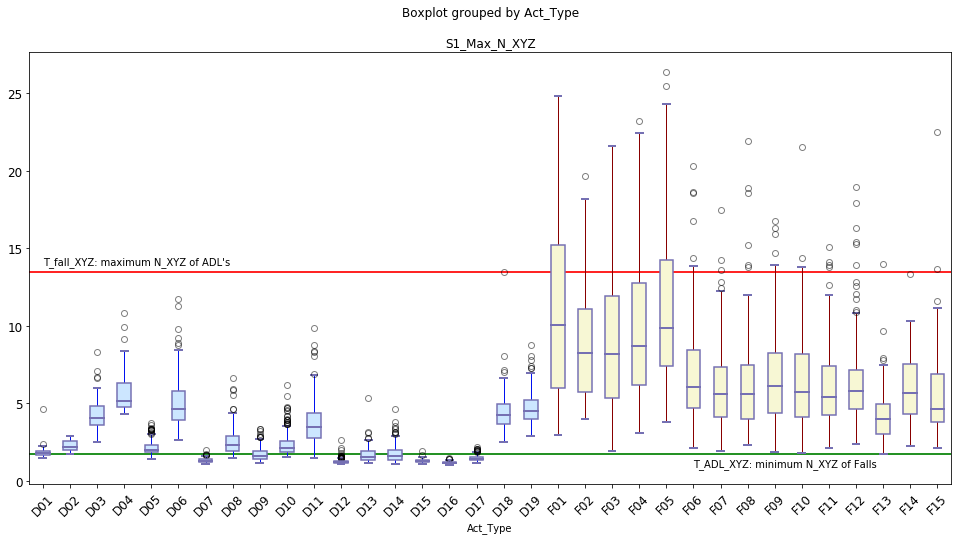

In [0]:
# This cell computes and visualize acceleration data for SENSOR S1, and XYZ Acceleration Norm Values

# Import library
import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax1 = fig.add_subplot(111)

# create the boxplot
bp = df_Files_Trials.boxplot(column='S1_Max_N_XYZ', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax1, return_type='dict', grid=False,
                            patch_artist=True)

# Get "extreme" values to compare
T_fall_XYZ = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S1_Max_N_XYZ)
T_ADL_XYZ = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S1_Max_N_XYZ)

# draw horizontal lines
ax1.axhline(y=T_fall_XYZ,xmin=0,xmax=3,c="red",linewidth=1.7,zorder=0)
ax1.axhline(y=T_ADL_XYZ,xmin=0,xmax=3,c="green",linewidth=1.7,zorder=0)

# write textlines
ax1.text(1, T_fall_XYZ + 0.5, "T_fall_XYZ: maximum N_XYZ of ADL's")
ax1.text(25, T_ADL_XYZ - 0.8, "T_ADL_XYZ: minimum N_XYZ of Falls")

# change whiskers
index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#0011F0', linewidth=1)
    else:
        whisker.set(color='#880000', linewidth=1)
    index +=1

# change colors based on index (as we know which are ADLs and Falls)    
index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#7570b3', linewidth=1.5)
        # change fill color
        box.set( facecolor = '#cce6ff' )
        index +=1
    else:
        # change outline color
        box.set( color='#7570b3', linewidth=1.5)
        # change fill color
        box.set( facecolor = '#f7f7d4' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#7570b3', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

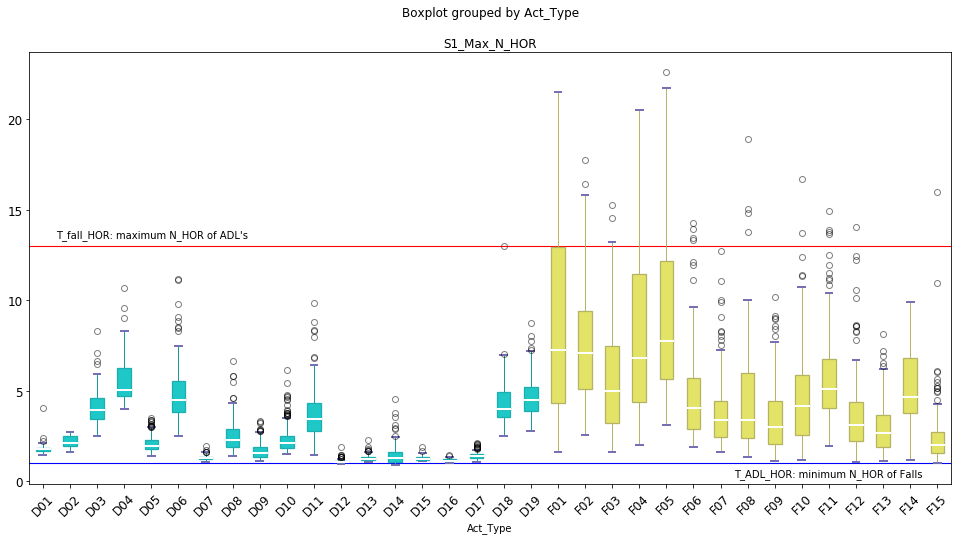

In [0]:
# This cell is similar to the previous one. 
# So it computes and visualize acceleration data for SENSOR S1, and HOR Acceleration Norm Values

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax2 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S1_Max_N_HOR', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax2, return_type='dict', grid=False,
                            patch_artist=True)

T_fall_HOR = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S1_Max_N_HOR)
T_ADL_HOR = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S1_Max_N_HOR)

ax2.axhline(y=T_fall_HOR,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax2.axhline(y=T_ADL_HOR,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax2.text(1.5, T_fall_HOR + 0.5, "T_fall_HOR: maximum N_HOR of ADL's")
ax2.text(26.5, T_ADL_HOR - 0.7, "T_ADL_HOR: minimum N_HOR of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

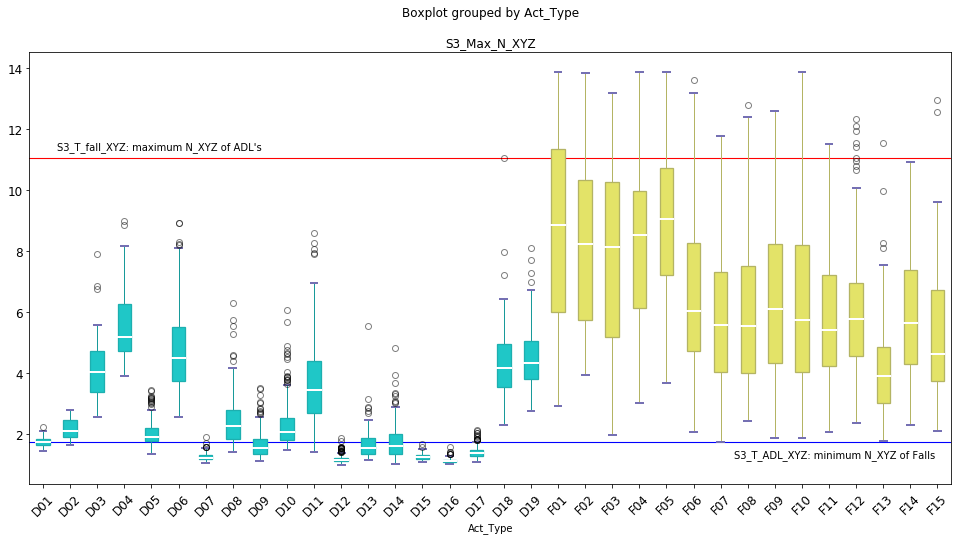

In [0]:
# This cell is similar to the previous ones... 
# This one computes and visualize acceleration data for SENSOR S3, and XYZ Acceleration Norm Values.

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax3 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S3_Max_N_XYZ', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax3, return_type='dict', grid=False,
                            patch_artist=True)

S3_T_fall_XYZ = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S3_Max_N_XYZ)
S3_T_ADL_XYZ = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S3_Max_N_XYZ)

ax3.axhline(y=S3_T_fall_XYZ,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax3.axhline(y=S3_T_ADL_XYZ,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax3.text(1.5, S3_T_fall_XYZ + 0.3, "S3_T_fall_XYZ: maximum N_XYZ of ADL's")
ax3.text(26.5, S3_T_ADL_XYZ - 0.5, "S3_T_ADL_XYZ: minimum N_XYZ of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


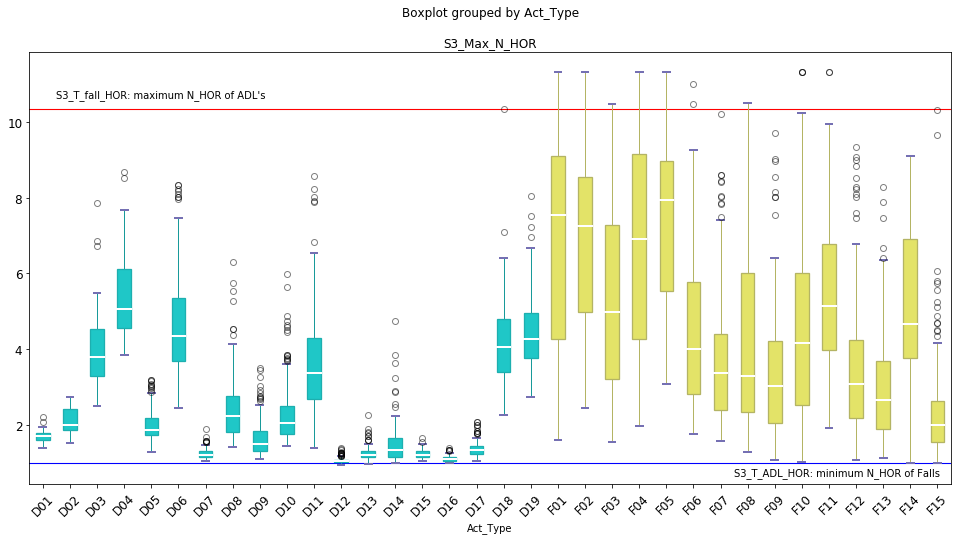

In [0]:
# This cell is similar to the previous ones... 
# This one computes and visualize acceleration data for SENSOR S3, and HOR Acceleration Norm Values.

import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(16, 8))

# Create an axes instance
ax4 = fig.add_subplot(111)

bp = df_Files_Trials.boxplot(column='S3_Max_N_HOR', by='Act_Type', rot=45, fontsize=12, 
                             figsize=(16, 8), ax = ax4, return_type='dict', grid=False,
                            patch_artist=True)

S3_T_fall_HOR = np.max(df_Files_Trials[df_Files_Trials.File.str.contains('D')].S3_Max_N_HOR)
S3_T_ADL_HOR = np.min(df_Files_Trials[df_Files_Trials.File.str.contains('F')].S3_Max_N_HOR)

ax4.axhline(y=S3_T_fall_HOR,xmin=0,xmax=3,c="red",linewidth=1.1,zorder=0)
ax4.axhline(y=S3_T_ADL_HOR,xmin=0,xmax=3,c="blue",linewidth=1.1,zorder=0)

ax4.text(1.5, S3_T_fall_HOR + 0.3, "S3_T_fall_HOR: maximum N_HOR of ADL's")
ax4.text(26.5, S3_T_ADL_HOR - 0.3, "S3_T_ADL_HOR: minimum N_HOR of Falls")

index = 1
for whisker in bp[0]['whiskers']:
    if index < 39:
        whisker.set(color='#189a9a', linewidth=1)
    else:
        whisker.set(color='#b4b464', linewidth=1)
    index +=1

index = 1    
## change outline color, fill color and linewidth of the boxes
for box in bp[0]['boxes']:
    if index < 20:
        # change outline color
        box.set( color='#1dafaf', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#1fc7c7' )
        index +=1
    else:
        # change outline color
        box.set( color='#b4b464', linewidth=1.3)
        # change fill color
        box.set( facecolor = '#e3e368' )
        index +=1

## change color and linewidth of the caps
for cap in bp[0]['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp[0]['medians']:
    median.set(color='#FFFFFF', linewidth=2)

## change the style of fliers and their fill
for flier in bp[0]['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    

## 1.6 Compute several performance metrics for the Threshold-based Classification
Note: These basic metrics show the low performance and poor effectiveness of this approach to classification.

In [0]:
# Calculating some summary "stats" for Falls
print("S3_T_fall_HOR: " + str(S3_T_fall_HOR))
print("S3_T_fall_XYZ: " + str(S3_T_fall_XYZ))
num_Certain_Falls = len(df_Files_Trials[(df_Files_Trials.S3_Max_N_HOR > S3_T_fall_HOR) 
                                                   & (df_Files_Trials.S3_Max_N_XYZ > S3_T_fall_XYZ)])

print("Certain falls: " + str(num_Certain_Falls))

df_Falls = df_Files_Trials[df_Files_Trials.File.str.contains('F')]
print("True falls: " + 
      str(len(df_Falls[(df_Falls.S3_Max_N_HOR > S3_T_fall_HOR) & (df_Falls.S3_Max_N_XYZ > S3_T_fall_XYZ)])))

# Calculating some summary "stats" for ADLs
print("S3_T_ADL_HOR: " + str(S3_T_ADL_HOR))
print("S3_T_ADL_XYZ: " + str(S3_T_ADL_XYZ))
num_Certain_ADLs = len(df_Files_Trials[(df_Files_Trials.S3_Max_N_HOR < S3_T_ADL_HOR) 
                                                   & (df_Files_Trials.S3_Max_N_XYZ < S3_T_ADL_XYZ)])

print("Certain ADLs: " + str(num_Certain_ADLs))

df_ADLs = df_Files_Trials[df_Files_Trials.File.str.contains('D')]
print("True ADLs: " + 
      str(len(df_ADLs[(df_ADLs.S3_Max_N_HOR < S3_T_ADL_HOR) & (df_ADLs.S3_Max_N_XYZ < S3_T_ADL_XYZ)])))


print("% of effectiveness (on Falls) : " + str(num_Certain_Falls/len(df_Falls)))
print("% of effectiveness (on ADLs) : " + str(num_Certain_ADLs/len(df_ADLs)))

S3_T_fall_HOR: 10.345431971872
S3_T_fall_XYZ: 11.040839330999006
Certain falls: 63
True falls: 63
S3_T_ADL_HOR: 0.9875828382296458
S3_T_ADL_XYZ: 1.7345930082754024
Certain ADLs: 11
True ADLs: 11
% of effectiveness (on Falls) : 0.035038932146829814
% of effectiveness (on ADLs) : 0.0040710584752035525


## 1.7 Process the ADL/Falls data files and create baseline dataset
Note: In this cell, we compute over 50 "engineered" features based on acceleration data

In [0]:
# The following function processes a trial file to compute and add 50+ metrics (engineered features)
# the results are saved in a file, which will be used to train several ML models.
# We work with a window of 600 measurements (equivalent to 3 seconds of activity recording)
# We handle three scenarios, the window falls completely within the values, or the windows is aligned
# with the minimum/maximum value...
# OUTPUT: We write the 
# Note: this function have a similar structure as the read_trial() function above.
def compute_trial_file(trial_file_name):
 
    df_Mediciones = pd.DataFrame(pd.read_csv(trial_file_name, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

    """
    ---------------------------------------------------
    Note: extract from SisFall Dataset info, 
          about the accelerometer sensors:
    ---------------------------------------------------
    Data are in bits with the following characteristics:
    
    In order to convert the acceleration data (AD) given 
    in bits into gravity, use this equation: 
        Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
    
    In order to convert the rotation data (RD) given in 
    bits into angular velocity, use this equation:
        Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    ---------------------------------------------------
    """

    # Calculate the values for SENSOR_1
    import math
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)

    # Calculate the Euclidean Norm of (XYZ) Acceleration
    fn = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones.apply(fn, axis=1) 
    df_Mediciones = df_Mediciones.assign(S1_N_XYZ=col.values)   

    # Get the max value of N_XYZ
    # This max value is used as a reference point to get a window of values
    S1_max_N_XYZ = np.max(df_Mediciones.S1_N_XYZ)
    print("S1_max_N_XYZ = " + str(S1_max_N_XYZ))

    max_N = np.max(df_Mediciones.S1_N_XYZ)
    max_N_index = df_Mediciones.index[df_Mediciones.S1_N_XYZ == max_N][0]
    min_N = np.min(df_Mediciones.S1_N_XYZ)
    min_N_index = df_Mediciones.index[df_Mediciones.S1_N_XYZ == min_N][0]
    len_df_Mediciones = len(df_Mediciones)
    
    # We work with a window of 600 measurements (equivalent to 3 seconds of activity recording)
    # We handle three scenarios, the window falls completely within the values, or the windows is aligned
    # with the minimum/maximum value...
    if (max_N_index - 300<0):
        df_Mediciones = df_Mediciones[0: 601]
        print("LOW WINDOW")
    else:
        if (max_N_index + 300+1> len_df_Mediciones):
            df_Mediciones = df_Mediciones[len_df_Mediciones-602:len_df_Mediciones-1]
            print("HIGH WINDOW")
        else:
            # extract the central window
            df_Mediciones = df_Mediciones[max_N_index - 300: max_N_index + 300+1]
            print("NORMAL WINDOW")
            
    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))    
           
    # S1_N_HOR: Calculate the Euclidean Norm of (HOR) Acceleration
    fn_hor = lambda row: math.sqrt((g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) # define a function for the new column
    col = df_Mediciones.apply(fn_hor, axis=1) # get column data with an index
    df_Mediciones = df_Mediciones.assign(S1_N_HOR=col.values) # assign values to column 'c'  

    # S1_N_VER: Calculate the Euclidean Norm of (VER) Acceleration
    fn_ver = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Z)**2) # define a function for the new column
    col = df_Mediciones.apply(fn_ver, axis=1) # get column data with an index
    df_Mediciones = df_Mediciones.assign(S1_N_VER=col.values) # assign values to column 'c' 
    
    field_name = "S1_X"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()
    
    df_Features = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    field_name = "S1_Y"
    
    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()
    
    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_Z"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    # acceleration features
    field_name = "S1_N_XYZ"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_N_HOR"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    field_name = "S1_N_VER"

    var_X = df_Mediciones[field_name].var()
    mean_X = df_Mediciones[field_name].mean()
    std_X = df_Mediciones[field_name].std()
    median_X = df_Mediciones[field_name].median()
    max_X = df_Mediciones[field_name].max()
    min_X = df_Mediciones[field_name].min()
    range_X = max_X - min_X
    kurtosis_X = df_Mediciones[field_name].kurtosis()
    skewness_X =  df_Mediciones[field_name].skew()    

    df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                "mean_" + field_name:[mean_X],
                                "std_" + field_name:[std_X], 
                                "max_" + field_name:[max_X],
                                "min_" + field_name:[min_X], 
                                "range_" + field_name:[range_X],
                                "kurtosis_" + field_name:[kurtosis_X],
                                "skewness_" + field_name:[skewness_X]})                              

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    corr_valueXY = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Y"])
    corr_valueXZ = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Z"])
    corr_valueYZ = df_Mediciones["S1_Y"].corr(df_Mediciones["S1_Z"])
    corr_valueNV = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_VER"])
    corr_valueNH = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_HOR"])
    corr_valueHV = df_Mediciones["S1_N_HOR"].corr(df_Mediciones["S1_N_VER"])

    df_Features_2 = pd.DataFrame({"corr_XY": [corr_valueXY], 
                                "corr_XZ": [corr_valueXZ],
                                "corr_YZ": [corr_valueYZ],
                                "corr_NV": [corr_valueNV],
                                "corr_NH": [corr_valueNH], 
                                "corr_HV": [corr_valueHV]})       

    df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

    trial_file_name = row['File']

    df_Features_2 = pd.DataFrame({"File": [trial_file_name],
                                  "Fall_ADL": [trial_file_name[0:1]],
                                  "Act_Type": [trial_file_name[0:3]],
                                  "Age_Cat": [trial_file_name[4:6]]})  

    df_Features =  pd.concat([df_Features_2, df_Features], axis=1)
   
    # writes the record/instance data:
    df_Features.to_csv(FILE_DIRECTORY + 'Unified_ADL_Falls.txt', mode='a', header=False)
    
    del df_Features
    del df_Features_2
    
    return max_N, max_N_index, min_N, min_N_index


"""______________________________________________________________ 

"""
# import libraries to monitor time-computing progress...
import time
from datetime import timedelta

start_time = time.time()

#
# The following section, performs lots of computations.
# So, a few "traces" (print's) are included to monitor progress...
#

# NOTE: to filter a specific type of activity use the following line with the corresponding activity code
# for example to filter (and only process) ADL type D01:
# file_list = df_Files_Trials[df_Files_Trials.Act_Type == "D01"][["File"]]
# Otherwise the follwing line process all types of ADL and Falls:
file_list = df_Files_Trials[["File"]]
total_num_iter = len(file_list)
iter_no = 1
    
for index, row in file_list.iterrows():
    iter_start_time = time.time()
    
    my_data_file_name = SisFall_ALL_DIRECTORY + row['File']
    print("_________ ITERATION NO: " + str(iter_no) + "/" + str(total_num_iter) + " (TOTAL)___________________________")
    iter_no +=1
    if iter_no< 499: 
        print("_________ SKIPPING TRIAL FILE: " + row['File'] + " ___________________________")
        continue
        
    print("_________ PROCESSING TRIAL FILE: " + row['File'] + " ___________________________")
    max_N, max_N_index, min_N, min_N_index = compute_trial_file(my_data_file_name)
    print("________________________________________________________________________________________")    
    elapsed_time_secs = time.time() - iter_start_time
    msg = "Iteration took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
    print(msg)
    remaining_time = round(((time.time() - start_time)/iter_no)*(total_num_iter-iter_no))
    msg = "REMAINING TIME: %s secs (Wall clock time)" % timedelta(seconds = remaining_time)
    print(msg)

    print("________________________________________________________________________________________")    
    

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


_________ ITERATION NO: 1/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA01_R01.txt ___________________________
_________ ITERATION NO: 2/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA02_R01.txt ___________________________
_________ ITERATION NO: 3/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA03_R01.txt ___________________________
_________ ITERATION NO: 4/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA04_R01.txt ___________________________
_________ ITERATION NO: 5/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA05_R01.txt ___________________________
_________ ITERATION NO: 6/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA06_R01.txt ___________________________
_________ ITERATION NO: 7/4500 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D01_SA07_R01.txt ___________________________
______

S1_max_N_XYZ = 1.275670253132275
VENTANA NORMAL
max_N = 1.275670253132275
max_N_index = 1747
min_N = 0.9096196111089858
min_N_index = 1842
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:00:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 499/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA09_R01.txt ___________________________
S1_max_N_XYZ = 1.2813512250409964
VENTANA NORMAL
max_N = 1.2813512250409964
max_N_index = 1021
min_N = 0.8592507012380758
min_N_index = 2076
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 500/45

S1_max_N_XYZ = 1.2417574923961099
VENTANA NORMAL
max_N = 1.2417574923961099
max_N_index = 854
min_N = 0.8108550807105191
min_N_index = 1766
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 514/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA12_R01.txt ___________________________
S1_max_N_XYZ = 1.040603298384824
VENTANA ALTA
max_N = 1.040603298384824
max_N_index = 2126
min_N = 0.910968990664954
min_N_index = 2309
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 515/4500 (

S1_max_N_XYZ = 1.248277621959304
VENTANA NORMAL
max_N = 1.248277621959304
max_N_index = 608
min_N = 0.9242719104533714
min_N_index = 438
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 529/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA15_R01.txt ___________________________
S1_max_N_XYZ = 1.4877275052518228
VENTANA NORMAL
max_N = 1.4877275052518228
max_N_index = 613
min_N = 0.8341650309310052
min_N_index = 432
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 530/4500 (

S1_max_N_XYZ = 1.2803624498280506
VENTANA NORMAL
max_N = 1.2803624498280506
max_N_index = 1075
min_N = 0.8999732119494238
min_N_index = 2171
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 544/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA18_R01.txt ___________________________
S1_max_N_XYZ = 1.4907091416896816
VENTANA NORMAL
max_N = 1.4907091416896816
max_N_index = 1082
min_N = 0.8307097780522164
min_N_index = 2101
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 545/

S1_max_N_XYZ = 1.11328125
VENTANA NORMAL
max_N = 1.11328125
max_N_index = 1941
min_N = 0.9149968515143918
min_N_index = 529
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 559/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SA21_R01.txt ___________________________
S1_max_N_XYZ = 1.251817526295516
VENTANA NORMAL
max_N = 1.251817526295516
max_N_index = 1934
min_N = 0.7032768933157658
min_N_index = 567
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 560/4500 (TOTAL)________

S1_max_N_XYZ = 1.2332433994254997
VENTANA NORMAL
max_N = 1.2332433994254997
max_N_index = 843
min_N = 0.8637141872550346
min_N_index = 674
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 574/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE01_R01.txt ___________________________
S1_max_N_XYZ = 1.4600651222232564
VENTANA NORMAL
max_N = 1.4600651222232564
max_N_index = 1689
min_N = 0.9502710859111467
min_N_index = 1855
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 575/45

S1_max_N_XYZ = 1.4195712363658217
VENTANA NORMAL
max_N = 1.4195712363658217
max_N_index = 784
min_N = 0.7973918360720625
min_N_index = 1907
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 589/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.2149253891378988
VENTANA NORMAL
max_N = 1.2149253891378988
max_N_index = 1773
min_N = 0.7631696918219597
min_N_index = 1934
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 590/4

S1_max_N_XYZ = 1.2052031564999737
VENTANA NORMAL
max_N = 1.2052031564999737
max_N_index = 1592
min_N = 0.8693578555777175
min_N_index = 1674
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 604/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.3656185193639134
VENTANA NORMAL
max_N = 1.3656185193639134
max_N_index = 1726
min_N = 0.8886096303750666
min_N_index = 1884
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 605/

S1_max_N_XYZ = 1.236221670476087
VENTANA NORMAL
max_N = 1.236221670476087
max_N_index = 1816
min_N = 0.8681898767604785
min_N_index = 1957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 619/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE10_R01.txt ___________________________
S1_max_N_XYZ = 1.5090263896073024
VENTANA NORMAL
max_N = 1.5090263896073024
max_N_index = 1741
min_N = 0.8946677024748141
min_N_index = 1854
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 620/45

S1_max_N_XYZ = 1.206354735576097
VENTANA NORMAL
max_N = 1.206354735576097
max_N_index = 1834
min_N = 0.8777249005107253
min_N_index = 702
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 634/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D07_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.4539700583794917
VENTANA NORMAL
max_N = 1.4539700583794917
max_N_index = 1761
min_N = 0.8281065740874631
min_N_index = 1880
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 635/450

S1_max_N_XYZ = 1.2061776411263496
VENTANA NORMAL
max_N = 1.2061776411263496
max_N_index = 1750
min_N = 0.8953837368038424
min_N_index = 1848
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 649/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA01_R01.txt ___________________________
S1_max_N_XYZ = 4.352410992233213
VENTANA NORMAL
max_N = 4.352410992233213
max_N_index = 655
min_N = 0.3151014764003614
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 650/450

S1_max_N_XYZ = 2.6785996789804885
VENTANA NORMAL
max_N = 2.6785996789804885
max_N_index = 731
min_N = 0.3084948417442543
min_N_index = 748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 664/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA04_R01.txt ___________________________
S1_max_N_XYZ = 2.850168216492614
VENTANA NORMAL
max_N = 2.850168216492614
max_N_index = 681
min_N = 0.2863310560047801
min_N_index = 1389
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 665/4500 

S1_max_N_XYZ = 2.044745582479716
VENTANA NORMAL
max_N = 2.044745582479716
max_N_index = 1092
min_N = 0.1317744358861953
min_N_index = 317
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 679/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.663507646639981
VENTANA NORMAL
max_N = 1.663507646639981
max_N_index = 714
min_N = 0.37836220607293086
min_N_index = 733
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 680/4500 (

S1_max_N_XYZ = 2.2440411817066352
VENTANA NORMAL
max_N = 2.2440411817066352
max_N_index = 545
min_N = 0.21115440237093092
min_N_index = 482
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 694/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.7580425196725369
VENTANA NORMAL
max_N = 1.7580425196725369
max_N_index = 1279
min_N = 0.40310153153586814
min_N_index = 578
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 695/4

S1_max_N_XYZ = 2.347246740490268
VENTANA NORMAL
max_N = 2.347246740490268
max_N_index = 699
min_N = 0.3195255195085167
min_N_index = 1496
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 709/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA13_R01.txt ___________________________
S1_max_N_XYZ = 2.3624546591631264
VENTANA NORMAL
max_N = 2.3624546591631264
max_N_index = 512
min_N = 0.074321474962658
min_N_index = 540
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 710/4500 (

S1_max_N_XYZ = 2.7358255081304983
VENTANA NORMAL
max_N = 2.7358255081304983
max_N_index = 686
min_N = 0.47099073811554404
min_N_index = 613
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 724/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA16_R01.txt ___________________________
S1_max_N_XYZ = 2.527334693762754
VENTANA NORMAL
max_N = 2.527334693762754
max_N_index = 521
min_N = 0.2600811640893329
min_N_index = 444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 725/4500 

S1_max_N_XYZ = 3.6735223199745994
VENTANA NORMAL
max_N = 3.6735223199745994
max_N_index = 615
min_N = 0.1996777799864384
min_N_index = 630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 739/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA19_R01.txt ___________________________
S1_max_N_XYZ = 3.5404785556927627
VENTANA NORMAL
max_N = 3.5404785556927627
max_N_index = 570
min_N = 0.19096729002469245
min_N_index = 1289
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 740/45

S1_max_N_XYZ = 2.7013858205673804
VENTANA NORMAL
max_N = 2.7013858205673804
max_N_index = 803
min_N = 0.2215914781825443
min_N_index = 714
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 754/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA22_R01.txt ___________________________
S1_max_N_XYZ = 2.9869814370813805
VENTANA NORMAL
max_N = 2.9869814370813805
max_N_index = 697
min_N = 0.01171875
min_N_index = 723
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 755/4500 (TOTAL)

S1_max_N_XYZ = 2.1252082273898774
VENTANA NORMAL
max_N = 2.1252082273898774
max_N_index = 1575
min_N = 0.6090994970163947
min_N_index = 1643
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 769/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE02_R01.txt ___________________________
S1_max_N_XYZ = 1.953117187484375
VENTANA NORMAL
max_N = 1.953117187484375
max_N_index = 799
min_N = 0.5245877054813499
min_N_index = 714
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 770/4500

S1_max_N_XYZ = 1.5084600293531978
VENTANA NORMAL
max_N = 1.5084600293531978
max_N_index = 1286
min_N = 0.5345143275967914
min_N_index = 1395
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 784/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE05_R01.txt ___________________________
S1_max_N_XYZ = 2.046916000305017
VENTANA NORMAL
max_N = 2.046916000305017
max_N_index = 1037
min_N = 0.7406851571032897
min_N_index = 343
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 785/450

S1_max_N_XYZ = 2.471079053663222
VENTANA NORMAL
max_N = 2.471079053663222
max_N_index = 596
min_N = 0.11253797102256198
min_N_index = 505
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 799/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE08_R01.txt ___________________________
S1_max_N_XYZ = 2.7263498305311993
VENTANA NORMAL
max_N = 2.7263498305311993
max_N_index = 826
min_N = 0.47312412276999255
min_N_index = 877
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 800/4500

S1_max_N_XYZ = 2.5701670504059044
VENTANA NORMAL
max_N = 2.5701670504059044
max_N_index = 569
min_N = 0.40219202236190926
min_N_index = 495
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 814/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE11_R01.txt ___________________________
S1_max_N_XYZ = 2.0506696398200486
VENTANA NORMAL
max_N = 2.0506696398200486
max_N_index = 660
min_N = 0.41363849162984395
min_N_index = 568
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 815/45

S1_max_N_XYZ = 1.4319376930022567
VENTANA NORMAL
max_N = 1.4319376930022567
max_N_index = 1711
min_N = 0.488734164944886
min_N_index = 656
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 829/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SE14_R01.txt ___________________________
S1_max_N_XYZ = 2.843529996640949
VENTANA NORMAL
max_N = 2.843529996640949
max_N_index = 630
min_N = 0.26808374901208576
min_N_index = 1168
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 830/4500

S1_max_N_XYZ = 1.9125990898043197
VENTANA NORMAL
max_N = 1.9125990898043197
max_N_index = 757
min_N = 0.4530239650290313
min_N_index = 770
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 844/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA02_R01.txt ___________________________
S1_max_N_XYZ = 2.8137448416975706
VENTANA NORMAL
max_N = 2.8137448416975706
max_N_index = 488
min_N = 0.2941382905783859
min_N_index = 499
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 845/4500

S1_max_N_XYZ = 1.3334509479782384
VENTANA NORMAL
max_N = 1.3334509479782384
max_N_index = 597
min_N = 0.7980804301866291
min_N_index = 1342
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 859/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA05_R01.txt ___________________________
S1_max_N_XYZ = 1.8059468684866882
VENTANA NORMAL
max_N = 1.8059468684866882
max_N_index = 654
min_N = 0.6432159875505467
min_N_index = 665
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 860/450

S1_max_N_XYZ = 1.3224430387809951
VENTANA NORMAL
max_N = 1.3224430387809951
max_N_index = 1449
min_N = 0.8412597075266427
min_N_index = 611
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 874/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.4159550094784747
VENTANA NORMAL
max_N = 1.4159550094784747
max_N_index = 687
min_N = 0.7930168550679582
min_N_index = 451
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 875/450

S1_max_N_XYZ = 1.9568597105459073
VENTANA NORMAL
max_N = 1.9568597105459073
max_N_index = 796
min_N = 0.6202086854249644
min_N_index = 807
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 889/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA11_R01.txt ___________________________
S1_max_N_XYZ = 1.540652929830503
VENTANA NORMAL
max_N = 1.540652929830503
max_N_index = 911
min_N = 0.6439983592515978
min_N_index = 1683
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 890/4500 

S1_max_N_XYZ = 1.3649591214832453
VENTANA NORMAL
max_N = 1.3649591214832453
max_N_index = 1233
min_N = 0.856030423488266
min_N_index = 463
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 904/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA14_R01.txt ___________________________
S1_max_N_XYZ = 1.7899024024654424
VENTANA NORMAL
max_N = 1.7899024024654424
max_N_index = 833
min_N = 0.8115698552082947
min_N_index = 644
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 905/4500

S1_max_N_XYZ = 1.2998424728025941
VENTANA NORMAL
max_N = 1.2998424728025941
max_N_index = 1767
min_N = 0.7737530921787971
min_N_index = 2039
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 919/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.515247415917715
VENTANA NORMAL
max_N = 1.515247415917715
max_N_index = 922
min_N = 0.7352679079657802
min_N_index = 932
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 920/4500

S1_max_N_XYZ = 1.343006016789505
VENTANA NORMAL
max_N = 1.343006016789505
max_N_index = 872
min_N = 0.7514126507317318
min_N_index = 736
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 934/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.3423696125724138
VENTANA NORMAL
max_N = 1.3423696125724138
max_N_index = 819
min_N = 0.7683803258773044
min_N_index = 830
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 935/4500 (

S1_max_N_XYZ = 2.266857154172242
VENTANA NORMAL
max_N = 2.266857154172242
max_N_index = 986
min_N = 0.7478301130134354
min_N_index = 997
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 949/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.4766916692840155
VENTANA NORMAL
max_N = 1.4766916692840155
max_N_index = 782
min_N = 0.7738221108108035
min_N_index = 599
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 950/4500 (

S1_max_N_XYZ = 1.4425490896245308
VENTANA NORMAL
max_N = 1.4425490896245308
max_N_index = 945
min_N = 0.6148591365609687
min_N_index = 957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 964/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.5785358762775437
VENTANA NORMAL
max_N = 1.5785358762775437
max_N_index = 753
min_N = 0.758366018855465
min_N_index = 763
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 965/4500 

S1_max_N_XYZ = 1.2355179143183488
VENTANA NORMAL
max_N = 1.2355179143183488
max_N_index = 1039
min_N = 0.8323337918261069
min_N_index = 1058
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 979/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.4976228315259528
VENTANA NORMAL
max_N = 1.4976228315259528
max_N_index = 946
min_N = 0.7581044057641814
min_N_index = 1784
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 980/4

S1_max_N_XYZ = 2.273944182154586
VENTANA NORMAL
max_N = 2.273944182154586
max_N_index = 926
min_N = 0.2757989548141227
min_N_index = 939
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 994/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE10_R01.txt ___________________________
S1_max_N_XYZ = 2.274849888806196
VENTANA NORMAL
max_N = 2.274849888806196
max_N_index = 712
min_N = 0.5162904087166568
min_N_index = 725
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 995/4500 (TO

S1_max_N_XYZ = 1.8650329161492867
VENTANA NORMAL
max_N = 1.8650329161492867
max_N_index = 809
min_N = 0.43147709713443944
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1009/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D09_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.993420268090594
VENTANA NORMAL
max_N = 1.993420268090594
max_N_index = 700
min_N = 0.4511338255059412
min_N_index = 1542
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:11:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1010/45

S1_max_N_XYZ = 1.2591825806785826
VENTANA NORMAL
max_N = 1.2591825806785826
max_N_index = 1855
min_N = 0.8468728378662437
min_N_index = 2025
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1024/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA01_R01.txt ___________________________
S1_max_N_XYZ = 3.4986787754562614
VENTANA NORMAL
max_N = 3.4986787754562614
max_N_index = 731
min_N = 0.08240243402237886
min_N_index = 743
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1025

S1_max_N_XYZ = 2.2697531087774037
VENTANA NORMAL
max_N = 2.2697531087774037
max_N_index = 748
min_N = 0.20406184197826527
min_N_index = 640
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1039/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA04_R01.txt ___________________________
S1_max_N_XYZ = 3.647699252798562
VENTANA NORMAL
max_N = 3.647699252798562
max_N_index = 641
min_N = 0.29066804956696307
min_N_index = 566
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1040/45

S1_max_N_XYZ = 2.150932500130394
VENTANA NORMAL
max_N = 2.150932500130394
max_N_index = 1466
min_N = 0.13424093966749673
min_N_index = 1545
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1054/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.8062383420363404
VENTANA NORMAL
max_N = 1.8062383420363404
max_N_index = 700
min_N = 0.21273826256547035
min_N_index = 605
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1055/

S1_max_N_XYZ = 2.038317781868866
VENTANA NORMAL
max_N = 2.038317781868866
max_N_index = 596
min_N = 0.21273826256547035
min_N_index = 1266
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1069/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.668741587642654
VENTANA NORMAL
max_N = 1.668741587642654
max_N_index = 681
min_N = 0.2180513396398885
min_N_index = 599
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1070/4500

S1_max_N_XYZ = 2.0118363133124175
VENTANA NORMAL
max_N = 2.0118363133124175
max_N_index = 478
min_N = 0.44732958740242634
min_N_index = 348
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1084/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA13_R01.txt ___________________________
S1_max_N_XYZ = 2.2684989853390665
VENTANA NORMAL
max_N = 2.2684989853390665
max_N_index = 306
min_N = 0.06663563323918742
min_N_index = 214
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1085/

S1_max_N_XYZ = 2.2942992838994574
VENTANA NORMAL
max_N = 2.2942992838994574
max_N_index = 596
min_N = 0.47099073811554404
min_N_index = 477
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1099/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA16_R01.txt ___________________________
S1_max_N_XYZ = 1.7169824007406498
VENTANA NORMAL
max_N = 1.7169824007406498
max_N_index = 581
min_N = 0.31495616789533193
min_N_index = 1365
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1100

S1_max_N_XYZ = 3.376792149322573
VENTANA NORMAL
max_N = 3.376792149322573
max_N_index = 631
min_N = 0.1391524463324756
min_N_index = 1291
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1114/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA19_R01.txt ___________________________
S1_max_N_XYZ = 2.399146754862484
VENTANA NORMAL
max_N = 2.399146754862484
max_N_index = 1295
min_N = 0.2740784897701523
min_N_index = 496
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1115/4500

S1_max_N_XYZ = 2.1413555151779007
VENTANA NORMAL
max_N = 2.1413555151779007
max_N_index = 687
min_N = 0.2026361304584834
min_N_index = 1689
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1129/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SA22_R01.txt ___________________________
S1_max_N_XYZ = 3.884490174529423
VENTANA NORMAL
max_N = 3.884490174529423
max_N_index = 683
min_N = 0.27759121881937293
min_N_index = 707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1130/45

S1_max_N_XYZ = 1.676919048468705
VENTANA NORMAL
max_N = 1.676919048468705
max_N_index = 579
min_N = 0.4005382730815184
min_N_index = 559
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1144/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE03_R01.txt ___________________________
S1_max_N_XYZ = 2.469173346810945
VENTANA NORMAL
max_N = 2.469173346810945
max_N_index = 501
min_N = 0.14426707275483897
min_N_index = 470
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1145/4500 

S1_max_N_XYZ = 1.718274969866672
VENTANA NORMAL
max_N = 1.718274969866672
max_N_index = 865
min_N = 0.54099799723087
min_N_index = 879
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1159/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.9037068396802361
VENTANA NORMAL
max_N = 1.9037068396802361
max_N_index = 771
min_N = 0.29361906989009584
min_N_index = 641
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1160/4500 

S1_max_N_XYZ = 1.9058457242926794
VENTANA NORMAL
max_N = 1.9058457242926794
max_N_index = 729
min_N = 0.22730213321837742
min_N_index = 608
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1174/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE09_R01.txt ___________________________
S1_max_N_XYZ = 3.0153466921447234
VENTANA NORMAL
max_N = 3.0153466921447234
max_N_index = 628
min_N = 0.2061819253186976
min_N_index = 640
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1175/4

S1_max_N_XYZ = 2.7734099910607566
VENTANA NORMAL
max_N = 2.7734099910607566
max_N_index = 826
min_N = 0.3005782594251662
min_N_index = 694
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1189/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE12_R01.txt ___________________________
S1_max_N_XYZ = 1.917789738336492
VENTANA NORMAL
max_N = 1.917789738336492
max_N_index = 755
min_N = 0.16452687256759913
min_N_index = 1590
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1190/45

S1_max_N_XYZ = 2.7409630457138143
VENTANA NORMAL
max_N = 2.7409630457138143
max_N_index = 627
min_N = 0.1441083339507556
min_N_index = 511
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1204/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D10_SE15_R01.txt ___________________________
S1_max_N_XYZ = 1.5546924073415012
VENTANA NORMAL
max_N = 1.5546924073415012
max_N_index = 1229
min_N = 0.5050102973114756
min_N_index = 288
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1205/4

S1_max_N_XYZ = 4.85701466238924
VENTANA NORMAL
max_N = 4.85701466238924
max_N_index = 1427
min_N = 0.24300517210930922
min_N_index = 1444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1219/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA03_R01.txt ___________________________
S1_max_N_XYZ = 3.3129882452675936
VENTANA NORMAL
max_N = 3.3129882452675936
max_N_index = 799
min_N = 0.18545433547608156
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1220/45

S1_max_N_XYZ = 4.363519045668767
VENTANA NORMAL
max_N = 4.363519045668767
max_N_index = 1056
min_N = 0.26270801839625585
min_N_index = 1067
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1234/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA06_R01.txt ___________________________
S1_max_N_XYZ = 2.942682118706982
VENTANA NORMAL
max_N = 2.942682118706982
max_N_index = 1396
min_N = 0.20588568676725685
min_N_index = 1416
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1235/

S1_max_N_XYZ = 4.386310018246758
VENTANA NORMAL
max_N = 4.386310018246758
max_N_index = 891
min_N = 0.14073346511446735
min_N_index = 898
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1249/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA09_R01.txt ___________________________
S1_max_N_XYZ = 4.845693284577876
VENTANA NORMAL
max_N = 4.845693284577876
max_N_index = 812
min_N = 0.3037093674597682
min_N_index = 773
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1250/4500 

S1_max_N_XYZ = 2.29458192295936
VENTANA NORMAL
max_N = 2.29458192295936
max_N_index = 1284
min_N = 0.522533033869032
min_N_index = 2143
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1264/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA12_R01.txt ___________________________
S1_max_N_XYZ = 3.8278240474813576
VENTANA NORMAL
max_N = 3.8278240474813576
max_N_index = 1062
min_N = 0.530502691292655
min_N_index = 1078
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1265/4500

S1_max_N_XYZ = 3.8955576318025784
VENTANA NORMAL
max_N = 3.8955576318025784
max_N_index = 1143
min_N = 0.3889613008445538
min_N_index = 1156
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1279/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA15_R01.txt ___________________________
S1_max_N_XYZ = 4.253310765253382
VENTANA NORMAL
max_N = 4.253310765253382
max_N_index = 1225
min_N = 0.3524078378522355
min_N_index = 1196
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1280/

S1_max_N_XYZ = 4.335333924769557
VENTANA NORMAL
max_N = 4.335333924769557
max_N_index = 1339
min_N = 0.10676289350559726
min_N_index = 1356
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1294/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA18_R01.txt ___________________________
S1_max_N_XYZ = 3.9731267389783045
VENTANA NORMAL
max_N = 3.9731267389783045
max_N_index = 1295
min_N = 0.2818190857098087
min_N_index = 1312
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1295

S1_max_N_XYZ = 2.8858358764930983
VENTANA NORMAL
max_N = 2.8858358764930983
max_N_index = 1207
min_N = 0.11501899894012076
min_N_index = 1222
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1309/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SA21_R01.txt ___________________________
S1_max_N_XYZ = 5.743816201842367
VENTANA NORMAL
max_N = 5.743816201842367
max_N_index = 1131
min_N = 0.46156604390988837
min_N_index = 1149
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 131

S1_max_N_XYZ = 3.54275340442576
VENTANA NORMAL
max_N = 3.54275340442576
max_N_index = 1171
min_N = 0.35814156538912795
min_N_index = 1185
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1324/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE01_R01.txt ___________________________
S1_max_N_XYZ = 2.677232156815015
VENTANA NORMAL
max_N = 2.677232156815015
max_N_index = 936
min_N = 0.3494511251479776
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1325/4500 

S1_max_N_XYZ = 2.9446855682233926
VENTANA NORMAL
max_N = 2.9446855682233926
max_N_index = 1156
min_N = 0.5608020161939394
min_N_index = 1175
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1339/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE04_R01.txt ___________________________
S1_max_N_XYZ = 3.426003948006746
VENTANA NORMAL
max_N = 3.426003948006746
max_N_index = 892
min_N = 0.25704193556815785
min_N_index = 916
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1340/4

S1_max_N_XYZ = 1.8223399385302677
VENTANA NORMAL
max_N = 1.8223399385302677
max_N_index = 884
min_N = 0.6869004843429832
min_N_index = 816
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1354/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.8839832006138781
VENTANA NORMAL
max_N = 1.8839832006138781
max_N_index = 1169
min_N = 0.5618214222925956
min_N_index = 1216
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1355/

S1_max_N_XYZ = 1.5534749118533626
VENTANA NORMAL
max_N = 1.5534749118533626
max_N_index = 904
min_N = 0.5962375932278382
min_N_index = 985
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1369/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE10_R01.txt ___________________________
S1_max_N_XYZ = 3.633744840037616
VENTANA NORMAL
max_N = 3.633744840037616
max_N_index = 1257
min_N = 0.6836049106231793
min_N_index = 1196
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1370/45

S1_max_N_XYZ = 4.5874378667880205
VENTANA NORMAL
max_N = 4.5874378667880205
max_N_index = 1220
min_N = 0.24363228327363556
min_N_index = 1240
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1384/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D11_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.5439030003887468
VENTANA NORMAL
max_N = 1.5439030003887468
max_N_index = 1144
min_N = 0.8692086525343756
min_N_index = 1031
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 13

S1_max_N_XYZ = 3.638518284634171
VENTANA NORMAL
max_N = 3.638518284634171
max_N_index = 1281
min_N = 0.5779270142406068
min_N_index = 1231
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1399/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA01_R01.txt ___________________________
S1_max_N_XYZ = 1.25134814994981
VENTANA NORMAL
max_N = 1.25134814994981
max_N_index = 823
min_N = 0.9431551441711816
min_N_index = 843
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1400/4500 (

S1_max_N_XYZ = 1.21317837015523
VENTANA NORMAL
max_N = 1.21317837015523
max_N_index = 1887
min_N = 0.7052593473824452
min_N_index = 808
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1414/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA04_R01.txt ___________________________
S1_max_N_XYZ = 1.2087619065306814
VENTANA NORMAL
max_N = 1.2087619065306814
max_N_index = 835
min_N = 0.8356636525746318
min_N_index = 1199
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1415/4500

S1_max_N_XYZ = 1.186902347548941
VENTANA NORMAL
max_N = 1.186902347548941
max_N_index = 1830
min_N = 0.8510427025952487
min_N_index = 1126
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1429/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA07_R01.txt ___________________________
S1_max_N_XYZ = 1.129824993793978
VENTANA NORMAL
max_N = 1.129824993793978
max_N_index = 1518
min_N = 0.9399788192635313
min_N_index = 37
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1430/4500

S1_max_N_XYZ = 1.2867284740828677
VENTANA NORMAL
max_N = 1.2867284740828677
max_N_index = 720
min_N = 0.7155797952425537
min_N_index = 716
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1444/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA10_R01.txt ___________________________
S1_max_N_XYZ = 1.1824651694460708
VENTANA NORMAL
max_N = 1.1824651694460708
max_N_index = 1894
min_N = 0.7779716371205717
min_N_index = 824
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1445/4

S1_max_N_XYZ = 1.1044744866231915
VENTANA NORMAL
max_N = 1.1044744866231915
max_N_index = 773
min_N = 0.8796090939747753
min_N_index = 789
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1459/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA13_R01.txt ___________________________
S1_max_N_XYZ = 1.1796422280220442
VENTANA NORMAL
max_N = 1.1796422280220442
max_N_index = 675
min_N = 0.8877850142040653
min_N_index = 8
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1460/4500

S1_max_N_XYZ = 1.143197281493471
VENTANA NORMAL
max_N = 1.143197281493471
max_N_index = 995
min_N = 0.9380044215897252
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1474/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA16_R01.txt ___________________________
S1_max_N_XYZ = 1.1438177703624275
VENTANA NORMAL
max_N = 1.1438177703624275
max_N_index = 1092
min_N = 0.8782115309901496
min_N_index = 1946
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1475/4

S1_max_N_XYZ = 1.1181568128858872
VENTANA NORMAL
max_N = 1.1181568128858872
max_N_index = 866
min_N = 0.9021154337773936
min_N_index = 754
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1489/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA19_R01.txt ___________________________
S1_max_N_XYZ = 1.0788677808130904
VENTANA NORMAL
max_N = 1.0788677808130904
max_N_index = 1906
min_N = 0.7489616836097992
min_N_index = 1909
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1490/

S1_max_N_XYZ = 1.1686022007148646
VENTANA NORMAL
max_N = 1.1686022007148646
max_N_index = 655
min_N = 0.8278854311493681
min_N_index = 1325
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1504/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SA22_R01.txt ___________________________
S1_max_N_XYZ = 1.2581400000658214
VENTANA NORMAL
max_N = 1.2581400000658214
max_N_index = 1709
min_N = 0.8622554708845358
min_N_index = 900
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1505/

S1_max_N_XYZ = 1.1366717666407153
VENTANA NORMAL
max_N = 1.1366717666407153
max_N_index = 1665
min_N = 0.8679437862071627
min_N_index = 1564
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1519/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE02_R01.txt ___________________________
S1_max_N_XYZ = 1.19475707070844
VENTANA NORMAL
max_N = 1.19475707070844
max_N_index = 494
min_N = 0.8199869145535571
min_N_index = 447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1520/4500

S1_max_N_XYZ = 1.069207059157188
VENTANA NORMAL
max_N = 1.069207059157188
max_N_index = 851
min_N = 0.9082262261846921
min_N_index = 559
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1534/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE05_R01.txt ___________________________
S1_max_N_XYZ = 1.1845795708881801
VENTANA NORMAL
max_N = 1.1845795708881801
max_N_index = 658
min_N = 0.7509149692312872
min_N_index = 745
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1535/4500

S1_max_N_XYZ = 1.1257660694673928
VENTANA NORMAL
max_N = 1.1257660694673928
max_N_index = 1160
min_N = 0.8953922575731125
min_N_index = 1085
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1549/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE08_R01.txt ___________________________
S1_max_N_XYZ = 1.9473860998965542
VENTANA NORMAL
max_N = 1.9473860998965542
max_N_index = 967
min_N = 0.44630508894911225
min_N_index = 2314
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 155

S1_max_N_XYZ = 1.2452546645917453
VENTANA NORMAL
max_N = 1.2452546645917453
max_N_index = 1802
min_N = 0.9240737814242026
min_N_index = 247
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1564/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE11_R01.txt ___________________________
S1_max_N_XYZ = 1.1756255087884333
VENTANA NORMAL
max_N = 1.1756255087884333
max_N_index = 597
min_N = 0.8857201149744272
min_N_index = 628
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1565/4

S1_max_N_XYZ = 1.1758915542113673
VENTANA NORMAL
max_N = 1.1758915542113673
max_N_index = 806
min_N = 0.6997532000753015
min_N_index = 788
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1579/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D12_SE14_R01.txt ___________________________
S1_max_N_XYZ = 1.2634831896419567
VENTANA NORMAL
max_N = 1.2634831896419567
max_N_index = 1647
min_N = 0.8627154537282629
min_N_index = 628
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1580/4

S1_max_N_XYZ = 1.4535082239968793
VENTANA NORMAL
max_N = 1.4535082239968793
max_N_index = 811
min_N = 0.8348232936619732
min_N_index = 1734
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1594/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA02_R01.txt ___________________________
S1_max_N_XYZ = 1.378197852737067
VENTANA NORMAL
max_N = 1.378197852737067
max_N_index = 1599
min_N = 0.6810555556794724
min_N_index = 809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1595/45

S1_max_N_XYZ = 1.7313150441865173
VENTANA NORMAL
max_N = 1.7313150441865173
max_N_index = 830
min_N = 0.41275220154811104
min_N_index = 846
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1609/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA05_R01.txt ___________________________
S1_max_N_XYZ = 5.348853100636388
VENTANA NORMAL
max_N = 5.348853100636388
max_N_index = 1313
min_N = 0.15189236011893423
min_N_index = 1298
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1610/

S1_max_N_XYZ = 1.1984041410774424
VENTANA NORMAL
max_N = 1.1984041410774424
max_N_index = 581
min_N = 0.9151886092110673
min_N_index = 147
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1624/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.5119609786553894
VENTANA BAJA
max_N = 1.5119609786553894
max_N_index = 232
min_N = 0.7172411131921573
min_N_index = 1152
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1625/450

S1_max_N_XYZ = 1.6846628710984914
VENTANA NORMAL
max_N = 1.6846628710984914
max_N_index = 1235
min_N = 0.7084972715466605
min_N_index = 461
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1639/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA11_R01.txt ___________________________
S1_max_N_XYZ = 1.2702822298053984
VENTANA NORMAL
max_N = 1.2702822298053984
max_N_index = 1278
min_N = 0.8315451191344039
min_N_index = 2382
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1640

S1_max_N_XYZ = 1.4388633565384388
VENTANA NORMAL
max_N = 1.4388633565384388
max_N_index = 1154
min_N = 0.710916036763924
min_N_index = 490
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1654/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA14_R01.txt ___________________________
S1_max_N_XYZ = 1.8841613749660782
VENTANA NORMAL
max_N = 1.8841613749660782
max_N_index = 585
min_N = 0.43473596737344494
min_N_index = 601
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1655/4

S1_max_N_XYZ = 1.6068177878403986
VENTANA NORMAL
max_N = 1.6068177878403986
max_N_index = 1010
min_N = 0.6948624772605637
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1669/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.6392618965344394
VENTANA NORMAL
max_N = 1.6392618965344394
max_N_index = 797
min_N = 0.4605235164241751
min_N_index = 810
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1670/

S1_max_N_XYZ = 1.3541622846483587
VENTANA NORMAL
max_N = 1.3541622846483587
max_N_index = 1629
min_N = 0.6079711393232412
min_N_index = 668
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1684/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.5269540743313754
VENTANA NORMAL
max_N = 1.5269540743313754
max_N_index = 491
min_N = 0.796693070531439
min_N_index = 506
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1685/45

S1_max_N_XYZ = 1.2836593676167805
VENTANA NORMAL
max_N = 1.2836593676167805
max_N_index = 1651
min_N = 0.7094442594218114
min_N_index = 1426
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1699/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D13_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.2762980716032306
VENTANA NORMAL
max_N = 1.2762980716032306
max_N_index = 378
min_N = 0.7814257614790576
min_N_index = 392
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1700/

S1_max_N_XYZ = 1.931054993694347
VENTANA NORMAL
max_N = 1.931054993694347
max_N_index = 1953
min_N = 0.6044219782026254
min_N_index = 1966
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1714/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA02_R01.txt ___________________________
S1_max_N_XYZ = 2.027204505092851
VENTANA NORMAL
max_N = 2.027204505092851
max_N_index = 964
min_N = 0.30757843257858636
min_N_index = 1667
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1715/45

S1_max_N_XYZ = 1.509966482838899
VENTANA NORMAL
max_N = 1.509966482838899
max_N_index = 1035
min_N = 0.6995242000426523
min_N_index = 2147
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1729/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA05_R01.txt ___________________________
S1_max_N_XYZ = 1.2906004083613565
VENTANA NORMAL
max_N = 1.2906004083613565
max_N_index = 1878
min_N = 0.7324817683844596
min_N_index = 1746
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1730/

S1_max_N_XYZ = 1.0875802547614015
VENTANA NORMAL
max_N = 1.0875802547614015
max_N_index = 919
min_N = 0.8358827376922405
min_N_index = 1606
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1744/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA08_R01.txt ___________________________
S1_max_N_XYZ = 1.6679184345455491
VENTANA NORMAL
max_N = 1.6679184345455491
max_N_index = 818
min_N = 0.4678539612972861
min_N_index = 825
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1745/4

S1_max_N_XYZ = 1.157028348662804
VENTANA NORMAL
max_N = 1.157028348662804
max_N_index = 1375
min_N = 0.7688170861226111
min_N_index = 537
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1759/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA11_R01.txt ___________________________
S1_max_N_XYZ = 2.995018956501726
VENTANA NORMAL
max_N = 2.995018956501726
max_N_index = 1964
min_N = 0.33493673609728153
min_N_index = 960
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1760/450

S1_max_N_XYZ = 1.2566716487660967
VENTANA NORMAL
max_N = 1.2566716487660967
max_N_index = 706
min_N = 0.7482482798384839
min_N_index = 1461
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1774/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA14_R01.txt ___________________________
S1_max_N_XYZ = 2.18476740596432
VENTANA NORMAL
max_N = 2.18476740596432
max_N_index = 1985
min_N = 0.39636409043643195
min_N_index = 1960
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1775/45

S1_max_N_XYZ = 1.9910114482127075
VENTANA NORMAL
max_N = 1.9910114482127075
max_N_index = 1113
min_N = 0.49948093174001645
min_N_index = 1086
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1789/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA17_R01.txt ___________________________
S1_max_N_XYZ = 1.7313370775709376
VENTANA NORMAL
max_N = 1.7313370775709376
max_N_index = 751
min_N = 0.7071175706974495
min_N_index = 1653
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 179

S1_max_N_XYZ = 1.1425697782814788
VENTANA NORMAL
max_N = 1.1425697782814788
max_N_index = 1652
min_N = 0.8199776102126204
min_N_index = 765
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1804/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA20_R01.txt ___________________________
S1_max_N_XYZ = 1.1204879133942052
VENTANA NORMAL
max_N = 1.1204879133942052
max_N_index = 1111
min_N = 0.8677591724927559
min_N_index = 1066
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1805

S1_max_N_XYZ = 1.190643967204565
VENTANA NORMAL
max_N = 1.190643967204565
max_N_index = 903
min_N = 0.8214928264246667
min_N_index = 812
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1819/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SA23_R01.txt ___________________________
S1_max_N_XYZ = 1.3422559372103975
VENTANA NORMAL
max_N = 1.3422559372103975
max_N_index = 1854
min_N = 0.687278018140221
min_N_index = 571
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1820/4500

S1_max_N_XYZ = 1.6119044897215142
VENTANA NORMAL
max_N = 1.6119044897215142
max_N_index = 788
min_N = 0.6630737123780998
min_N_index = 615
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1834/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE03_R01.txt ___________________________
S1_max_N_XYZ = 1.4454602964972785
VENTANA NORMAL
max_N = 1.4454602964972785
max_N_index = 832
min_N = 0.6342335510406438
min_N_index = 1815
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1835/4

S1_max_N_XYZ = 1.3846485427407427
VENTANA NORMAL
max_N = 1.3846485427407427
max_N_index = 1613
min_N = 0.5980263355796925
min_N_index = 1835
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1849/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.6235391946613307
VENTANA NORMAL
max_N = 1.6235391946613307
max_N_index = 1635
min_N = 0.6433820246847902
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 185

S1_max_N_XYZ = 2.5382630953105756
VENTANA NORMAL
max_N = 2.5382630953105756
max_N_index = 1904
min_N = 0.3908788237840629
min_N_index = 875
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1864/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE09_R01.txt ___________________________
S1_max_N_XYZ = 2.253422147968091
VENTANA NORMAL
max_N = 2.253422147968091
max_N_index = 1740
min_N = 0.45658030637761304
min_N_index = 1779
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1865/

S1_max_N_XYZ = 1.998782741142484
VENTANA NORMAL
max_N = 1.998782741142484
max_N_index = 571
min_N = 0.4219111674311608
min_N_index = 2080
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1879/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE12_R01.txt ___________________________
S1_max_N_XYZ = 2.1203058792269514
VENTANA NORMAL
max_N = 2.1203058792269514
max_N_index = 666
min_N = 0.4510661740358891
min_N_index = 642
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1880/450

S1_max_N_XYZ = 1.162908404403051
VENTANA NORMAL
max_N = 1.162908404403051
max_N_index = 596
min_N = 0.8771597230194168
min_N_index = 1895
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1894/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D14_SE15_R01.txt ___________________________
S1_max_N_XYZ = 1.6866814782820398
VENTANA ALTA
max_N = 1.6866814782820398
max_N_index = 2105
min_N = 0.7431326219121321
min_N_index = 941
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1895/4500

S1_max_N_XYZ = 1.4464575278530691
VENTANA NORMAL
max_N = 1.4464575278530691
max_N_index = 1748
min_N = 0.7609370989475329
min_N_index = 1009
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1909/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA03_R01.txt ___________________________
S1_max_N_XYZ = 1.3912064269063829
VENTANA NORMAL
max_N = 1.3912064269063829
max_N_index = 1347
min_N = 0.8859612678690093
min_N_index = 1525
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 191

S1_max_N_XYZ = 1.1783674319529966
VENTANA NORMAL
max_N = 1.1783674319529966
max_N_index = 1662
min_N = 0.8127347166982364
min_N_index = 2016
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1924/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA06_R01.txt ___________________________
S1_max_N_XYZ = 1.1672107699320258
VENTANA NORMAL
max_N = 1.1672107699320258
max_N_index = 820
min_N = 0.8918662540084485
min_N_index = 721
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1925/

S1_max_N_XYZ = 1.189990193302554
VENTANA NORMAL
max_N = 1.189990193302554
max_N_index = 1497
min_N = 0.8827087881558108
min_N_index = 1748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1939/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA09_R01.txt ___________________________
S1_max_N_XYZ = 1.2095569247048947
VENTANA NORMAL
max_N = 1.2095569247048947
max_N_index = 1234
min_N = 0.836284244674396
min_N_index = 1373
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1940/4

S1_max_N_XYZ = 1.2811368566659116
VENTANA NORMAL
max_N = 1.2811368566659116
max_N_index = 1011
min_N = 0.7358072801458443
min_N_index = 864
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1954/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA12_R01.txt ___________________________
S1_max_N_XYZ = 1.174092953175051
VENTANA NORMAL
max_N = 1.174092953175051
max_N_index = 1075
min_N = 0.8140759955695168
min_N_index = 1343
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1955/4

S1_max_N_XYZ = 1.3080864221795994
VENTANA NORMAL
max_N = 1.3080864221795994
max_N_index = 925
min_N = 0.6807306112105306
min_N_index = 757
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1969/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA15_R01.txt ___________________________
S1_max_N_XYZ = 1.6770282365108489
VENTANA NORMAL
max_N = 1.6770282365108489
max_N_index = 1438
min_N = 0.8618660628842294
min_N_index = 494
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1970/4

S1_max_N_XYZ = 1.2942249845165543
VENTANA NORMAL
max_N = 1.2942249845165543
max_N_index = 1465
min_N = 0.8196518917399096
min_N_index = 1721
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1984/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA18_R01.txt ___________________________
S1_max_N_XYZ = 1.8811301158333817
VENTANA NORMAL
max_N = 1.8811301158333817
max_N_index = 2040
min_N = 0.41942648831656126
min_N_index = 2046
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 19

S1_max_N_XYZ = 1.1123282653613882
VENTANA NORMAL
max_N = 1.1123282653613882
max_N_index = 1121
min_N = 0.8657258233250728
min_N_index = 2048
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 1999/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SA21_R01.txt ___________________________
S1_max_N_XYZ = 1.1800819394385555
VENTANA NORMAL
max_N = 1.1800819394385555
max_N_index = 671
min_N = 0.7728454173135143
min_N_index = 537
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2000/

S1_max_N_XYZ = 1.1910539950567418
VENTANA NORMAL
max_N = 1.1910539950567418
max_N_index = 832
min_N = 0.7734966833417096
min_N_index = 627
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2014/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE01_R01.txt ___________________________
S1_max_N_XYZ = 1.1120401525040586
VENTANA NORMAL
max_N = 1.1120401525040586
max_N_index = 890
min_N = 0.7996848439287662
min_N_index = 1132
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:12:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2015/4

S1_max_N_XYZ = 1.1832843036075744
VENTANA NORMAL
max_N = 1.1832843036075744
max_N_index = 1427
min_N = 0.767008873680538
min_N_index = 374
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2029/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE04_R01.txt ___________________________
S1_max_N_XYZ = 1.1437644082084277
VENTANA NORMAL
max_N = 1.1437644082084277
max_N_index = 1649
min_N = 0.7250593489986268
min_N_index = 870
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2030/4

S1_max_N_XYZ = 1.153984531027848
VENTANA NORMAL
max_N = 1.153984531027848
max_N_index = 1105
min_N = 0.7552913927025946
min_N_index = 211
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2044/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE07_R01.txt ___________________________
S1_max_N_XYZ = 1.4697106648849503
VENTANA NORMAL
max_N = 1.4697106648849503
max_N_index = 726
min_N = 0.28803131102852775
min_N_index = 594
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2045/45

S1_max_N_XYZ = 1.229532133609417
VENTANA NORMAL
max_N = 1.229532133609417
max_N_index = 1447
min_N = 0.7460528457373596
min_N_index = 626
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2059/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE10_R01.txt ___________________________
S1_max_N_XYZ = 1.240177471627675
VENTANA NORMAL
max_N = 1.240177471627675
max_N_index = 845
min_N = 0.8431801461070241
min_N_index = 671
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2060/4500 

S1_max_N_XYZ = 1.2175349512116171
VENTANA NORMAL
max_N = 1.2175349512116171
max_N_index = 1346
min_N = 0.7706507561085144
min_N_index = 690
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2074/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D15_SE13_R01.txt ___________________________
S1_max_N_XYZ = 1.1731113270047626
VENTANA NORMAL
max_N = 1.1731113270047626
max_N_index = 809
min_N = 0.7585772558711472
min_N_index = 743
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2075/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2089/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA01_R01.txt ___________________________
S1_max_N_XYZ = 1.133203057674076
VENTANA NORMAL
max_N = 1.133203057674076
max_N_index = 504
min_N = 0.9407901251449828
min_N_index = 474
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2090/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA01_R02.txt ___________________________
S1_max_N_XYZ = 1.13314246

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2104/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA04_R01.txt ___________________________
S1_max_N_XYZ = 1.2267926237150117
VENTANA NORMAL
max_N = 1.2267926237150117
max_N_index = 1004
min_N = 1.0211612927163796
min_N_index = 78
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2105/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA04_R02.txt ___________________________
S1_max_N_XYZ = 1.253352

S1_max_N_XYZ = 1.1070480657685442
VENTANA NORMAL
max_N = 1.1070480657685442
max_N_index = 1453
min_N = 0.9344350942213696
min_N_index = 604
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2120/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA07_R02.txt ___________________________
S1_max_N_XYZ = 1.1132058636756612
VENTANA NORMAL
max_N = 1.1132058636756612
max_N_index = 1657
min_N = 0.9366369725562701
min_N_index = 2194
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2121

S1_max_N_XYZ = 1.2743059251295634
VENTANA NORMAL
max_N = 1.2743059251295634
max_N_index = 833
min_N = 0.8129224412622723
min_N_index = 761
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2136/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA10_R03.txt ___________________________
S1_max_N_XYZ = 1.293358136230908
VENTANA NORMAL
max_N = 1.293358136230908
max_N_index = 644
min_N = 0.0
min_N_index = 733
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2137/4500 (TOTAL)_______

S1_max_N_XYZ = 1.2358636691759584
VENTANA NORMAL
max_N = 1.2358636691759584
max_N_index = 692
min_N = 0.951490658207557
min_N_index = 1809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2152/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA13_R04.txt ___________________________
S1_max_N_XYZ = 1.21973868151005
VENTANA NORMAL
max_N = 1.21973868151005
max_N_index = 1056
min_N = 0.9786306226088638
min_N_index = 720
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2153/4500 

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2167/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA16_R04.txt ___________________________
S1_max_N_XYZ = 1.1079573909127214
VENTANA NORMAL
max_N = 1.1079573909127214
max_N_index = 1070
min_N = 0.8843063273911719
min_N_index = 1042
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2168/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA16_R05.txt ___________________________
S1_max_N_XYZ = 1.0954

S1_max_N_XYZ = 1.0996631453327537
VENTANA NORMAL
max_N = 1.0996631453327537
max_N_index = 657
min_N = 0.9018109222298901
min_N_index = 643
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2182/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA19_R04.txt ___________________________
S1_max_N_XYZ = 1.0641861046967713
VENTANA NORMAL
max_N = 1.0641861046967713
max_N_index = 724
min_N = 0.8487266427198453
min_N_index = 588
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:11:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2183/45

S1_max_N_XYZ = 1.1405380424901168
VENTANA NORMAL
max_N = 1.1405380424901168
max_N_index = 1833
min_N = 0.9421758394800834
min_N_index = 2361
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2198/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SA22_R05.txt ___________________________
S1_max_N_XYZ = 1.0849112731938613
VENTANA NORMAL
max_N = 1.0849112731938613
max_N_index = 992
min_N = 0.9247010443837376
min_N_index = 1858
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2199

S1_max_N_XYZ = 1.3146896262907692
VENTANA NORMAL
max_N = 1.3146896262907692
max_N_index = 730
min_N = 0.6856887540151234
min_N_index = 703
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2214/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE03_R01.txt ___________________________
S1_max_N_XYZ = 1.1986714956534954
VENTANA NORMAL
max_N = 1.1986714956534954
max_N_index = 643
min_N = 0.9380694884891924
min_N_index = 1624
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2215/4

S1_max_N_XYZ = 1.0318268982958696
VENTANA NORMAL
max_N = 1.0318268982958696
max_N_index = 958
min_N = 0.8974264011649159
min_N_index = 178
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2230/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE06_R02.txt ___________________________
S1_max_N_XYZ = 1.0672358265961241
VENTANA NORMAL
max_N = 1.0672358265961241
max_N_index = 523
min_N = 0.8872692399162514
min_N_index = 296
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2231/45

S1_max_N_XYZ = 1.1831102044439372
VENTANA NORMAL
max_N = 1.1831102044439372
max_N_index = 732
min_N = 0.899667975322181
min_N_index = 584
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2246/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE09_R03.txt ___________________________
S1_max_N_XYZ = 1.125657631137933
VENTANA NORMAL
max_N = 1.125657631137933
max_N_index = 841
min_N = 0.9200524887370557
min_N_index = 671
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2247/4500 

S1_max_N_XYZ = 1.1495132079425512
VENTANA NORMAL
max_N = 1.1495132079425512
max_N_index = 1341
min_N = 0.8901622975702942
min_N_index = 827
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2261/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE12_R03.txt ___________________________
S1_max_N_XYZ = 1.2152958362993607
VENTANA NORMAL
max_N = 1.2152958362993607
max_N_index = 785
min_N = 0.7247541339568199
min_N_index = 767
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2262/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2276/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE15_R03.txt ___________________________
S1_max_N_XYZ = 1.092305128232978
VENTANA NORMAL
max_N = 1.092305128232978
max_N_index = 939
min_N = 0.9067465638504992
min_N_index = 1846
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2277/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D16_SE15_R04.txt ___________________________
S1_max_N_XYZ = 1.1040875

S1_max_N_XYZ = 1.3521381541435125
VENTANA NORMAL
max_N = 1.3521381541435125
max_N_index = 759
min_N = 0.8938913513659672
min_N_index = 1431
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2291/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA03_R03.txt ___________________________
S1_max_N_XYZ = 1.3466595045849796
VENTANA NORMAL
max_N = 1.3466595045849796
max_N_index = 997
min_N = 0.8632989251584224
min_N_index = 2654
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2292/

S1_max_N_XYZ = 1.3844942545277363
VENTANA NORMAL
max_N = 1.3844942545277363
max_N_index = 2608
min_N = 0.754199667642379
min_N_index = 2698
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2306/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA06_R03.txt ___________________________
S1_max_N_XYZ = 1.288393529067182
VENTANA NORMAL
max_N = 1.288393529067182
max_N_index = 3499
min_N = 0.6777090458163075
min_N_index = 1406
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2307/4

S1_max_N_XYZ = 1.2197887200185018
VENTANA NORMAL
max_N = 1.2197887200185018
max_N_index = 1132
min_N = 0.6477076087899346
min_N_index = 1324
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2321/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA09_R03.txt ___________________________
S1_max_N_XYZ = 1.4238803681259093
VENTANA NORMAL
max_N = 1.4238803681259093
max_N_index = 1067
min_N = 0.7675160001894912
min_N_index = 993
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2322

S1_max_N_XYZ = 1.159320774506834
VENTANA NORMAL
max_N = 1.159320774506834
max_N_index = 3861
min_N = 0.793699632383254
min_N_index = 3848
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2336/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA12_R03.txt ___________________________
S1_max_N_XYZ = 1.1956826428538114
VENTANA NORMAL
max_N = 1.1956826428538114
max_N_index = 1190
min_N = 0.7980230700377653
min_N_index = 969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2337/45

S1_max_N_XYZ = 1.4034749093906391
VENTANA NORMAL
max_N = 1.4034749093906391
max_N_index = 1599
min_N = 0.7244382589397285
min_N_index = 1421
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2351/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA16_R03.txt ___________________________
S1_max_N_XYZ = 1.3564702712111636
VENTANA NORMAL
max_N = 1.3564702712111636
max_N_index = 3934
min_N = 0.6374971277508825
min_N_index = 1650
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 235

S1_max_N_XYZ = 1.1982768084087718
VENTANA NORMAL
max_N = 1.1982768084087718
max_N_index = 4357
min_N = 0.848600784241698
min_N_index = 1971
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2366/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA19_R03.txt ___________________________
S1_max_N_XYZ = 1.1831359985291738
VENTANA NORMAL
max_N = 1.1831359985291738
max_N_index = 1442
min_N = 0.8334970949118914
min_N_index = 3043
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:10:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2367

S1_max_N_XYZ = 1.4046323160739878
VENTANA NORMAL
max_N = 1.4046323160739878
max_N_index = 1408
min_N = 0.7277481085996119
min_N_index = 2748
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2381/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SA22_R04.txt ___________________________
S1_max_N_XYZ = 1.4681005462389787
VENTANA NORMAL
max_N = 1.4681005462389787
max_N_index = 3987
min_N = 0.664636700280217
min_N_index = 3927
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2382

S1_max_N_XYZ = 1.6324293061119446
VENTANA NORMAL
max_N = 1.6324293061119446
max_N_index = 903
min_N = 0.6431566781860486
min_N_index = 880
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2397/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE02_R05.txt ___________________________
S1_max_N_XYZ = 1.8075515017947967
VENTANA NORMAL
max_N = 1.8075515017947967
max_N_index = 666
min_N = 0.5320536201244194
min_N_index = 645
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2398/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2412/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE05_R05.txt ___________________________
S1_max_N_XYZ = 1.4285610743556127
VENTANA NORMAL
max_N = 1.4285610743556127
max_N_index = 2967
min_N = 0.6993387641417069
min_N_index = 710
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2413/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE06_R01.txt ___________________________
S1_max_N_XYZ = 1.39532

S1_max_N_XYZ = 1.826525909866614
VENTANA NORMAL
max_N = 1.826525909866614
max_N_index = 1474
min_N = 0.5960328237212486
min_N_index = 1404
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2427/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE08_R05.txt ___________________________
S1_max_N_XYZ = 2.0292169814037107
VENTANA NORMAL
max_N = 2.0292169814037107
max_N_index = 3725
min_N = 0.7069772942119499
min_N_index = 3703
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2428/

S1_max_N_XYZ = 1.3377466277434835
VENTANA NORMAL
max_N = 1.3377466277434835
max_N_index = 1267
min_N = 0.7757324695136929
min_N_index = 1443
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2442/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE11_R05.txt ___________________________
S1_max_N_XYZ = 1.3087569860874908
VENTANA NORMAL
max_N = 1.3087569860874908
max_N_index = 1237
min_N = 0.7349565516494836
min_N_index = 1444
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 244

S1_max_N_XYZ = 1.2750062231772146
VENTANA NORMAL
max_N = 1.2750062231772146
max_N_index = 3750
min_N = 0.798653805093687
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2457/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D17_SE14_R05.txt ___________________________
S1_max_N_XYZ = 1.3230832613279673
VENTANA NORMAL
max_N = 1.3230832613279673
max_N_index = 1134
min_N = 0.739860661765528
min_N_index = 1274
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2458/

S1_max_N_XYZ = 4.295051104382556
VENTANA NORMAL
max_N = 4.295051104382556
max_N_index = 1009
min_N = 0.10839403848055944
min_N_index = 901
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2472/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA02_R05.txt ___________________________
S1_max_N_XYZ = 4.688315358774441
VENTANA NORMAL
max_N = 4.688315358774441
max_N_index = 828
min_N = 0.0861148737697211
min_N_index = 820
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2473/4500

S1_max_N_XYZ = 5.671753937241052
VENTANA NORMAL
max_N = 5.671753937241052
max_N_index = 1194
min_N = 0.1304359988833125
min_N_index = 1238
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2488/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA06_R01.txt ___________________________
S1_max_N_XYZ = 3.520588943456629
VENTANA NORMAL
max_N = 3.520588943456629
max_N_index = 899
min_N = 0.02139541240254555
min_N_index = 865
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2489/450

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2503/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA09_R01.txt ___________________________
S1_max_N_XYZ = 5.214456036617099
VENTANA NORMAL
max_N = 5.214456036617099
max_N_index = 1291
min_N = 0.14267173724804433
min_N_index = 1279
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2504/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA09_R02.txt ___________________________
S1_max_N_XYZ = 4.33534

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2518/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA12_R01.txt ___________________________
S1_max_N_XYZ = 5.734057009660705
VENTANA NORMAL
max_N = 5.734057009660705
max_N_index = 1121
min_N = 0.17245109417690715
min_N_index = 1092
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2519/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA12_R02.txt ___________________________
S1_max_N_XYZ = 3.30477

S1_max_N_XYZ = 5.333484806452913
VENTANA NORMAL
max_N = 5.333484806452913
max_N_index = 922
min_N = 0.06489549892904746
min_N_index = 887
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2533/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA15_R01.txt ___________________________
S1_max_N_XYZ = 3.737201466965288
VENTANA NORMAL
max_N = 3.737201466965288
max_N_index = 824
min_N = 0.12451076133210334
min_N_index = 792
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2534/4500

S1_max_N_XYZ = 3.7461202260534665
VENTANA NORMAL
max_N = 3.7461202260534665
max_N_index = 1158
min_N = 0.10320191260642896
min_N_index = 1138
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2549/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA18_R02.txt ___________________________
S1_max_N_XYZ = 3.90393095224324
VENTANA NORMAL
max_N = 3.90393095224324
max_N_index = 1230
min_N = 0.19558574636125073
min_N_index = 1161
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:09:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2550/

S1_max_N_XYZ = 5.121971165776597
VENTANA NORMAL
max_N = 5.121971165776597
max_N_index = 1306
min_N = 0.1471469390768544
min_N_index = 1371
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2565/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SA21_R03.txt ___________________________
S1_max_N_XYZ = 4.92780365897092
VENTANA NORMAL
max_N = 4.92780365897092
max_N_index = 1204
min_N = 0.1324673824829154
min_N_index = 1174
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2566/4500

S1_max_N_XYZ = 4.289085624368446
VENTANA NORMAL
max_N = 4.289085624368446
max_N_index = 861
min_N = 0.16034668556073275
min_N_index = 925
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2581/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D18_SE06_R04.txt ___________________________
S1_max_N_XYZ = 3.700559089278563
VENTANA NORMAL
max_N = 3.700559089278563
max_N_index = 1025
min_N = 0.2672571637983957
min_N_index = 1003
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2582/450

S1_max_N_XYZ = 7.288101574521781
VENTANA NORMAL
max_N = 7.288101574521781
max_N_index = 1083
min_N = 0.17346565086855092
min_N_index = 584
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2596/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA03_R04.txt ___________________________
S1_max_N_XYZ = 6.943483264102189
VENTANA NORMAL
max_N = 6.943483264102189
max_N_index = 1097
min_N = 0.11185797705684651
min_N_index = 1082
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2597/4

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2611/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA06_R04.txt ___________________________
S1_max_N_XYZ = 3.523660521627997
VENTANA NORMAL
max_N = 3.523660521627997
max_N_index = 586
min_N = 0.12469445077744037
min_N_index = 1345
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2612/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA06_R05.txt ___________________________
S1_max_N_XYZ = 4.514810

S1_max_N_XYZ = 4.391761279791044
VENTANA NORMAL
max_N = 4.391761279791044
max_N_index = 1615
min_N = 0.08175175600178261
min_N_index = 798
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2626/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA09_R04.txt ___________________________
S1_max_N_XYZ = 3.705761192471123
VENTANA NORMAL
max_N = 3.705761192471123
max_N_index = 827
min_N = 0.05269819360637516
min_N_index = 1631
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2627/45

S1_max_N_XYZ = 3.4151215820116674
VENTANA NORMAL
max_N = 3.4151215820116674
max_N_index = 695
min_N = 0.08359740062122147
min_N_index = 630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2641/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA12_R04.txt ___________________________
S1_max_N_XYZ = 2.845930332599133
VENTANA NORMAL
max_N = 2.845930332599133
max_N_index = 968
min_N = 0.048475287679651785
min_N_index = 936
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2642/4

S1_max_N_XYZ = 4.2304615362357705
VENTANA NORMAL
max_N = 4.2304615362357705
max_N_index = 752
min_N = 0.0333750146301466
min_N_index = 1215
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2656/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA15_R04.txt ___________________________
S1_max_N_XYZ = 4.459989911397292
VENTANA NORMAL
max_N = 4.459989911397292
max_N_index = 1157
min_N = 0.06910861723810208
min_N_index = 1100
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2657/

S1_max_N_XYZ = 5.5425998599942075
VENTANA NORMAL
max_N = 5.5425998599942075
max_N_index = 1498
min_N = 0.03767051078512873
min_N_index = 1457
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2671/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA18_R04.txt ___________________________
S1_max_N_XYZ = 5.953110902624385
VENTANA NORMAL
max_N = 5.953110902624385
max_N_index = 641
min_N = 0.02561499423555469
min_N_index = 1528
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2672

S1_max_N_XYZ = 5.8512899949064385
VENTANA NORMAL
max_N = 5.8512899949064385
max_N_index = 1426
min_N = 0.030508787796510367
min_N_index = 1402
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2686/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SA21_R04.txt ___________________________
S1_max_N_XYZ = 5.349724536114424
VENTANA NORMAL
max_N = 5.349724536114424
max_N_index = 889
min_N = 0.01790068630842125
min_N_index = 852
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2687

S1_max_N_XYZ = 3.679820193998105
VENTANA NORMAL
max_N = 3.679820193998105
max_N_index = 1105
min_N = 0.040969095631646545
min_N_index = 1085
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2701/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D19_SE06_R04.txt ___________________________
S1_max_N_XYZ = 5.185826042979737
VENTANA NORMAL
max_N = 5.185826042979737
max_N_index = 939
min_N = 0.016105881350068987
min_N_index = 908
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2702/

S1_max_N_XYZ = 20.151780784804803
VENTANA NORMAL
max_N = 20.151780784804803
max_N_index = 1754
min_N = 0.5469447500162266
min_N_index = 1785
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2716/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA03_R04.txt ___________________________
S1_max_N_XYZ = 4.996365561409832
VENTANA NORMAL
max_N = 4.996365561409832
max_N_index = 1887
min_N = 0.07213353637741948
min_N_index = 1841
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2717

S1_max_N_XYZ = 22.172923111017848
VENTANA NORMAL
max_N = 22.172923111017848
max_N_index = 1691
min_N = 0.02789620479899551
min_N_index = 1689
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2731/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA06_R04.txt ___________________________
S1_max_N_XYZ = 10.901143537258918
VENTANA NORMAL
max_N = 10.901143537258918
max_N_index = 1623
min_N = 0.06501295694177046
min_N_index = 1652
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 6.602543612375484
VENTANA NORMAL
max_N = 6.602543612375484
max_N_index = 1377
min_N = 0.10923540198523096
min_N_index = 1293
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2746/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA09_R04.txt ___________________________
S1_max_N_XYZ = 7.526043243584033
VENTANA NORMAL
max_N = 7.526043243584033
max_N_index = 1545
min_N = 0.30128812809802596
min_N_index = 1573
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2747/

S1_max_N_XYZ = 13.789129448314814
VENTANA NORMAL
max_N = 13.789129448314814
max_N_index = 1753
min_N = 0.07370297759419221
min_N_index = 1678
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2761/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA12_R04.txt ___________________________
S1_max_N_XYZ = 14.776598724775836
VENTANA NORMAL
max_N = 14.776598724775836
max_N_index = 1831
min_N = 0.16910047517119814
min_N_index = 1770
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 6.301430240135097
VENTANA NORMAL
max_N = 6.301430240135097
max_N_index = 1539
min_N = 0.35171437691639434
min_N_index = 1503
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2776/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA15_R04.txt ___________________________
S1_max_N_XYZ = 4.967702695246503
VENTANA NORMAL
max_N = 4.967702695246503
max_N_index = 1527
min_N = 0.31466534958041137
min_N_index = 1553
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2777/

S1_max_N_XYZ = 20.054684836993395
VENTANA NORMAL
max_N = 20.054684836993395
max_N_index = 1301
min_N = 0.20462188833919992
min_N_index = 1278
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2791/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA18_R04.txt ___________________________
S1_max_N_XYZ = 10.871244637158043
VENTANA NORMAL
max_N = 10.871244637158043
max_N_index = 1218
min_N = 0.05872381397801917
min_N_index = 1177
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2

S1_max_N_XYZ = 4.368485314205564
VENTANA NORMAL
max_N = 4.368485314205564
max_N_index = 1330
min_N = 0.24432024642362327
min_N_index = 1308
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2806/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SA21_R05.txt ___________________________
S1_max_N_XYZ = 7.365862859770423
VENTANA NORMAL
max_N = 7.365862859770423
max_N_index = 1409
min_N = 0.1304359988833125
min_N_index = 1361
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2807/4

S1_max_N_XYZ = 3.3661020038310356
VENTANA NORMAL
max_N = 3.3661020038310356
max_N_index = 1988
min_N = 0.2111182674511197
min_N_index = 1936
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2821/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F01_SE06_R05.txt ___________________________
S1_max_N_XYZ = 3.9270267769192286
VENTANA NORMAL
max_N = 3.9270267769192286
max_N_index = 2169
min_N = 0.36700045102790746
min_N_index = 1988
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 28

S1_max_N_XYZ = 5.540216624297341
VENTANA NORMAL
max_N = 5.540216624297341
max_N_index = 1383
min_N = 0.4184795360233431
min_N_index = 1414
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2836/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA03_R05.txt ___________________________
S1_max_N_XYZ = 4.175578441637233
VENTANA NORMAL
max_N = 4.175578441637233
max_N_index = 1420
min_N = 0.31049159295683837
min_N_index = 1459
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2837/4

S1_max_N_XYZ = 7.894356326921546
VENTANA NORMAL
max_N = 7.894356326921546
max_N_index = 1625
min_N = 0.11219848919019587
min_N_index = 1530
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2851/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA06_R05.txt ___________________________
S1_max_N_XYZ = 11.314233130791084
VENTANA NORMAL
max_N = 11.314233130791084
max_N_index = 1691
min_N = 0.10408525464432991
min_N_index = 1680
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 285

S1_max_N_XYZ = 7.277059634483431
VENTANA NORMAL
max_N = 7.277059634483431
max_N_index = 1335
min_N = 0.4407489575196832
min_N_index = 1322
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2866/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA09_R05.txt ___________________________
S1_max_N_XYZ = 7.223434711631519
VENTANA NORMAL
max_N = 7.223434711631519
max_N_index = 1491
min_N = 0.3294939820083024
min_N_index = 1512
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2867/45

S1_max_N_XYZ = 10.411019546755721
VENTANA NORMAL
max_N = 10.411019546755721
max_N_index = 1940
min_N = 0.2119838054877365
min_N_index = 1962
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2881/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA12_R05.txt ___________________________
S1_max_N_XYZ = 6.6742633770309485
VENTANA NORMAL
max_N = 6.6742633770309485
max_N_index = 2004
min_N = 0.10881553341550093
min_N_index = 1964
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 28

S1_max_N_XYZ = 5.154742026177965
VENTANA NORMAL
max_N = 5.154742026177965
max_N_index = 1556
min_N = 0.33246754423364394
min_N_index = 1446
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2896/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA15_R05.txt ___________________________
S1_max_N_XYZ = 4.849900014574238
VENTANA NORMAL
max_N = 4.849900014574238
max_N_index = 1586
min_N = 0.22990529639940877
min_N_index = 1514
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2897/

S1_max_N_XYZ = 5.724490427052356
VENTANA NORMAL
max_N = 5.724490427052356
max_N_index = 1412
min_N = 0.06731909351411752
min_N_index = 1313
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2911/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA18_R05.txt ___________________________
S1_max_N_XYZ = 7.351326917386348
VENTANA NORMAL
max_N = 7.351326917386348
max_N_index = 1366
min_N = 0.1136174966581952
min_N_index = 1290
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2912/4

S1_max_N_XYZ = 13.231781724598614
VENTANA NORMAL
max_N = 13.231781724598614
max_N_index = 1765
min_N = 0.23869712683519045
min_N_index = 1783
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2926/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SA21_R05.txt ___________________________
S1_max_N_XYZ = 19.63484596077393
VENTANA NORMAL
max_N = 19.63484596077393
max_N_index = 1367
min_N = 0.07297477223542737
min_N_index = 1290
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 292

S1_max_N_XYZ = 9.146177199958837
VENTANA NORMAL
max_N = 9.146177199958837
max_N_index = 1675
min_N = 0.14095014494272434
min_N_index = 1664
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2941/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F02_SE06_R05.txt ___________________________
S1_max_N_XYZ = 5.8418971097427175
VENTANA NORMAL
max_N = 5.8418971097427175
max_N_index = 1613
min_N = 0.04956475601738094
min_N_index = 1635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 294

S1_max_N_XYZ = 8.094675607667016
VENTANA NORMAL
max_N = 8.094675607667016
max_N_index = 1448
min_N = 0.2011244634665
min_N_index = 1396
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2956/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA03_R05.txt ___________________________
S1_max_N_XYZ = 7.663963947187452
VENTANA NORMAL
max_N = 7.663963947187452
max_N_index = 1667
min_N = 0.30740475055545663
min_N_index = 1616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2957/4500

S1_max_N_XYZ = 6.028814426863269
VENTANA NORMAL
max_N = 6.028814426863269
max_N_index = 1369
min_N = 0.2185057229835468
min_N_index = 1334
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2971/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA06_R05.txt ___________________________
S1_max_N_XYZ = 6.677352479299898
VENTANA NORMAL
max_N = 6.677352479299898
max_N_index = 1293
min_N = 0.19488233880103784
min_N_index = 1247
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2972/4

S1_max_N_XYZ = 3.7121071347528227
VENTANA NORMAL
max_N = 3.7121071347528227
max_N_index = 1154
min_N = 0.4095792071786909
min_N_index = 1097
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:07:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2986/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA09_R05.txt ___________________________
S1_max_N_XYZ = 3.3942435508116624
VENTANA NORMAL
max_N = 3.3942435508116624
max_N_index = 1377
min_N = 0.37173053916782245
min_N_index = 1301
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 29

S1_max_N_XYZ = 16.896883867987086
VENTANA NORMAL
max_N = 16.896883867987086
max_N_index = 1949
min_N = 0.12937886845061872
min_N_index = 1883
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3001/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA12_R05.txt ___________________________
S1_max_N_XYZ = 10.863479299704915
VENTANA NORMAL
max_N = 10.863479299704915
max_N_index = 2310
min_N = 0.16778696558526976
min_N_index = 2346
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 5.008226874431833
VENTANA NORMAL
max_N = 5.008226874431833
max_N_index = 1163
min_N = 0.3767253602696698
min_N_index = 1126
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3016/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA15_R05.txt ___________________________
S1_max_N_XYZ = 5.196306589574133
VENTANA NORMAL
max_N = 5.196306589574133
max_N_index = 1262
min_N = 0.11809544107680449
min_N_index = 1217
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3017/4

S1_max_N_XYZ = 15.599874818739783
VENTANA NORMAL
max_N = 15.599874818739783
max_N_index = 1199
min_N = 0.14823176532039278
min_N_index = 1188
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3031/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA18_R05.txt ___________________________
S1_max_N_XYZ = 8.986631000723467
VENTANA NORMAL
max_N = 8.986631000723467
max_N_index = 1227
min_N = 0.26848187933499346
min_N_index = 1258
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 303

S1_max_N_XYZ = 19.96018222641564
VENTANA NORMAL
max_N = 19.96018222641564
max_N_index = 1303
min_N = 0.07714225647707616
min_N_index = 1240
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3046/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SA21_R05.txt ___________________________
S1_max_N_XYZ = 5.632953361622902
VENTANA NORMAL
max_N = 5.632953361622902
max_N_index = 1339
min_N = 0.22059074849211718
min_N_index = 1271
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3047/

S1_max_N_XYZ = 8.93472780569806
VENTANA NORMAL
max_N = 8.93472780569806
max_N_index = 1393
min_N = 0.04002715142952968
min_N_index = 1322
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3061/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F03_SE06_R05.txt ___________________________
S1_max_N_XYZ = 5.128504601561959
VENTANA NORMAL
max_N = 5.128504601561959
max_N_index = 1263
min_N = 0.09616041894602477
min_N_index = 1153
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:39 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3062/45

S1_max_N_XYZ = 14.476472906832853
VENTANA NORMAL
max_N = 14.476472906832853
max_N_index = 2233
min_N = 0.48118277736674553
min_N_index = 2177
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3076/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA03_R05.txt ___________________________
S1_max_N_XYZ = 12.447299796212706
VENTANA NORMAL
max_N = 12.447299796212706
max_N_index = 2023
min_N = 0.3239362474049678
min_N_index = 1969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 30

S1_max_N_XYZ = 12.018528938343364
VENTANA NORMAL
max_N = 12.018528938343364
max_N_index = 1457
min_N = 0.18512493142301228
min_N_index = 1417
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3091/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA06_R05.txt ___________________________
S1_max_N_XYZ = 14.315468825891736
VENTANA NORMAL
max_N = 14.315468825891736
max_N_index = 1603
min_N = 0.09456030028836097
min_N_index = 1554
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 6.0766913677194125
VENTANA NORMAL
max_N = 6.0766913677194125
max_N_index = 1645
min_N = 0.16828640022295324
min_N_index = 1622
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3106/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA09_R05.txt ___________________________
S1_max_N_XYZ = 5.84383877773474
VENTANA NORMAL
max_N = 5.84383877773474
max_N_index = 1452
min_N = 0.22679809948429352
min_N_index = 1399
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3107/

S1_max_N_XYZ = 7.355883634741074
VENTANA NORMAL
max_N = 7.355883634741074
max_N_index = 1685
min_N = 0.11172148160996165
min_N_index = 1646
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3121/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA12_R05.txt ___________________________
S1_max_N_XYZ = 10.756557150339304
VENTANA NORMAL
max_N = 10.756557150339304
max_N_index = 1712
min_N = 0.16336346614317565
min_N_index = 1652
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 312

S1_max_N_XYZ = 10.177892355387316
VENTANA NORMAL
max_N = 10.177892355387316
max_N_index = 1457
min_N = 0.24485053037835655
min_N_index = 1405
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3136/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA15_R05.txt ___________________________
S1_max_N_XYZ = 9.439309054158672
VENTANA NORMAL
max_N = 9.439309054158672
max_N_index = 1458
min_N = 0.17053812463236775
min_N_index = 1447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 313

S1_max_N_XYZ = 6.8370266989409405
VENTANA NORMAL
max_N = 6.8370266989409405
max_N_index = 1179
min_N = 0.1424576760063318
min_N_index = 1138
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3151/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA18_R05.txt ___________________________
S1_max_N_XYZ = 8.646021780388546
VENTANA NORMAL
max_N = 8.646021780388546
max_N_index = 1255
min_N = 0.15900884716443453
min_N_index = 1230
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3152

S1_max_N_XYZ = 13.969085347974088
VENTANA NORMAL
max_N = 13.969085347974088
max_N_index = 1470
min_N = 0.08052940675034494
min_N_index = 1420
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3166/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SA21_R05.txt ___________________________
S1_max_N_XYZ = 11.327412423708994
VENTANA NORMAL
max_N = 11.327412423708994
max_N_index = 1258
min_N = 0.14547831601200056
min_N_index = 1180
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3

S1_max_N_XYZ = 5.782433630945457
VENTANA NORMAL
max_N = 5.782433630945457
max_N_index = 2091
min_N = 0.3362326102032081
min_N_index = 2047
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3181/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F04_SE06_R05.txt ___________________________
S1_max_N_XYZ = 4.61439907604531
VENTANA NORMAL
max_N = 4.61439907604531
max_N_index = 1809
min_N = 0.18790646048133897
min_N_index = 1758
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3182/450

S1_max_N_XYZ = 13.414556744134394
VENTANA NORMAL
max_N = 13.414556744134394
max_N_index = 1478
min_N = 0.04470907477445155
min_N_index = 752
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3196/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA03_R05.txt ___________________________
S1_max_N_XYZ = 11.314613439924578
VENTANA NORMAL
max_N = 11.314613439924578
max_N_index = 1294
min_N = 0.08203125
min_N_index = 1157
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:06:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3197/4500 (

S1_max_N_XYZ = 13.399788675492296
VENTANA NORMAL
max_N = 13.399788675492296
max_N_index = 1010
min_N = 0.014084184669781208
min_N_index = 562
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3211/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA06_R05.txt ___________________________
S1_max_N_XYZ = 10.210868759332504
VENTANA NORMAL
max_N = 10.210868759332504
max_N_index = 1008
min_N = 0.03558763116853242
min_N_index = 393
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 32

S1_max_N_XYZ = 8.178327474685954
VENTANA NORMAL
max_N = 8.178327474685954
max_N_index = 1104
min_N = 0.09415602182182774
min_N_index = 707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3226/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA09_R05.txt ___________________________
S1_max_N_XYZ = 5.64222757921586
VENTANA NORMAL
max_N = 5.64222757921586
max_N_index = 1064
min_N = 0.019918044974971814
min_N_index = 381
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3227/450

S1_max_N_XYZ = 8.242665122417172
VENTANA NORMAL
max_N = 8.242665122417172
max_N_index = 839
min_N = 0.10867521674409028
min_N_index = 554
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3241/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA12_R05.txt ___________________________
S1_max_N_XYZ = 7.5580244456145955
VENTANA NORMAL
max_N = 7.5580244456145955
max_N_index = 791
min_N = 0.02139541240254555
min_N_index = 297
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3242/45

S1_max_N_XYZ = 7.771040381024643
VENTANA NORMAL
max_N = 7.771040381024643
max_N_index = 1121
min_N = 0.03149319432929121
min_N_index = 341
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:05:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3256/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA15_R05.txt ___________________________
S1_max_N_XYZ = 9.023236266695523
VENTANA NORMAL
max_N = 9.023236266695523
max_N_index = 1077
min_N = 0.0333750146301466
min_N_index = 804
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3257/450

S1_max_N_XYZ = 9.35404069868087
VENTANA NORMAL
max_N = 9.35404069868087
max_N_index = 1318
min_N = 0.047037478823407405
min_N_index = 1079
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3271/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA18_R05.txt ___________________________
S1_max_N_XYZ = 12.960865096429773
VENTANA NORMAL
max_N = 12.960865096429773
max_N_index = 1266
min_N = 0.05647200115156625
min_N_index = 715
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3272/

S1_max_N_XYZ = 8.372129033624844
VENTANA NORMAL
max_N = 8.372129033624844
max_N_index = 1170
min_N = 0.07370297759419221
min_N_index = 932
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3286/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SA21_R05.txt ___________________________
S1_max_N_XYZ = 6.484397355006646
VENTANA NORMAL
max_N = 6.484397355006646
max_N_index = 1155
min_N = 0.09350554065301425
min_N_index = 382
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3287/45

S1_max_N_XYZ = 6.887149686956635
VENTANA NORMAL
max_N = 6.887149686956635
max_N_index = 1445
min_N = 0.11062345514458044
min_N_index = 1289
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3301/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F05_SE06_R05.txt ___________________________
S1_max_N_XYZ = 4.230631056443257
VENTANA NORMAL
max_N = 4.230631056443257
max_N_index = 1673
min_N = 0.11328125
min_N_index = 1534
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3302/4500 (TOT

S1_max_N_XYZ = 7.567838943800065
VENTANA NORMAL
max_N = 7.567838943800065
max_N_index = 1977
min_N = 0.34183593526811223
min_N_index = 2012
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3316/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA03_R05.txt ___________________________
S1_max_N_XYZ = 4.494172455477239
VENTANA NORMAL
max_N = 4.494172455477239
max_N_index = 1985
min_N = 0.18952358547981568
min_N_index = 2002
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3317/

S1_max_N_XYZ = 6.125021175425768
VENTANA NORMAL
max_N = 6.125021175425768
max_N_index = 2088
min_N = 0.38189462664375756
min_N_index = 2044
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3331/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA06_R05.txt ___________________________
S1_max_N_XYZ = 3.5844436226539225
VENTANA NORMAL
max_N = 3.5844436226539225
max_N_index = 1869
min_N = 0.14490028899212037
min_N_index = 1898
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 333

VENTANA NORMAL
max_N = 5.266443568144001
max_N_index = 1620
min_N = 0.416066054748597
min_N_index = 1542
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3346/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA09_R05.txt ___________________________
S1_max_N_XYZ = 3.4282123286791633
VENTANA NORMAL
max_N = 3.4282123286791633
max_N_index = 1505
min_N = 0.34820444840728987
min_N_index = 1440
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3347/4500 (TOTAL)_____________________

S1_max_N_XYZ = 5.247739759459096
VENTANA NORMAL
max_N = 5.247739759459096
max_N_index = 1682
min_N = 0.10050531508022349
min_N_index = 1724
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3361/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA12_R05.txt ___________________________
S1_max_N_XYZ = 9.990306733914394
VENTANA NORMAL
max_N = 9.990306733914394
max_N_index = 1627
min_N = 0.14971693669325625
min_N_index = 1710
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3362/

S1_max_N_XYZ = 6.54687150395193
VENTANA NORMAL
max_N = 6.54687150395193
max_N_index = 1601
min_N = 0.4410258316467274
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3376/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA15_R05.txt ___________________________
S1_max_N_XYZ = 10.958207239699528
VENTANA NORMAL
max_N = 10.958207239699528
max_N_index = 1576
min_N = 0.18438162064384292
min_N_index = 1597
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3377/4

S1_max_N_XYZ = 5.400427003155052
VENTANA NORMAL
max_N = 5.400427003155052
max_N_index = 1360
min_N = 0.43168922944673116
min_N_index = 1287
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3391/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA18_R05.txt ___________________________
S1_max_N_XYZ = 5.145701212351614
VENTANA NORMAL
max_N = 5.145701212351614
max_N_index = 1653
min_N = 0.35445855771955204
min_N_index = 1586
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3392/

S1_max_N_XYZ = 18.622956643888646
VENTANA NORMAL
max_N = 18.622956643888646
max_N_index = 2080
min_N = 0.29255178661488723
min_N_index = 2022
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3406/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SA21_R05.txt ___________________________
S1_max_N_XYZ = 9.826406938216516
VENTANA NORMAL
max_N = 9.826406938216516
max_N_index = 1904
min_N = 0.28462064424916983
min_N_index = 1949
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:05:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 340

S1_max_N_XYZ = 2.199971424263989
VENTANA NORMAL
max_N = 2.199971424263989
max_N_index = 1881
min_N = 0.4290833821393285
min_N_index = 661
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3421/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F06_SE06_R05.txt ___________________________
S1_max_N_XYZ = 3.401727035811644
VENTANA NORMAL
max_N = 3.401727035811644
max_N_index = 1890
min_N = 0.19331004736966598
min_N_index = 1845
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3422/45

S1_max_N_XYZ = 1.8957108119177553
VENTANA NORMAL
max_N = 1.8957108119177553
max_N_index = 1202
min_N = 0.6015878647249918
min_N_index = 1707
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3437/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA04_R01.txt ___________________________
S1_max_N_XYZ = 17.458256662909037
VENTANA NORMAL
max_N = 17.458256662909037
max_N_index = 1583
min_N = 0.3741241399192419
min_N_index = 1556
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 343

S1_max_N_XYZ = 7.346412208613616
VENTANA NORMAL
max_N = 7.346412208613616
max_N_index = 1647
min_N = 0.28225190467968947
min_N_index = 1623
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3452/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA07_R01.txt ___________________________
S1_max_N_XYZ = 7.124751571875156
VENTANA NORMAL
max_N = 7.124751571875156
max_N_index = 1886
min_N = 0.13649535320043865
min_N_index = 1838
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3453/

S1_max_N_XYZ = 5.1173678999689685
VENTANA NORMAL
max_N = 5.1173678999689685
max_N_index = 1454
min_N = 0.16982082124440748
min_N_index = 1394
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3467/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA10_R01.txt ___________________________
S1_max_N_XYZ = 7.847913875500012
VENTANA NORMAL
max_N = 7.847913875500012
max_N_index = 1303
min_N = 0.36388977930738176
min_N_index = 1254
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 346

S1_max_N_XYZ = 6.302863593442195
VENTANA NORMAL
max_N = 6.302863593442195
max_N_index = 1540
min_N = 0.19484318614593635
min_N_index = 1569
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3482/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA13_R01.txt ___________________________
S1_max_N_XYZ = 9.181549013383105
VENTANA NORMAL
max_N = 9.181549013383105
max_N_index = 1468
min_N = 0.15770804092333085
min_N_index = 1424
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3483/

S1_max_N_XYZ = 9.871968637030195
VENTANA NORMAL
max_N = 9.871968637030195
max_N_index = 1650
min_N = 0.34457022171875573
min_N_index = 1586
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3497/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA16_R01.txt ___________________________
S1_max_N_XYZ = 7.649479827150116
VENTANA NORMAL
max_N = 7.649479827150116
max_N_index = 1179
min_N = 0.32071716054853144
min_N_index = 1213
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3498/

S1_max_N_XYZ = 6.674720604010445
VENTANA NORMAL
max_N = 6.674720604010445
max_N_index = 1276
min_N = 0.29367103326894534
min_N_index = 1293
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3512/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA19_R01.txt ___________________________
S1_max_N_XYZ = 3.0744867656359025
VENTANA NORMAL
max_N = 3.0744867656359025
max_N_index = 1210
min_N = 0.338336275836445
min_N_index = 1248
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3513/

S1_max_N_XYZ = 10.447483792882336
VENTANA NORMAL
max_N = 10.447483792882336
max_N_index = 2134
min_N = 0.4365747750153317
min_N_index = 2078
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3527/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F07_SA22_R01.txt ___________________________
S1_max_N_XYZ = 9.84888413978092
VENTANA NORMAL
max_N = 9.84888413978092
max_N_index = 1495
min_N = 0.3159477774045499
min_N_index = 1541
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3528/45

S1_max_N_XYZ = 2.1782379252470045
VENTANA NORMAL
max_N = 2.1782379252470045
max_N_index = 1848
min_N = 0.48859365006394884
min_N_index = 998
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3542/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA01_R01.txt ___________________________
S1_max_N_XYZ = 7.138934513379999
VENTANA NORMAL
max_N = 7.138934513379999
max_N_index = 1219
min_N = 0.36629295956455743
min_N_index = 1167
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3543

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3557/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA04_R01.txt ___________________________
S1_max_N_XYZ = 4.467501806121103
VENTANA NORMAL
max_N = 4.467501806121103
max_N_index = 987
min_N = 0.5140987116805122
min_N_index = 1032
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3558/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA04_R02.txt ___________________________
S1_max_N_XYZ = 4.0238660

S1_max_N_XYZ = 6.110721059354156
VENTANA NORMAL
max_N = 6.110721059354156
max_N_index = 1426
min_N = 0.2589345846746336
min_N_index = 1381
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3572/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA07_R01.txt ___________________________
S1_max_N_XYZ = 9.071235182667122
VENTANA NORMAL
max_N = 9.071235182667122
max_N_index = 676
min_N = 0.29674647711419844
min_N_index = 635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3573/450

S1_max_N_XYZ = 2.698582708165992
VENTANA NORMAL
max_N = 2.698582708165992
max_N_index = 1337
min_N = 0.46662931746931097
min_N_index = 1272
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3587/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA10_R01.txt ___________________________
S1_max_N_XYZ = 7.459088448884438
VENTANA NORMAL
max_N = 7.459088448884438
max_N_index = 970
min_N = 0.4577318348303813
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3588/450

S1_max_N_XYZ = 8.224333632355211
VENTANA NORMAL
max_N = 8.224333632355211
max_N_index = 1329
min_N = 0.2125229766989913
min_N_index = 1338
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3603/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA13_R02.txt ___________________________
S1_max_N_XYZ = 6.976115213475168
VENTANA NORMAL
max_N = 6.976115213475168
max_N_index = 1443
min_N = 0.2931770093118874
min_N_index = 1406
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3604/45

S1_max_N_XYZ = 6.316280630321658
VENTANA NORMAL
max_N = 6.316280630321658
max_N_index = 1348
min_N = 0.5522890487411234
min_N_index = 1278
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3618/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA16_R02.txt ___________________________
S1_max_N_XYZ = 5.769085597632652
VENTANA NORMAL
max_N = 5.769085597632652
max_N_index = 1563
min_N = 0.2710273243547134
min_N_index = 1480
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:04:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3619/45

S1_max_N_XYZ = 3.7204852503466364
VENTANA NORMAL
max_N = 3.7204852503466364
max_N_index = 1079
min_N = 0.38474083835136674
min_N_index = 977
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3633/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA19_R02.txt ___________________________
S1_max_N_XYZ = 7.06071192969247
VENTANA NORMAL
max_N = 7.06071192969247
max_N_index = 1234
min_N = 0.5688792993479043
min_N_index = 1224
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:58 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3634/45

S1_max_N_XYZ = 6.856646088362348
VENTANA NORMAL
max_N = 6.856646088362348
max_N_index = 1661
min_N = 0.430148900000773
min_N_index = 1635
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3648/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F08_SA22_R02.txt ___________________________
S1_max_N_XYZ = 4.222020216900206
VENTANA NORMAL
max_N = 4.222020216900206
max_N_index = 1417
min_N = 0.09383134491768995
min_N_index = 1448
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:54 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3649/45

S1_max_N_XYZ = 4.356244675839645
VENTANA NORMAL
max_N = 4.356244675839645
max_N_index = 1231
min_N = 0.5150476170720164
min_N_index = 1259
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3663/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA01_R02.txt ___________________________
S1_max_N_XYZ = 6.537362336848264
VENTANA NORMAL
max_N = 6.537362336848264
max_N_index = 1825
min_N = 0.2312948647357416
min_N_index = 1836
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3664/45

S1_max_N_XYZ = 9.043072522352746
VENTANA NORMAL
max_N = 9.043072522352746
max_N_index = 929
min_N = 0.23473279980583775
min_N_index = 969
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3678/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA04_R02.txt ___________________________
S1_max_N_XYZ = 9.55394566698059
VENTANA NORMAL
max_N = 9.55394566698059
max_N_index = 1729
min_N = 0.25109622937481557
min_N_index = 1700
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3679/4500

S1_max_N_XYZ = 9.64630701427608
VENTANA NORMAL
max_N = 9.64630701427608
max_N_index = 1239
min_N = 0.45475528382203817
min_N_index = 1254
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3693/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA07_R02.txt ___________________________
S1_max_N_XYZ = 8.28981260596355
VENTANA NORMAL
max_N = 8.28981260596355
max_N_index = 1199
min_N = 0.434946510270947
min_N_index = 1158
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3694/4500 (

S1_max_N_XYZ = 5.531307931370358
VENTANA NORMAL
max_N = 5.531307931370358
max_N_index = 1085
min_N = 0.3271469799407829
min_N_index = 1095
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3708/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA10_R02.txt ___________________________
S1_max_N_XYZ = 5.672856858024943
VENTANA NORMAL
max_N = 5.672856858024943
max_N_index = 1243
min_N = 0.17556410198628306
min_N_index = 1263
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3709/4

S1_max_N_XYZ = 4.562421406108172
VENTANA NORMAL
max_N = 4.562421406108172
max_N_index = 962
min_N = 0.2890097080170924
min_N_index = 985
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3723/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA13_R02.txt ___________________________
S1_max_N_XYZ = 3.814310613217225
VENTANA NORMAL
max_N = 3.814310613217225
max_N_index = 1063
min_N = 0.29216034298929927
min_N_index = 1090
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3724/450

S1_max_N_XYZ = 11.849156577439581
VENTANA NORMAL
max_N = 11.849156577439581
max_N_index = 1242
min_N = 0.3091865350828889
min_N_index = 1256
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3738/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA16_R02.txt ___________________________
S1_max_N_XYZ = 9.99400913076726
VENTANA NORMAL
max_N = 9.99400913076726
max_N_index = 1398
min_N = 0.38675820505800196
min_N_index = 1351
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3739/4

S1_max_N_XYZ = 6.10516009096634
VENTANA NORMAL
max_N = 6.10516009096634
max_N_index = 1191
min_N = 0.16110617677579125
min_N_index = 1151
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3753/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA19_R02.txt ___________________________
S1_max_N_XYZ = 6.044276583590903
VENTANA NORMAL
max_N = 6.044276583590903
max_N_index = 1249
min_N = 0.410751056802125
min_N_index = 1269
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:24 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3754/4500

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3768/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA22_R02.txt ___________________________
S1_max_N_XYZ = 4.341065379928353
VENTANA NORMAL
max_N = 4.341065379928353
max_N_index = 1251
min_N = 0.47633831817246763
min_N_index = 1179
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:20 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3769/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F09_SA22_R03.txt ___________________________
S1_max_N_XYZ = 5.33594

S1_max_N_XYZ = 2.710678571928531
VENTANA NORMAL
max_N = 2.710678571928531
max_N_index = 931
min_N = 0.5929013260415893
min_N_index = 980
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3783/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA01_R02.txt ___________________________
S1_max_N_XYZ = 3.2120255531824267
VENTANA NORMAL
max_N = 3.2120255531824267
max_N_index = 1737
min_N = 0.5853382352190697
min_N_index = 1780
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:16 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3784/45

S1_max_N_XYZ = 5.769572242999259
VENTANA NORMAL
max_N = 5.769572242999259
max_N_index = 1152
min_N = 0.36797621409627146
min_N_index = 1131
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3798/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA04_R02.txt ___________________________
S1_max_N_XYZ = 10.567208408784579
VENTANA NORMAL
max_N = 10.567208408784579
max_N_index = 1550
min_N = 0.33101867659969353
min_N_index = 1531
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 379

S1_max_N_XYZ = 9.531344453937722
VENTANA NORMAL
max_N = 9.531344453937722
max_N_index = 994
min_N = 0.3343211478246814
min_N_index = 961
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3813/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA07_R02.txt ___________________________
S1_max_N_XYZ = 6.271750483395889
VENTANA NORMAL
max_N = 6.271750483395889
max_N_index = 996
min_N = 0.09866664797121164
min_N_index = 1075
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3814/4500

S1_max_N_XYZ = 11.13705100236579
VENTANA NORMAL
max_N = 11.13705100236579
max_N_index = 596
min_N = 0.37020864841245266
min_N_index = 567
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3828/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA10_R02.txt ___________________________
S1_max_N_XYZ = 2.571965297814895
VENTANA NORMAL
max_N = 2.571965297814895
max_N_index = 861
min_N = 0.21752587175509147
min_N_index = 809
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:03:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3829/4500

S1_max_N_XYZ = 10.42693227886548
VENTANA NORMAL
max_N = 10.42693227886548
max_N_index = 745
min_N = 0.3069328325087999
min_N_index = 723
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3843/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA13_R02.txt ___________________________
S1_max_N_XYZ = 4.164555332585229
VENTANA NORMAL
max_N = 4.164555332585229
max_N_index = 832
min_N = 0.23261054579624071
min_N_index = 771
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:59 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3844/4500 

S1_max_N_XYZ = 6.092735793004598
VENTANA NORMAL
max_N = 6.092735793004598
max_N_index = 804
min_N = 0.4511338255059412
min_N_index = 749
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3859/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA16_R03.txt ___________________________
S1_max_N_XYZ = 6.755375734802571
VENTANA NORMAL
max_N = 6.755375734802571
max_N_index = 755
min_N = 0.09671420627453084
min_N_index = 728
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:55 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3860/4500 

VENTANA NORMAL
max_N = 3.3230664130802725
max_N_index = 1318
min_N = 0.3856915018124103
min_N_index = 1307
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:51 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3874/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA19_R03.txt ___________________________
S1_max_N_XYZ = 5.598262735375759
VENTANA NORMAL
max_N = 5.598262735375759
max_N_index = 1205
min_N = 0.08277195351725426
min_N_index = 1188
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:50 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3875/4500 (TOTAL)_____________________

S1_max_N_XYZ = 10.008239403463092
VENTANA NORMAL
max_N = 10.008239403463092
max_N_index = 1258
min_N = 0.4268371368639917
min_N_index = 1215
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:47 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3889/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F10_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.092818286146004
VENTANA NORMAL
max_N = 5.092818286146004
max_N_index = 1292
min_N = 0.2503049897437624
min_N_index = 1263
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:46 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3890/

S1_max_N_XYZ = 2.95079376403886
VENTANA NORMAL
max_N = 2.95079376403886
max_N_index = 1692
min_N = 0.7025822558048809
min_N_index = 1722
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3904/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA01_R04.txt ___________________________
S1_max_N_XYZ = 2.806033690681954
VENTANA NORMAL
max_N = 2.806033690681954
max_N_index = 1225
min_N = 0.2784967231489223
min_N_index = 1241
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:42 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3905/4500

S1_max_N_XYZ = 2.8162545468852
VENTANA NORMAL
max_N = 2.8162545468852
max_N_index = 1148
min_N = 0.47217175581793064
min_N_index = 1167
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3919/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA04_R04.txt ___________________________
S1_max_N_XYZ = 3.0574835349362472
VENTANA NORMAL
max_N = 3.0574835349362472
max_N_index = 992
min_N = 0.4532933415743331
min_N_index = 1005
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:38 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3920/4500

S1_max_N_XYZ = 5.781473021458421
VENTANA NORMAL
max_N = 5.781473021458421
max_N_index = 966
min_N = 0.38947095151026667
min_N_index = 987
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3934/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA07_R04.txt ___________________________
S1_max_N_XYZ = 6.411490330021026
VENTANA NORMAL
max_N = 6.411490330021026
max_N_index = 927
min_N = 0.24519304416367524
min_N_index = 957
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:34 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3935/4500

S1_max_N_XYZ = 5.326747324638824
VENTANA NORMAL
max_N = 5.326747324638824
max_N_index = 707
min_N = 0.2722070529716304
min_N_index = 724
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3949/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA10_R04.txt ___________________________
S1_max_N_XYZ = 3.6641416236126334
VENTANA NORMAL
max_N = 3.6641416236126334
max_N_index = 895
min_N = 0.35206127812454396
min_N_index = 913
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:30 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3950/450

S1_max_N_XYZ = 5.187413226401509
VENTANA NORMAL
max_N = 5.187413226401509
max_N_index = 847
min_N = 0.26256277151259466
min_N_index = 860
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3964/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA13_R04.txt ___________________________
S1_max_N_XYZ = 7.1366813337141775
VENTANA NORMAL
max_N = 7.1366813337141775
max_N_index = 786
min_N = 0.16471225501803136
min_N_index = 775
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:26 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3965/45

S1_max_N_XYZ = 11.243130769583404
VENTANA NORMAL
max_N = 11.243130769583404
max_N_index = 527
min_N = 0.243600966057326
min_N_index = 557
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3979/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA16_R04.txt ___________________________
S1_max_N_XYZ = 10.979188131254714
VENTANA NORMAL
max_N = 10.979188131254714
max_N_index = 536
min_N = 0.23882494324426207
min_N_index = 483
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:22 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3980/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:18 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3994/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA19_R04.txt ___________________________
S1_max_N_XYZ = 7.156350214227353
VENTANA NORMAL
max_N = 7.156350214227353
max_N_index = 1232
min_N = 0.23619088215360898
min_N_index = 1187
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 3995/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA19_R05.txt ___________________________
S1_max_N_XYZ = 6.19275

S1_max_N_XYZ = 6.896949823662427
VENTANA NORMAL
max_N = 6.896949823662427
max_N_index = 1520
min_N = 0.23257774447819057
min_N_index = 1495
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:14 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4009/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F11_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.348416616414093
VENTANA NORMAL
max_N = 5.348416616414093
max_N_index = 1242
min_N = 0.14389640981557705
min_N_index = 1281
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4010/

S1_max_N_XYZ = 8.150044971178168
VENTANA NORMAL
max_N = 8.150044971178168
max_N_index = 1126
min_N = 0.40686926959290315
min_N_index = 1159
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:10 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4024/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA01_R04.txt ___________________________
S1_max_N_XYZ = 6.762793955169574
VENTANA NORMAL
max_N = 6.762793955169574
max_N_index = 1209
min_N = 0.33887703741088004
min_N_index = 1237
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4025/

S1_max_N_XYZ = 3.666936922228355
VENTANA NORMAL
max_N = 3.666936922228355
max_N_index = 928
min_N = 0.6255246821106961
min_N_index = 979
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:06 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4039/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA04_R04.txt ___________________________
S1_max_N_XYZ = 4.658361583389761
VENTANA NORMAL
max_N = 4.658361583389761
max_N_index = 975
min_N = 0.21920293510309688
min_N_index = 989
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4040/4500 

S1_max_N_XYZ = 6.9055816188875205
VENTANA NORMAL
max_N = 6.9055816188875205
max_N_index = 1022
min_N = 0.2782774775151369
min_N_index = 1058
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:02 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4054/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA07_R04.txt ___________________________
S1_max_N_XYZ = 6.490031888674787
VENTANA NORMAL
max_N = 6.490031888674787
max_N_index = 1083
min_N = 0.23741517810973037
min_N_index = 1115
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:02:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4055

S1_max_N_XYZ = 4.973188612999587
VENTANA NORMAL
max_N = 4.973188612999587
max_N_index = 645
min_N = 0.3066095227061001
min_N_index = 713
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:57 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4069/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA10_R04.txt ___________________________
S1_max_N_XYZ = 3.9634830639283516
VENTANA NORMAL
max_N = 3.9634830639283516
max_N_index = 468
min_N = 0.3834696209549232
min_N_index = 490
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:57 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4070/4500

S1_max_N_XYZ = 5.184205997188871
VENTANA NORMAL
max_N = 5.184205997188871
max_N_index = 714
min_N = 0.242722443482906
min_N_index = 732
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4084/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA13_R04.txt ___________________________
S1_max_N_XYZ = 3.063304561885283
VENTANA NORMAL
max_N = 3.063304561885283
max_N_index = 739
min_N = 0.3770087798940331
min_N_index = 811
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:53 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4085/4500 (T

S1_max_N_XYZ = 12.57663337914087
VENTANA NORMAL
max_N = 12.57663337914087
max_N_index = 938
min_N = 0.40137550363951585
min_N_index = 954
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4099/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA16_R04.txt ___________________________
S1_max_N_XYZ = 8.700153603787244
VENTANA NORMAL
max_N = 8.700153603787244
max_N_index = 902
min_N = 0.2141679712792625
min_N_index = 919
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:49 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4100/4500 

S1_max_N_XYZ = 7.429828181173359
VENTANA NORMAL
max_N = 7.429828181173359
max_N_index = 1092
min_N = 0.3519529082269033
min_N_index = 1056
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4114/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA19_R04.txt ___________________________
S1_max_N_XYZ = 4.181738690612136
VENTANA NORMAL
max_N = 4.181738690612136
max_N_index = 1114
min_N = 0.4486069203047502
min_N_index = 1055
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:45 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4115/45

S1_max_N_XYZ = 4.6144933182294645
VENTANA NORMAL
max_N = 4.6144933182294645
max_N_index = 1410
min_N = 0.3674782758247418
min_N_index = 1385
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4129/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F12_SA22_R04.txt ___________________________
S1_max_N_XYZ = 4.902080732486207
VENTANA NORMAL
max_N = 4.902080732486207
max_N_index = 1311
min_N = 0.233984048935499
min_N_index = 1327
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:41 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4130/4

S1_max_N_XYZ = 3.0243003855876527
VENTANA NORMAL
max_N = 3.0243003855876527
max_N_index = 1295
min_N = 0.5465679941833632
min_N_index = 1330
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4144/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA01_R04.txt ___________________________
S1_max_N_XYZ = 2.9180994783299776
VENTANA NORMAL
max_N = 2.9180994783299776
max_N_index = 1388
min_N = 0.46054008291217174
min_N_index = 1415
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:37 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 41

S1_max_N_XYZ = 5.409563934182478
VENTANA NORMAL
max_N = 5.409563934182478
max_N_index = 1047
min_N = 0.1632233001232514
min_N_index = 1016
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4159/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA04_R04.txt ___________________________
S1_max_N_XYZ = 2.706309653102646
VENTANA NORMAL
max_N = 2.706309653102646
max_N_index = 907
min_N = 0.17408031214966557
min_N_index = 940
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:33 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4160/450

S1_max_N_XYZ = 4.609773883694195
VENTANA NORMAL
max_N = 4.609773883694195
max_N_index = 1382
min_N = 0.372775793195035
min_N_index = 1418
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4174/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA07_R04.txt ___________________________
S1_max_N_XYZ = 4.108992526164792
VENTANA NORMAL
max_N = 4.108992526164792
max_N_index = 1283
min_N = 0.22957320710804865
min_N_index = 1267
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:29 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4175/45

S1_max_N_XYZ = 6.606121299449994
VENTANA NORMAL
max_N = 6.606121299449994
max_N_index = 554
min_N = 0.2695878563746659
min_N_index = 575
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4189/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA10_R04.txt ___________________________
S1_max_N_XYZ = 7.801810069236838
VENTANA NORMAL
max_N = 7.801810069236838
max_N_index = 802
min_N = 0.14389640981557705
min_N_index = 824
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:25 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4190/4500 

S1_max_N_XYZ = 5.743901211114871
VENTANA NORMAL
max_N = 5.743901211114871
max_N_index = 933
min_N = 0.22703345448000609
min_N_index = 896
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4204/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA13_R04.txt ___________________________
S1_max_N_XYZ = 3.8623983919179836
VENTANA NORMAL
max_N = 3.8623983919179836
max_N_index = 805
min_N = 0.27335378182688913
min_N_index = 748
________________________________________________________________________________________
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:01:21 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4205/45

S1_max_N_XYZ = 4.089785920675204
VENTANA NORMAL
max_N = 4.089785920675204
max_N_index = 1452
min_N = 0.17364149039760055
min_N_index = 1470
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4219/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA16_R04.txt ___________________________
S1_max_N_XYZ = 9.6760848193699
VENTANA NORMAL
max_N = 9.6760848193699
max_N_index = 1123
min_N = 0.2984640858577042
min_N_index = 1088
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:17 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4220/4500 

S1_max_N_XYZ = 3.1184550602647176
VENTANA NORMAL
max_N = 3.1184550602647176
max_N_index = 1613
min_N = 0.3539416028148217
min_N_index = 1656
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:13 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4234/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA19_R04.txt ___________________________
S1_max_N_XYZ = 4.478559491308283
VENTANA NORMAL
max_N = 4.478559491308283
max_N_index = 1285
min_N = 0.3005782594251662
min_N_index = 1317
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:12 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4235/

S1_max_N_XYZ = 3.7176768573694394
VENTANA NORMAL
max_N = 3.7176768573694394
max_N_index = 1649
min_N = 0.31997886587925617
min_N_index = 1616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:09 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4249/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F13_SA22_R04.txt ___________________________
S1_max_N_XYZ = 5.40256829115792
VENTANA NORMAL
max_N = 5.40256829115792
max_N_index = 1445
min_N = 0.2945530081485759
min_N_index = 1494
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:08 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4250/4

S1_max_N_XYZ = 7.02200455522729
VENTANA NORMAL
max_N = 7.02200455522729
max_N_index = 1664
min_N = 0.11172148160996165
min_N_index = 1630
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:05 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4264/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA01_R04.txt ___________________________
S1_max_N_XYZ = 4.569701481591481
VENTANA NORMAL
max_N = 4.569701481591481
max_N_index = 1834
min_N = 0.14331200256128235
min_N_index = 1799
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:04 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4265/45

S1_max_N_XYZ = 4.2880039819727385
VENTANA NORMAL
max_N = 4.2880039819727385
max_N_index = 577
min_N = 0.08812901697405061
min_N_index = 551
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:01 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4279/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA04_R04.txt ___________________________
S1_max_N_XYZ = 3.7943222192528174
VENTANA NORMAL
max_N = 3.7943222192528174
max_N_index = 714
min_N = 0.20154130217991298
min_N_index = 684
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:01:00 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4280/

S1_max_N_XYZ = 8.465215078957405
VENTANA NORMAL
max_N = 8.465215078957405
max_N_index = 975
min_N = 0.16101143629316367
min_N_index = 956
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4294/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA07_R04.txt ___________________________
S1_max_N_XYZ = 7.968931906624744
VENTANA NORMAL
max_N = 7.968931906624744
max_N_index = 805
min_N = 0.09407495764681481
min_N_index = 789
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:56 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4295/4500

S1_max_N_XYZ = 6.363723655201067
VENTANA NORMAL
max_N = 6.363723655201067
max_N_index = 1034
min_N = 0.2975424241022194
min_N_index = 1009
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4309/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA10_R04.txt ___________________________
S1_max_N_XYZ = 6.689773315785937
VENTANA NORMAL
max_N = 6.689773315785937
max_N_index = 1074
min_N = 0.1854131919735284
min_N_index = 1025
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:52 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4310/45

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4324/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA13_R04.txt ___________________________
S1_max_N_XYZ = 9.140346216368291
VENTANA NORMAL
max_N = 9.140346216368291
max_N_index = 635
min_N = 0.15373959886058147
min_N_index = 616
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:48 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4325/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA13_R05.txt ___________________________
S1_max_N_XYZ = 6.5701568

VENTANA NORMAL
max_N = 4.69177702011139
max_N_index = 1587
min_N = 0.17960256144644765
min_N_index = 1565
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4339/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA16_R04.txt ___________________________
S1_max_N_XYZ = 5.35044325659026
VENTANA NORMAL
max_N = 5.35044325659026
max_N_index = 1703
min_N = 0.07181553246425873
min_N_index = 1685
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:44 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4340/4500 (TOTAL)________________________

S1_max_N_XYZ = 8.23934155546292
VENTANA NORMAL
max_N = 8.23934155546292
max_N_index = 1044
min_N = 0.22810627063525676
min_N_index = 1024
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4354/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA19_R04.txt ___________________________
S1_max_N_XYZ = 8.005532259189872
VENTANA NORMAL
max_N = 8.005532259189872
max_N_index = 1321
min_N = 0.016105881350068987
min_N_index = 1280
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:40 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4355/4

S1_max_N_XYZ = 3.7380077616782965
VENTANA NORMAL
max_N = 3.7380077616782965
max_N_index = 1642
min_N = 0.19020670037406018
min_N_index = 1615
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:36 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4369/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F14_SA22_R04.txt ___________________________
S1_max_N_XYZ = 3.332125126901468
VENTANA NORMAL
max_N = 3.332125126901468
max_N_index = 1778
min_N = 0.04314594147338774
min_N_index = 1751
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:35 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 437

VENTANA NORMAL
max_N = 3.8568161114549038
max_N_index = 1502
min_N = 0.5104050407902164
min_N_index = 1472
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:32 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4384/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA01_R04.txt ___________________________
S1_max_N_XYZ = 3.7789592266805503
VENTANA NORMAL
max_N = 3.7789592266805503
max_N_index = 1534
min_N = 0.40190737865287446
min_N_index = 1569
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:31 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4385/4500 (TOTAL)___________________

S1_max_N_XYZ = 3.610509916944082
VENTANA NORMAL
max_N = 3.610509916944082
max_N_index = 1048
min_N = 0.2500915359767049
min_N_index = 1062
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:28 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4399/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA04_R04.txt ___________________________
S1_max_N_XYZ = 4.972386211245971
VENTANA NORMAL
max_N = 4.972386211245971
max_N_index = 1153
min_N = 0.2109736658811059
min_N_index = 1179
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:27 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4400/45

S1_max_N_XYZ = 6.858762118476742
VENTANA NORMAL
max_N = 6.858762118476742
max_N_index = 1298
min_N = 0.1722297475394422
min_N_index = 1318
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4414/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA07_R04.txt ___________________________
S1_max_N_XYZ = 4.161381128364454
VENTANA NORMAL
max_N = 4.161381128364454
max_N_index = 974
min_N = 0.15610344689600067
min_N_index = 1001
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:23 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4415/45

S1_max_N_XYZ = 2.3567801852945207
VENTANA NORMAL
max_N = 2.3567801852945207
max_N_index = 1226
min_N = 0.503542746796697
min_N_index = 1207
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4429/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA10_R04.txt ___________________________
S1_max_N_XYZ = 2.6654997497684416
VENTANA NORMAL
max_N = 2.6654997497684416
max_N_index = 1260
min_N = 0.5297111213390866
min_N_index = 1229
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:19 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4430

S1_max_N_XYZ = 7.512077271410393
VENTANA NORMAL
max_N = 7.512077271410393
max_N_index = 801
min_N = 0.30131344961995143
min_N_index = 778
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4444/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA13_R04.txt ___________________________
S1_max_N_XYZ = 9.99753616498171
VENTANA NORMAL
max_N = 9.99753616498171
max_N_index = 824
min_N = 0.3506498570734416
min_N_index = 864
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:15 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4445/4500 (T

S1_max_N_XYZ = 5.456870467835421
VENTANA NORMAL
max_N = 5.456870467835421
max_N_index = 1438
min_N = 0.07624695818727788
min_N_index = 1447
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4459/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA16_R04.txt ___________________________
S1_max_N_XYZ = 7.885280135940994
VENTANA NORMAL
max_N = 7.885280135940994
max_N_index = 1263
min_N = 0.16682934768798924
min_N_index = 1282
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:11 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4460/

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4474/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA19_R04.txt ___________________________
S1_max_N_XYZ = 6.371094947501421
VENTANA NORMAL
max_N = 6.371094947501421
max_N_index = 988
min_N = 0.2057374075353702
min_N_index = 1012
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:07 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4475/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA19_R05.txt ___________________________
S1_max_N_XYZ = 5.3680985

________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4489/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA22_R04.txt ___________________________
S1_max_N_XYZ = 4.579374696115385
VENTANA NORMAL
max_N = 4.579374696115385
max_N_index = 1765
min_N = 0.613181719630537
min_N_index = 1777
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 4490/4500 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: F15_SA22_R05.txt ___________________________
S1_max_N_XYZ = 3.9401071

## 1.8 Utility funcion(s) to explore and display dataset contents
Note: In the following cells, we explore and visualize data from samples to better understand their contents

In [0]:
import pandas as pd
import numpy as np
import os

# Let's read the contents of some measurement file(s) from the dataset
#my_data_file_name = SisFall_ALL_DIRECTORY + "D08_SA23_R05.txt"
#my_data_file_name = SisFall_ALL_DIRECTORY + "F09_SA12_R01.txt"
my_data_file_name = SisFall_ALL_DIRECTORY + "F13_SA12_R04.txt"

# Create a data frame and load data from selected file
df_Mediciones = pd.DataFrame(pd.read_csv(my_data_file_name, header = None, sep = ',',
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

# Let's display some of the dataframe contents
print(df_Mediciones.head())
print(df_Mediciones.tail())

print("____________________________")
print("Summary information about the Data Frame:")
df_Mediciones.info()

   S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y   S3_Z
0     5  -220   107    41    11   -13     6  -896   445;
1     6  -217   107    40    13   -13     8  -900   445;
2     6  -220   108    40    12   -12    10  -902   442;
3     6  -220   104    40    11   -12     6  -901   442;
4     4  -218   106    39    11   -11     7  -904   448;
      S1_X  S1_Y  S1_Z  S2_X  S2_Y  S2_Z  S3_X  S3_Y    S3_Z
2995   -23    10  -259    46    10    -8   -74    39  -1052;
2996   -24     9  -256    47    11    -9   -74    34  -1061;
2997   -23     9  -255    48    12   -11   -75    40  -1063;
2998   -22     5  -260    50    12   -11   -75    35  -1052;
2999   -24     8  -256    51    11    -9   -61    40  -1061;
____________________________
Summary information about the Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
S1_X    3000 non-null int64
S1_Y    3000 non-null int64
S1_Z    3000 non-null int64
S2_X    3000 non-null int64
S2_

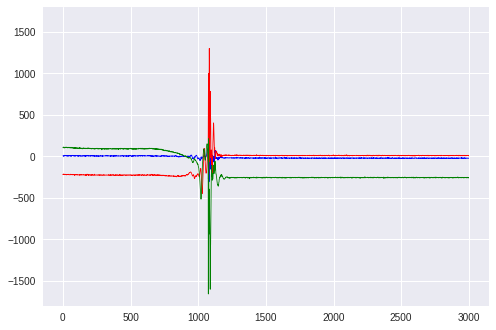

In [0]:
# import needed libraries
import matplotlib.pyplot as plt

# We can set an interval duration for display or use a fixed window size:
time_seg = 3
#window_size = int(len(df_Mediciones)/time_seg)
window_size = 3000
num_of_windows = len(df_Mediciones)- window_size + 1
win_ID=0

speed = 1

for index_win in range(int(num_of_windows/speed)):
    sensor_1_X = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_X"]]["S1_X"])
    sensor_1_Y = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_Y"]]["S1_Y"])
    sensor_1_Z = list(df_Mediciones.loc[0+index_win*speed:window_size-1+index_win*speed,["S1_Z"]]["S1_Z"])
    
    plt.plot(range(window_size),sensor_1_X, color='blue', linewidth=0.8)
    plt.plot(range(window_size),sensor_1_Y, color='red', linewidth=0.8)
    plt.plot(range(window_size),sensor_1_Z, color='green', linewidth=0.8)
    plt.ylim(-1800,1800)
    
    plt.show()
    